<h1>Acerca del ejercicio</h1>
<p> Se tienen datos de clientes de un banco y se espera poder utilizarlos para predecir si un cliente aceptará o no realizar un depósito a plazo cuando se le contacte por teléfono. La idea es llamar solamente a los que tienen más probabilidad de aceptar, ya que esto disminuiría notablemente los costos en Call Centers para poder ejecutar estas campañas.<br>
</p>    

<h2>Significado de las columnas</h2>
<ul>
<li>age: Edad del cliente.</li>
<li>job: Tipo de trabajo.</li>
<li>marital: Estado marital del cliente.</li>
<li>education: Nivel de educación del cliente.</li>    
<li>default: "Credit in default", tener crédito en default siginifica que uno falló en pagar una deuda.</li>
<li>balance: Balance promedio anual en euros.</li>
<li>housing: Si el cliente ha pedido un "housing loan", es decir, un préstamo para comprar o reparar una propiedad.</li>
<li>loan: Si la persona ha pedido un préstamo.</li>    
<li>contact: Modo de contacto al cliente.</li>
<li>day: Día en que se hizo el contacto.</li>
<li>month: Mes en que se hizo el contacto.</li>
<li>duration: Duración del contacto.</li>    
<li>campaign: Número de veces que se contacto al cliente durante la campaña.</li>
<li>pdays: Número de días que ha pasado desde que el cliente se contactó por última vez.</li>
<li>previous: Número de veces que se contactó al cliente previo a esta campaña.</li>
<li>poutcome: Resultado de la campaña anterior (si el cliente realizó o no un depósito a plazo).</li>
<li>y: Si el cliente aceptó o no un realizar un depósito a plazo en esta campaña.</li>    
</ul>







In [397]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from pandas.plotting import scatter_matrix

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold

from sklearn.metrics import recall_score, precision_score, f1_score



Los datos ya venían separados en test de testeo y test de entrenamiento. Para poder tener un código que nos permita probar diferentes separaciones y análisis como K-Fold Cross Validation se unirán ambos dataframes en uno solo.

In [177]:
df_marketing_targets_train = pd.read_csv("banking-dataset-marketing-targets-train.csv", sep=";")
df_marketing_targets_test = pd.read_csv("banking-dataset-marketing-targets-test.csv", sep=";")

In [178]:
df_marketing_targets_train

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [179]:
df_marketing_targets_test

age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
0     cellular   19   oct        79         1     -1         0  unknown  no  
1     cellular   11   may       220         1    339         4  failure  no  
2     cellular   16   apr       185         1    330         1  failure  no  
3      unknown    3   jun       199         4     -1         0  unknown  no  
4      unknown    5   may       226         1     -1         0  unknown  no  
...        ...  ...   ...       ...       ...    ...       ...      ...  ..  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no  

[4521 rows x 17 columns]

In [180]:
# Se verifica que los tipos de datos en las columnas sean iguales en ambos data frames.
df_marketing_targets_train.dtypes.equals(df_marketing_targets_test.dtypes)

True

In [181]:
# Se añaden los datos del df de prueba al de entrenamiento.
df_marketing_targets_final = df_marketing_targets_train.append(df_marketing_targets_test)

    

In [182]:
# Se reinician los indices
df_marketing_targets_final.reset_index(inplace=True,drop=True)

In [183]:
df_marketing_targets_final

age            job  marital  education default  balance housing loan  \
0       58     management  married   tertiary      no     2143     yes   no   
1       44     technician   single  secondary      no       29     yes   no   
2       33   entrepreneur  married  secondary      no        2     yes  yes   
3       47    blue-collar  married    unknown      no     1506     yes   no   
4       33        unknown   single    unknown      no        1      no   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
49727   33       services  married  secondary      no     -333     yes   no   
49728   57  self-employed  married   tertiary     yes    -3313     yes  yes   
49729   57     technician  married  secondary      no      295      no   no   
49730   28    blue-collar  married  secondary      no     1137      no   no   
49731   44   entrepreneur   single   tertiary      no     1136     yes  yes   

        contact  day month  duration  campaign  pdays  previous poutcome   y  
0       unknown    5   may       261         1     -1         0  unknown  no  
1       unknown    5   may       151         1     -1         0  unknown  no  
2       unknown    5   may        76         1     -1         0  unknown  no  
3       unknown    5   may        92         1     -1         0  unknown  no  
4       unknown    5   may       198         1     -1         0  unknown  no  
...         ...  ...   ...       ...       ...    ...       ...      ...  ..  
49727  cellular   30   jul       329         5     -1         0  unknown  no  
49728   unknown    9   may       153         1     -1         0  unknown  no  
49729  cellular   19   aug       151        11     -1         0  unknown  no  
49730  cellular    6   feb       129         4    211         3    other  no  
49731  cellular    3   apr       345         2    249         7    other  no  

[49732 rows x 17 columns]

Se observa que los datos desconocidos fueron marcados como "unknown", se reemplazarán estos valores con NaN, para determinar
verdaderamente cuántos faltan. 

In [184]:
columnas = list(df_marketing_targets_final.columns.values)
df_marketing_targets_final[columnas] = np.where(df_marketing_targets_final[columnas] == "unknown", np.NaN, df_marketing_targets_final[columnas])

In [185]:
df_marketing_targets_final

age            job  marital  education default  balance housing loan  \
0       58     management  married   tertiary      no     2143     yes   no   
1       44     technician   single  secondary      no       29     yes   no   
2       33   entrepreneur  married  secondary      no        2     yes  yes   
3       47    blue-collar  married        NaN      no     1506     yes   no   
4       33            NaN   single        NaN      no        1      no   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
49727   33       services  married  secondary      no     -333     yes   no   
49728   57  self-employed  married   tertiary     yes    -3313     yes  yes   
49729   57     technician  married  secondary      no      295      no   no   
49730   28    blue-collar  married  secondary      no     1137      no   no   
49731   44   entrepreneur   single   tertiary      no     1136     yes  yes   

        contact  day month  duration  campaign  pdays  previous poutcome   y  
0           NaN    5   may       261         1     -1         0      NaN  no  
1           NaN    5   may       151         1     -1         0      NaN  no  
2           NaN    5   may        76         1     -1         0      NaN  no  
3           NaN    5   may        92         1     -1         0      NaN  no  
4           NaN    5   may       198         1     -1         0      NaN  no  
...         ...  ...   ...       ...       ...    ...       ...      ...  ..  
49727  cellular   30   jul       329         5     -1         0      NaN  no  
49728       NaN    9   may       153         1     -1         0      NaN  no  
49729  cellular   19   aug       151        11     -1         0      NaN  no  
49730  cellular    6   feb       129         4    211         3    other  no  
49731  cellular    3   apr       345         2    249         7    other  no  

[49732 rows x 17 columns]

In [186]:
df_marketing_targets_final.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [187]:
df_marketing_targets_final.describe(include="all")

age          job  marital  education default        balance  \
count   49732.000000        49406    49732      47688   49732   49732.000000   
unique           NaN           11        3          3       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN        10678    30011      25508   48841            NaN   
mean       40.957472          NaN      NaN        NaN     NaN    1367.761562   
std        10.615008          NaN      NaN        NaN     NaN    3041.608766   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1431.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    49732  49732     35388  49732.000000  49732  49732.000000   
unique       2      2         2           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     27689  41797     32181           NaN  15164           NaN   
mean       NaN    NaN       NaN     15.816315    NaN    258.690179   
std        NaN    NaN       NaN      8.315680    NaN    257.743149   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    320.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous poutcome      y  
count   49732.000000  49732.000000  49732.000000     9068  49732  
unique           NaN           NaN           NaN        3      2  
top              NaN           NaN           NaN  failure     no  
freq             NaN           NaN           NaN     5391  43922  
mean        2.766549     40.158630      0.576892      NaN    NaN  
std         3.099075    100.127123      2.254838      NaN    NaN  
min         1.000000     -1.000000      0.000000      NaN    NaN  
25%         1.000000     -1.000000      0.000000      NaN    NaN  
50%         2.000000     -1.000000      0.000000      NaN    NaN  
75%         3.000000     -1.000000      0.000000      NaN    NaN  
max        63.000000    871.000000    275.000000      NaN    NaN

Se observa que a la columna poutcome(resultado de campaña anterior) le faltan 40.000 filas aprox, lo cual se considera elevado y se decide eliminar esta columna. 
Para los casos de trabajo, educación y contacto se considera valioso tener una etiqueta "desconocido" porque es muy probable
que esta información no se disponga en algunos casos, sobre todo porque son atributos que pueden cambiar en el tiempo por motivos tales como cambios de trabajo, realización de postítulos, cambios de número de teléfono, por nombrar algunos ejemplos. Debido a esto se <b>volverá a reemplazar los valores NaN con "unknown" y se eliminará la columa poutcome</b>.
Además se observa que varias columnas son de tipo "object", por lo que se utilizará LabelEncoder.

In [188]:
df_marketing_targets_final[columnas] = np.where(df_marketing_targets_final[columnas].isna(),"unknown", df_marketing_targets_final[columnas])

In [189]:
df_marketing_targets_final.drop("poutcome", inplace=True, axis=1)

In [190]:
df_marketing_targets_final

age            job  marital  education default  balance housing loan  \
0       58     management  married   tertiary      no     2143     yes   no   
1       44     technician   single  secondary      no       29     yes   no   
2       33   entrepreneur  married  secondary      no        2     yes  yes   
3       47    blue-collar  married    unknown      no     1506     yes   no   
4       33        unknown   single    unknown      no        1      no   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
49727   33       services  married  secondary      no     -333     yes   no   
49728   57  self-employed  married   tertiary     yes    -3313     yes  yes   
49729   57     technician  married  secondary      no      295      no   no   
49730   28    blue-collar  married  secondary      no     1137      no   no   
49731   44   entrepreneur   single   tertiary      no     1136     yes  yes   

        contact  day month  duration  campaign  pdays  previous   y  
0       unknown    5   may       261         1     -1         0  no  
1       unknown    5   may       151         1     -1         0  no  
2       unknown    5   may        76         1     -1         0  no  
3       unknown    5   may        92         1     -1         0  no  
4       unknown    5   may       198         1     -1         0  no  
...         ...  ...   ...       ...       ...    ...       ...  ..  
49727  cellular   30   jul       329         5     -1         0  no  
49728   unknown    9   may       153         1     -1         0  no  
49729  cellular   19   aug       151        11     -1         0  no  
49730  cellular    6   feb       129         4    211         3  no  
49731  cellular    3   apr       345         2    249         7  no  

[49732 rows x 16 columns]

In [191]:
# No hay datos faltantes en ninguna columna.
df_marketing_targets_final.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [192]:
df_marketing_targets_final.describe(include="all")

age          job  marital  education default        balance  \
count   49732.000000        49732    49732      49732   49732   49732.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN        10678    30011      25508   48841            NaN   
mean       40.957472          NaN      NaN        NaN     NaN    1367.761562   
std        10.615008          NaN      NaN        NaN     NaN    3041.608766   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1431.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact           day  month      duration  \
count    49732  49732     49732  49732.000000  49732  49732.000000   
unique       2      2         3           NaN     12           NaN   
top        yes     no  cellular           NaN    may           NaN   
freq     27689  41797     32181           NaN  15164           NaN   
mean       NaN    NaN       NaN     15.816315    NaN    258.690179   
std        NaN    NaN       NaN      8.315680    NaN    257.743149   
min        NaN    NaN       NaN      1.000000    NaN      0.000000   
25%        NaN    NaN       NaN      8.000000    NaN    103.000000   
50%        NaN    NaN       NaN     16.000000    NaN    180.000000   
75%        NaN    NaN       NaN     21.000000    NaN    320.000000   
max        NaN    NaN       NaN     31.000000    NaN   4918.000000   

            campaign         pdays      previous      y  
count   49732.000000  49732.000000  49732.000000  49732  
unique           NaN           NaN           NaN      2  
top              NaN           NaN           NaN     no  
freq             NaN           NaN           NaN  43922  
mean        2.766549     40.158630      0.576892    NaN  
std         3.099075    100.127123      2.254838    NaN  
min         1.000000     -1.000000      0.000000    NaN  
25%         1.000000     -1.000000      0.000000    NaN  
50%         2.000000     -1.000000      0.000000    NaN  
75%         3.000000     -1.000000      0.000000    NaN  
max        63.000000    871.000000    275.000000    NaN

Dado que los datos originales están bastante limpios, se decide hacer un análisis inicial a los datos antes de aplicar los encodings y algoritmos, para complementar el ejercicio. Se utilizará la función scatter_matrix de pandas.plotting para analizar los valores numéricos. Los valores no numéricos se graficarán como histogramas más adelante.

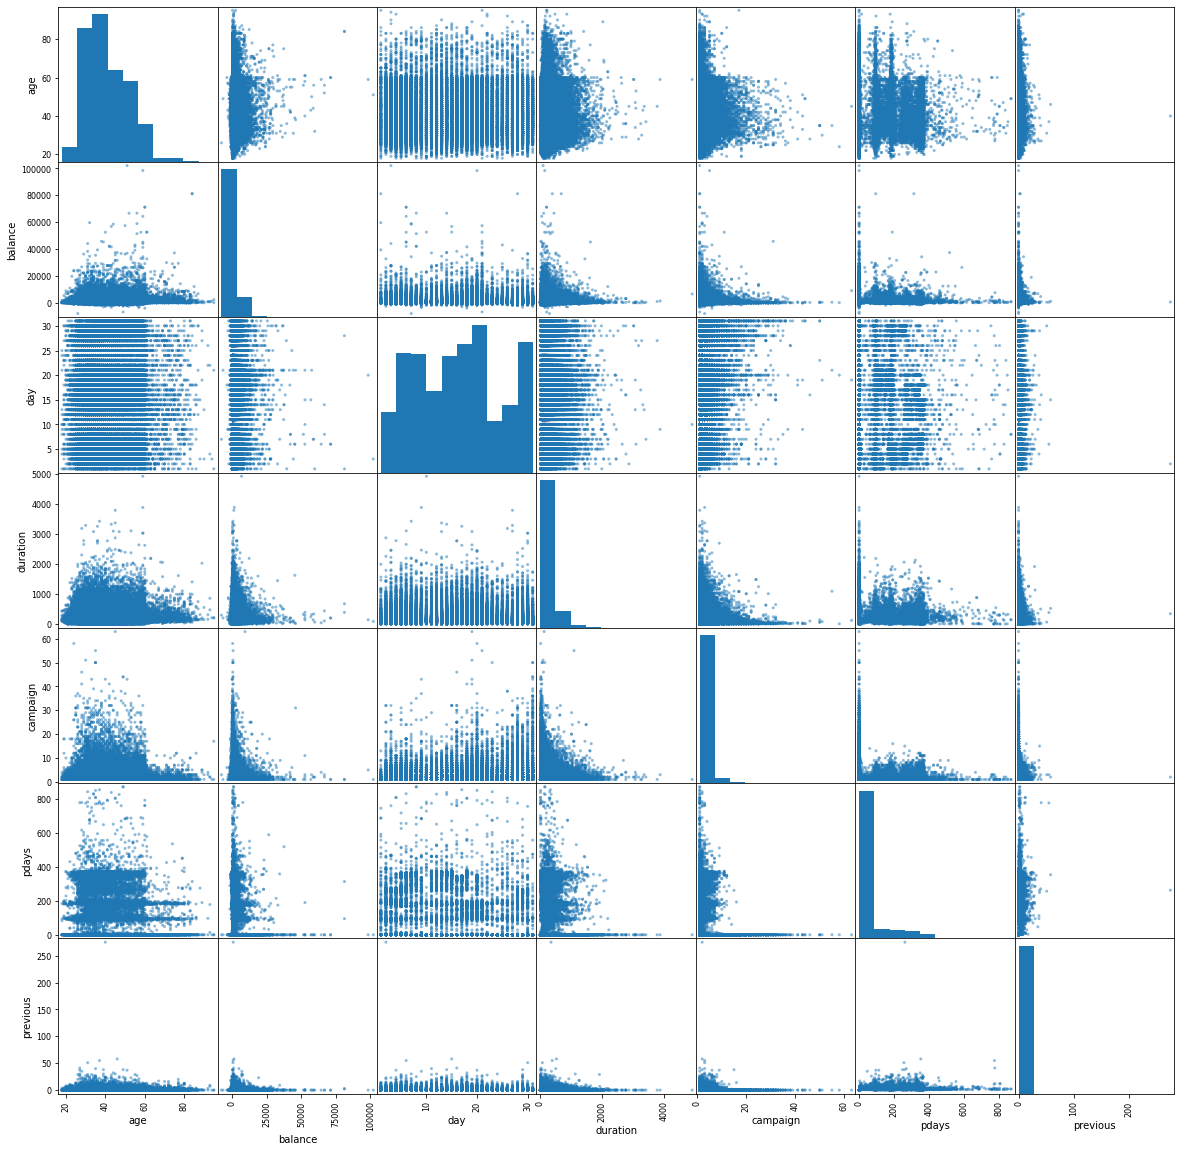

In [193]:
sm = scatter_matrix(df_marketing_targets_final, figsize=(20, 20))

<h1>Observaciones</h1>
- La mayoría de las edades en los datos parecen ser menores a 60 y parecen tener una distribución aproximadamente normal con media cercana a 40 años.<br>
- No se observa una correlación entre la edad y otras variables numéricas.<br>
- Los valores de balance se encuentran bien distribuidos a través de las edades.<br>
- La mayoría de los valores de balance son menores a 25000. De la tabla obtenida en .describe se lee que la media es de 1368, lo cual es consistente con el gráfico.<br>
- Parece haber una relación de exponencial negativa entre el balance-duración del contacto y balance-n° de contactos al cliente, lo cual parece indicar que las personas con balance más bajos (cercanos a 1000) están más inclinadas a escuchar los ofrecimentos del banco.<br>
- Los días de llamada parecen estar distribuidos de manera uniforme y no se observa correlación con las otras variables.<br>
- Se observa una relación similar entre duración del contacto (duration) y el número de veces que se contactó al cliente (campaign) a la de balance-duración y balance-n° de contactos. En este caso se podría concluir que en la medida que se llama más veces al mismo cliente el tiempo de duración del contacto tiende a disminuir.<br>
- No se observa alguna otra relación entre campaign (n° contactos) y las otras variables. La media del número contacto es de 2.8 y se observa que la gran mayoría de los valores son menores a 20.<br>
- No se observa relación entre pdays (número de días desde que el cliente fue contactado por última vez) y otras variables. La gran mayoría de estos datos son menores a 200.<br>
- La variable previous (número de contactos realizado antes de esta campaña) no parece tener relación directa con otras variables y se observa que son bastante menores a 100, lo cual es consistente con el promedio entregado en la tabla de 0.58.

Text(0.5, 1.0, 'y')

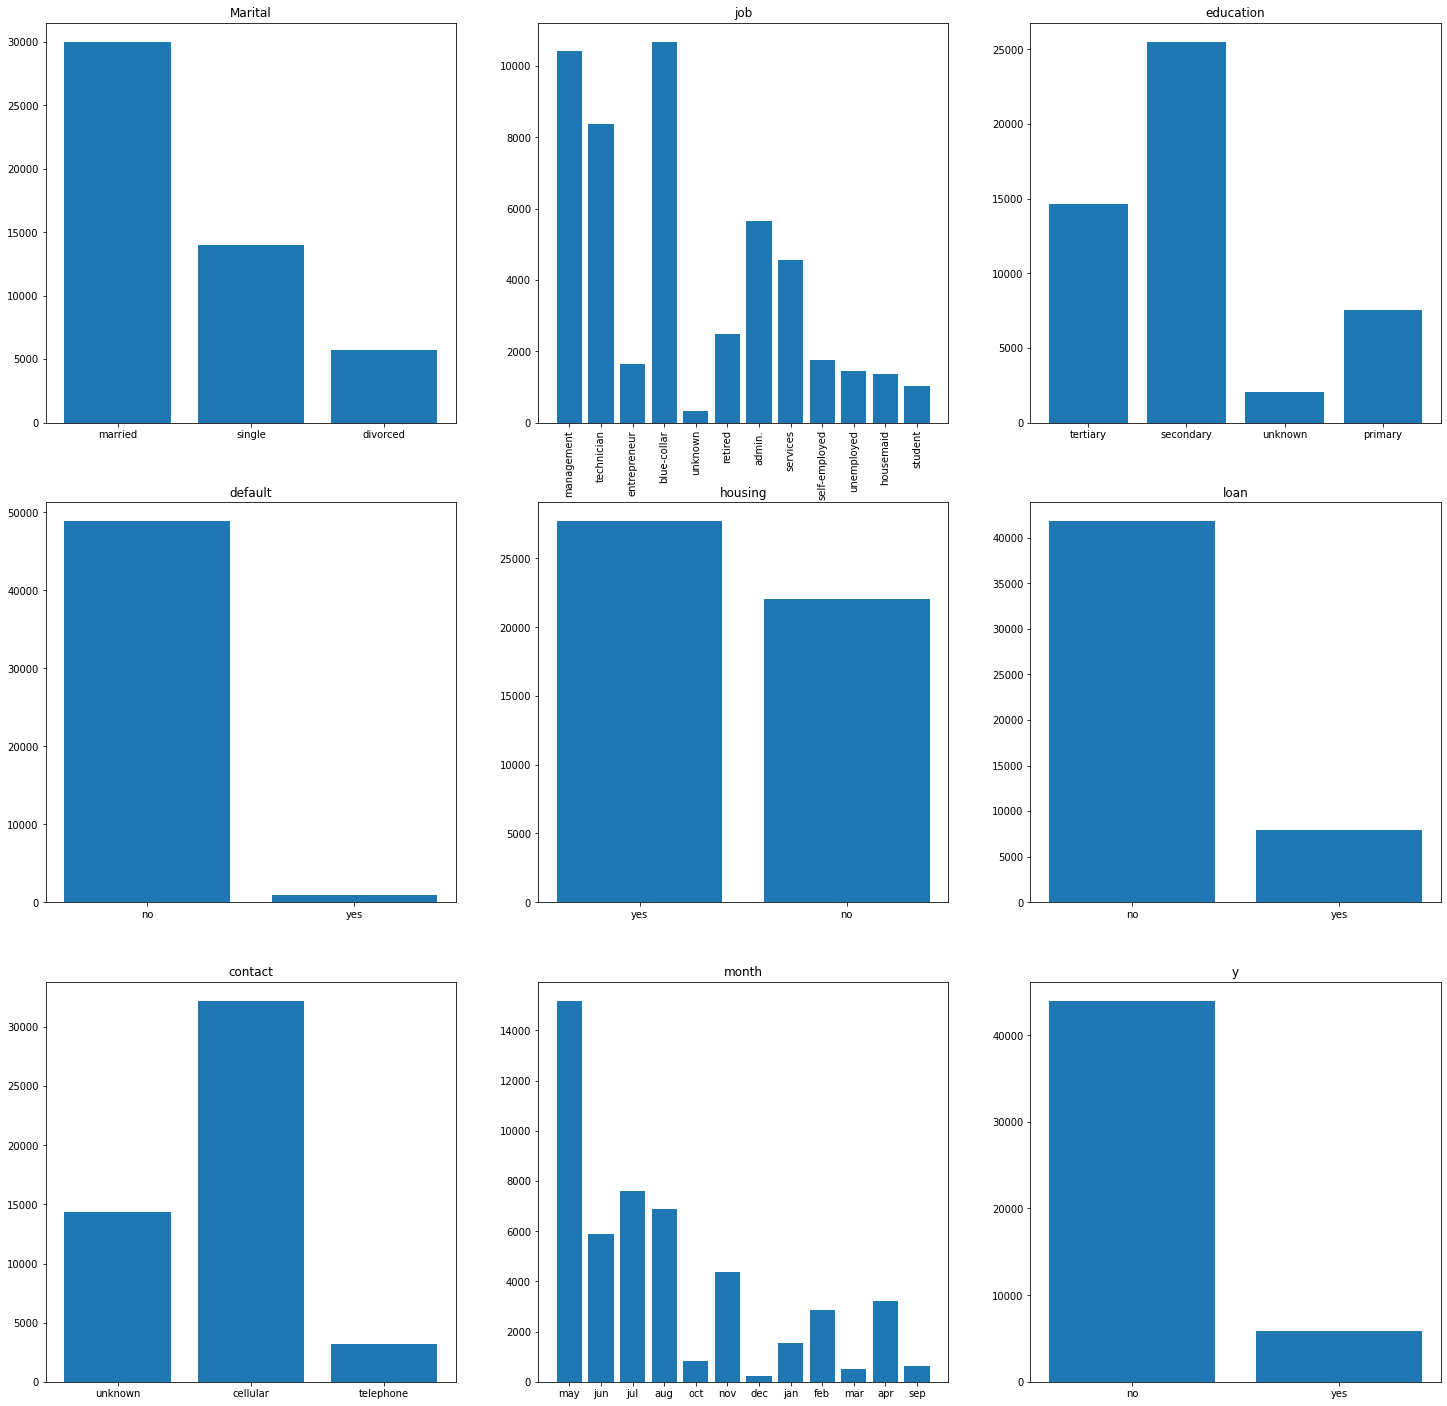

In [194]:
# Histogramas para columnas no numéricas.
fig, axes = plt.subplots(nrows=3,ncols=3, figsize=(25,25))

def obtener_ax_bars(nombre_columna):
    ax_bars = [list(df_marketing_targets_final[nombre_columna].unique()).index(i) for i in list(df_marketing_targets_final[nombre_columna].unique())]
    return ax_bars

def obtener_bins(lista_entrada):
    bins_resultado = [x for i in lista_entrada for x in (i-0.4,i+0.4)]
    return bins_resultado



ax_bars_00 = obtener_ax_bars("marital")
axes[0][0].hist(x=df_marketing_targets_final["marital"], align="mid", bins = obtener_bins(ax_bars_00))
axes[0][0].set_title("Marital")


ax_bars_01 = obtener_ax_bars("job")
axes[0][1].hist(x=df_marketing_targets_final["job"], bins = obtener_bins(ax_bars_01))
for tick in axes[0][1].get_xticklabels():
    tick.set_rotation("vertical")
axes[0][1].set_title("job")
    
ax_bars_02 = obtener_ax_bars("education")
axes[0][2].hist(x=df_marketing_targets_final["education"], bins = obtener_bins(ax_bars_02))
axes[0][2].set_title("education")


ax_bars_10 = obtener_ax_bars("default")
axes[1][0].hist(x=df_marketing_targets_final["default"], bins = obtener_bins(ax_bars_10))
axes[1][0].set_title("default")


ax_bars_11 = obtener_ax_bars("housing")
axes[1][1].hist(x=df_marketing_targets_final["housing"], bins = obtener_bins(ax_bars_11))
axes[1][1].set_title("housing")

ax_bars_12 = obtener_ax_bars("loan")
axes[1][2].hist(x=df_marketing_targets_final["loan"], bins = obtener_bins(ax_bars_12))
axes[1][2].set_title("loan")

ax_bars_20 = obtener_ax_bars("contact")
axes[2][0].hist(x=df_marketing_targets_final["contact"], bins = obtener_bins(ax_bars_20))
axes[2][0].set_title("contact")

ax_bars_21 = obtener_ax_bars("month")
axes[2][1].hist(x=df_marketing_targets_final["month"], bins = obtener_bins(ax_bars_21))
axes[2][1].set_title("month")

ax_bars_22 = obtener_ax_bars("y")
axes[2][2].hist(x=df_marketing_targets_final["y"], bins = obtener_bins(ax_bars_22))
axes[2][2].set_title("y")


<h1>Acerca de los gráficos</h1>
<h2>Construcción de los gráficos</h2>
<p>Se definieron 2 funciones que tienen como objetivo definir los bins de los histogramas de modo tal que las barras quedaran centradas con su correspondiente etiqueta. Un ejemplo básico de cómo hacer esto para 2 barra es el código siguiente: 

ax1_bars = [0,1]                           
ax1.hist(data, bins=[x for i in ax1_bars for x in (i-0.4,i+0.4)])

Para generalizar este método para los diferentes gráficos se crearon las funciones.<br>
La funcion obtener_ax_bars crea una lista de enteros del tipo [0,1,2,3....] dependiendo de la cantidad de items únicos en cada columna y toma como valor de entrada el nombre de la columna.<br>
La función obtener_bins aplica el procedimiento descrito en la segunda línea del código mostrado tomando como entrada el nombre de la lista al cual se quiere aplicar.<br>

Más detalles acerca de donde se obtuvo el método que llevó a la creación de estas funciones se encuentran en la fuente a continuación:<br>
Fuente: https://stackoverflow.com/questions/23246125/how-to-center-labels-in-histogram-plot


</p>

<h2>Análisis de los gráficos</h2>

<p> 
- Se observa alguna disparidad en los datos de matrimonio.<br>
- Hay disparidad en los datos de profesiones pero esto es esperable dada la mayor cantidad de categorías. Hay pocos datos
desconocidos. <br>
- Los niveles de educación en su mayoría son "secundary".<br>
- Se observa bastante disparidad en las columnas "default" y "loan".<br>
- La gran mayoría de los clientes fueron contactados por celular, lo cual no es sorprendente en esta época.<br>
- En cuanto a los meses, se observa que la mayor parte de la campaña se hizo en mayo.<br>
- Hay bastante disparidad en la etiqueta objetivo "y", que representa si los clientes quieren o no hacer el depósito
a plazo, lo cual podría traer problemas en los resultados finales del modelo. <br>




</p>




<h1>Preprocesamiento</h1>

Primero se separará el df en 2, uno con las columnas de texto y otro con las columnas numéricas para facilitar la codificación. <br>
Luego se unirán en uno llamado "df_marketing_targets_final_normalizado"

In [195]:
df_texto = df_marketing_targets_final.select_dtypes(include="object").copy()
df_numeros = df_marketing_targets_final.select_dtypes(include="number").copy()

In [196]:
df_texto.head()

job  marital  education default housing loan  contact month   y
0    management  married   tertiary      no     yes   no  unknown   may  no
1    technician   single  secondary      no     yes   no  unknown   may  no
2  entrepreneur  married  secondary      no     yes  yes  unknown   may  no
3   blue-collar  married    unknown      no     yes   no  unknown   may  no
4       unknown   single    unknown      no      no   no  unknown   may  no

In [197]:
df_numeros.head()

age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0

<h2>Preprocesamiento df_texto</h2>

Se almacenarán los nombres de las columnas en una lista y se creará un LabelEncoder para cada una. Estos LabelEncoders son almacenados en la lista label_encoders, luego se aplica el fit_transform a cada una usando el encoder correspondiente con una rutina FOR. 
Posteriormente se usará MinMaxScaler para mantener los números similares a los que se obtendrán al aplicar StandardScaler a las columnas numéricas.

In [198]:
columnas_texto = list(df_texto.select_dtypes(include="object"))
label_encoders = []

for columna in columnas_texto:
    label_encoders.append(LabelEncoder())

    
print(columnas_texto)
print(label_encoders)



['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']
[LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()]


In [199]:
for columna in columnas_texto:
    df_texto[columna] = label_encoders[columnas_texto.index(columna)].fit_transform(df_texto[columna])

In [200]:
df_texto.head()

job  marital  education  default  housing  loan  contact  month  y
0    4        1          2        0        1     0        2      8  0
1    9        2          1        0        1     0        2      8  0
2    2        1          1        0        1     1        2      8  0
3    1        1          3        0        1     0        2      8  0
4   11        2          3        0        0     0        2      8  0

In [201]:
min_max_scaler_texto = MinMaxScaler()

In [202]:
df_texto.iloc[:,:] = min_max_scaler_texto.fit_transform(df_texto.iloc[:,:])


In [203]:
df_texto.head()

job  marital  education  default  housing  loan  contact     month  \
0  0.363636      0.5   0.666667      0.0      1.0   0.0      1.0  0.727273   
1  0.818182      1.0   0.333333      0.0      1.0   0.0      1.0  0.727273   
2  0.181818      0.5   0.333333      0.0      1.0   1.0      1.0  0.727273   
3  0.090909      0.5   1.000000      0.0      1.0   0.0      1.0  0.727273   
4  1.000000      1.0   1.000000      0.0      0.0   0.0      1.0  0.727273   

     y  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0

<h2>Preprocesamiento df_numeros</h2>

Para los números se utilizara StandardScaler para mantener los patrones estadísticos.

In [204]:
numeros_standard_scaler = StandardScaler()

In [205]:
df_numeros.iloc[:,:] = numeros_standard_scaler.fit_transform(df_numeros.iloc[:,:])

In [206]:
df_numeros.head()

age   balance       day  duration  campaign     pdays  previous
0  1.605529  0.254880 -1.300726  0.008962  -0.57003 -0.411068 -0.255849
1  0.286628 -0.440154 -1.300726 -0.417824  -0.57003 -0.411068 -0.255849
2 -0.749651 -0.449031 -1.300726 -0.708814  -0.57003 -0.411068 -0.255849
3  0.569250  0.045450 -1.300726 -0.646736  -0.57003 -0.411068 -0.255849
4 -0.749651 -0.449359 -1.300726 -0.235470  -0.57003 -0.411068 -0.255849

<h2>Unión de los data frames</h2>

In [207]:
df_marketing_targets_final_normalizado = pd.merge(df_numeros,df_texto, left_index=True, right_index=True)

In [208]:
df_marketing_targets_final_normalizado.head()

age   balance       day  duration  campaign     pdays  previous  \
0  1.605529  0.254880 -1.300726  0.008962  -0.57003 -0.411068 -0.255849   
1  0.286628 -0.440154 -1.300726 -0.417824  -0.57003 -0.411068 -0.255849   
2 -0.749651 -0.449031 -1.300726 -0.708814  -0.57003 -0.411068 -0.255849   
3  0.569250  0.045450 -1.300726 -0.646736  -0.57003 -0.411068 -0.255849   
4 -0.749651 -0.449359 -1.300726 -0.235470  -0.57003 -0.411068 -0.255849   

        job  marital  education  default  housing  loan  contact     month  \
0  0.363636      0.5   0.666667      0.0      1.0   0.0      1.0  0.727273   
1  0.818182      1.0   0.333333      0.0      1.0   0.0      1.0  0.727273   
2  0.181818      0.5   0.333333      0.0      1.0   1.0      1.0  0.727273   
3  0.090909      0.5   1.000000      0.0      1.0   0.0      1.0  0.727273   
4  1.000000      1.0   1.000000      0.0      0.0   0.0      1.0  0.727273   

     y  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0

Para evitar confusiones se decide renombrar la columna "y". Se cambiará por el nombre "accepts" indicando si acepta o no
el hacer el depósito a largo plazo.

In [209]:
df_marketing_targets_final_normalizado.rename(columns={"y":"accepts"}, inplace=True)

In [210]:
df_marketing_targets_final_normalizado

age   balance       day  duration  campaign     pdays  previous  \
0      1.605529  0.254880 -1.300726  0.008962 -0.570030 -0.411068 -0.255849   
1      0.286628 -0.440154 -1.300726 -0.417824 -0.570030 -0.411068 -0.255849   
2     -0.749651 -0.449031 -1.300726 -0.708814 -0.570030 -0.411068 -0.255849   
3      0.569250  0.045450 -1.300726 -0.646736 -0.570030 -0.411068 -0.255849   
4     -0.749651 -0.449359 -1.300726 -0.235470 -0.570030 -0.411068 -0.255849   
...         ...       ...       ...       ...       ...       ...       ...   
49727 -0.749651 -0.559171  1.705673  0.272793  0.720691 -0.411068 -0.255849   
49728  1.511321 -1.538925 -0.819703 -0.410064 -0.570030 -0.411068 -0.255849   
49729  1.511321 -0.352699  0.382857 -0.417824  2.656772 -0.411068 -0.255849   
49730 -1.220687 -0.075869 -1.180470 -0.503181  0.398010  1.706262  1.074637   
49731  0.286628 -0.076198 -1.541238  0.334871 -0.247350  2.085783  2.848619   

            job  marital  education  default  housing  loan  contact  \
0      0.363636      0.5   0.666667      0.0      1.0   0.0      1.0   
1      0.818182      1.0   0.333333      0.0      1.0   0.0      1.0   
2      0.181818      0.5   0.333333      0.0      1.0   1.0      1.0   
3      0.090909      0.5   1.000000      0.0      1.0   0.0      1.0   
4      1.000000      1.0   1.000000      0.0      0.0   0.0      1.0   
...         ...      ...        ...      ...      ...   ...      ...   
49727  0.636364      0.5   0.333333      0.0      1.0   0.0      0.0   
49728  0.545455      0.5   0.666667      1.0      1.0   1.0      1.0   
49729  0.818182      0.5   0.333333      0.0      0.0   0.0      0.0   
49730  0.090909      0.5   0.333333      0.0      0.0   0.0      0.0   
49731  0.181818      1.0   0.666667      0.0      1.0   1.0      0.0   

          month  accepts  
0      0.727273      0.0  
1      0.727273      0.0  
2      0.727273      0.0  
3      0.727273      0.0  
4      0.727273      0.0  
...         ...      ...  
49727  0.454545      0.0  
49728  0.727273      0.0  
49729  0.090909      0.0  
49730  0.272727      0.0  
49731  0.000000      0.0  

[49732 rows x 16 columns]

<h2>Separación en set de testeo y set de entrenamiento</h2>

Se utilizará como "label" la columna "accepts", ya que se desea predecir si los clientes aceptan o no hacer el depósito.

In [211]:
x = df_marketing_targets_final_normalizado.iloc[:,0:15].values
y = df_marketing_targets_final_normalizado.iloc[:,15].values

In [212]:
x

array([[ 1.60552866,  0.25488033, -1.30072639, ...,  0.        ,
         1.        ,  0.72727273],
       [ 0.28662801, -0.44015359, -1.30072639, ...,  0.        ,
         1.        ,  0.72727273],
       [-0.74965108, -0.44903056, -1.30072639, ...,  1.        ,
         1.        ,  0.72727273],
       ...,
       [ 1.51132147, -0.35269899,  0.38285704, ...,  0.        ,
         0.        ,  0.09090909],
       [-1.22068703, -0.07586902, -1.18047043, ...,  0.        ,
         0.        ,  0.27272727],
       [ 0.28662801, -0.0761978 , -1.54123831, ...,  1.        ,
         0.        ,  0.        ]])

In [277]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [278]:
# Se reduce dimensionalidad.
x_reduced = TSNE(n_components=2, random_state=3).fit_transform(x)

In [279]:
df_tsne = pd.DataFrame(x_reduced, columns=["tsne_1", "tsne_2"])
df_tsne["accepts"] = y
df_tsne.head()

tsne_1     tsne_2  accepts
0  14.826394 -44.336720      0.0
1 -10.928138 -55.974937      0.0
2 -62.463989  -5.076336      0.0
3  14.475474 -54.381741      0.0
4 -29.577194  40.361992      0.0

Text(0.5, 1.0, 'Accepts term deposit t-SNE \n 0=No, 1=Sí')

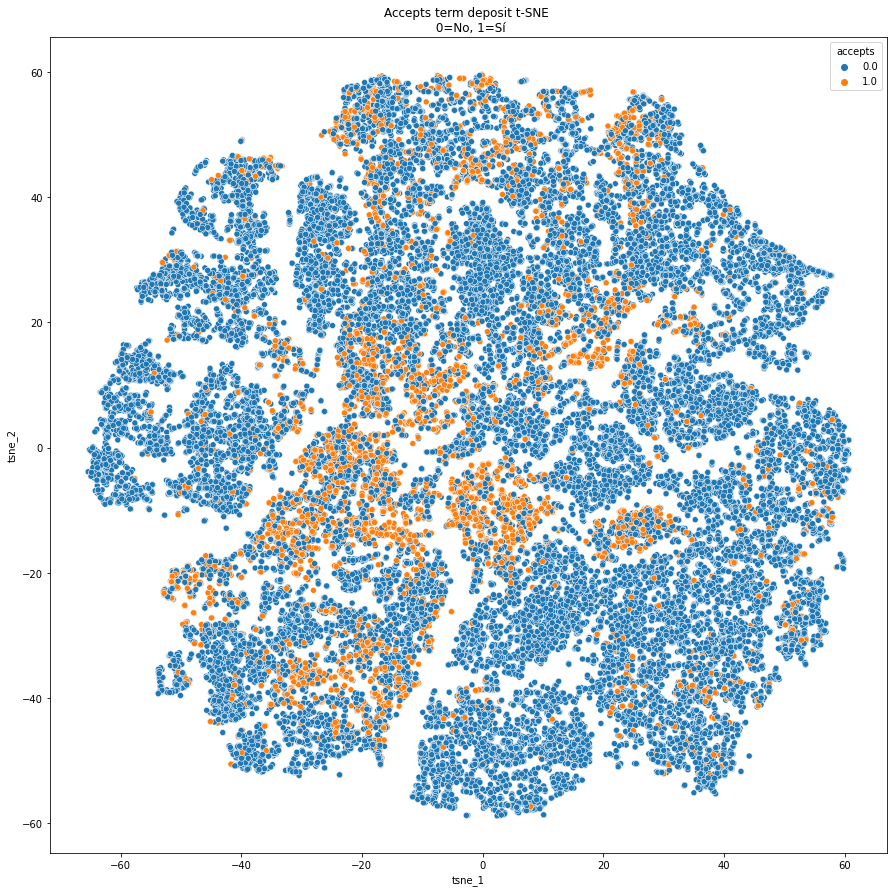

In [280]:
fig_tsne = plt.figure(figsize=(15,15))
sns.scatterplot(data=df_tsne, x="tsne_1", y="tsne_2", hue="accepts")
plt.title("Accepts term deposit t-SNE \n 0=No, 1=Sí")

Se observa que si bien la gran mayoría de los clientes no aceptó hacer el depósito, hay puntos que representan los que si aceptaron en casi todos los grupos que se podrían formar, en algunas zonas más concentrados que en otras.

In [281]:
# Dado que hay una desproporción importante entre clientes que aceptaron y los que no aceptaron se decide trabajar con una división
# 90-10% para entrenamiento-testeo, de modo de concentrar la mayor cantidad de datos posibles al entrenamiento.
x_train, x_test, y_train, y_test = train_test_split(x_reduced,y,test_size=0.1,random_state=10)

<h1>K-Means</h1>

Para los algoritmos K-Means se harán pruebas con diferentes n_init y max_iter, que corresponden al número de veces que el algoritmo correrá con diferentes centroides iniciales y el número máximo de iteraciones. El primer algoritmo K-Means utilizará estos parámetros con sus valores por defecto para comparación.

In [282]:
clusters = 2
k_means_1 = KMeans(n_clusters=clusters, init="k-means++",n_init=10, random_state=0, verbose=2, max_iter=300, tol=0.0001)
k_means_2 = KMeans(n_clusters=clusters, init="k-means++",n_init=100, random_state=0, verbose=2, max_iter=600, tol=0.0001)
k_means_3 = KMeans(n_clusters=clusters, init="k-means++",n_init=1000, random_state=1, verbose=2, max_iter=1200, tol=0.0001)

In [283]:
#Ajuste de algoritmos
k_means_1.fit(x_train,y_train)
k_means_2.fit(x_train,y_train)
k_means_3.fit(x_train,y_train)

Initialization complete
Iteration 0, inertia 79603304.0
Iteration 1, inertia 52123068.0
Iteration 2, inertia 52011996.0
Iteration 3, inertia 51917748.0
Iteration 4, inertia 51821136.0
Iteration 5, inertia 51716792.0
Iteration 6, inertia 51611880.0
Iteration 7, inertia 51525320.0
Iteration 8, inertia 51448480.0
Iteration 9, inertia 51387060.0
Iteration 10, inertia 51341388.0
Iteration 11, inertia 51296256.0
Iteration 12, inertia 51280412.0
Iteration 13, inertia 51276876.0
Converged at iteration 13: center shift 0.038668062537908554 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 76447104.0
Iteration 1, inertia 53109420.0
Iteration 2, inertia 51815824.0
Iteration 3, inertia 51418204.0
Iteration 4, inertia 51302808.0
Iteration 5, inertia 51281328.0
Iteration 6, inertia 51276988.0
Converged at iteration 6: center shift 0.043248001486063004 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 107942184.0
Iteration 1, inertia 532

Iteration 15, inertia 51278844.0
Converged at iteration 15: center shift 0.0731499046087265 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 77760488.0
Iteration 1, inertia 54057956.0
Iteration 2, inertia 53738964.0
Iteration 3, inertia 53556836.0
Iteration 4, inertia 53327428.0
Iteration 5, inertia 52991272.0
Iteration 6, inertia 52728228.0
Iteration 7, inertia 52654224.0
Iteration 8, inertia 52620284.0
Iteration 9, inertia 52574940.0
Iteration 10, inertia 52517076.0
Iteration 11, inertia 52439408.0
Iteration 12, inertia 52313384.0
Iteration 13, inertia 52172980.0
Iteration 14, inertia 52062752.0
Iteration 15, inertia 51972088.0
Iteration 16, inertia 51873820.0
Iteration 17, inertia 51779296.0
Iteration 18, inertia 51676220.0
Iteration 19, inertia 51574312.0
Iteration 20, inertia 51499148.0
Iteration 21, inertia 51419716.0
Iteration 22, inertia 51369632.0
Iteration 23, inertia 51326944.0
Iteration 24, inertia 51287920.0
Iteration 25, inertia 51279072.0

Iteration 3, inertia 51823540.0
Iteration 4, inertia 51797436.0
Iteration 5, inertia 51777344.0
Iteration 6, inertia 51755772.0
Iteration 7, inertia 51733572.0
Iteration 8, inertia 51714624.0
Iteration 9, inertia 51700368.0
Iteration 10, inertia 51684188.0
Iteration 11, inertia 51665228.0
Iteration 12, inertia 51646944.0
Iteration 13, inertia 51630820.0
Iteration 14, inertia 51610612.0
Iteration 15, inertia 51581784.0
Iteration 16, inertia 51541908.0
Iteration 17, inertia 51490592.0
Iteration 18, inertia 51421740.0
Iteration 19, inertia 51351048.0
Iteration 20, inertia 51306316.0
Iteration 21, inertia 51291864.0
Iteration 22, inertia 51285812.0
Iteration 23, inertia 51281056.0
Converged at iteration 23: center shift 0.0895252674818039 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 69704968.0
Iteration 1, inertia 51606496.0
Iteration 2, inertia 51517300.0
Iteration 3, inertia 51441064.0
Iteration 4, inertia 51379788.0
Iteration 5, inertia 51336300.0
It

Iteration 1, inertia 52348564.0
Iteration 2, inertia 51964108.0
Iteration 3, inertia 51805492.0
Iteration 4, inertia 51730756.0
Iteration 5, inertia 51705888.0
Iteration 6, inertia 51687416.0
Iteration 7, inertia 51664824.0
Iteration 8, inertia 51638916.0
Iteration 9, inertia 51613428.0
Iteration 10, inertia 51596416.0
Iteration 11, inertia 51585304.0
Iteration 12, inertia 51579652.0
Converged at iteration 12: center shift 0.08342337608337402 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 68075744.0
Iteration 1, inertia 53809776.0
Iteration 2, inertia 52136628.0
Iteration 3, inertia 51714880.0
Iteration 4, inertia 51543476.0
Iteration 5, inertia 51451160.0
Iteration 6, inertia 51386708.0
Iteration 7, inertia 51340696.0
Iteration 8, inertia 51296696.0
Iteration 9, inertia 51280720.0
Iteration 10, inertia 51276888.0
Converged at iteration 10: center shift 0.03901354968547821 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inert

Iteration 8, inertia 52946292.0
Iteration 9, inertia 52900956.0
Iteration 10, inertia 52858868.0
Iteration 11, inertia 52805376.0
Iteration 12, inertia 52723328.0
Iteration 13, inertia 52605300.0
Iteration 14, inertia 52442824.0
Iteration 15, inertia 52205104.0
Iteration 16, inertia 51887444.0
Iteration 17, inertia 51658448.0
Iteration 18, inertia 51593152.0
Iteration 19, inertia 51569144.0
Iteration 20, inertia 51563784.0
Converged at iteration 20: center shift 0.028155673295259476 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 95209120.0
Iteration 1, inertia 51666620.0
Iteration 2, inertia 51639652.0
Iteration 3, inertia 51613380.0
Iteration 4, inertia 51595632.0
Iteration 5, inertia 51585116.0
Iteration 6, inertia 51579540.0
Converged at iteration 6: center shift 0.07664382457733154 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 92694160.0
Iteration 1, inertia 52090148.0
Iteration 2, inertia 51932232.0
Iteration 3

Iteration 0, inertia 90352808.0
Iteration 1, inertia 54113000.0
Iteration 2, inertia 53903212.0
Iteration 3, inertia 53841884.0
Iteration 4, inertia 53820424.0
Iteration 5, inertia 53808036.0
Iteration 6, inertia 53798280.0
Iteration 7, inertia 53786308.0
Iteration 8, inertia 53773620.0
Iteration 9, inertia 53765196.0
Iteration 10, inertia 53757896.0
Iteration 11, inertia 53751644.0
Converged at iteration 11: center shift 0.08424925804138184 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 61235388.0
Iteration 1, inertia 54731396.0
Iteration 2, inertia 53499028.0
Iteration 3, inertia 52962640.0
Iteration 4, inertia 52739516.0
Iteration 5, inertia 52672176.0
Iteration 6, inertia 52634092.0
Iteration 7, inertia 52591112.0
Iteration 8, inertia 52535344.0
Iteration 9, inertia 52465344.0
Iteration 10, inertia 52358968.0
Iteration 11, inertia 52208516.0
Iteration 12, inertia 52094780.0
Iteration 13, inertia 52002424.0
Iteration 14, inertia 51906952.0
Iteratio

Iteration 5, inertia 53516116.0
Iteration 6, inertia 53264732.0
Iteration 7, inertia 52927996.0
Iteration 8, inertia 52708528.0
Iteration 9, inertia 52651884.0
Iteration 10, inertia 52618820.0
Iteration 11, inertia 52572544.0
Iteration 12, inertia 52514592.0
Iteration 13, inertia 52436132.0
Iteration 14, inertia 52306080.0
Iteration 15, inertia 52166432.0
Iteration 16, inertia 52057212.0
Iteration 17, inertia 51967952.0
Iteration 18, inertia 51871384.0
Iteration 19, inertia 51776472.0
Iteration 20, inertia 51673476.0
Iteration 21, inertia 51572056.0
Iteration 22, inertia 51497200.0
Iteration 23, inertia 51418912.0
Iteration 24, inertia 51369060.0
Iteration 25, inertia 51325532.0
Iteration 26, inertia 51286724.0
Iteration 27, inertia 51278880.0
Converged at iteration 27: center shift 0.07221460342407227 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 78417120.0
Iteration 1, inertia 53870272.0
Iteration 2, inertia 53835032.0
Iteration 3, inertia 53814836

Iteration 14, inertia 52580528.0
Iteration 15, inertia 52525408.0
Iteration 16, inertia 52454496.0
Iteration 17, inertia 52340896.0
Iteration 18, inertia 52193920.0
Iteration 19, inertia 52084944.0
Iteration 20, inertia 51992452.0
Iteration 21, inertia 51896396.0
Iteration 22, inertia 51799324.0
Iteration 23, inertia 51698212.0
Iteration 24, inertia 51595416.0
Iteration 25, inertia 51514148.0
Iteration 26, inertia 51432348.0
Iteration 27, inertia 51373588.0
Iteration 28, inertia 51330220.0
Iteration 29, inertia 51289200.0
Iteration 30, inertia 51279276.0
Converged at iteration 30: center shift 0.0774335265159607 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 68456912.0
Iteration 1, inertia 55737168.0
Iteration 2, inertia 54521236.0
Iteration 3, inertia 53965784.0
Iteration 4, inertia 53774840.0
Iteration 5, inertia 53705204.0
Iteration 6, inertia 53637724.0
Iteration 7, inertia 53554276.0
Iteration 8, inertia 53422928.0
Iteration 9, inertia 53267116.0

Iteration 3, inertia 51964724.0
Iteration 4, inertia 51735192.0
Iteration 5, inertia 51588736.0
Iteration 6, inertia 51501836.0
Iteration 7, inertia 51413164.0
Iteration 8, inertia 51362028.0
Iteration 9, inertia 51317868.0
Iteration 10, inertia 51283164.0
Iteration 11, inertia 51278040.0
Converged at iteration 11: center shift 0.04927027225494385 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 63790692.0
Iteration 1, inertia 53695344.0
Iteration 2, inertia 53171132.0
Iteration 3, inertia 52810000.0
Iteration 4, inertia 52688740.0
Iteration 5, inertia 52649604.0
Iteration 6, inertia 52614380.0
Iteration 7, inertia 52566620.0
Iteration 8, inertia 52507724.0
Iteration 9, inertia 52425140.0
Iteration 10, inertia 52291076.0
Iteration 11, inertia 52156420.0
Iteration 12, inertia 52047984.0
Iteration 13, inertia 51960336.0
Iteration 14, inertia 51863528.0
Iteration 15, inertia 51765124.0
Iteration 16, inertia 51658020.0
Iteration 17, inertia 51558288.0
Itera

Initialization complete
Iteration 0, inertia 67238144.0
Iteration 1, inertia 51861468.0
Iteration 2, inertia 51760048.0
Iteration 3, inertia 51728448.0
Iteration 4, inertia 51713876.0
Iteration 5, inertia 51699700.0
Iteration 6, inertia 51680384.0
Iteration 7, inertia 51656432.0
Iteration 8, inertia 51630080.0
Iteration 9, inertia 51606436.0
Iteration 10, inertia 51590444.0
Iteration 11, inertia 51582292.0
Iteration 12, inertia 51578012.0
Converged at iteration 12: center shift 0.04278232157230377 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 87430344.0
Iteration 1, inertia 51955908.0
Iteration 2, inertia 51859212.0
Iteration 3, inertia 51818904.0
Iteration 4, inertia 51784284.0
Iteration 5, inertia 51757480.0
Iteration 6, inertia 51731008.0
Iteration 7, inertia 51713052.0
Iteration 8, inertia 51698640.0
Iteration 9, inertia 51681504.0
Iteration 10, inertia 51662596.0
Iteration 11, inertia 51645556.0
Iteration 12, inertia 51629664.0
Iteration 13, ine

Iteration 9, inertia 52863548.0
Iteration 10, inertia 52813460.0
Iteration 11, inertia 52739756.0
Iteration 12, inertia 52625328.0
Iteration 13, inertia 52473308.0
Iteration 14, inertia 52246980.0
Iteration 15, inertia 51944696.0
Iteration 16, inertia 51685968.0
Iteration 17, inertia 51600400.0
Iteration 18, inertia 51570808.0
Iteration 19, inertia 51564000.0
Converged at iteration 19: center shift 0.040725648403167725 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 97327480.0
Iteration 1, inertia 57096948.0
Iteration 2, inertia 53994392.0
Iteration 3, inertia 53191860.0
Iteration 4, inertia 52881756.0
Iteration 5, inertia 52753344.0
Iteration 6, inertia 52617176.0
Iteration 7, inertia 52443080.0
Iteration 8, inertia 52206188.0
Iteration 9, inertia 51895860.0
Iteration 10, inertia 51662824.0
Iteration 11, inertia 51593476.0
Iteration 12, inertia 51568948.0
Iteration 13, inertia 51563408.0
Converged at iteration 13: center shift 0.02485904097557068 with

Iteration 11, inertia 52655900.0
Iteration 12, inertia 52513732.0
Iteration 13, inertia 52295032.0
Iteration 14, inertia 52010288.0
Iteration 15, inertia 51711696.0
Iteration 16, inertia 51607648.0
Iteration 17, inertia 51571892.0
Iteration 18, inertia 51563796.0
Converged at iteration 18: center shift 0.04793905094265938 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 87115552.0
Iteration 1, inertia 52170708.0
Iteration 2, inertia 51977888.0
Iteration 3, inertia 51865144.0
Iteration 4, inertia 51754672.0
Iteration 5, inertia 51644532.0
Iteration 6, inertia 51545156.0
Iteration 7, inertia 51470752.0
Iteration 8, inertia 51401212.0
Iteration 9, inertia 51356036.0
Iteration 10, inertia 51312144.0
Iteration 11, inertia 51282456.0
Iteration 12, inertia 51277576.0
Converged at iteration 12: center shift 0.04880627989768982 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 77097440.0
Iteration 1, inertia 52478432.0
Iteration 2

Iteration 10, inertia 52289816.0
Iteration 11, inertia 52155488.0
Iteration 12, inertia 52047984.0
Iteration 13, inertia 51960336.0
Iteration 14, inertia 51863528.0
Iteration 15, inertia 51765124.0
Iteration 16, inertia 51658020.0
Iteration 17, inertia 51558288.0
Iteration 18, inertia 51481592.0
Iteration 19, inertia 51407792.0
Iteration 20, inertia 51361932.0
Iteration 21, inertia 51319236.0
Iteration 22, inertia 51283832.0
Iteration 23, inertia 51278108.0
Converged at iteration 23: center shift 0.057994939386844635 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 79189568.0
Iteration 1, inertia 52656904.0
Iteration 2, inertia 52068276.0
Iteration 3, inertia 51715740.0
Iteration 4, inertia 51589832.0
Iteration 5, inertia 51566436.0
Converged at iteration 5: center shift 0.08670258522033691 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 59724932.0
Iteration 1, inertia 52467464.0
Iteration 2, inertia 51966140.0
Iteratio

Iteration 12, inertia 51493924.0
Iteration 13, inertia 51416704.0
Iteration 14, inertia 51367132.0
Iteration 15, inertia 51324832.0
Iteration 16, inertia 51286252.0
Iteration 17, inertia 51278848.0
Converged at iteration 17: center shift 0.07315089553594589 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 108177792.0
Iteration 1, inertia 51779672.0
Iteration 2, inertia 51754484.0
Iteration 3, inertia 51738112.0
Iteration 4, inertia 51726464.0
Iteration 5, inertia 51715028.0
Iteration 6, inertia 51701892.0
Iteration 7, inertia 51683764.0
Iteration 8, inertia 51660392.0
Iteration 9, inertia 51633248.0
Iteration 10, inertia 51609056.0
Iteration 11, inertia 51592384.0
Iteration 12, inertia 51582696.0
Iteration 13, inertia 51578428.0
Converged at iteration 13: center shift 0.0458490327000618 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 83679768.0
Iteration 1, inertia 54321496.0
Iteration 2, inertia 52583076.0
Iteration 3,

Iteration 7, inertia 51294448.0
Iteration 8, inertia 51286816.0
Iteration 9, inertia 51282140.0
Iteration 10, inertia 51278484.0
Converged at iteration 10: center shift 0.043223753571510315 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 60805900.0
Iteration 1, inertia 53961284.0
Iteration 2, inertia 52973744.0
Iteration 3, inertia 52480512.0
Iteration 4, inertia 52098420.0
Iteration 5, inertia 51773996.0
Iteration 6, inertia 51618056.0
Iteration 7, inertia 51571356.0
Iteration 8, inertia 51564140.0
Converged at iteration 8: center shift 0.04152172803878784 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 75653888.0
Iteration 1, inertia 53090300.0
Iteration 2, inertia 53058500.0
Iteration 3, inertia 53011916.0
Iteration 4, inertia 52945020.0
Iteration 5, inertia 52900248.0
Iteration 6, inertia 52858336.0
Iteration 7, inertia 52804096.0
Iteration 8, inertia 52722576.0
Iteration 9, inertia 52603944.0
Iteration 10, inertia

Iteration 12, inertia 51682732.0
Iteration 13, inertia 51660064.0
Iteration 14, inertia 51632632.0
Iteration 15, inertia 51608552.0
Iteration 16, inertia 51592116.0
Iteration 17, inertia 51582608.0
Iteration 18, inertia 51578144.0
Converged at iteration 18: center shift 0.04419313371181488 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 75307784.0
Iteration 1, inertia 53705980.0
Iteration 2, inertia 53432372.0
Iteration 3, inertia 53212524.0
Iteration 4, inertia 53125572.0
Iteration 5, inertia 53098216.0
Iteration 6, inertia 53078356.0
Iteration 7, inertia 53044656.0
Iteration 8, inertia 52989952.0
Iteration 9, inertia 52927836.0
Iteration 10, inertia 52885444.0
Iteration 11, inertia 52841644.0
Iteration 12, inertia 52775552.0
Iteration 13, inertia 52680676.0
Iteration 14, inertia 52549160.0
Iteration 15, inertia 52348744.0
Iteration 16, inertia 52075796.0
Iteration 17, inertia 51742944.0
Iteration 18, inertia 51615272.0
Iteration 19, inertia 51574000.

Iteration 3, inertia 51581076.0
Iteration 4, inertia 51577804.0
Converged at iteration 4: center shift 0.030156351625919342 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 67186784.0
Iteration 1, inertia 51675484.0
Iteration 2, inertia 51600692.0
Iteration 3, inertia 51571604.0
Iteration 4, inertia 51563996.0
Converged at iteration 4: center shift 0.05182323604822159 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 70205536.0
Iteration 1, inertia 52600412.0
Iteration 2, inertia 51912408.0
Iteration 3, inertia 51636744.0
Iteration 4, inertia 51574232.0
Iteration 5, inertia 51564116.0
Converged at iteration 5: center shift 0.03984817489981651 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 89164624.0
Iteration 1, inertia 52910628.0
Iteration 2, inertia 52696400.0
Iteration 3, inertia 52588724.0
Iteration 4, inertia 52486176.0
Iteration 5, inertia 52379980.0
Iteration 6, inertia 52225308.0

Initialization complete
Iteration 0, inertia 88928664.0
Iteration 1, inertia 53917480.0
Iteration 2, inertia 53184172.0
Iteration 3, inertia 52812296.0
Iteration 4, inertia 52692112.0
Iteration 5, inertia 52649688.0
Iteration 6, inertia 52614108.0
Iteration 7, inertia 52565556.0
Iteration 8, inertia 52505336.0
Iteration 9, inertia 52421484.0
Iteration 10, inertia 52281240.0
Iteration 11, inertia 52150228.0
Iteration 12, inertia 52043876.0
Iteration 13, inertia 51959204.0
Iteration 14, inertia 51862208.0
Iteration 15, inertia 51763744.0
Iteration 16, inertia 51657228.0
Iteration 17, inertia 51557960.0
Iteration 18, inertia 51480828.0
Iteration 19, inertia 51407684.0
Iteration 20, inertia 51361652.0
Iteration 21, inertia 51319180.0
Iteration 22, inertia 51283616.0
Iteration 23, inertia 51278196.0
Converged at iteration 23: center shift 0.05549745261669159 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 113486472.0
Iteration 1, inertia 54062120.0
Iteratio

Iteration 6, inertia 53777864.0
Iteration 7, inertia 53766896.0
Iteration 8, inertia 53760244.0
Iteration 9, inertia 53753308.0
Iteration 10, inertia 53749300.0
Converged at iteration 10: center shift 0.07694737613201141 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 65632080.0
Iteration 1, inertia 56777728.0
Iteration 2, inertia 54738820.0
Iteration 3, inertia 54065408.0
Iteration 4, inertia 53751452.0
Iteration 5, inertia 53420292.0
Iteration 6, inertia 53038740.0
Iteration 7, inertia 52750684.0
Iteration 8, inertia 52672488.0
Iteration 9, inertia 52638080.0
Iteration 10, inertia 52599292.0
Iteration 11, inertia 52547128.0
Iteration 12, inertia 52481452.0
Iteration 13, inertia 52386412.0
Iteration 14, inertia 52238680.0
Iteration 15, inertia 52116456.0
Iteration 16, inertia 52022072.0
Iteration 17, inertia 51935012.0
Iteration 18, inertia 51838688.0
Iteration 19, inertia 51733312.0
Iteration 20, inertia 51626956.0
Iteration 21, inertia 51535160.0
It

Iteration 3, inertia 51943648.0
Iteration 4, inertia 51855372.0
Iteration 5, inertia 51835476.0
Iteration 6, inertia 51830196.0
Converged at iteration 6: center shift 0.031615979969501495 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 61773588.0
Iteration 1, inertia 54374776.0
Iteration 2, inertia 53243540.0
Iteration 3, inertia 52818784.0
Iteration 4, inertia 52689012.0
Iteration 5, inertia 52642276.0
Iteration 6, inertia 52599528.0
Iteration 7, inertia 52544184.0
Iteration 8, inertia 52474700.0
Iteration 9, inertia 52373668.0
Iteration 10, inertia 52223212.0
Iteration 11, inertia 52105292.0
Iteration 12, inertia 52013576.0
Iteration 13, inertia 51924652.0
Iteration 14, inertia 51827564.0
Iteration 15, inertia 51723312.0
Iteration 16, inertia 51617388.0
Iteration 17, inertia 51529228.0
Iteration 18, inertia 51453624.0
Iteration 19, inertia 51390864.0
Iteration 20, inertia 51345456.0
Iteration 21, inertia 51299500.0
Iteration 22, inertia 51280724.0
It

Iteration 18, inertia 51393408.0
Iteration 19, inertia 51348260.0
Iteration 20, inertia 51302076.0
Iteration 21, inertia 51281064.0
Iteration 22, inertia 51276884.0
Converged at iteration 22: center shift 0.03844698891043663 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 66105920.0
Iteration 1, inertia 53423996.0
Iteration 2, inertia 53267748.0
Iteration 3, inertia 53167964.0
Iteration 4, inertia 53113560.0
Iteration 5, inertia 53091064.0
Iteration 6, inertia 53067836.0
Iteration 7, inertia 53027260.0
Iteration 8, inertia 52964280.0
Iteration 9, inertia 52913716.0
Iteration 10, inertia 52871232.0
Iteration 11, inertia 52824240.0
Iteration 12, inertia 52753788.0
Iteration 13, inertia 52644688.0
Iteration 14, inertia 52492748.0
Iteration 15, inertia 52271820.0
Iteration 16, inertia 51980088.0
Iteration 17, inertia 51699264.0
Iteration 18, inertia 51605064.0
Iteration 19, inertia 51571584.0
Iteration 20, inertia 51563892.0
Converged at iteration 20: cent

Iteration 5, inertia 53220148.0
Iteration 6, inertia 53146400.0
Iteration 7, inertia 53106260.0
Iteration 8, inertia 53085720.0
Iteration 9, inertia 53058628.0
Iteration 10, inertia 53007452.0
Iteration 11, inertia 52942072.0
Iteration 12, inertia 52898180.0
Iteration 13, inertia 52856352.0
Iteration 14, inertia 52801672.0
Iteration 15, inertia 52718796.0
Iteration 16, inertia 52598040.0
Iteration 17, inertia 52434228.0
Iteration 18, inertia 52196144.0
Iteration 19, inertia 51876080.0
Iteration 20, inertia 51655512.0
Iteration 21, inertia 51591848.0
Iteration 22, inertia 51568492.0
Iteration 23, inertia 51563540.0
Converged at iteration 23: center shift 0.025963041931390762 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 70479936.0
Iteration 1, inertia 51565224.0
Iteration 2, inertia 51376376.0
Iteration 3, inertia 51298824.0
Iteration 4, inertia 51278772.0
Iteration 5, inertia 51275888.0
Converged at iteration 5: center shift 0.018064063042402267 with

Initialization complete
Iteration 0, inertia 78922712.0
Iteration 1, inertia 52110080.0
Iteration 2, inertia 51717500.0
Iteration 3, inertia 51602748.0
Iteration 4, inertia 51572452.0
Iteration 5, inertia 51564624.0
Converged at iteration 5: center shift 0.056818023324012756 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 83181656.0
Iteration 1, inertia 53345076.0
Iteration 2, inertia 53209952.0
Iteration 3, inertia 53139028.0
Iteration 4, inertia 53102332.0
Iteration 5, inertia 53081484.0
Iteration 6, inertia 53047236.0
Iteration 7, inertia 52993236.0
Iteration 8, inertia 52930196.0
Iteration 9, inertia 52887092.0
Iteration 10, inertia 52844708.0
Iteration 11, inertia 52782492.0
Iteration 12, inertia 52695192.0
Iteration 13, inertia 52564424.0
Iteration 14, inertia 52377600.0
Iteration 15, inertia 52126140.0
Iteration 16, inertia 51802284.0
Iteration 17, inertia 51633996.0
Iteration 18, inertia 51580848.0
Iteration 19, inertia 51566264.0
Iteration 20,

Initialization complete
Iteration 0, inertia 70410640.0
Iteration 1, inertia 53964684.0
Iteration 2, inertia 53606540.0
Iteration 3, inertia 53318928.0
Iteration 4, inertia 52971524.0
Iteration 5, inertia 52719948.0
Iteration 6, inertia 52649176.0
Iteration 7, inertia 52613368.0
Iteration 8, inertia 52567044.0
Iteration 9, inertia 52508524.0
Iteration 10, inertia 52426904.0
Iteration 11, inertia 52293300.0
Iteration 12, inertia 52158620.0
Iteration 13, inertia 52050364.0
Iteration 14, inertia 51961512.0
Iteration 15, inertia 51864728.0
Iteration 16, inertia 51766668.0
Iteration 17, inertia 51659820.0
Iteration 18, inertia 51560004.0
Iteration 19, inertia 51482584.0
Iteration 20, inertia 51408644.0
Iteration 21, inertia 51362644.0
Iteration 22, inertia 51319320.0
Iteration 23, inertia 51283828.0
Iteration 24, inertia 51278108.0
Converged at iteration 24: center shift 0.05799468234181404 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 79800704.0
Iteratio

Iteration 5, inertia 51334572.0
Iteration 6, inertia 51297492.0
Iteration 7, inertia 51288572.0
Iteration 8, inertia 51284088.0
Iteration 9, inertia 51279308.0
Converged at iteration 9: center shift 0.05445189028978348 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 58480936.0
Iteration 1, inertia 52571268.0
Iteration 2, inertia 51934900.0
Iteration 3, inertia 51732260.0
Iteration 4, inertia 51668848.0
Iteration 5, inertia 51633168.0
Iteration 6, inertia 51608140.0
Iteration 7, inertia 51590860.0
Iteration 8, inertia 51582348.0
Iteration 9, inertia 51578032.0
Converged at iteration 9: center shift 0.043012671172618866 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 61757956.0
Iteration 1, inertia 52927960.0
Iteration 2, inertia 51706880.0
Iteration 3, inertia 51364276.0
Iteration 4, inertia 51314208.0
Iteration 5, inertia 51295644.0
Iteration 6, inertia 51288504.0
Iteration 7, inertia 51283860.0
Iteration 8, inertia 51

Iteration 9, inertia 51308312.0
Iteration 10, inertia 51292696.0
Iteration 11, inertia 51286664.0
Iteration 12, inertia 51282088.0
Iteration 13, inertia 51277944.0
Converged at iteration 13: center shift 0.040929775685071945 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 56300728.0
Iteration 1, inertia 52417420.0
Iteration 2, inertia 52135680.0
Iteration 3, inertia 51818612.0
Iteration 4, inertia 51631812.0
Iteration 5, inertia 51576784.0
Iteration 6, inertia 51564548.0
Converged at iteration 6: center shift 0.06590242683887482 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 76202360.0
Iteration 1, inertia 51996788.0
Iteration 2, inertia 51847884.0
Iteration 3, inertia 51777940.0
Iteration 4, inertia 51741196.0
Iteration 5, inertia 51725784.0
Iteration 6, inertia 51713864.0
Iteration 7, inertia 51701168.0
Iteration 8, inertia 51682948.0
Iteration 9, inertia 51659936.0
Iteration 10, inertia 51632684.0
Iteration 11, ine

Iteration 6, inertia 52886212.0
Iteration 7, inertia 52842748.0
Iteration 8, inertia 52779512.0
Iteration 9, inertia 52691928.0
Iteration 10, inertia 52561356.0
Iteration 11, inertia 52370888.0
Iteration 12, inertia 52119752.0
Iteration 13, inertia 51790420.0
Iteration 14, inertia 51630916.0
Iteration 15, inertia 51579500.0
Iteration 16, inertia 51565556.0
Converged at iteration 16: center shift 0.08618010580539703 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 76124616.0
Iteration 1, inertia 52371568.0
Iteration 2, inertia 51563264.0
Iteration 3, inertia 51389872.0
Iteration 4, inertia 51324948.0
Iteration 5, inertia 51299280.0
Iteration 6, inertia 51290824.0
Iteration 7, inertia 51285704.0
Iteration 8, inertia 51280700.0
Converged at iteration 8: center shift 0.08602137863636017 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 55749976.0
Iteration 1, inertia 54342672.0
Iteration 2, inertia 53868456.0
Iteration 3, ine

Initialization complete
Iteration 0, inertia 71041800.0
Iteration 1, inertia 51657280.0
Iteration 2, inertia 51547148.0
Iteration 3, inertia 51463676.0
Iteration 4, inertia 51390204.0
Iteration 5, inertia 51345436.0
Iteration 6, inertia 51297768.0
Iteration 7, inertia 51280128.0
Converged at iteration 7: center shift 0.08877637982368469 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 59545080.0
Iteration 1, inertia 53716896.0
Iteration 2, inertia 53645644.0
Iteration 3, inertia 53534156.0
Iteration 4, inertia 53298112.0
Iteration 5, inertia 52960280.0
Iteration 6, inertia 52717868.0
Iteration 7, inertia 52654288.0
Iteration 8, inertia 52621476.0
Iteration 9, inertia 52575428.0
Iteration 10, inertia 52518472.0
Iteration 11, inertia 52442088.0
Iteration 12, inertia 52319160.0
Iteration 13, inertia 52176096.0
Iteration 14, inertia 52067336.0
Iteration 15, inertia 51976948.0
Iteration 16, inertia 51877060.0
Iteration 17, inertia 51782388.0
Iteration 18, in

Iteration 16, inertia 51738556.0
Iteration 17, inertia 51631652.0
Iteration 18, inertia 51537852.0
Iteration 19, inertia 51460404.0
Iteration 20, inertia 51395572.0
Iteration 21, inertia 51350112.0
Iteration 22, inertia 51303852.0
Iteration 23, inertia 51281112.0
Iteration 24, inertia 51276884.0
Converged at iteration 24: center shift 0.038446832448244095 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 104061120.0
Iteration 1, inertia 51867692.0
Iteration 2, inertia 51834104.0
Iteration 3, inertia 51828740.0
Converged at iteration 3: center shift 0.04536508768796921 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 96781680.0
Iteration 1, inertia 51888384.0
Iteration 2, inertia 51649020.0
Iteration 3, inertia 51576324.0
Iteration 4, inertia 51564312.0
Converged at iteration 4: center shift 0.05097334086894989 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 59150812.0
Iteration 1, inertia

Iteration 11, inertia 52045956.0
Iteration 12, inertia 51959836.0
Iteration 13, inertia 51863128.0
Iteration 14, inertia 51764728.0
Iteration 15, inertia 51658020.0
Iteration 16, inertia 51558288.0
Iteration 17, inertia 51481592.0
Iteration 18, inertia 51407792.0
Iteration 19, inertia 51361932.0
Iteration 20, inertia 51319232.0
Iteration 21, inertia 51283828.0
Iteration 22, inertia 51278108.0
Converged at iteration 22: center shift 0.057993534952402115 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 84930376.0
Iteration 1, inertia 52028240.0
Iteration 2, inertia 51922960.0
Iteration 3, inertia 51826012.0
Iteration 4, inertia 51720732.0
Iteration 5, inertia 51614644.0
Iteration 6, inertia 51526232.0
Iteration 7, inertia 51448152.0
Iteration 8, inertia 51386556.0
Iteration 9, inertia 51341180.0
Iteration 10, inertia 51295468.0
Iteration 11, inertia 51280432.0
Converged at iteration 11: center shift 0.09010161459445953 within tolerance 0.0910304443359375.

Iteration 4, inertia 51310316.0
Iteration 5, inertia 51294228.0
Iteration 6, inertia 51288000.0
Iteration 7, inertia 51283552.0
Iteration 8, inertia 51279156.0
Converged at iteration 8: center shift 0.04651954025030136 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 90838752.0
Iteration 1, inertia 51973572.0
Iteration 2, inertia 51725848.0
Iteration 3, inertia 51624880.0
Iteration 4, inertia 51567888.0
Iteration 5, inertia 51512232.0
Iteration 6, inertia 51443156.0
Iteration 7, inertia 51366020.0
Iteration 8, inertia 51316528.0
Iteration 9, inertia 51293364.0
Iteration 10, inertia 51286584.0
Iteration 11, inertia 51281660.0
Converged at iteration 11: center shift 0.08983631432056427 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 103487424.0
Iteration 1, inertia 51392744.0
Iteration 2, inertia 51347312.0
Iteration 3, inertia 51300996.0
Iteration 4, inertia 51280536.0
Iteration 5, inertia 51276836.0
Converged at iterati

Initialization complete
Iteration 0, inertia 76922120.0
Iteration 1, inertia 51615300.0
Iteration 2, inertia 51437872.0
Iteration 3, inertia 51353792.0
Iteration 4, inertia 51308612.0
Iteration 5, inertia 51287740.0
Iteration 6, inertia 51281016.0
Iteration 7, inertia 51278056.0
Converged at iteration 7: center shift 0.02518623322248459 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 69881560.0
Iteration 1, inertia 53175956.0
Iteration 2, inertia 53081324.0
Iteration 3, inertia 53022628.0
Iteration 4, inertia 52955576.0
Iteration 5, inertia 52907116.0
Iteration 6, inertia 52863388.0
Iteration 7, inertia 52810240.0
Iteration 8, inertia 52733296.0
Iteration 9, inertia 52617584.0
Iteration 10, inertia 52461592.0
Iteration 11, inertia 52230908.0
Iteration 12, inertia 51926968.0
Iteration 13, inertia 51680320.0
Iteration 14, inertia 51599000.0
Iteration 15, inertia 51570484.0
Iteration 16, inertia 51564000.0
Converged at iteration 16: center shift 0.0407263

Initialization complete
Iteration 0, inertia 96837000.0
Iteration 1, inertia 54132236.0
Iteration 2, inertia 53927784.0
Iteration 3, inertia 53862008.0
Iteration 4, inertia 53837960.0
Iteration 5, inertia 53827500.0
Iteration 6, inertia 53815692.0
Iteration 7, inertia 53805976.0
Iteration 8, inertia 53796356.0
Iteration 9, inertia 53784408.0
Iteration 10, inertia 53771904.0
Iteration 11, inertia 53763728.0
Iteration 12, inertia 53756476.0
Iteration 13, inertia 53751248.0
Converged at iteration 13: center shift 0.07494544982910156 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 72746120.0
Iteration 1, inertia 55535764.0
Iteration 2, inertia 54055888.0
Iteration 3, inertia 53558348.0
Iteration 4, inertia 53183408.0
Iteration 5, inertia 52842656.0
Iteration 6, inertia 52675968.0
Iteration 7, inertia 52628300.0
Iteration 8, inertia 52585784.0
Iteration 9, inertia 52530988.0
Iteration 10, inertia 52461284.0
Iteration 11, inertia 52352616.0
Iteration 12, ine

Iteration 22, inertia 51564000.0
Converged at iteration 22: center shift 0.040725648403167725 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 59374432.0
Iteration 1, inertia 52427232.0
Iteration 2, inertia 51953608.0
Iteration 3, inertia 51766760.0
Iteration 4, inertia 51697808.0
Iteration 5, inertia 51661976.0
Iteration 6, inertia 51638348.0
Iteration 7, inertia 51620568.0
Iteration 8, inertia 51592920.0
Iteration 9, inertia 51555460.0
Iteration 10, inertia 51503716.0
Iteration 11, inertia 51441808.0
Iteration 12, inertia 51366404.0
Iteration 13, inertia 51312704.0
Iteration 14, inertia 51292992.0
Iteration 15, inertia 51286688.0
Converged at iteration 15: center shift 0.08953149616718292 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 63305560.0
Iteration 1, inertia 53890960.0
Iteration 2, inertia 52342212.0
Iteration 3, inertia 51953356.0
Iteration 4, inertia 51860228.0
Iteration 5, inertia 51833588.0
Iteration 6, i

Iteration 22, inertia 52579872.0
Iteration 23, inertia 52406832.0
Iteration 24, inertia 52159356.0
Iteration 25, inertia 51837864.0
Iteration 26, inertia 51644212.0
Iteration 27, inertia 51585604.0
Iteration 28, inertia 51567412.0
Iteration 29, inertia 51563216.0
Converged at iteration 29: center shift 0.015022549778223038 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 52966868.0
Iteration 1, inertia 51965872.0
Iteration 2, inertia 51802848.0
Iteration 3, inertia 51665036.0
Iteration 4, inertia 51554588.0
Iteration 5, inertia 51483608.0
Iteration 6, inertia 51404284.0
Iteration 7, inertia 51358136.0
Iteration 8, inertia 51314128.0
Iteration 9, inertia 51282860.0
Iteration 10, inertia 51277792.0
Converged at iteration 10: center shift 0.053087782114744186 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 164751424.0
Iteration 1, inertia 51663004.0
Iteration 2, inertia 51414636.0
Iteration 3, inertia 51309184.0
Iteration 

Iteration 0, inertia 62054024.0
Iteration 1, inertia 52886692.0
Iteration 2, inertia 51896156.0
Iteration 3, inertia 51619896.0
Iteration 4, inertia 51486552.0
Iteration 5, inertia 51409220.0
Iteration 6, inertia 51360684.0
Iteration 7, inertia 51316620.0
Iteration 8, inertia 51284224.0
Iteration 9, inertia 51278388.0
Converged at iteration 9: center shift 0.05820639058947563 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 71314672.0
Iteration 1, inertia 53443468.0
Iteration 2, inertia 53241404.0
Iteration 3, inertia 53146356.0
Iteration 4, inertia 53106764.0
Iteration 5, inertia 53086000.0
Iteration 6, inertia 53059340.0
Iteration 7, inertia 53009268.0
Iteration 8, inertia 52942724.0
Iteration 9, inertia 52898872.0
Iteration 10, inertia 52857040.0
Iteration 11, inertia 52802936.0
Iteration 12, inertia 52720864.0
Iteration 13, inertia 52601028.0
Iteration 14, inertia 52437788.0
Iteration 15, inertia 52199308.0
Iteration 16, inertia 51880228.0
Iteration

Iteration 14, inertia 51636408.0
Iteration 15, inertia 51618408.0
Iteration 16, inertia 51591244.0
Iteration 17, inertia 51554556.0
Iteration 18, inertia 51503268.0
Iteration 19, inertia 51441520.0
Iteration 20, inertia 51365440.0
Iteration 21, inertia 51312688.0
Iteration 22, inertia 51293116.0
Iteration 23, inertia 51286688.0
Converged at iteration 23: center shift 0.08953248709440231 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 106206760.0
Iteration 1, inertia 53324460.0
Iteration 2, inertia 52482952.0
Iteration 3, inertia 52114456.0
Iteration 4, inertia 51930744.0
Iteration 5, inertia 51815500.0
Iteration 6, inertia 51697264.0
Iteration 7, inertia 51582572.0
Iteration 8, inertia 51507464.0
Iteration 9, inertia 51423664.0
Iteration 10, inertia 51370568.0
Iteration 11, inertia 51327140.0
Iteration 12, inertia 51287912.0
Iteration 13, inertia 51279092.0
Converged at iteration 13: center shift 0.07165192067623138 within tolerance 0.0910304443359375.

Initialization complete
Iteration 0, inertia 59547800.0
Iteration 1, inertia 53661760.0
Iteration 2, inertia 51988012.0
Iteration 3, inertia 51695720.0
Iteration 4, inertia 51621396.0
Iteration 5, inertia 51589684.0
Iteration 6, inertia 51581064.0
Converged at iteration 6: center shift 0.05373714119195938 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 69412320.0
Iteration 1, inertia 53799048.0
Iteration 2, inertia 53151384.0
Iteration 3, inertia 52790996.0
Iteration 4, inertia 52647148.0
Iteration 5, inertia 52598380.0
Iteration 6, inertia 52548448.0
Iteration 7, inertia 52484040.0
Iteration 8, inertia 52390720.0
Iteration 9, inertia 52243400.0
Iteration 10, inertia 52119988.0
Iteration 11, inertia 52023360.0
Iteration 12, inertia 51936736.0
Iteration 13, inertia 51840200.0
Iteration 14, inertia 51734944.0
Iteration 15, inertia 51629716.0
Iteration 16, inertia 51536708.0
Iteration 17, inertia 51459456.0
Iteration 18, inertia 51395252.0
Iteration 19, i

Iteration 9, inertia 51283252.0
Iteration 10, inertia 51278076.0
Converged at iteration 10: center shift 0.05009492486715317 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 69352392.0
Iteration 1, inertia 52513600.0
Iteration 2, inertia 51983680.0
Iteration 3, inertia 51823012.0
Iteration 4, inertia 51743420.0
Iteration 5, inertia 51704880.0
Iteration 6, inertia 51680552.0
Iteration 7, inertia 51656360.0
Iteration 8, inertia 51639464.0
Iteration 9, inertia 51623596.0
Iteration 10, inertia 51597608.0
Iteration 11, inertia 51565056.0
Iteration 12, inertia 51515456.0
Iteration 13, inertia 51458916.0
Iteration 14, inertia 51381020.0
Iteration 15, inertia 51322924.0
Iteration 16, inertia 51294596.0
Iteration 17, inertia 51287228.0
Iteration 18, inertia 51282636.0
Iteration 19, inertia 51278832.0
Converged at iteration 19: center shift 0.04179050773382187 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 67740920.0
Iteration 1

Iteration 9, inertia 51660392.0
Iteration 10, inertia 51633256.0
Iteration 11, inertia 51609056.0
Iteration 12, inertia 51592384.0
Iteration 13, inertia 51582696.0
Iteration 14, inertia 51578428.0
Converged at iteration 14: center shift 0.04584918171167374 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 73213448.0
Iteration 1, inertia 53238084.0
Iteration 2, inertia 52995708.0
Iteration 3, inertia 52875252.0
Iteration 4, inertia 52812292.0
Iteration 5, inertia 52730520.0
Iteration 6, inertia 52606468.0
Iteration 7, inertia 52447596.0
Iteration 8, inertia 52209152.0
Iteration 9, inertia 51897072.0
Iteration 10, inertia 51663416.0
Iteration 11, inertia 51594104.0
Iteration 12, inertia 51569040.0
Iteration 13, inertia 51563616.0
Converged at iteration 13: center shift 0.027254808694124222 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 83146120.0
Iteration 1, inertia 53120628.0
Iteration 2, inertia 53096016.0
Iteration 3,

Initialization complete
Iteration 0, inertia 58231552.0
Iteration 1, inertia 52569084.0
Iteration 2, inertia 51855264.0
Iteration 3, inertia 51655500.0
Iteration 4, inertia 51593008.0
Iteration 5, inertia 51578460.0
Converged at iteration 5: center shift 0.07995012402534485 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 104509440.0
Iteration 1, inertia 52089160.0
Iteration 2, inertia 51727180.0
Iteration 3, inertia 51593824.0
Iteration 4, inertia 51566648.0
Iteration 5, inertia 51563316.0
Converged at iteration 5: center shift 0.02105993963778019 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 70150480.0
Iteration 1, inertia 53911268.0
Iteration 2, inertia 52740596.0
Iteration 3, inertia 52437604.0
Iteration 4, inertia 52275812.0
Iteration 5, inertia 52143236.0
Iteration 6, inertia 52040448.0
Iteration 7, inertia 51947584.0
Iteration 8, inertia 51854984.0
Iteration 9, inertia 51749792.0
Iteration 10, inertia 51645428.

Iteration 3, inertia 53501488.0
Iteration 4, inertia 53094676.0
Iteration 5, inertia 52788176.0
Iteration 6, inertia 52661208.0
Iteration 7, inertia 52621336.0
Iteration 8, inertia 52577004.0
Iteration 9, inertia 52519220.0
Iteration 10, inertia 52443572.0
Iteration 11, inertia 52321972.0
Iteration 12, inertia 52181620.0
Iteration 13, inertia 52073764.0
Iteration 14, inertia 51981180.0
Iteration 15, inertia 51880768.0
Iteration 16, inertia 51784312.0
Iteration 17, inertia 51681252.0
Iteration 18, inertia 51580100.0
Iteration 19, inertia 51502636.0
Iteration 20, inertia 51422696.0
Iteration 21, inertia 51370460.0
Iteration 22, inertia 51327312.0
Iteration 23, inertia 51287876.0
Iteration 24, inertia 51279072.0
Converged at iteration 24: center shift 0.0736091285943985 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 53539856.0
Iteration 1, inertia 52940128.0
Iteration 2, inertia 52708532.0
Iteration 3, inertia 52647164.0
Iteration 4, inertia 52611552.0
I

Initialization complete
Iteration 0, inertia 85099544.0
Iteration 1, inertia 52240584.0
Iteration 2, inertia 51903964.0
Iteration 3, inertia 51822728.0
Iteration 4, inertia 51785332.0
Iteration 5, inertia 51759156.0
Iteration 6, inertia 51740880.0
Iteration 7, inertia 51727904.0
Iteration 8, inertia 51716392.0
Iteration 9, inertia 51703416.0
Iteration 10, inertia 51684824.0
Iteration 11, inertia 51662668.0
Iteration 12, inertia 51636316.0
Iteration 13, inertia 51611352.0
Iteration 14, inertia 51594472.0
Iteration 15, inertia 51584188.0
Iteration 16, inertia 51579308.0
Converged at iteration 16: center shift 0.06706850230693817 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 90300800.0
Iteration 1, inertia 53895596.0
Iteration 2, inertia 53747692.0
Iteration 3, inertia 53585128.0
Iteration 4, inertia 53330344.0
Iteration 5, inertia 52978972.0
Iteration 6, inertia 52724452.0
Iteration 7, inertia 52660060.0
Iteration 8, inertia 52627536.0
Iteration 9, ine

Iteration 2, inertia 51596476.0
Iteration 3, inertia 51571528.0
Iteration 4, inertia 51564212.0
Converged at iteration 4: center shift 0.04927286505699158 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 63674540.0
Iteration 1, inertia 55181128.0
Iteration 2, inertia 52437380.0
Iteration 3, inertia 51813668.0
Iteration 4, inertia 51657916.0
Iteration 5, inertia 51599292.0
Iteration 6, inertia 51579360.0
Iteration 7, inertia 51574496.0
Converged at iteration 7: center shift 0.0237475223839283 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 63888244.0
Iteration 1, inertia 56351016.0
Iteration 2, inertia 53795768.0
Iteration 3, inertia 53107220.0
Iteration 4, inertia 52832472.0
Iteration 5, inertia 52672584.0
Iteration 6, inertia 52494984.0
Iteration 7, inertia 52254112.0
Iteration 8, inertia 51964884.0
Iteration 9, inertia 51691532.0
Iteration 10, inertia 51600596.0
Iteration 11, inertia 51570544.0
Iteration 12, inertia 5

Iteration 4, inertia 51608848.0
Iteration 5, inertia 51587728.0
Iteration 6, inertia 51579336.0
Converged at iteration 6: center shift 0.07022123038768768 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 69817000.0
Iteration 1, inertia 54636128.0
Iteration 2, inertia 54077800.0
Iteration 3, inertia 53867240.0
Iteration 4, inertia 53781456.0
Iteration 5, inertia 53763684.0
Iteration 6, inertia 53754936.0
Iteration 7, inertia 53749732.0
Converged at iteration 7: center shift 0.06450611352920532 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 97825368.0
Iteration 1, inertia 52078676.0
Iteration 2, inertia 51880048.0
Iteration 3, inertia 51841520.0
Iteration 4, inertia 51832656.0
Converged at iteration 4: center shift 0.06525945663452148 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 62482684.0
Iteration 1, inertia 55440508.0
Iteration 2, inertia 53880876.0
Iteration 3, inertia 53355684.0


Initialization complete
Iteration 0, inertia 58434736.0
Iteration 1, inertia 51390604.0
Iteration 2, inertia 51328012.0
Iteration 3, inertia 51290108.0
Iteration 4, inertia 51279812.0
Converged at iteration 4: center shift 0.084206223487854 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 91182184.0
Iteration 1, inertia 52410936.0
Iteration 2, inertia 51794820.0
Iteration 3, inertia 51592996.0
Iteration 4, inertia 51479388.0
Iteration 5, inertia 51405936.0
Iteration 6, inertia 51358384.0
Iteration 7, inertia 51314236.0
Iteration 8, inertia 51283648.0
Iteration 9, inertia 51278128.0
Converged at iteration 9: center shift 0.056285686790943146 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 78255632.0
Iteration 1, inertia 54016668.0
Iteration 2, inertia 53879900.0
Iteration 3, inertia 53821620.0
Iteration 4, inertia 53778860.0
Iteration 5, inertia 53743612.0
Iteration 6, inertia 53680936.0
Iteration 7, inertia 53579568.0
I

Initialization complete
Iteration 0, inertia 63310144.0
Iteration 1, inertia 52981188.0
Iteration 2, inertia 51835184.0
Iteration 3, inertia 51405740.0
Iteration 4, inertia 51292580.0
Iteration 5, inertia 51282736.0
Iteration 6, inertia 51278476.0
Converged at iteration 6: center shift 0.04234575480222702 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 68431472.0
Iteration 1, inertia 54354780.0
Iteration 2, inertia 52485720.0
Iteration 3, inertia 51999536.0
Iteration 4, inertia 51882464.0
Iteration 5, inertia 51843160.0
Iteration 6, inertia 51814460.0
Iteration 7, inertia 51790136.0
Iteration 8, inertia 51771716.0
Iteration 9, inertia 51749808.0
Iteration 10, inertia 51728120.0
Iteration 11, inertia 51711104.0
Iteration 12, inertia 51696500.0
Iteration 13, inertia 51678888.0
Iteration 14, inertia 51659788.0
Iteration 15, inertia 51642708.0
Iteration 16, inertia 51627172.0
Iteration 17, inertia 51604420.0
Iteration 18, inertia 51574848.0
Iteration 19, i

Iteration 19, inertia 51301520.0
Iteration 20, inertia 51290808.0
Iteration 21, inertia 51285416.0
Iteration 22, inertia 51280380.0
Converged at iteration 22: center shift 0.07746345549821854 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 62488584.0
Iteration 1, inertia 53377132.0
Iteration 2, inertia 51933512.0
Iteration 3, inertia 51670648.0
Iteration 4, inertia 51603220.0
Iteration 5, inertia 51584260.0
Iteration 6, inertia 51580468.0
Converged at iteration 6: center shift 0.03610793501138687 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 61203796.0
Iteration 1, inertia 54423800.0
Iteration 2, inertia 53888952.0
Iteration 3, inertia 53663028.0
Iteration 4, inertia 53470644.0
Iteration 5, inertia 53162472.0
Iteration 6, inertia 52834200.0
Iteration 7, inertia 52679276.0
Iteration 8, inertia 52636752.0
Iteration 9, inertia 52597468.0
Iteration 10, inertia 52545688.0
Iteration 11, inertia 52481328.0
Iteration 12, ine

Iteration 12, inertia 51447156.0
Iteration 13, inertia 51370256.0
Iteration 14, inertia 51315344.0
Iteration 15, inertia 51293488.0
Iteration 16, inertia 51286728.0
Converged at iteration 16: center shift 0.08971916139125824 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 69562928.0
Iteration 1, inertia 52723824.0
Iteration 2, inertia 52597460.0
Iteration 3, inertia 52434204.0
Iteration 4, inertia 52192592.0
Iteration 5, inertia 51873136.0
Iteration 6, inertia 51652600.0
Iteration 7, inertia 51590336.0
Iteration 8, inertia 51568308.0
Iteration 9, inertia 51563148.0
Converged at iteration 9: center shift 0.02117694914340973 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 62821836.0
Iteration 1, inertia 52883472.0
Iteration 2, inertia 52836224.0
Iteration 3, inertia 52769524.0
Iteration 4, inertia 52674116.0
Iteration 5, inertia 52537972.0
Iteration 6, inertia 52331340.0
Iteration 7, inertia 52054732.0
Iteration 8, inert

Initialization complete
Iteration 0, inertia 57241376.0
Iteration 1, inertia 53926288.0
Iteration 2, inertia 53863996.0
Iteration 3, inertia 53844620.0
Iteration 4, inertia 53836916.0
Converged at iteration 4: center shift 0.061038944870233536 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 84046736.0
Iteration 1, inertia 51595020.0
Iteration 2, inertia 51581808.0
Iteration 3, inertia 51577744.0
Converged at iteration 3: center shift 0.03755498677492142 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 65328968.0
Iteration 1, inertia 56227372.0
Iteration 2, inertia 52932140.0
Iteration 3, inertia 51863608.0
Iteration 4, inertia 51627396.0
Iteration 5, inertia 51580408.0
Iteration 6, inertia 51571852.0
Converged at iteration 6: center shift 0.08133366703987122 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 72845160.0
Iteration 1, inertia 54949532.0
Iteration 2, inertia 53739412.0
Iterati

Iteration 2, inertia 51960508.0
Iteration 3, inertia 51872032.0
Iteration 4, inertia 51842684.0
Iteration 5, inertia 51830792.0
Iteration 6, inertia 51826672.0
Converged at iteration 6: center shift 0.044193465262651443 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 70601504.0
Iteration 1, inertia 52041164.0
Iteration 2, inertia 51547520.0
Iteration 3, inertia 51394764.0
Iteration 4, inertia 51337576.0
Iteration 5, inertia 51296184.0
Iteration 6, inertia 51281020.0
Iteration 7, inertia 51277060.0
Converged at iteration 7: center shift 0.04039118438959122 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 68657008.0
Iteration 1, inertia 53972000.0
Iteration 2, inertia 53753880.0
Iteration 3, inertia 53657060.0
Iteration 4, inertia 53567844.0
Iteration 5, inertia 53427528.0
Iteration 6, inertia 53287396.0
Iteration 7, inertia 53175916.0
Iteration 8, inertia 53119132.0
Iteration 9, inertia 53093812.0
Iteration 10, inertia 5

Iteration 17, inertia 51737320.0
Iteration 18, inertia 51630880.0
Iteration 19, inertia 51537180.0
Iteration 20, inertia 51460152.0
Iteration 21, inertia 51395600.0
Iteration 22, inertia 51350388.0
Iteration 23, inertia 51304212.0
Iteration 24, inertia 51281180.0
Iteration 25, inertia 51276880.0
Converged at iteration 25: center shift 0.03844689577817917 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 65597264.0
Iteration 1, inertia 53127356.0
Iteration 2, inertia 52671896.0
Iteration 3, inertia 52410872.0
Iteration 4, inertia 52133172.0
Iteration 5, inertia 51799648.0
Iteration 6, inertia 51638100.0
Iteration 7, inertia 51586608.0
Iteration 8, inertia 51568076.0
Iteration 9, inertia 51563208.0
Converged at iteration 9: center shift 0.021412581205368042 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 61476784.0
Iteration 1, inertia 54335176.0
Iteration 2, inertia 52745728.0
Iteration 3, inertia 52109544.0
Iteration 4, 

Iteration 0, inertia 89876944.0
Iteration 1, inertia 53498292.0
Iteration 2, inertia 53302804.0
Iteration 3, inertia 53167704.0
Iteration 4, inertia 53114676.0
Iteration 5, inertia 53091424.0
Iteration 6, inertia 53067704.0
Iteration 7, inertia 53027632.0
Iteration 8, inertia 52964704.0
Iteration 9, inertia 52914392.0
Iteration 10, inertia 52871716.0
Iteration 11, inertia 52824824.0
Iteration 12, inertia 52754752.0
Iteration 13, inertia 52646244.0
Iteration 14, inertia 52494780.0
Iteration 15, inertia 52273392.0
Iteration 16, inertia 51980584.0
Iteration 17, inertia 51699268.0
Iteration 18, inertia 51605064.0
Iteration 19, inertia 51571584.0
Iteration 20, inertia 51563892.0
Converged at iteration 20: center shift 0.046857044100761414 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 54133164.0
Iteration 1, inertia 51723660.0
Iteration 2, inertia 51693584.0
Iteration 3, inertia 51672900.0
Iteration 4, inertia 51654300.0
Iteration 5, inertia 51637984.0
Ite

Iteration 6, inertia 51333040.0
Iteration 7, inertia 51291576.0
Iteration 8, inertia 51279404.0
Converged at iteration 8: center shift 0.08227434754371643 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 59748824.0
Iteration 1, inertia 52965968.0
Iteration 2, inertia 52096932.0
Iteration 3, inertia 51839976.0
Iteration 4, inertia 51731852.0
Iteration 5, inertia 51685348.0
Iteration 6, inertia 51656680.0
Iteration 7, inertia 51637440.0
Iteration 8, inertia 51620612.0
Iteration 9, inertia 51593460.0
Iteration 10, inertia 51557116.0
Iteration 11, inertia 51505844.0
Iteration 12, inertia 51444496.0
Iteration 13, inertia 51368028.0
Iteration 14, inertia 51314012.0
Iteration 15, inertia 51293596.0
Iteration 16, inertia 51286768.0
Converged at iteration 16: center shift 0.08951108157634735 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 68208744.0
Iteration 1, inertia 54852732.0
Iteration 2, inertia 52851476.0
Iteration 3, ine

Iteration 21, inertia 51303852.0
Iteration 22, inertia 51281112.0
Iteration 23, inertia 51276880.0
Converged at iteration 23: center shift 0.03844664990901947 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 65952260.0
Iteration 1, inertia 51873544.0
Iteration 2, inertia 51649588.0
Iteration 3, inertia 51553532.0
Iteration 4, inertia 51476424.0
Iteration 5, inertia 51392432.0
Iteration 6, inertia 51331924.0
Iteration 7, inertia 51297248.0
Iteration 8, inertia 51287656.0
Iteration 9, inertia 51282788.0
Iteration 10, inertia 51278896.0
Converged at iteration 10: center shift 0.04180746525526047 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 78837448.0
Iteration 1, inertia 55344108.0
Iteration 2, inertia 53949756.0
Iteration 3, inertia 53644244.0
Iteration 4, inertia 53466860.0
Iteration 5, inertia 53323924.0
Iteration 6, inertia 53204360.0
Iteration 7, inertia 53136840.0
Iteration 8, inertia 53101952.0
Iteration 9, inert

Iteration 5, inertia 51833956.0
Iteration 6, inertia 51637256.0
Iteration 7, inertia 51578796.0
Iteration 8, inertia 51565172.0
Converged at iteration 8: center shift 0.081925168633461 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 69053008.0
Iteration 1, inertia 55435068.0
Iteration 2, inertia 54272604.0
Iteration 3, inertia 53734164.0
Iteration 4, inertia 53291284.0
Iteration 5, inertia 52893472.0
Iteration 6, inertia 52707524.0
Iteration 7, inertia 52659468.0
Iteration 8, inertia 52624392.0
Iteration 9, inertia 52579428.0
Iteration 10, inertia 52522804.0
Iteration 11, inertia 52449480.0
Iteration 12, inertia 52334012.0
Iteration 13, inertia 52189096.0
Iteration 14, inertia 52080744.0
Iteration 15, inertia 51989240.0
Iteration 16, inertia 51892596.0
Iteration 17, inertia 51795916.0
Iteration 18, inertia 51695492.0
Iteration 19, inertia 51593072.0
Iteration 20, inertia 51512676.0
Iteration 21, inertia 51430036.0
Iteration 22, inertia 51372800.0
Itera

Initialization complete
Iteration 0, inertia 73197112.0
Iteration 1, inertia 55108696.0
Iteration 2, inertia 54005776.0
Iteration 3, inertia 53367120.0
Iteration 4, inertia 52919868.0
Iteration 5, inertia 52723820.0
Iteration 6, inertia 52668120.0
Iteration 7, inertia 52632228.0
Iteration 8, inertia 52589096.0
Iteration 9, inertia 52533192.0
Iteration 10, inertia 52463904.0
Iteration 11, inertia 52356100.0
Iteration 12, inertia 52206980.0
Iteration 13, inertia 52093516.0
Iteration 14, inertia 52001212.0
Iteration 15, inertia 51905624.0
Iteration 16, inertia 51809196.0
Iteration 17, inertia 51707172.0
Iteration 18, inertia 51603268.0
Iteration 19, inertia 51518676.0
Iteration 20, inertia 51438400.0
Iteration 21, inertia 51377584.0
Iteration 22, inertia 51335060.0
Iteration 23, inertia 51292000.0
Iteration 24, inertia 51279468.0
Converged at iteration 24: center shift 0.08432115614414215 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 85293184.0
Iteratio

Iteration 2, inertia 53067360.0
Iteration 3, inertia 52977652.0
Iteration 4, inertia 52918544.0
Iteration 5, inertia 52872852.0
Iteration 6, inertia 52824960.0
Iteration 7, inertia 52754712.0
Iteration 8, inertia 52645980.0
Iteration 9, inertia 52494308.0
Iteration 10, inertia 52272904.0
Iteration 11, inertia 51980352.0
Iteration 12, inertia 51699268.0
Iteration 13, inertia 51605064.0
Iteration 14, inertia 51571584.0
Iteration 15, inertia 51563892.0
Converged at iteration 15: center shift 0.046857647597789764 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 65494852.0
Iteration 1, inertia 52562132.0
Iteration 2, inertia 51999248.0
Iteration 3, inertia 51748084.0
Iteration 4, inertia 51649400.0
Iteration 5, inertia 51597560.0
Iteration 6, inertia 51548484.0
Iteration 7, inertia 51493388.0
Iteration 8, inertia 51422120.0
Iteration 9, inertia 51352364.0
Iteration 10, inertia 51307804.0
Iteration 11, inertia 51291928.0
Iteration 12, inertia 51285588.0
Itera

Iteration 7, inertia 51908812.0
Iteration 8, inertia 51810216.0
Iteration 9, inertia 51705680.0
Iteration 10, inertia 51599148.0
Iteration 11, inertia 51516672.0
Iteration 12, inertia 51434976.0
Iteration 13, inertia 51375432.0
Iteration 14, inertia 51332220.0
Iteration 15, inertia 51289968.0
Iteration 16, inertia 51279488.0
Converged at iteration 16: center shift 0.08222844451665878 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 54353372.0
Iteration 1, inertia 51648028.0
Iteration 2, inertia 51573092.0
Iteration 3, inertia 51509412.0
Iteration 4, inertia 51435688.0
Iteration 5, inertia 51362664.0
Iteration 6, inertia 51315032.0
Iteration 7, inertia 51293068.0
Iteration 8, inertia 51286152.0
Iteration 9, inertia 51281368.0
Iteration 10, inertia 51277976.0
Converged at iteration 10: center shift 0.027233978733420372 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 85544120.0
Iteration 1, inertia 52399296.0
Iteration 2, 

Iteration 0, inertia 63153984.0
Iteration 1, inertia 53542308.0
Iteration 2, inertia 52241132.0
Iteration 3, inertia 51940088.0
Iteration 4, inertia 51842492.0
Iteration 5, inertia 51795384.0
Iteration 6, inertia 51767020.0
Iteration 7, inertia 51742168.0
Iteration 8, inertia 51721524.0
Iteration 9, inertia 51706124.0
Iteration 10, inertia 51691188.0
Iteration 11, inertia 51672264.0
Iteration 12, inertia 51652316.0
Iteration 13, inertia 51637280.0
Iteration 14, inertia 51621032.0
Iteration 15, inertia 51593952.0
Iteration 16, inertia 51557972.0
Iteration 17, inertia 51506344.0
Iteration 18, inertia 51444816.0
Iteration 19, inertia 51368896.0
Iteration 20, inertia 51315300.0
Iteration 21, inertia 51293452.0
Iteration 22, inertia 51286728.0
Converged at iteration 22: center shift 0.0897190272808075 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 78196808.0
Iteration 1, inertia 51403344.0
Iteration 2, inertia 51327744.0
Iteration 3, inertia 51288632.0
Ite

Iteration 20, inertia 51419552.0
Iteration 21, inertia 51349312.0
Iteration 22, inertia 51305744.0
Iteration 23, inertia 51291572.0
Iteration 24, inertia 51285656.0
Iteration 25, inertia 51280928.0
Converged at iteration 25: center shift 0.08622570335865021 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 56399456.0
Iteration 1, inertia 51776428.0
Iteration 2, inertia 51637000.0
Iteration 3, inertia 51595684.0
Iteration 4, inertia 51585504.0
Iteration 5, inertia 51581000.0
Converged at iteration 5: center shift 0.06541579961776733 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 87612112.0
Iteration 1, inertia 53400996.0
Iteration 2, inertia 53266784.0
Iteration 3, inertia 53166664.0
Iteration 4, inertia 53113212.0
Iteration 5, inertia 53090816.0
Iteration 6, inertia 53067264.0
Iteration 7, inertia 53026428.0
Iteration 8, inertia 52964112.0
Iteration 9, inertia 52913388.0
Iteration 10, inertia 52870412.0
Iteration 11, in

Initialization complete
Iteration 0, inertia 66426636.0
Iteration 1, inertia 51632768.0
Iteration 2, inertia 51611240.0
Iteration 3, inertia 51582596.0
Iteration 4, inertia 51543072.0
Iteration 5, inertia 51492268.0
Iteration 6, inertia 51424804.0
Iteration 7, inertia 51353132.0
Iteration 8, inertia 51307292.0
Iteration 9, inertia 51292176.0
Iteration 10, inertia 51285804.0
Iteration 11, inertia 51281260.0
Iteration 12, inertia 51277940.0
Converged at iteration 12: center shift 0.026159651577472687 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 67537728.0
Iteration 1, inertia 52569588.0
Iteration 2, inertia 51723592.0
Iteration 3, inertia 51390992.0
Iteration 4, inertia 51283404.0
Iteration 5, inertia 51274804.0
Converged at iteration 5: center shift 0.006248047575354576 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 102094040.0
Iteration 1, inertia 51850352.0
Iteration 2, inertia 51641916.0
Iteration 3, inertia 5157

Iteration 17, inertia 52318080.0
Iteration 18, inertia 52041056.0
Iteration 19, inertia 51723184.0
Iteration 20, inertia 51610388.0
Iteration 21, inertia 51572444.0
Iteration 22, inertia 51564256.0
Converged at iteration 22: center shift 0.05214723199605942 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 66151460.0
Iteration 1, inertia 54367840.0
Iteration 2, inertia 53602308.0
Iteration 3, inertia 53181404.0
Iteration 4, inertia 52835300.0
Iteration 5, inertia 52670828.0
Iteration 6, inertia 52625200.0
Iteration 7, inertia 52582212.0
Iteration 8, inertia 52526148.0
Iteration 9, inertia 52455868.0
Iteration 10, inertia 52344132.0
Iteration 11, inertia 52196036.0
Iteration 12, inertia 52085964.0
Iteration 13, inertia 51993460.0
Iteration 14, inertia 51898536.0
Iteration 15, inertia 51802740.0
Iteration 16, inertia 51701464.0
Iteration 17, inertia 51599580.0
Iteration 18, inertia 51515940.0
Iteration 19, inertia 51434000.0
Iteration 20, inertia 51374396.

Iteration 18, inertia 52569872.0
Iteration 19, inertia 52387696.0
Iteration 20, inertia 52136972.0
Iteration 21, inertia 51816432.0
Iteration 22, inertia 51637316.0
Iteration 23, inertia 51581972.0
Iteration 24, inertia 51566212.0
Iteration 25, inertia 51563020.0
Converged at iteration 25: center shift 0.01260393112897873 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 67687520.0
Iteration 1, inertia 54880524.0
Iteration 2, inertia 53939964.0
Iteration 3, inertia 53512840.0
Iteration 4, inertia 53257972.0
Iteration 5, inertia 53133408.0
Iteration 6, inertia 53101116.0
Iteration 7, inertia 53080364.0
Iteration 8, inertia 53047868.0
Iteration 9, inertia 52993836.0
Iteration 10, inertia 52930376.0
Iteration 11, inertia 52887488.0
Iteration 12, inertia 52845040.0
Iteration 13, inertia 52783300.0
Iteration 14, inertia 52695324.0
Iteration 15, inertia 52564800.0
Iteration 16, inertia 52378056.0
Iteration 17, inertia 52127320.0
Iteration 18, inertia 51804244.

Iteration 0, inertia 72797832.0
Iteration 1, inertia 52218100.0
Iteration 2, inertia 51921940.0
Iteration 3, inertia 51814092.0
Iteration 4, inertia 51759068.0
Iteration 5, inertia 51729072.0
Iteration 6, inertia 51707856.0
Iteration 7, inertia 51691316.0
Iteration 8, inertia 51672016.0
Iteration 9, inertia 51652276.0
Iteration 10, inertia 51637416.0
Iteration 11, inertia 51620196.0
Iteration 12, inertia 51592860.0
Iteration 13, inertia 51556964.0
Iteration 14, inertia 51505828.0
Iteration 15, inertia 51444128.0
Iteration 16, inertia 51368896.0
Iteration 17, inertia 51315304.0
Iteration 18, inertia 51293456.0
Iteration 19, inertia 51286728.0
Converged at iteration 19: center shift 0.0897197425365448 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 64088080.0
Iteration 1, inertia 51754712.0
Iteration 2, inertia 51737248.0
Iteration 3, inertia 51725732.0
Iteration 4, inertia 51714072.0
Iteration 5, inertia 51701064.0
Iteration 6, inertia 51682560.0
Iterat

Iteration 7, inertia 51570460.0
Iteration 8, inertia 51564004.0
Converged at iteration 8: center shift 0.04652518406510353 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 76192784.0
Iteration 1, inertia 53795816.0
Iteration 2, inertia 53712568.0
Iteration 3, inertia 53639580.0
Iteration 4, inertia 53554648.0
Iteration 5, inertia 53423036.0
Iteration 6, inertia 53266928.0
Iteration 7, inertia 53163284.0
Iteration 8, inertia 53112972.0
Iteration 9, inertia 53090468.0
Iteration 10, inertia 53066696.0
Iteration 11, inertia 53024796.0
Iteration 12, inertia 52961056.0
Iteration 13, inertia 52910828.0
Iteration 14, inertia 52868756.0
Iteration 15, inertia 52821732.0
Iteration 16, inertia 52750436.0
Iteration 17, inertia 52638500.0
Iteration 18, inertia 52483964.0
Iteration 19, inertia 52258856.0
Iteration 20, inertia 51962916.0
Iteration 21, inertia 51692360.0
Iteration 22, inertia 51602292.0
Iteration 23, inertia 51571060.0
Iteration 24, inertia 51563884.0
C

Iteration 13, inertia 51995796.0
Iteration 14, inertia 51899084.0
Iteration 15, inertia 51803128.0
Iteration 16, inertia 51701816.0
Iteration 17, inertia 51600212.0
Iteration 18, inertia 51516080.0
Iteration 19, inertia 51435272.0
Iteration 20, inertia 51375084.0
Iteration 21, inertia 51330856.0
Iteration 22, inertia 51289184.0
Iteration 23, inertia 51279420.0
Converged at iteration 23: center shift 0.08016723394393921 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 73252088.0
Iteration 1, inertia 51837696.0
Iteration 2, inertia 51439828.0
Iteration 3, inertia 51304324.0
Iteration 4, inertia 51278712.0
Iteration 5, inertia 51275036.0
Converged at iteration 5: center shift 0.01000886783003807 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 64612432.0
Iteration 1, inertia 54183532.0
Iteration 2, inertia 53356456.0
Iteration 3, inertia 52908392.0
Iteration 4, inertia 52721316.0
Iteration 5, inertia 52666212.0
Iteration 6,

Iteration 6, inertia 52683236.0
Iteration 7, inertia 52647052.0
Iteration 8, inertia 52611356.0
Iteration 9, inertia 52562992.0
Iteration 10, inertia 52504052.0
Iteration 11, inertia 52420676.0
Iteration 12, inertia 52279560.0
Iteration 13, inertia 52149004.0
Iteration 14, inertia 52043228.0
Iteration 15, inertia 51958472.0
Iteration 16, inertia 51861684.0
Iteration 17, inertia 51761620.0
Iteration 18, inertia 51655388.0
Iteration 19, inertia 51557436.0
Iteration 20, inertia 51480452.0
Iteration 21, inertia 51407644.0
Iteration 22, inertia 51361652.0
Iteration 23, inertia 51319180.0
Iteration 24, inertia 51283616.0
Iteration 25, inertia 51278196.0
Converged at iteration 25: center shift 0.05549744889140129 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 78914216.0
Iteration 1, inertia 52133156.0
Iteration 2, inertia 51700608.0
Iteration 3, inertia 51586556.0
Iteration 4, inertia 51565360.0
Converged at iteration 4: center shift 0.07259894907474518 with

Iteration 2, inertia 54571600.0
Iteration 3, inertia 53868780.0
Iteration 4, inertia 53364428.0
Iteration 5, inertia 52930740.0
Iteration 6, inertia 52725268.0
Iteration 7, inertia 52668624.0
Iteration 8, inertia 52633868.0
Iteration 9, inertia 52591476.0
Iteration 10, inertia 52535996.0
Iteration 11, inertia 52466992.0
Iteration 12, inertia 52360420.0
Iteration 13, inertia 52209124.0
Iteration 14, inertia 52095988.0
Iteration 15, inertia 52003908.0
Iteration 16, inertia 51908804.0
Iteration 17, inertia 51811988.0
Iteration 18, inertia 51708816.0
Iteration 19, inertia 51604756.0
Iteration 20, inertia 51520360.0
Iteration 21, inertia 51440292.0
Iteration 22, inertia 51379156.0
Iteration 23, inertia 51335984.0
Iteration 24, inertia 51292640.0
Iteration 25, inertia 51279896.0
Converged at iteration 25: center shift 0.08723121881484985 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 71475056.0
Iteration 1, inertia 53036408.0
Iteration 2, inertia 51867756.0

Iteration 10, inertia 51364092.0
Iteration 11, inertia 51322244.0
Iteration 12, inertia 51285040.0
Iteration 13, inertia 51278516.0
Converged at iteration 13: center shift 0.06572584807872772 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 75358792.0
Iteration 1, inertia 54812468.0
Iteration 2, inertia 53364908.0
Iteration 3, inertia 52863144.0
Iteration 4, inertia 52587164.0
Iteration 5, inertia 52329840.0
Iteration 6, inertia 52043476.0
Iteration 7, inertia 51722388.0
Iteration 8, inertia 51608524.0
Iteration 9, inertia 51571136.0
Iteration 10, inertia 51563780.0
Converged at iteration 10: center shift 0.03864525258541107 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 66059912.0
Iteration 1, inertia 51500284.0
Iteration 2, inertia 51361416.0
Iteration 3, inertia 51314676.0
Iteration 4, inertia 51295956.0
Iteration 5, inertia 51288604.0
Iteration 6, inertia 51284004.0
Iteration 7, inertia 51279664.0
Converged at iter

Iteration 6, inertia 51287716.0
Iteration 7, inertia 51279208.0
Converged at iteration 7: center shift 0.08086124062538147 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 119115224.0
Iteration 1, inertia 53817720.0
Iteration 2, inertia 53767860.0
Iteration 3, inertia 53718088.0
Iteration 4, inertia 53635364.0
Iteration 5, inertia 53495868.0
Iteration 6, inertia 53217824.0
Iteration 7, inertia 52883588.0
Iteration 8, inertia 52693036.0
Iteration 9, inertia 52647952.0
Iteration 10, inertia 52613928.0
Iteration 11, inertia 52566696.0
Iteration 12, inertia 52507772.0
Iteration 13, inertia 52425756.0
Iteration 14, inertia 52292176.0
Iteration 15, inertia 52156936.0
Iteration 16, inertia 52047968.0
Iteration 17, inertia 51960756.0
Iteration 18, inertia 51863920.0
Iteration 19, inertia 51765120.0
Iteration 20, inertia 51658028.0
Iteration 21, inertia 51558288.0
Iteration 22, inertia 51481592.0
Iteration 23, inertia 51407792.0
Iteration 24, inertia 51361932.0


Iteration 7, inertia 52625940.0
Iteration 8, inertia 52581924.0
Iteration 9, inertia 52526476.0
Iteration 10, inertia 52456688.0
Iteration 11, inertia 52345444.0
Iteration 12, inertia 52196552.0
Iteration 13, inertia 52086364.0
Iteration 14, inertia 51994244.0
Iteration 15, inertia 51898536.0
Iteration 16, inertia 51802740.0
Iteration 17, inertia 51701468.0
Iteration 18, inertia 51599580.0
Iteration 19, inertia 51515940.0
Iteration 20, inertia 51434000.0
Iteration 21, inertia 51374396.0
Iteration 22, inertia 51330856.0
Iteration 23, inertia 51289184.0
Iteration 24, inertia 51279420.0
Converged at iteration 24: center shift 0.08016741275787354 within tolerance 0.0910304443359375.
Initialization complete
Iteration 0, inertia 86891768.0
Iteration 1, inertia 54388492.0
Iteration 2, inertia 54021192.0
Iteration 3, inertia 53878920.0
Iteration 4, inertia 53839200.0
Iteration 5, inertia 53827352.0
Iteration 6, inertia 53822904.0
Converged at iteration 6: center shift 0.07102891802787781 withi

KMeans(max_iter=1200, n_clusters=2, n_init=1000, random_state=1, verbose=2)

In [284]:
y_pred_1 = k_means_1.predict(x_test)
y_pred_2 = k_means_2.predict(x_test)
y_pred_3 = k_means_3.predict(x_test)

In [285]:
print(f"Accuracy k_means_1 : {round(accuracy_score(y_test,y_pred_1,normalize=True)*100,2)} %")
print(f"Accuracy k_means_2 : {round(accuracy_score(y_test,y_pred_2,normalize=True)*100,2)} %")
print(f"Accuracy k_means_3 : {round(accuracy_score(y_test,y_pred_3,normalize=True)*100,2)} %")

Accuracy k_means_1 : 45.3 %
Accuracy k_means_2 : 54.5 %
Accuracy k_means_3 : 45.5 %


A pesar de las diferencias considerables en los parámetros utilizados, el modelo parece entregar consistentemente un accuracy cercano a 50% lo cual no se considera bueno. Se elige como mejor K-Means el algoritmo 2, porque tiene el valor de accuracy más alto, pero se considera que los 3 entregarán resultados similares.

In [286]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

         0.0       0.84      0.47      0.60      4366
         1.0       0.08      0.35      0.14       608

    accuracy                           0.45      4974
   macro avg       0.46      0.41      0.37      4974
weighted avg       0.75      0.45      0.54      4974



In [287]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

         0.0       0.92      0.53      0.67      4366
         1.0       0.16      0.65      0.26       608

    accuracy                           0.55      4974
   macro avg       0.54      0.59      0.47      4974
weighted avg       0.82      0.55      0.62      4974



In [288]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

         0.0       0.84      0.47      0.60      4366
         1.0       0.08      0.35      0.14       608

    accuracy                           0.45      4974
   macro avg       0.46      0.41      0.37      4974
weighted avg       0.75      0.45      0.55      4974



Las versiones 1 y 3 del algoritmo K-Means tienen métricas similares de precision, recall y f1-score. Se observa que en la segunda versión las métricas son mejores. En general el modelo tiene buena precisión para los casos 0 (cliente rechaza) y mala precisión para los casos 1 (cliente acepta), esto puede deberse a la gran diferencia que hay en los datos originales de casos de clientes que rechazan vs clientes que aceptan.
El f1-score tambien es en general bastante mejor para los clientes que rechazan.
Recall para el algoritmo K-Means 2 es alrededor de 65%, para los clientes tipo 1, lo cual es bastante mayor que en los otros casos y es interesante porque indica mejor capacidad de discriminar los valores positivos verdaderos.

Text(33.0, 0.5, 'True label')

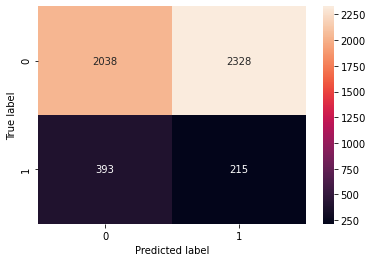

In [289]:
cm_1 = confusion_matrix(y_test,y_pred_1)
sns.heatmap(cm_1, annot=True, fmt="g")
plt.xlabel("Predicted label")
plt.ylabel("True label")

Text(33.0, 0.5, 'True label')

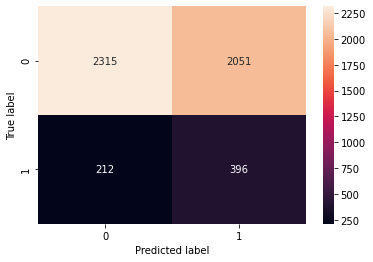

In [290]:
cm_2 = confusion_matrix(y_test,y_pred_2)
sns.heatmap(cm_2, annot=True, fmt="g")
plt.xlabel("Predicted label")
plt.ylabel("True label")

Text(33.0, 0.5, 'True label')

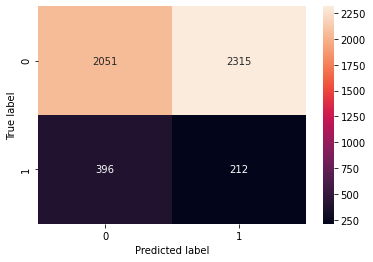

In [291]:
cm_3 = confusion_matrix(y_test,y_pred_3)
sns.heatmap(cm_3, annot=True, fmt="g")
plt.xlabel("Predicted label")
plt.ylabel("True label")

Las matrices 1 y 3 son similares entre sí y en general tienen una baja cantidad de positivos verdaderos.
La segunda matriz es interesante porque muestra 396 casos positivos de un total de 608 que debía indicar como positivos.

<h1>Decision Tree</h1>

Como segundo algoritmo se utilizará árbol de decisión.
Para mantener el orden en los vectores de predicción se utilizarán los índices 4,5,6.<br>
Se probó modificando diferentes parámetros y de los probados el que impactó mayormente en el accuracy es "class_weight" que corresponde el peso relativo de las clases.
Se probó "balanced", que da pesos a las clases inversamente proporcional a su frecuencia, una proporción 5:1 para acepta:no acepta y None, que asigna pesos 1:1 a las diferentes clases.

In [313]:
dt_4 = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=10, max_leaf_nodes=10, class_weight="balanced")
dt_5 = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=10, max_leaf_nodes=10, class_weight={1:5, 0:1})
dt_6 = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=10, max_leaf_nodes=10, class_weight=None)

In [314]:
dt_4.fit(x_train,y_train)
dt_5.fit(x_train,y_train)
dt_6.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10)

In [315]:
y_pred_4 = dt_4.predict(x_test)
y_pred_5 = dt_5.predict(x_test)
y_pred_6 = dt_6.predict(x_test)

In [316]:
print(f"Accuracy Decision Tree 4: {round(accuracy_score(y_test,y_pred_4, normalize=True)*100,2)} %")
print(f"Accuracy Decision Tree 5: {round(accuracy_score(y_test,y_pred_5, normalize=True)*100,2)} %")
print(f"Accuracy Decision Tree 6: {round(accuracy_score(y_test,y_pred_6, normalize=True)*100,2)} %")

Accuracy Decision Tree 4: 68.9 %
Accuracy Decision Tree 5: 79.69 %
Accuracy Decision Tree 6: 88.06 %


Se observa que en la medida que el peso de la clase "1" aumenta con relación al peso de la clase "0", accuracy disminuye. Esto tiene sentido ya que al tener menos datos para la clase 1, el aprendizaje es de menor calidad.
Para pesos 1:1 accuracy es cercano a 90%, por lejos el mayor de las alternativas probadas tanto en Decision Tree como en K-Means.

In [317]:
print(classification_report(y_test,y_pred_4))

              precision    recall  f1-score   support

         0.0       0.95      0.68      0.79      4366
         1.0       0.25      0.75      0.37       608

    accuracy                           0.69      4974
   macro avg       0.60      0.72      0.58      4974
weighted avg       0.87      0.69      0.74      4974



In [318]:
print(classification_report(y_test,y_pred_5))

              precision    recall  f1-score   support

         0.0       0.93      0.83      0.88      4366
         1.0       0.31      0.54      0.39       608

    accuracy                           0.80      4974
   macro avg       0.62      0.69      0.64      4974
weighted avg       0.85      0.80      0.82      4974



In [433]:
print(classification_report(y_test,y_pred_6))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      4366
         1.0       0.56      0.11      0.19       608

    accuracy                           0.88      4974
   macro avg       0.72      0.55      0.56      4974
weighted avg       0.85      0.88      0.84      4974



En cuanto a precision, recall y f1-score en general se observan mejores valores en Decision Tree que en K-Means, pero de todas maneras se mantiene la tendencia de que el modelo se comporta mucho mejor para las clases 0 (no acepta) que para las clases 1 (acepta).

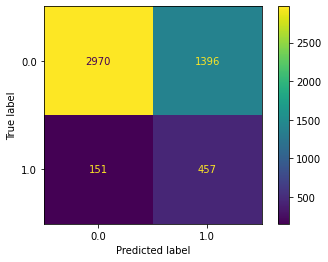

In [320]:
plot_confusion_matrix(dt_4,x_test,y_test)

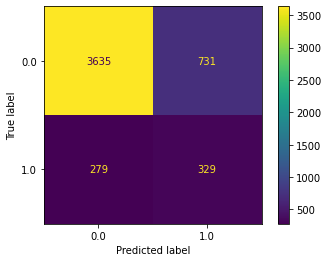

In [321]:
plot_confusion_matrix(dt_5,x_test,y_test)

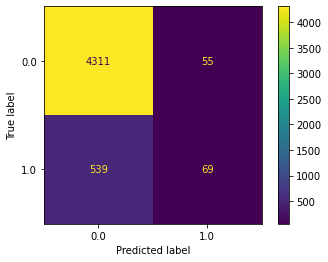

In [322]:
plot_confusion_matrix(dt_6,x_test,y_test)

Las matrices de confusión son bastante interesantes en este caso. Como se comentó anteriormente al aumentar el peso relativo de la clase 1 en el ajuste del modelo, accuracy disminuye; pero en las matrices se observa que a la vez, aumentar el peso de la clase 1 mejora notablemente la predicción de los verdaderos positivos generando una relación inversa entre ambos:

Accuracy = 68.90, True Positive = 457/608<br>
Accuracy = 79.69, True Positive = 329/608<br>
Accuracy = 88.06, True Positive = 69/608<br>

Esto indica que si lo que se busca es que el modelo sea bueno identificando las clases 1 (acepta depósito), accuracy no es la mejor métrica en este caso. Dado que se considera más importante predecir llamar a la mayor cantidad posible de clientes que aceptarán hacer el depósito, se considera como mejor modelo de decision tree el caso 4 (dt_4), ya que aunque tenga menor acccuracy, predice correctamente una mayor cantidad de verdaderos positivos. 


<h1>Mejores Modelos</h1>



In [323]:
best_kmeans = k_means_2
best_dt = dt_4

<h1>Visualización Mejores Algoritmos</h1>

In [524]:
# Se crea un data frame en el cual se almacenarán las predicciónes de ambos algoritmos para todos los datos.
df_visualización = df_tsne.copy()

In [525]:
df_visualización["pred_k_means"] = best_kmeans.predict(df_visualización[["tsne_1", "tsne_2"]])
df_visualización["pred_dt"] = best_dt.predict(df_visualización[["tsne_1", "tsne_2"]])

In [526]:
df_visualización

tsne_1     tsne_2  accepts  pred_k_means  pred_dt
0      14.826394 -44.336720      0.0             0      0.0
1     -10.928138 -55.974937      0.0             0      0.0
2     -62.463989  -5.076336      0.0             1      0.0
3      14.475474 -54.381741      0.0             0      0.0
4     -29.577194  40.361992      0.0             1      0.0
...          ...        ...      ...           ...      ...
49727  57.142967   3.511026      0.0             0      0.0
49728 -55.236477  -9.894878      0.0             1      0.0
49729  39.480259  26.662064      0.0             0      0.0
49730 -36.952141 -15.795799      0.0             1      0.0
49731 -23.267237 -39.202827      0.0             1      1.0

[49732 rows x 5 columns]

In [527]:
# Se cambian las columnas a entero, para que se vean igual en los gráficos.
df_visualización = df_visualización.astype({"accepts": int, "pred_dt": int})

Text(0.5, 1.0, 'Predicción Decision Tree')

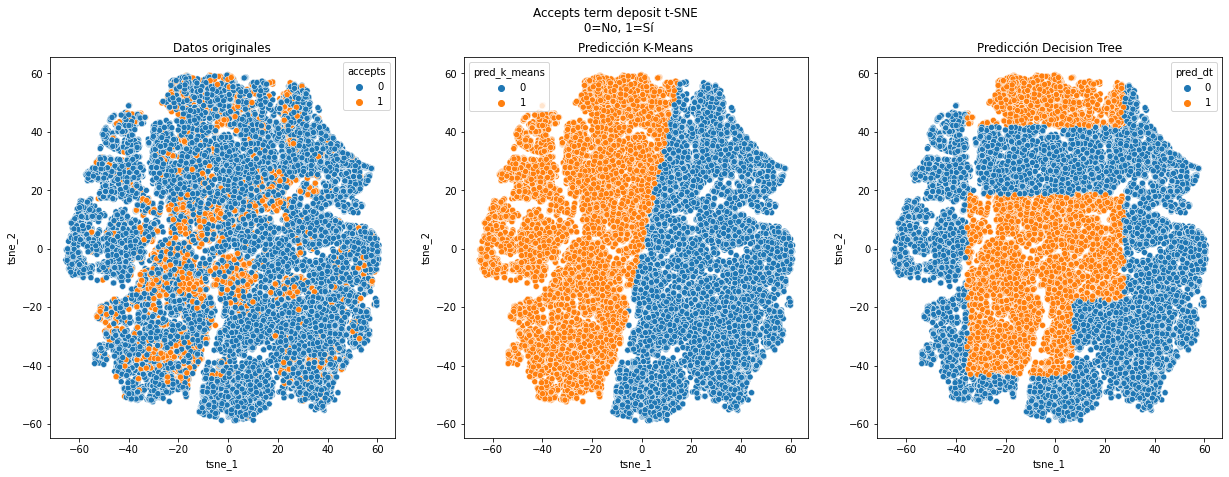

In [528]:
fig_vis, ax = plt.subplots(nrows=1,ncols=3, figsize=(21,7))
fig_vis.suptitle("Accepts term deposit t-SNE \n 0=No, 1=Sí")


sns.scatterplot(data=df_visualización, x="tsne_1", y="tsne_2", hue="accepts",ax=ax[0])
sns.scatterplot(data=df_visualización, x="tsne_1", y="tsne_2", hue="pred_k_means",ax=ax[1])
sns.scatterplot(data=df_visualización, x="tsne_1", y="tsne_2", hue="pred_dt",ax=ax[2])

ax[0].set_title("Datos originales")
ax[1].set_title("Predicción K-Means")
ax[2].set_title("Predicción Decision Tree")



En las figuras se puede observar la distribución de los datos originales, vs la preddición K-Means y Decision Tree.
Se observa que la predicción de Decision Tree intenta tomar una distribución más similar a los datos originales, pero de todas maneras se observan claros grupos en los cuales todos los puntos fueron identificados con el mismo label, a diferencia de los datos originales, los cuales están más dispersos.
En el caso de Decision Tree se observa que es capaz de identificar en alguna medida las zonas donde la clase "1" está más concentrada, pero se ve claramente que el recall es incrementado a costa de la precisión ya que identifica varios puntos de clase "0" como clase "1"(se ven más puntos naranja de los que deberían haber).

<h1>Análisis General</h1>

Es posible que los algoritmos sean muy "rígidos" en cuanto a sus dimensiones. Se observa que en ambos casos, para hacer sus predicciones los algoritmos delimitan zonas claras de clases 0 y 1. Quizás se debería trabajar con t-SNE mayor a 2 para intentar darle más flexibilidad al modelo.<br>

En general se necesitaría trabajar más en los algoritmos para aplicarlos en casos reales, pero cabe mencionar que en el caso del algoritmo dt_4 se predicen 151/608 positivos como negativos. Esto quiere decir que si se aplicara este algoritmo, se llamaría a algunos clientes con baja probabilidad de aceptar hacer el depósito, pero a la vez se contactaría a la mayoría de los clientes que sí tienen más probabilidad de aceptar hacer el depósito, lo cual podría ser suficientemente bueno para este caso.

<h1>Visualización Árbol</h1>

Como ejercicio adicional se visualiza el árbol. Se observa que la profundidad del árbol no es muy grande (6). Esto apoya la noción de que quizás el modelo quedó sobresimplificado con 2 dimensiones, lo cual le impide adaptarse bien a ciertos puntos.

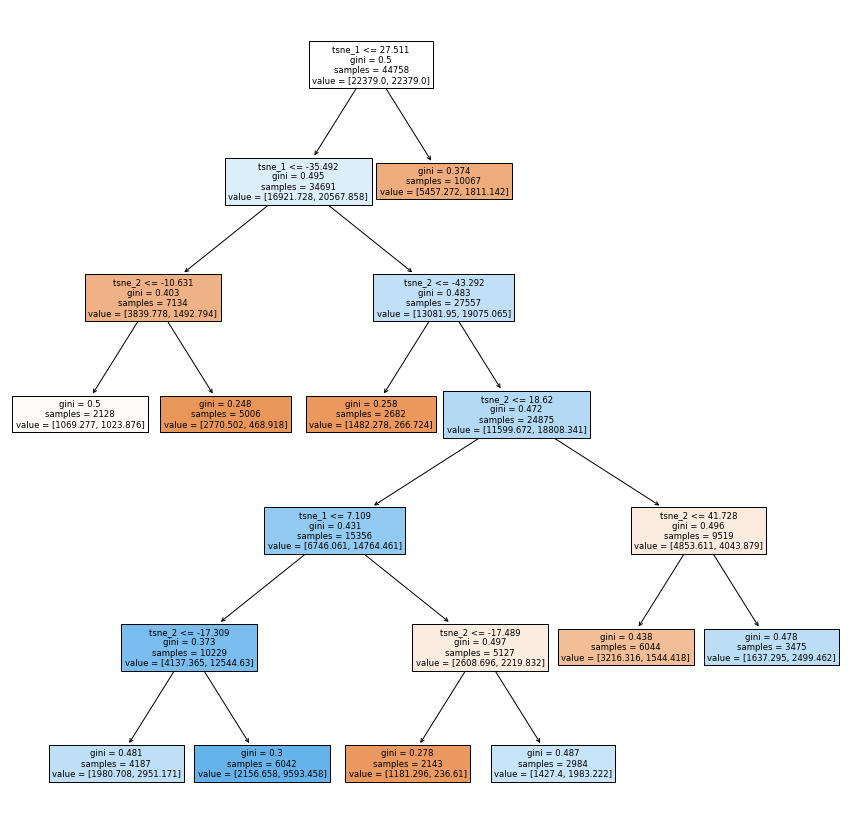

In [529]:
arbol_4 = plt.figure(figsize=(15,15))
tree_4 = plot_tree(dt_4,
              feature_names=df_tsne.columns,
              filled=True, max_depth=None)


<h1>Validación</h1>

Como método de validación utilizará K-Fold Cross Validation.<br>
En primera instancia se harán visualizaciones gráficas de Accuracy, Precision, Recall, F1-Score (los 3 últimos para cada clase) al aplicar el método K-Fold a modelos con parámetros iguales a los seleccionados como mejor K-Means y Mejor Decision Tree.<br>
Se realizarán algunas observaciones basadas en los gráficos y luego en la sección "Comparación K-Means/Decision Tree" se imprimen los promedios y desviaciones estándar de cada una de las métricas mencionadas, para realizar una comparación final y validación de las observaciones realizadas hasta el momento.

In [429]:
kfold = KFold(n_splits=30)

<h2>K-Means</h2>

In [430]:
k_means_a_validar = KMeans(n_clusters=clusters, init="k-means++",n_init=100, random_state=0, verbose=2, max_iter=600, tol=0.0001)

In [512]:
# Se crean listas que almacenarán los valores de cada iteración de K-Fold

accuracies_k_means = []
precisions_k_means = []
recalls_k_means = []
f1_k_means = []

for train_index, test_index in kfold.split(x):
    X_train, X_test = x[train_index], x[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    k_means_a_validar = k_means_a_validar.fit(X_train,Y_train)
    
    Y_iteracion = k_means_a_validar.predict(X_test)
    # En el caso de precision, recall y f1-score se almacenan tuplas con el formato (clase 0, clase 1)
    accuracy_iteracion = accuracy_score(Y_test, Y_iteracion, normalize=True)*100
    precision_iteracion = (precision_score(Y_test,Y_iteracion, pos_label=0)*100, precision_score(Y_test,Y_iteracion, pos_label=1)*100)
    recall_iteracion = (recall_score(Y_test,Y_iteracion, pos_label=0)*100, recall_score(Y_test,Y_iteracion, pos_label=1)*100)
    f1_iteracion = (f1_score(Y_test,Y_iteracion,pos_label=0)*100, f1_score(Y_test,Y_iteracion,pos_label=1)*100)
    
    accuracies_k_means.append(accuracy_iteracion)
    precisions_k_means.append(precision_iteracion)
    recalls_k_means.append(recall_iteracion)
    f1_k_means.append(f1_iteracion)

Initialization complete
Iteration 0, inertia 493314.5687773539
Iteration 1, inertia 355000.7446369907
Iteration 2, inertia 354883.2798122133
Iteration 3, inertia 354874.9295089497
Iteration 4, inertia 354872.4992473399
Iteration 5, inertia 354871.18138300464
Iteration 6, inertia 354870.0633796003
Iteration 7, inertia 354869.6444430414
Converged at iteration 7: center shift 1.5837824580293543e-05 within tolerance 5.343975938887336e-05.
Initialization complete
Iteration 0, inertia 465117.1751270949
Iteration 1, inertia 338540.47550574923
Iteration 2, inertia 331633.05702636973
Iteration 3, inertia 329977.57490663434
Iteration 4, inertia 329554.6236165161
Iteration 5, inertia 329480.61575458455
Iteration 6, inertia 329473.35083347885
Iteration 7, inertia 329472.7620814378
Converged at iteration 7: center shift 2.678820421004704e-06 within tolerance 5.343975938887336e-05.
Initialization complete
Iteration 0, inertia 461877.33393435465
Iteration 1, inertia 357727.73915825743
Iteration 2, in

Iteration 2, inertia 350159.22198113566
Iteration 3, inertia 346848.93795389216
Iteration 4, inertia 345796.2304679997
Iteration 5, inertia 345546.992798656
Iteration 6, inertia 345449.8014430069
Iteration 7, inertia 345396.97532613104
Iteration 8, inertia 345364.5642101578
Iteration 9, inertia 345342.64335239463
Iteration 10, inertia 345326.5109651591
Iteration 11, inertia 345314.317727551
Iteration 12, inertia 345304.9659302252
Iteration 13, inertia 345297.6536778246
Iteration 14, inertia 345291.7756341399
Iteration 15, inertia 345287.58819207357
Iteration 16, inertia 345283.7523329755
Iteration 17, inertia 345280.78857251524
Iteration 18, inertia 345277.37240644067
Iteration 19, inertia 345274.9982571637
Converged at iteration 19: center shift 4.026836863425961e-05 within tolerance 5.343975938887336e-05.
Initialization complete
Iteration 0, inertia 407933.4600417553
Iteration 1, inertia 330548.03664673347
Iteration 2, inertia 329589.24857580435
Iteration 3, inertia 329482.1207338254

Iteration 1, inertia 355319.1784606289
Iteration 2, inertia 350604.79565621726
Iteration 3, inertia 347653.4350136716
Iteration 4, inertia 346696.12377069687
Iteration 5, inertia 346294.10829814884
Iteration 6, inertia 346055.48160519556
Iteration 7, inertia 345869.92378897883
Iteration 8, inertia 345713.60906548484
Iteration 9, inertia 345586.693668265
Iteration 10, inertia 345484.3651650539
Iteration 11, inertia 345405.2055400379
Iteration 12, inertia 345359.22225548077
Iteration 13, inertia 345333.32252589863
Iteration 14, inertia 345315.6556382661
Iteration 15, inertia 345302.20771136653
Iteration 16, inertia 345292.84454722446
Iteration 17, inertia 345285.83649470424
Iteration 18, inertia 345281.1824229304
Iteration 19, inertia 345276.93849893456
Iteration 20, inertia 345273.2880786963
Iteration 21, inertia 345269.79446210054
Iteration 22, inertia 345266.5390124345
Converged at iteration 22: center shift 4.837487911749161e-05 within tolerance 5.343975938887336e-05.
Initialization 

Iteration 22, inertia 345475.69428426295
Iteration 23, inertia 345453.96562025324
Iteration 24, inertia 345432.7315188278
Iteration 25, inertia 345400.4782115419
Iteration 26, inertia 345369.8657921274
Iteration 27, inertia 345345.04393690673
Iteration 28, inertia 345325.81121288665
Iteration 29, inertia 345316.08001061156
Iteration 30, inertia 345311.42461523064
Iteration 31, inertia 345306.96364912234
Iteration 32, inertia 345301.43200172856
Iteration 33, inertia 345293.85662634176
Iteration 34, inertia 345286.37202965526
Iteration 35, inertia 345279.44866515667
Iteration 36, inertia 345273.43481834576
Iteration 37, inertia 345269.50544136285
Iteration 38, inertia 345267.2155695601
Converged at iteration 38: center shift 2.519870348326447e-05 within tolerance 5.343975938887336e-05.
Initialization complete
Iteration 0, inertia 633152.5335638602
Iteration 1, inertia 355181.6206458939
Iteration 2, inertia 354885.8736683534
Iteration 3, inertia 354873.8684035514
Iteration 4, inertia 3548

Iteration 1, inertia 359398.1156335886
Iteration 2, inertia 357132.74271796626
Iteration 3, inertia 356129.02742899366
Iteration 4, inertia 355682.1233322977
Iteration 5, inertia 355486.41513494303
Iteration 6, inertia 355387.933529464
Iteration 7, inertia 355341.5464233315
Iteration 8, inertia 355309.85248248314
Iteration 9, inertia 355288.40034554404
Iteration 10, inertia 355276.05386157264
Iteration 11, inertia 355268.1072352344
Iteration 12, inertia 355260.57179850596
Iteration 13, inertia 355252.2425727247
Iteration 14, inertia 355246.32064709155
Iteration 15, inertia 355238.9737866283
Iteration 16, inertia 355230.8501312077
Iteration 17, inertia 355224.90305874834
Iteration 18, inertia 355222.08823810425
Iteration 19, inertia 355220.295723066
Iteration 20, inertia 355218.2745928573
Iteration 21, inertia 355216.5997604674
Iteration 22, inertia 355215.06611711066
Iteration 23, inertia 355212.8703091362
Iteration 24, inertia 355210.4563976835
Iteration 25, inertia 355208.2067293078


Iteration 7, inertia 355523.99041230005
Iteration 8, inertia 355510.78490347636
Iteration 9, inertia 355499.0394542625
Iteration 10, inertia 355491.92795454676
Iteration 11, inertia 355488.4587984697
Iteration 12, inertia 355486.4907781453
Converged at iteration 12: center shift 2.2134735735951023e-05 within tolerance 5.343975938887336e-05.
Initialization complete
Iteration 0, inertia 453265.1222874789
Iteration 1, inertia 358391.20026996237
Iteration 2, inertia 355261.56680201297
Iteration 3, inertia 353019.8362052732
Iteration 4, inertia 351385.7154050066
Iteration 5, inertia 350204.314092747
Iteration 6, inertia 349406.53319971863
Iteration 7, inertia 348977.350613169
Iteration 8, inertia 348768.87578763365
Iteration 9, inertia 348665.2846982789
Iteration 10, inertia 348609.5154758836
Iteration 11, inertia 348577.55668273725
Iteration 12, inertia 348561.23414276633
Iteration 13, inertia 348551.1156322637
Iteration 14, inertia 348546.75061025954
Iteration 15, inertia 348542.412785956

Iteration 21, inertia 348574.7020211617
Iteration 22, inertia 348561.48067107116
Iteration 23, inertia 348552.5873444792
Iteration 24, inertia 348547.1173545656
Iteration 25, inertia 348543.4016651037
Iteration 26, inertia 348539.7781142516
Converged at iteration 26: center shift 5.3352291061620416e-05 within tolerance 5.343975938887336e-05.
Initialization complete
Iteration 0, inertia 503135.5010541027
Iteration 1, inertia 352791.54519539
Iteration 2, inertia 351998.5427327549
Iteration 3, inertia 351497.6421137765
Iteration 4, inertia 350772.1583758917
Iteration 5, inertia 349415.04307356686
Iteration 6, inertia 347372.22418081353
Iteration 7, inertia 346070.776169934
Iteration 8, inertia 345677.5926330605
Iteration 9, inertia 345530.86299493373
Iteration 10, inertia 345452.21978931234
Iteration 11, inertia 345406.3337528528
Iteration 12, inertia 345371.0718897652
Iteration 13, inertia 345343.4906272517
Iteration 14, inertia 345325.170672151
Iteration 15, inertia 345310.33557027386
I

Iteration 9, inertia 345535.21531507175
Iteration 10, inertia 345448.03558124957
Iteration 11, inertia 345399.0080325896
Iteration 12, inertia 345352.4283488092
Iteration 13, inertia 345319.0480404481
Iteration 14, inertia 345298.09546260786
Iteration 15, inertia 345285.33831761876
Iteration 16, inertia 345278.29903960996
Iteration 17, inertia 345274.79429383005
Iteration 18, inertia 345272.113095668
Converged at iteration 18: center shift 4.775571594134441e-05 within tolerance 5.343975938887336e-05.
Initialization complete
Iteration 0, inertia 486641.8131646617
Iteration 1, inertia 353811.02726033295
Iteration 2, inertia 351194.61184449325
Iteration 3, inertia 349731.73367298563
Iteration 4, inertia 348993.1450975528
Iteration 5, inertia 348714.3409100093
Iteration 6, inertia 348610.44807109813
Iteration 7, inertia 348569.17107606726
Iteration 8, inertia 348551.9585969049
Iteration 9, inertia 348543.3232292877
Iteration 10, inertia 348538.2919873812
Iteration 11, inertia 348535.587841

Iteration 24, inertia 348550.76052485016
Iteration 25, inertia 348545.8849804525
Iteration 26, inertia 348542.0039338307
Iteration 27, inertia 348539.1208409009
Converged at iteration 27: center shift 4.233662661433148e-05 within tolerance 5.343975938887336e-05.
Initialization complete
Iteration 0, inertia 519939.35599774035
Iteration 1, inertia 351006.39950536314
Iteration 2, inertia 349861.33407564805
Iteration 3, inertia 349383.30156130524
Iteration 4, inertia 349146.6821991169
Iteration 5, inertia 349001.1227800455
Iteration 6, inertia 348893.3814601227
Iteration 7, inertia 348803.8513594298
Iteration 8, inertia 348740.56474066817
Iteration 9, inertia 348686.3881563634
Iteration 10, inertia 348642.2823379287
Iteration 11, inertia 348609.1062152331
Iteration 12, inertia 348584.2122426941
Iteration 13, inertia 348567.4969233944
Iteration 14, inertia 348556.30662996764
Iteration 15, inertia 348549.3725462093
Iteration 16, inertia 348545.2786688887
Iteration 17, inertia 348541.52706911

d:\python\pycharm projects\general\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Iteration 0, inertia 453072.4543952271
Iteration 1, inertia 355725.331098859
Iteration 2, inertia 349314.4799267629
Iteration 3, inertia 347468.133475351
Iteration 4, inertia 346198.5538892058
Iteration 5, inertia 345276.312782413
Iteration 6, inertia 344785.36416881665
Iteration 7, inertia 344548.37940437486
Iteration 8, inertia 344427.1958214699
Iteration 9, inertia 344353.77930508804
Iteration 10, inertia 344317.37753039825
Iteration 11, inertia 344293.5978937056
Iteration 12, inertia 344279.7707692847
Iteration 13, inertia 344271.6294768595
Iteration 14, inertia 344267.7681459567
Converged at iteration 14: center shift 4.8639648938136686e-05 within tolerance 5.350249717578428e-05.
Initialization complete
Iteration 0, inertia 449018.33499297925
Iteration 1, inertia 357956.1333145205
Iteration 2, inertia 356960.0783206446
Iteration 3, inertia 356416.3366826107
Iteration 4, inertia 355950.008839564
Iteration 5, inertia 355228.4653133451
Iteration 6, inertia 353078.3805011287
Iteratio

Iteration 29, inertia 344267.1419515779
Iteration 30, inertia 344262.8362938295
Converged at iteration 30: center shift 3.5857828257909475e-05 within tolerance 5.350249717578428e-05.
Initialization complete
Iteration 0, inertia 536179.119112455
Iteration 1, inertia 335845.1971288663
Iteration 2, inertia 330222.12294845755
Iteration 3, inertia 330052.1538684737
Iteration 4, inertia 330044.0349982233
Converged at iteration 4: center shift 2.350618469646089e-05 within tolerance 5.350249717578428e-05.
Initialization complete
Iteration 0, inertia 482551.1988820412
Iteration 1, inertia 352428.13442363625
Iteration 2, inertia 349786.14150538715
Iteration 3, inertia 347479.7349447334
Iteration 4, inertia 345975.6488059762
Iteration 5, inertia 345229.47462640604
Iteration 6, inertia 344795.9142669572
Iteration 7, inertia 344523.96064869565
Iteration 8, inertia 344376.70130921126
Iteration 9, inertia 344301.80336108984
Iteration 10, inertia 344275.4391007109
Iteration 11, inertia 344266.35613682

Iteration 18, inertia 349302.7353254633
Iteration 19, inertia 349267.13745107787
Iteration 20, inertia 349240.26448118745
Iteration 21, inertia 349222.24696505093
Iteration 22, inertia 349210.9725797668
Iteration 23, inertia 349202.20183285803
Iteration 24, inertia 349195.06020317797
Iteration 25, inertia 349188.928922323
Iteration 26, inertia 349182.72573765286
Iteration 27, inertia 349177.8401137721
Iteration 28, inertia 349173.92640757037
Iteration 29, inertia 349170.4277914245
Iteration 30, inertia 349167.68252750067
Iteration 31, inertia 349165.012406824
Iteration 32, inertia 349162.1775240871
Converged at iteration 32: center shift 5.0760699120556255e-05 within tolerance 5.350249717578428e-05.
Initialization complete
Iteration 0, inertia 440179.1636780412
Iteration 1, inertia 353191.1444421475
Iteration 2, inertia 351091.75246569514
Iteration 3, inertia 350281.0799564371
Iteration 4, inertia 349872.0322961194
Iteration 5, inertia 349615.15006748564
Iteration 6, inertia 349440.427

Iteration 21, inertia 344274.41887292865
Iteration 22, inertia 344269.23561077385
Iteration 23, inertia 344266.74656741176
Converged at iteration 23: center shift 3.576543750821567e-05 within tolerance 5.350249717578428e-05.
Initialization complete
Iteration 0, inertia 460670.00719036144
Iteration 1, inertia 349837.18895152817
Iteration 2, inertia 347170.0862739669
Iteration 3, inertia 345552.61946209555
Iteration 4, inertia 344765.04856466455
Iteration 5, inertia 344452.5149380386
Iteration 6, inertia 344345.33929734
Iteration 7, inertia 344290.0828580018
Iteration 8, inertia 344269.6065935285
Iteration 9, inertia 344263.2204673866
Iteration 10, inertia 344261.1232977469
Converged at iteration 10: center shift 1.511067798212622e-05 within tolerance 5.350249717578428e-05.
Initialization complete
Iteration 0, inertia 520637.9846425996
Iteration 1, inertia 357280.09334764513
Iteration 2, inertia 356479.24916958547
Iteration 3, inertia 356250.0420548546
Iteration 4, inertia 356184.1036384

Converged at iteration 12: center shift 4.181114547706504e-05 within tolerance 5.350249717578428e-05.
Initialization complete
Iteration 0, inertia 506859.06472178147
Iteration 1, inertia 330811.2529013473
Iteration 2, inertia 330131.71693478286
Iteration 3, inertia 330050.73272993596
Iteration 4, inertia 330044.1804966338
Converged at iteration 4: center shift 3.202583873474662e-05 within tolerance 5.350249717578428e-05.
Initialization complete
Iteration 0, inertia 557860.5727402036
Iteration 1, inertia 349359.58649317885
Iteration 2, inertia 345738.081260232
Iteration 3, inertia 344819.51763169694
Iteration 4, inertia 344495.6561035063
Iteration 5, inertia 344370.96797190426
Iteration 6, inertia 344321.02317528875
Iteration 7, inertia 344296.55852880125
Iteration 8, inertia 344282.87946315116
Iteration 9, inertia 344273.7691165017
Iteration 10, inertia 344269.0399016078
Iteration 11, inertia 344266.6084283107
Converged at iteration 11: center shift 4.2764650340055624e-05 within tolera

Iteration 13, inertia 349741.98019739863
Iteration 14, inertia 349647.8616648637
Iteration 15, inertia 349555.09968120215
Iteration 16, inertia 349471.9879702504
Iteration 17, inertia 349409.0039043483
Iteration 18, inertia 349354.4809487865
Iteration 19, inertia 349307.71000962117
Iteration 20, inertia 349270.5996506961
Iteration 21, inertia 349242.8411596707
Iteration 22, inertia 349224.16033383156
Iteration 23, inertia 349211.80893830024
Iteration 24, inertia 349203.0129565808
Iteration 25, inertia 349195.4390650363
Iteration 26, inertia 349189.3114328986
Iteration 27, inertia 349182.8959922482
Iteration 28, inertia 349177.9364118575
Iteration 29, inertia 349173.97105374123
Iteration 30, inertia 349170.4277914245
Iteration 31, inertia 349167.68252750067
Iteration 32, inertia 349165.012406824
Iteration 33, inertia 349162.17752408714
Converged at iteration 33: center shift 5.076069912055615e-05 within tolerance 5.350249717578428e-05.
Initialization complete
Iteration 0, inertia 458625

Iteration 6, inertia 344535.0223205847
Iteration 7, inertia 344378.2869349477
Iteration 8, inertia 344304.7497083431
Iteration 9, inertia 344278.9795615662
Iteration 10, inertia 344268.9281165208
Iteration 11, inertia 344264.31721275457
Iteration 12, inertia 344262.0766057747
Converged at iteration 12: center shift 2.8263365531629115e-05 within tolerance 5.350249717578428e-05.
Initialization complete
Iteration 0, inertia 459925.26064638403
Iteration 1, inertia 352535.6581451605
Iteration 2, inertia 347398.8230706249
Iteration 3, inertia 345018.26086578454
Iteration 4, inertia 344468.99751806894
Iteration 5, inertia 344337.53119630914
Iteration 6, inertia 344289.45400868106
Iteration 7, inertia 344271.2883392439
Iteration 8, inertia 344264.5410644319
Iteration 9, inertia 344262.0661759853
Converged at iteration 9: center shift 2.628255041413389e-05 within tolerance 5.350249717578428e-05.
Initialization complete
Iteration 0, inertia 823673.7791905303
Iteration 1, inertia 350497.463844296

Iteration 1, inertia 359551.5747498863
Iteration 2, inertia 356301.92243781476
Iteration 3, inertia 354227.5550901782
Iteration 4, inertia 352557.4474535493
Iteration 5, inertia 351309.5750406298
Iteration 6, inertia 350498.20178783307
Iteration 7, inertia 350013.8075271536
Iteration 8, inertia 349752.23449680064
Iteration 9, inertia 349596.1907222753
Iteration 10, inertia 349489.71608437755
Iteration 11, inertia 349416.58126018784
Iteration 12, inertia 349358.64933396335
Iteration 13, inertia 349312.23348906863
Iteration 14, inertia 349275.7511574043
Iteration 15, inertia 349246.1032677149
Iteration 16, inertia 349226.62789095385
Iteration 17, inertia 349213.54370905
Iteration 18, inertia 349204.83673611574
Iteration 19, inertia 349196.78267862025
Iteration 20, inertia 349190.51942265354
Iteration 21, inertia 349183.7963503982
Iteration 22, inertia 349178.31645480136
Iteration 23, inertia 349174.3946958934
Iteration 24, inertia 349170.7545536803
Iteration 25, inertia 349168.0447728171

d:\python\pycharm projects\general\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 6, inertia 328703.63077557384
Converged at iteration 6: center shift 4.4016273132459575e-05 within tolerance 5.32997922208193e-05.
Initialization complete
Iteration 0, inertia 520454.49821509334
Iteration 1, inertia 363064.1990518178
Iteration 2, inertia 360713.17293947743
Iteration 3, inertia 359802.9541202018
Iteration 4, inertia 359267.214269702
Iteration 5, inertia 358955.34519365133
Iteration 6, inertia 358736.6517640557
Iteration 7, inertia 358551.7382001701
Iteration 8, inertia 358424.1808666585
Iteration 9, inertia 358334.8406971642
Iteration 10, inertia 358280.6950978891
Iteration 11, inertia 358248.74057833146
Iteration 12, inertia 358228.4668153761
Iteration 13, inertia 358210.9332746214
Iteration 14, inertia 358199.91582125594
Iteration 15, inertia 358194.9242597715
Iteration 16, inertia 358192.9559179933
Iteration 17, inertia 358192.2475569639
Iteration 18, inertia 358191.888279102
Iteration 19, inertia 358191.56310637016
Iteration 20, inertia 358191.39509057585


Iteration 5, inertia 355353.5412390129
Iteration 6, inertia 355345.4231993587
Iteration 7, inertia 355338.9300465657
Iteration 8, inertia 355332.399281931
Iteration 9, inertia 355325.87134127325
Iteration 10, inertia 355320.5544234835
Iteration 11, inertia 355316.2503634427
Iteration 12, inertia 355311.5612177314
Iteration 13, inertia 355305.54055391235
Iteration 14, inertia 355297.7779721011
Iteration 15, inertia 355282.1823884748
Iteration 16, inertia 355254.02350322646
Iteration 17, inertia 355209.36916695547
Iteration 18, inertia 355165.54288888304
Iteration 19, inertia 355140.1826965389
Iteration 20, inertia 355129.0898326218
Iteration 21, inertia 355121.442151586
Iteration 22, inertia 355115.896576414
Iteration 23, inertia 355112.4426307738
Iteration 24, inertia 355109.26226223656
Iteration 25, inertia 355107.2577621573
Iteration 26, inertia 355105.60246993526
Iteration 27, inertia 355103.57601643924
Iteration 28, inertia 355101.02022701845
Iteration 29, inertia 355099.4135546842

Iteration 31, inertia 347645.5277410441
Iteration 32, inertia 347641.36467912566
Iteration 33, inertia 347636.9909595471
Iteration 34, inertia 347632.7234224451
Iteration 35, inertia 347628.09487418784
Iteration 36, inertia 347622.78688835306
Iteration 37, inertia 347616.2055769139
Iteration 38, inertia 347608.46607915766
Iteration 39, inertia 347597.70105107396
Iteration 40, inertia 347582.66412188933
Iteration 41, inertia 347562.9943361173
Iteration 42, inertia 347540.94281169627
Iteration 43, inertia 347510.41352752753
Iteration 44, inertia 347468.0414205639
Iteration 45, inertia 347407.5483122483
Iteration 46, inertia 347321.9832098431
Iteration 47, inertia 347201.1683476968
Iteration 48, inertia 347016.01796436857
Iteration 49, inertia 346710.7859654227
Iteration 50, inertia 346319.8145209619
Iteration 51, inertia 345892.0412078195
Iteration 52, inertia 345488.95635416213
Iteration 53, inertia 345157.16370081785
Iteration 54, inertia 344852.3013107344
Iteration 55, inertia 344529.

Iteration 8, inertia 355155.6265899198
Iteration 9, inertia 355154.09361683356
Iteration 10, inertia 355151.9762857282
Iteration 11, inertia 355149.9766727908
Iteration 12, inertia 355146.5937954256
Iteration 13, inertia 355141.0246471996
Iteration 14, inertia 355133.49628390686
Iteration 15, inertia 355121.87544195214
Iteration 16, inertia 355104.53468458285
Iteration 17, inertia 355090.88256131014
Iteration 18, inertia 355083.6992564383
Iteration 19, inertia 355082.0854434858
Iteration 20, inertia 355081.7667529975
Converged at iteration 20: center shift 1.5469229519941136e-05 within tolerance 5.32997922208193e-05.
Initialization complete
Iteration 0, inertia 484072.07067891903
Iteration 1, inertia 352849.9782163296
Iteration 2, inertia 351168.35268318694
Iteration 3, inertia 350015.9648748877
Iteration 4, inertia 349232.77710129763
Iteration 5, inertia 348748.8006589539
Iteration 6, inertia 348492.747446553
Iteration 7, inertia 348345.757290491
Iteration 8, inertia 348237.8825092237

Iteration 0, inertia 689505.4710451717
Iteration 1, inertia 350308.45676040824
Iteration 2, inertia 348632.01760696556
Iteration 3, inertia 347946.8920024493
Iteration 4, inertia 347658.70433686423
Iteration 5, inertia 347516.21517320065
Iteration 6, inertia 347416.57884244685
Iteration 7, inertia 347302.8326002348
Iteration 8, inertia 347157.3584611739
Iteration 9, inertia 346926.43568306114
Iteration 10, inertia 346570.9256548606
Iteration 11, inertia 346148.30932351615
Iteration 12, inertia 345705.34173566167
Iteration 13, inertia 345320.0241178701
Iteration 14, inertia 344991.2198626452
Iteration 15, inertia 344664.9369452498
Iteration 16, inertia 344340.8053637105
Iteration 17, inertia 344048.79058377264
Iteration 18, inertia 343829.06981948594
Iteration 19, inertia 343711.21530731715
Iteration 20, inertia 343653.53621295997
Iteration 21, inertia 343620.5753420456
Iteration 22, inertia 343598.3253950575
Iteration 23, inertia 343584.4183903663
Iteration 24, inertia 343574.808221562

Iteration 34, inertia 353156.1679178474
Iteration 35, inertia 350334.970471199
Iteration 36, inertia 342527.96575117775
Iteration 37, inertia 336922.43867839756
Iteration 38, inertia 333161.86744027695
Iteration 39, inertia 329663.46358430816
Iteration 40, inertia 328769.3015952846
Iteration 41, inertia 328707.04652041086
Iteration 42, inertia 328703.2172635309
Converged at iteration 42: center shift 1.828553102695074e-05 within tolerance 5.32997922208193e-05.
Initialization complete
Iteration 0, inertia 464499.00700236514
Iteration 1, inertia 344184.2109008202
Iteration 2, inertia 343770.791603745
Iteration 3, inertia 343662.8057293459
Iteration 4, inertia 343611.6012269941
Iteration 5, inertia 343582.2559723331
Iteration 6, inertia 343568.17684093496
Iteration 7, inertia 343563.11884609645
Converged at iteration 7: center shift 4.801833584033046e-05 within tolerance 5.32997922208193e-05.
Initialization complete
Iteration 0, inertia 534082.7021112207
Iteration 1, inertia 355049.463494

Iteration 48, inertia 346836.8817170592
Iteration 49, inertia 346455.46198036044
Iteration 50, inertia 346035.1285707782
Iteration 51, inertia 345612.0660780524
Iteration 52, inertia 345266.8647802674
Iteration 53, inertia 344957.0943433859
Iteration 54, inertia 344642.0372809542
Iteration 55, inertia 344323.4824185922
Iteration 56, inertia 344031.96945420257
Iteration 57, inertia 343818.90674694214
Iteration 58, inertia 343706.2950941564
Iteration 59, inertia 343650.28000849043
Iteration 60, inertia 343618.97912446805
Iteration 61, inertia 343596.7584267584
Iteration 62, inertia 343583.25231391087
Iteration 63, inertia 343574.24639410904
Iteration 64, inertia 343568.6363178424
Iteration 65, inertia 343565.1557040845
Converged at iteration 65: center shift 3.917946475146202e-05 within tolerance 5.32997922208193e-05.
Initialization complete
Iteration 0, inertia 479954.5635575648
Iteration 1, inertia 342337.24539789796
Iteration 2, inertia 336255.5874682375
Iteration 3, inertia 331875.66

Iteration 2, inertia 355487.69702339655
Iteration 3, inertia 355000.1779550729
Iteration 4, inertia 354767.5930712789
Iteration 5, inertia 354619.56787667895
Iteration 6, inertia 354508.62196178007
Iteration 7, inertia 354418.3215046942
Iteration 8, inertia 354290.30405910325
Iteration 9, inertia 353997.4517469834
Iteration 10, inertia 353139.2378511438
Iteration 11, inertia 350644.4029337871
Iteration 12, inertia 344861.0506418612
Iteration 13, inertia 339342.9754276429
Iteration 14, inertia 335037.5076181271
Iteration 15, inertia 331010.61765224487
Iteration 16, inertia 328964.12227804115
Iteration 17, inertia 328741.2523773345
Iteration 18, inertia 328705.54903780174
Iteration 19, inertia 328703.1689149607
Converged at iteration 19: center shift 1.2819473707240724e-05 within tolerance 5.32997922208193e-05.
Initialization complete
Iteration 0, inertia 531200.2133395802
Iteration 1, inertia 330723.6737421214
Iteration 2, inertia 328966.221315581
Iteration 3, inertia 328731.0607562566


Iteration 14, inertia 355152.4252144534
Iteration 15, inertia 355150.54669373843
Iteration 16, inertia 355147.4317313704
Iteration 17, inertia 355141.95410777646
Iteration 18, inertia 355134.9344123941
Iteration 19, inertia 355123.1534285776
Iteration 20, inertia 355106.53544914455
Iteration 21, inertia 355092.175002139
Iteration 22, inertia 355084.2848507143
Iteration 23, inertia 355082.1185144965
Iteration 24, inertia 355081.7820545922
Converged at iteration 24: center shift 2.0112132355568162e-05 within tolerance 5.32997922208193e-05.
Initialization complete
Iteration 0, inertia 437685.237861208
Iteration 1, inertia 350243.11481091625
Iteration 2, inertia 348893.2522856138
Iteration 3, inertia 348362.7301223855
Iteration 4, inertia 348123.20232044574
Iteration 5, inertia 347993.9790554738
Iteration 6, inertia 347909.1725136322
Iteration 7, inertia 347848.35208871594
Iteration 8, inertia 347803.52083400055
Iteration 9, inertia 347772.93991640693
Iteration 10, inertia 347750.567111323

Iteration 2, inertia 350396.1749940113
Iteration 3, inertia 349824.2252926397
Iteration 4, inertia 349438.918009901
Iteration 5, inertia 349165.63158042345
Iteration 6, inertia 348976.4695662499
Iteration 7, inertia 348842.4489293749
Iteration 8, inertia 348732.1398939885
Iteration 9, inertia 348638.60798347194
Iteration 10, inertia 348539.52828388585
Iteration 11, inertia 348416.74794035166
Iteration 12, inertia 348272.02781303856
Iteration 13, inertia 348118.3996755623
Iteration 14, inertia 347959.47294997866
Iteration 15, inertia 347786.18050271046
Iteration 16, inertia 347552.9178048298
Iteration 17, inertia 347108.6408976937
Iteration 18, inertia 346338.9489764082
Iteration 19, inertia 345098.7686352774
Iteration 20, inertia 344072.4583524581
Iteration 21, inertia 343688.1293748717
Iteration 22, inertia 343607.6994512294
Iteration 23, inertia 343579.82728898333
Iteration 24, inertia 343568.88203260244
Iteration 25, inertia 343564.38850654755
Iteration 26, inertia 343561.9179318966

d:\python\pycharm projects\general\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Initialization complete
Iteration 0, inertia 432021.9547897226
Iteration 1, inertia 353555.9765415125
Iteration 2, inertia 350628.2442311935
Iteration 3, inertia 349090.86311242206
Iteration 4, inertia 348267.4199145271
Iteration 5, inertia 347842.0153932116
Iteration 6, inertia 347596.26795288763
Iteration 7, inertia 347432.2937348653
Iteration 8, inertia 347299.77525619726
Iteration 9, inertia 347191.70321844897
Iteration 10, inertia 347108.35208735766
Iteration 11, inertia 347043.9256702949
Iteration 12, inertia 346997.88692838536
Iteration 13, inertia 346968.34898732085
Iteration 14, inertia 346949.17784525035
Iteration 15, inertia 346933.16646741424
Iteration 16, inertia 346921.24407600076
Iteration 17, inertia 346911.1880817153
Iteration 18, inertia 346903.108394289
Iteration 19, inertia 346895.9086813091
Iteration 20, inertia 346891.01712757745
Iteration 21, inertia 346888.11606881535
Iteration 22, inertia 346885.77310767514
Converged at iteration 22: center shift 4.044953901550

Iteration 10, inertia 345158.36197762436
Iteration 11, inertia 345149.6931705391
Iteration 12, inertia 345137.7555485911
Iteration 13, inertia 345128.1982314155
Iteration 14, inertia 345123.37825345504
Iteration 15, inertia 345120.1968003179
Iteration 16, inertia 345117.39216944017
Converged at iteration 16: center shift 3.8990364764618946e-05 within tolerance 5.3233462540809944e-05.
Initialization complete
Iteration 0, inertia 535187.0761471869
Iteration 1, inertia 356282.5505842458
Iteration 2, inertia 351104.3022924046
Iteration 3, inertia 348507.73814974097
Iteration 4, inertia 347567.37193813274
Iteration 5, inertia 347248.58172912366
Iteration 6, inertia 347116.34891667415
Iteration 7, inertia 347037.9982774877
Iteration 8, inertia 346991.4338986101
Iteration 9, inertia 346963.75418133376
Iteration 10, inertia 346945.43867949775
Iteration 11, inertia 346930.03276609303
Iteration 12, inertia 346919.3321166031
Iteration 13, inertia 346909.33316360804
Iteration 14, inertia 346901.61

Iteration 2, inertia 348867.1460745357
Iteration 3, inertia 348413.863799088
Iteration 4, inertia 348118.58513674384
Iteration 5, inertia 347920.6177587917
Iteration 6, inertia 347768.002786616
Iteration 7, inertia 347644.78227248706
Iteration 8, inertia 347531.34815559123
Iteration 9, inertia 347401.16119349824
Iteration 10, inertia 347290.02279143874
Iteration 11, inertia 347187.2543807626
Iteration 12, inertia 347103.27020561753
Iteration 13, inertia 347039.1769861727
Iteration 14, inertia 346994.69943111564
Iteration 15, inertia 346966.4884391037
Iteration 16, inertia 346948.1952008763
Iteration 17, inertia 346932.18670889037
Iteration 18, inertia 346920.7321687669
Iteration 19, inertia 346910.43029175926
Iteration 20, inertia 346902.4092603162
Iteration 21, inertia 346894.96290608955
Iteration 22, inertia 346890.5737909138
Iteration 23, inertia 346887.77806327003
Iteration 24, inertia 346885.50497590593
Converged at iteration 24: center shift 4.099867786554076e-05 within tolerance

Iteration 8, inertia 347796.5166733436
Iteration 9, inertia 347703.9667639928
Iteration 10, inertia 347602.4942824053
Iteration 11, inertia 347497.34658337117
Iteration 12, inertia 347379.6407736082
Iteration 13, inertia 347274.12893126736
Iteration 14, inertia 347172.7259691961
Iteration 15, inertia 347093.93136489624
Iteration 16, inertia 347033.9885701047
Iteration 17, inertia 346991.76078320725
Iteration 18, inertia 346964.8302643344
Iteration 19, inertia 346946.4967804914
Iteration 20, inertia 346931.07682603167
Iteration 21, inertia 346920.11443711724
Iteration 22, inertia 346909.7856464082
Iteration 23, inertia 346901.9936692783
Iteration 24, inertia 346894.4084047112
Iteration 25, inertia 346890.09753268736
Iteration 26, inertia 346887.5265676012
Converged at iteration 26: center shift 4.998080769954026e-05 within tolerance 5.3233462540809944e-05.
Initialization complete
Iteration 0, inertia 481216.67403268116
Iteration 1, inertia 348670.46070812264
Iteration 2, inertia 347131.

Iteration 13, inertia 353956.51268490875
Iteration 14, inertia 353938.9338551825
Iteration 15, inertia 353914.6089957202
Iteration 16, inertia 353893.35962734
Iteration 17, inertia 353872.2621658881
Iteration 18, inertia 353849.20062999177
Iteration 19, inertia 353833.39621428173
Iteration 20, inertia 353818.27476333146
Iteration 21, inertia 353808.26304335054
Iteration 22, inertia 353800.4515236032
Iteration 23, inertia 353792.36631668446
Iteration 24, inertia 353784.8412191328
Iteration 25, inertia 353780.9990456386
Iteration 26, inertia 353777.802080947
Iteration 27, inertia 353775.9530303218
Iteration 28, inertia 353774.84544010076
Iteration 29, inertia 353773.220530489
Iteration 30, inertia 353771.41505855846
Iteration 31, inertia 353770.4169682618
Converged at iteration 31: center shift 4.656193446091973e-05 within tolerance 5.3233462540809944e-05.
Initialization complete
Iteration 0, inertia 491160.7297545513
Iteration 1, inertia 345403.35253399156
Iteration 2, inertia 345201.93

Iteration 17, inertia 331099.07736422674
Iteration 18, inertia 328756.38011134655
Iteration 19, inertia 328391.4182479062
Iteration 20, inertia 328319.97650237416
Iteration 21, inertia 328315.22285467514
Converged at iteration 21: center shift 2.697024213221375e-05 within tolerance 5.3233462540809944e-05.
Initialization complete
Iteration 0, inertia 488416.30509686563
Iteration 1, inertia 350076.4641264078
Iteration 2, inertia 348684.33299522754
Iteration 3, inertia 347945.0251183842
Iteration 4, inertia 347439.7648247567
Iteration 5, inertia 347153.6736799366
Iteration 6, inertia 346998.54143266013
Iteration 7, inertia 346919.91546126985
Iteration 8, inertia 346870.02149863157
Iteration 9, inertia 346834.8913094852
Iteration 10, inertia 346806.04635025316
Iteration 11, inertia 346781.59563037066
Iteration 12, inertia 346760.4074257198
Iteration 13, inertia 346735.11604146485
Iteration 14, inertia 346702.71762782545
Iteration 15, inertia 346659.28803065716
Iteration 16, inertia 346601.

Iteration 9, inertia 346646.5914127609
Iteration 10, inertia 345883.3942047728
Iteration 11, inertia 344664.15597116353
Iteration 12, inertia 341902.0920534369
Iteration 13, inertia 335318.8524348778
Iteration 14, inertia 329708.17909025395
Iteration 15, inertia 328587.42188967793
Iteration 16, inertia 328358.6508088608
Iteration 17, inertia 328317.27810792765
Iteration 18, inertia 328315.0132530534
Converged at iteration 18: center shift 4.964053048246505e-06 within tolerance 5.3233462540809944e-05.
Initialization complete
Iteration 0, inertia 445133.7509789699
Iteration 1, inertia 358602.7275499091
Iteration 2, inertia 357781.9873326147
Iteration 3, inertia 356849.83980273496
Iteration 4, inertia 355996.9822788042
Iteration 5, inertia 355431.7606484268
Iteration 6, inertia 355077.92678247875
Iteration 7, inertia 354859.345874943
Iteration 8, inertia 354732.7261494003
Iteration 9, inertia 354655.6521817381
Iteration 10, inertia 354612.52151164203
Iteration 11, inertia 354581.363272514

Iteration 28, inertia 340738.14867746085
Iteration 29, inertia 335905.84422881267
Iteration 30, inertia 332216.4566776292
Iteration 31, inertia 329028.8007833255
Iteration 32, inertia 328363.39426145516
Iteration 33, inertia 328317.62505279673
Iteration 34, inertia 328315.03230615455
Converged at iteration 34: center shift 7.120616697578962e-06 within tolerance 5.3233462540809944e-05.
Initialization complete
Iteration 0, inertia 451341.73956623493
Iteration 1, inertia 356764.6902279668
Iteration 2, inertia 354797.76175239193
Iteration 3, inertia 354110.75769092346
Iteration 4, inertia 353664.2120279727
Iteration 5, inertia 352921.60077762377
Iteration 6, inertia 350834.53991350776
Iteration 7, inertia 344662.28048647003
Iteration 8, inertia 338344.90779878845
Iteration 9, inertia 334396.770452702
Iteration 10, inertia 330523.07844430214
Iteration 11, inertia 328540.953229617
Iteration 12, inertia 328337.3809189835
Iteration 13, inertia 328315.8407145344
Iteration 14, inertia 328314.982

Iteration 9, inertia 347233.7955898297
Iteration 10, inertia 347144.39250800887
Iteration 11, inertia 347070.0745214621
Iteration 12, inertia 347018.21340302366
Iteration 13, inertia 346980.8633207698
Iteration 14, inertia 346957.2504062299
Iteration 15, inertia 346940.08367168525
Iteration 16, inertia 346925.98792026896
Iteration 17, inertia 346915.85074099834
Iteration 18, inertia 346906.71181341197
Iteration 19, inertia 346899.42282610235
Iteration 20, inertia 346893.04041503917
Iteration 21, inertia 346889.4298361496
Iteration 22, inertia 346886.92240324244
Converged at iteration 22: center shift 4.933867960080794e-05 within tolerance 5.3233462540809944e-05.
Initialization complete
Iteration 0, inertia 570348.8421297006
Iteration 1, inertia 357335.60778527433
Iteration 2, inertia 353553.0268718179
Iteration 3, inertia 350443.69562055566
Iteration 4, inertia 348676.3474380466
Iteration 5, inertia 347443.01374620764
Iteration 6, inertia 346241.45552788646
Iteration 7, inertia 345570.

d:\python\pycharm projects\general\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 0, inertia 480529.91187163745
Iteration 1, inertia 350440.75718497764
Iteration 2, inertia 348724.4712488116
Iteration 3, inertia 347836.99726573593
Iteration 4, inertia 347302.3110669654
Iteration 5, inertia 346916.2933948177
Iteration 6, inertia 346609.6087585773
Iteration 7, inertia 346391.374611996
Iteration 8, inertia 346226.04551132227
Iteration 9, inertia 346102.0579535081
Iteration 10, inertia 346012.7517299506
Iteration 11, inertia 345942.7939125085
Iteration 12, inertia 345869.45755133167
Iteration 13, inertia 345801.99662915093
Iteration 14, inertia 345722.738035216
Iteration 15, inertia 345637.90310131724
Iteration 16, inertia 345557.75424147525
Iteration 17, inertia 345496.3443352886
Iteration 18, inertia 345451.2942626505
Iteration 19, inertia 345414.6085586097
Iteration 20, inertia 345389.46540553874
Iteration 21, inertia 345372.79901312536
Iteration 22, inertia 345362.2389430141
Iteration 23, inertia 345355.43242933333
Iteration 24, inertia 345350.8727783498
I

Iteration 1, inertia 353757.0035421269
Iteration 2, inertia 350697.4594961277
Iteration 3, inertia 348991.954474369
Iteration 4, inertia 348080.2977964821
Iteration 5, inertia 347538.6340967901
Iteration 6, inertia 347154.2626932849
Iteration 7, inertia 346826.4927370863
Iteration 8, inertia 346477.7071652222
Iteration 9, inertia 346068.71707298036
Iteration 10, inertia 345506.8296896099
Iteration 11, inertia 344822.36602988356
Iteration 12, inertia 344041.6641217393
Iteration 13, inertia 342851.32451727835
Iteration 14, inertia 339905.63249415904
Iteration 15, inertia 333053.5195926099
Iteration 16, inertia 327746.2905889321
Iteration 17, inertia 326659.1841015795
Iteration 18, inertia 326429.93908037763
Iteration 19, inertia 326387.5537322418
Iteration 20, inertia 326384.18548612576
Converged at iteration 20: center shift 1.913522968215114e-05 within tolerance 5.2967682713028366e-05.
Initialization complete
Iteration 0, inertia 509613.9394503622
Iteration 1, inertia 352358.2909805767

Iteration 0, inertia 458601.3272816285
Iteration 1, inertia 351896.76663760527
Iteration 2, inertia 347606.50911678275
Iteration 3, inertia 345805.82161740743
Iteration 4, inertia 345208.14219424286
Iteration 5, inertia 344965.1289056973
Iteration 6, inertia 344793.01011611335
Iteration 7, inertia 344655.075338315
Iteration 8, inertia 344537.43707450636
Iteration 9, inertia 344444.3160827071
Iteration 10, inertia 344367.03866306145
Iteration 11, inertia 344308.2805466065
Iteration 12, inertia 344272.1905943924
Iteration 13, inertia 344252.2349331045
Iteration 14, inertia 344240.42759756045
Iteration 15, inertia 344231.90569541865
Iteration 16, inertia 344225.73476175615
Iteration 17, inertia 344222.66984938603
Converged at iteration 17: center shift 5.060348467497833e-05 within tolerance 5.2967682713028366e-05.
Initialization complete
Iteration 0, inertia 648473.7205210922
Iteration 1, inertia 357645.9143091437
Iteration 2, inertia 357104.1382947297
Iteration 3, inertia 356795.39015986

Iteration 0, inertia 615168.0181279229
Iteration 1, inertia 344960.5782239126
Iteration 2, inertia 344484.9188074773
Iteration 3, inertia 344390.9217653274
Iteration 4, inertia 344344.07805556536
Iteration 5, inertia 344307.6852471614
Iteration 6, inertia 344280.6541311886
Iteration 7, inertia 344260.82833480305
Iteration 8, inertia 344247.1115803435
Iteration 9, inertia 344239.72484501
Iteration 10, inertia 344234.9853592931
Iteration 11, inertia 344231.44626520417
Iteration 12, inertia 344228.859792064
Converged at iteration 12: center shift 4.5102353175132744e-05 within tolerance 5.2967682713028366e-05.
Initialization complete
Iteration 0, inertia 448734.66991266527
Iteration 1, inertia 349296.85600194207
Iteration 2, inertia 348056.40412070474
Iteration 3, inertia 346888.5302998566
Iteration 4, inertia 345515.43220488244
Iteration 5, inertia 344724.6503887075
Iteration 6, inertia 344461.0101064908
Iteration 7, inertia 344357.67197813094
Iteration 8, inertia 344299.8482097429
Iterat

Iteration 16, inertia 344547.87612814154
Iteration 17, inertia 344482.30264122714
Iteration 18, inertia 344418.8624915471
Iteration 19, inertia 344356.1222294564
Iteration 20, inertia 344300.15525093407
Iteration 21, inertia 344266.86805881135
Iteration 22, inertia 344248.00586159347
Iteration 23, inertia 344235.8407178409
Iteration 24, inertia 344228.1228078734
Iteration 25, inertia 344223.39254177304
Converged at iteration 25: center shift 5.021812543992838e-05 within tolerance 5.2967682713028366e-05.
Initialization complete
Iteration 0, inertia 479701.51430802693
Iteration 1, inertia 327447.1747387576
Iteration 2, inertia 326525.7252163877
Iteration 3, inertia 326395.63748517464
Iteration 4, inertia 326384.683952214
Iteration 5, inertia 326384.04422184353
Converged at iteration 5: center shift 4.599502352675131e-06 within tolerance 5.2967682713028366e-05.
Initialization complete
Iteration 0, inertia 465989.0040433055
Iteration 1, inertia 351582.4976411004
Iteration 2, inertia 348021

Iteration 11, inertia 344258.8499781499
Iteration 12, inertia 344246.8268519104
Iteration 13, inertia 344239.8381013075
Iteration 14, inertia 344234.4239657254
Iteration 15, inertia 344228.850336113
Iteration 16, inertia 344226.0144005701
Converged at iteration 16: center shift 2.419719514575625e-05 within tolerance 5.2967682713028366e-05.
Initialization complete
Iteration 0, inertia 509004.49713230465
Iteration 1, inertia 329618.9028067251
Iteration 2, inertia 326722.24031101604
Iteration 3, inertia 326413.0306928078
Iteration 4, inertia 326386.05456338124
Iteration 5, inertia 326384.0801528617
Converged at iteration 5: center shift 8.659782350749527e-06 within tolerance 5.2967682713028366e-05.
Initialization complete
Iteration 0, inertia 496560.75859513786
Iteration 1, inertia 331202.4540295741
Iteration 2, inertia 326760.7539975726
Iteration 3, inertia 326417.5186439609
Iteration 4, inertia 326386.5512054197
Iteration 5, inertia 326384.1223325282
Converged at iteration 5: center shi

Initialization complete
Iteration 0, inertia 437506.41138108453
Iteration 1, inertia 347177.1293701241
Iteration 2, inertia 344649.3013564941
Iteration 3, inertia 339801.1465293182
Iteration 4, inertia 332541.98895124247
Iteration 5, inertia 327344.8498451944
Iteration 6, inertia 326494.9914934554
Iteration 7, inertia 326400.16815644316
Iteration 8, inertia 326385.2125473894
Iteration 9, inertia 326384.0995538736
Converged at iteration 9: center shift 1.1839534915296807e-05 within tolerance 5.2967682713028366e-05.
Initialization complete
Iteration 0, inertia 603994.7116095184
Iteration 1, inertia 346265.04173536896
Iteration 2, inertia 329805.58746342576
Iteration 3, inertia 326986.9671311157
Iteration 4, inertia 326450.5221496026
Iteration 5, inertia 326388.59329889226
Iteration 6, inertia 326384.2569851688
Converged at iteration 6: center shift 2.6063075855770305e-05 within tolerance 5.2967682713028366e-05.
Initialization complete
Iteration 0, inertia 557794.1146836207
Iteration 1, i

Iteration 7, inertia 345736.43979435985
Iteration 8, inertia 345650.5669507205
Iteration 9, inertia 345568.41606774443
Iteration 10, inertia 345501.0753594526
Iteration 11, inertia 345455.3210869271
Iteration 12, inertia 345418.5240701683
Iteration 13, inertia 345391.95254944614
Iteration 14, inertia 345374.1834041348
Iteration 15, inertia 345362.98572404153
Iteration 16, inertia 345355.9122394987
Iteration 17, inertia 345351.1116734126
Iteration 18, inertia 345347.6454084535
Converged at iteration 18: center shift 4.157188256825922e-05 within tolerance 5.2967682713028366e-05.
Initialization complete
Iteration 0, inertia 537519.2891415799
Iteration 1, inertia 337932.90151884314
Iteration 2, inertia 333931.12685814395
Iteration 3, inertia 330186.0742501793
Iteration 4, inertia 327023.21041773644
Iteration 5, inertia 326407.11739151226
Iteration 6, inertia 326384.9512335343
Iteration 7, inertia 326384.0464250312
Converged at iteration 7: center shift 5.35033385527832e-06 within tolerance

d:\python\pycharm projects\general\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Iteration 0, inertia 429365.6503052862
Iteration 1, inertia 328242.7850226901
Iteration 2, inertia 325836.81428843405
Iteration 3, inertia 325399.22924519965
Iteration 4, inertia 325344.49469373684
Iteration 5, inertia 325339.62583232456
Converged at iteration 5: center shift 2.467420496364737e-05 within tolerance 5.286165850451208e-05.
Initialization complete
Iteration 0, inertia 496313.4972539582
Iteration 1, inertia 355602.8903602114
Iteration 2, inertia 354210.6273370727
Iteration 3, inertia 353704.19069048297
Iteration 4, inertia 353408.32605659065
Iteration 5, inertia 353194.349009527
Iteration 6, inertia 353023.34307710105
Iteration 7, inertia 352873.48735941364
Iteration 8, inertia 352686.1328096292
Iteration 9, inertia 352349.29475986713
Iteration 10, inertia 351538.8951598348
Iteration 11, inertia 349469.62818377046
Iteration 12, inertia 346840.2660353531
Iteration 13, inertia 344963.60006326606
Iteration 14, inertia 343467.2330145169
Iteration 15, inertia 342515.9334679565


Iteration 6, inertia 345224.77766928234
Iteration 7, inertia 345043.34342711046
Iteration 8, inertia 344916.78301370813
Iteration 9, inertia 344840.6049792341
Iteration 10, inertia 344785.5316175446
Iteration 11, inertia 344736.86922020424
Iteration 12, inertia 344701.27174394473
Iteration 13, inertia 344675.0327490084
Iteration 14, inertia 344657.33474874153
Iteration 15, inertia 344645.96334568475
Iteration 16, inertia 344638.6412155046
Iteration 17, inertia 344633.0582255281
Iteration 18, inertia 344628.63648504997
Iteration 19, inertia 344624.7017931791
Iteration 20, inertia 344621.49490952544
Iteration 21, inertia 344619.078961826
Converged at iteration 21: center shift 4.873395116899399e-05 within tolerance 5.286165850451208e-05.
Initialization complete
Iteration 0, inertia 383206.8210824787
Iteration 1, inertia 341019.0514540065
Iteration 2, inertia 337938.7586713668
Iteration 3, inertia 332287.3545291401
Iteration 4, inertia 326804.10096186877
Iteration 5, inertia 325558.575572

Iteration 9, inertia 325339.41746741737
Converged at iteration 9: center shift 1.1965276941232872e-05 within tolerance 5.286165850451208e-05.
Initialization complete
Iteration 0, inertia 484757.9945951304
Iteration 1, inertia 353372.85174005275
Iteration 2, inertia 348957.35005631566
Iteration 3, inertia 347143.1719764809
Iteration 4, inertia 346382.7547506488
Iteration 5, inertia 346029.50579358864
Iteration 6, inertia 345814.56943538715
Iteration 7, inertia 345648.4525249087
Iteration 8, inertia 345527.7210475245
Iteration 9, inertia 345439.93516853655
Iteration 10, inertia 345347.2713377175
Iteration 11, inertia 345262.4568653205
Iteration 12, inertia 345182.9953153251
Iteration 13, inertia 345081.388859616
Iteration 14, inertia 344982.34442329314
Iteration 15, inertia 344896.60965983104
Iteration 16, inertia 344831.30696768046
Iteration 17, inertia 344778.11775291036
Iteration 18, inertia 344732.5276996633
Iteration 19, inertia 344697.2860003721
Iteration 20, inertia 344672.7515759

Iteration 15, inertia 341464.9718655662
Iteration 16, inertia 341455.8033409709
Iteration 17, inertia 341449.57230491337
Iteration 18, inertia 341445.73384958284
Iteration 19, inertia 341443.32980625954
Converged at iteration 19: center shift 4.4043137638689114e-05 within tolerance 5.286165850451208e-05.
Initialization complete
Iteration 0, inertia 515009.90868745284
Iteration 1, inertia 351906.5073123755
Iteration 2, inertia 351622.2229580097
Iteration 3, inertia 351552.16608108167
Iteration 4, inertia 351525.9535879578
Iteration 5, inertia 351516.9338554351
Iteration 6, inertia 351512.1553533826
Iteration 7, inertia 351506.72283761686
Iteration 8, inertia 351501.533622248
Iteration 9, inertia 351499.8010399151
Iteration 10, inertia 351498.1581509301
Iteration 11, inertia 351497.10552949924
Iteration 12, inertia 351493.9506962321
Iteration 13, inertia 351492.29986513214
Converged at iteration 13: center shift 4.55252377289413e-05 within tolerance 5.286165850451208e-05.
Initialization 

Iteration 22, inertia 351295.11172836606
Iteration 23, inertia 351290.02993807057
Iteration 24, inertia 351285.8680181187
Iteration 25, inertia 351282.67428906844
Iteration 26, inertia 351279.8796800327
Iteration 27, inertia 351275.23713501584
Iteration 28, inertia 351270.83544214326
Iteration 29, inertia 351265.043969953
Iteration 30, inertia 351256.08103949315
Iteration 31, inertia 351242.74031625513
Iteration 32, inertia 351213.7011041169
Iteration 33, inertia 351160.7030035127
Iteration 34, inertia 351027.35363116185
Iteration 35, inertia 350578.6480340326
Iteration 36, inertia 349071.6693959315
Iteration 37, inertia 343683.4332619805
Iteration 38, inertia 335741.20985669276
Iteration 39, inertia 331592.5202700166
Iteration 40, inertia 327796.57981059555
Iteration 41, inertia 325567.5643928842
Iteration 42, inertia 325354.84692757844
Iteration 43, inertia 325341.0269708775
Iteration 44, inertia 325339.41746741737
Converged at iteration 44: center shift 1.1965276941235405e-05 within

Iteration 15, inertia 326315.7704983184
Iteration 16, inertia 325483.3381893596
Iteration 17, inertia 325361.72095367557
Iteration 18, inertia 325341.33572288696
Iteration 19, inertia 325339.4412080128
Converged at iteration 19: center shift 1.2921315218598049e-05 within tolerance 5.286165850451208e-05.
Initialization complete
Iteration 0, inertia 600239.2583211489
Iteration 1, inertia 341362.2827571754
Iteration 2, inertia 327695.1687478494
Iteration 3, inertia 325775.5287961717
Iteration 4, inertia 325388.03497565305
Iteration 5, inertia 325343.28076460265
Iteration 6, inertia 325339.5764900503
Converged at iteration 6: center shift 1.911460424145207e-05 within tolerance 5.286165850451208e-05.
Initialization complete
Iteration 0, inertia 556495.6405643272
Iteration 1, inertia 356382.12813808076
Iteration 2, inertia 356177.0058892437
Iteration 3, inertia 356109.7808533643
Iteration 4, inertia 356038.7650905611
Iteration 5, inertia 355940.9299801409
Iteration 6, inertia 355822.28905444

Iteration 2, inertia 339490.493883241
Iteration 3, inertia 328207.8300785267
Iteration 4, inertia 325466.6882848283
Iteration 5, inertia 325349.3087218984
Iteration 6, inertia 325339.99738481303
Converged at iteration 6: center shift 4.57722105019455e-05 within tolerance 5.286165850451208e-05.
Initialization complete
Iteration 0, inertia 415553.6171998371
Iteration 1, inertia 325738.10414373997
Iteration 2, inertia 325364.6282480564
Iteration 3, inertia 325340.9478058819
Iteration 4, inertia 325339.45961995196
Converged at iteration 4: center shift 7.1964560496279095e-06 within tolerance 5.286165850451208e-05.
Initialization complete
Iteration 0, inertia 491209.02405763255
Iteration 1, inertia 346940.06535257836
Iteration 2, inertia 344940.58351392945
Iteration 3, inertia 343789.7312627508
Iteration 4, inertia 342943.2676048224
Iteration 5, inertia 342378.50262801046
Iteration 6, inertia 342019.6516186135
Iteration 7, inertia 341806.9962905837
Iteration 8, inertia 341684.60214286717
It

Iteration 10, inertia 325407.8324270607
Iteration 11, inertia 325343.6557135002
Iteration 12, inertia 325339.7468506871
Converged at iteration 12: center shift 3.150042895706658e-05 within tolerance 5.286165850451208e-05.
Initialization complete
Iteration 0, inertia 459964.6535052772
Iteration 1, inertia 352816.1751692341
Iteration 2, inertia 348744.1976155503
Iteration 3, inertia 346427.6822223448
Iteration 4, inertia 345228.3389082078
Iteration 5, inertia 344799.359331491
Iteration 6, inertia 344685.6935159707
Iteration 7, inertia 344644.23093102686
Iteration 8, inertia 344626.5807756398
Iteration 9, inertia 344619.0146712546
Iteration 10, inertia 344615.2052844651
Iteration 11, inertia 344612.6508468733
Converged at iteration 11: center shift 5.018596657756401e-05 within tolerance 5.286165850451208e-05.
Initialization complete
Iteration 0, inertia 465726.58256931574
Iteration 1, inertia 346684.22641707706
Iteration 2, inertia 345266.1914415261
Iteration 3, inertia 344807.793257659
I

Iteration 3, inertia 345240.50190017855
Iteration 4, inertia 343672.5717152147
Iteration 5, inertia 342882.48953834095
Iteration 6, inertia 342462.99554404104
Iteration 7, inertia 342152.26276885887
Iteration 8, inertia 341937.6944984949
Iteration 9, inertia 341785.0740640515
Iteration 10, inertia 341684.86744435347
Iteration 11, inertia 341607.1084551881
Iteration 12, inertia 341553.7784470741
Iteration 13, inertia 341519.2079443965
Iteration 14, inertia 341498.1889986288
Iteration 15, inertia 341483.2460236703
Iteration 16, inertia 341473.75829333114
Iteration 17, inertia 341466.6907035227
Iteration 18, inertia 341459.9436631271
Iteration 19, inertia 341453.8268581888
Iteration 20, inertia 341449.67237208626
Iteration 21, inertia 341446.6024141335
Converged at iteration 21: center shift 3.913937303702286e-05 within tolerance 5.286165850451208e-05.
Initialization complete
Iteration 0, inertia 463354.10171490494
Iteration 1, inertia 352494.8354125864
Iteration 2, inertia 351947.3392034

d:\python\pycharm projects\general\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Iteration 26, inertia 347647.62956766546
Iteration 27, inertia 347643.46304430166
Iteration 28, inertia 347638.74197275145
Iteration 29, inertia 347634.3003233837
Iteration 30, inertia 347629.5665085928
Iteration 31, inertia 347625.37519856275
Iteration 32, inertia 347621.761254385
Iteration 33, inertia 347618.5835653425
Iteration 34, inertia 347615.5961510464
Iteration 35, inertia 347612.52501028404
Iteration 36, inertia 347610.14137757674
Converged at iteration 36: center shift 5.0197189608968236e-05 within tolerance 5.3266869376912286e-05.
Initialization complete
Iteration 0, inertia 420814.785040797
Iteration 1, inertia 350692.01685361384
Iteration 2, inertia 348387.5597534822
Iteration 3, inertia 347790.5377951198
Iteration 4, inertia 347620.8937263713
Iteration 5, inertia 347566.909343624
Iteration 6, inertia 347541.0334485526
Iteration 7, inertia 347512.69125339383
Iteration 8, inertia 347480.0164901311
Iteration 9, inertia 347436.94343924004
Iteration 10, inertia 347374.787219

Iteration 0, inertia 643481.5874922432
Iteration 1, inertia 344908.12400864926
Iteration 2, inertia 340760.3145433003
Iteration 3, inertia 330085.98676374386
Iteration 4, inertia 328559.45079964906
Iteration 5, inertia 328488.62982967263
Iteration 6, inertia 328484.1775682336
Converged at iteration 6: center shift 3.2504711672165866e-05 within tolerance 5.3266869376912286e-05.
Initialization complete
Iteration 0, inertia 644167.6081936086
Iteration 1, inertia 355817.78464805876
Iteration 2, inertia 355121.5834458306
Iteration 3, inertia 355023.8172603716
Iteration 4, inertia 354982.4214770801
Iteration 5, inertia 354967.0496070632
Iteration 6, inertia 354958.27229770087
Iteration 7, inertia 354954.8693774514
Iteration 8, inertia 354952.2189381451
Iteration 9, inertia 354949.7891160105
Iteration 10, inertia 354946.70437302877
Iteration 11, inertia 354940.53507420566
Iteration 12, inertia 354931.1477105423
Iteration 13, inertia 354916.11540598056
Iteration 14, inertia 354896.8213944085
I

Iteration 0, inertia 468211.8258124776
Iteration 1, inertia 331988.50463791896
Iteration 2, inertia 329545.447952346
Iteration 3, inertia 328709.05840437085
Iteration 4, inertia 328523.2901278684
Iteration 5, inertia 328487.3324792281
Iteration 6, inertia 328483.9272273932
Converged at iteration 6: center shift 2.1295871966686337e-05 within tolerance 5.3266869376912286e-05.
Initialization complete
Iteration 0, inertia 450769.8617769772
Iteration 1, inertia 359668.94560551096
Iteration 2, inertia 353540.5287926269
Iteration 3, inertia 350842.2335347366
Iteration 4, inertia 349706.713004529
Iteration 5, inertia 349191.9149045751
Iteration 6, inertia 348911.38650129753
Iteration 7, inertia 348733.8286903569
Iteration 8, inertia 348605.0065496052
Iteration 9, inertia 348491.25942154863
Iteration 10, inertia 348401.70803499996
Iteration 11, inertia 348331.9663897967
Iteration 12, inertia 348252.95504482626
Iteration 13, inertia 348175.6835293071
Iteration 14, inertia 348100.84853531886
Iter

Iteration 2, inertia 345246.0109138436
Iteration 3, inertia 343908.22613118566
Iteration 4, inertia 343355.4924058102
Iteration 5, inertia 343227.2299366595
Iteration 6, inertia 343192.1945910384
Iteration 7, inertia 343179.03922495205
Iteration 8, inertia 343171.75708002486
Iteration 9, inertia 343167.9640111429
Converged at iteration 9: center shift 3.666928306658505e-05 within tolerance 5.3266869376912286e-05.
Initialization complete
Iteration 0, inertia 461127.81687321945
Iteration 1, inertia 352382.75787350285
Iteration 2, inertia 351192.39644224435
Iteration 3, inertia 350795.5115509111
Iteration 4, inertia 350497.94654707063
Iteration 5, inertia 350227.6707181669
Iteration 6, inertia 350055.01467715914
Iteration 7, inertia 349962.5547773332
Iteration 8, inertia 349899.77102874516
Iteration 9, inertia 349858.2764849492
Iteration 10, inertia 349822.30547161784
Iteration 11, inertia 349788.02827412053
Iteration 12, inertia 349752.2734679668
Iteration 13, inertia 349711.51202643145


Iteration 11, inertia 354346.9063587689
Iteration 12, inertia 354324.3013842403
Iteration 13, inertia 354305.4789247269
Iteration 14, inertia 354287.8994997524
Iteration 15, inertia 354275.18937125907
Iteration 16, inertia 354263.5150044938
Iteration 17, inertia 354255.5985486448
Iteration 18, inertia 354250.3011587228
Iteration 19, inertia 354246.6526650925
Iteration 20, inertia 354242.692838368
Iteration 21, inertia 354238.53889535845
Iteration 22, inertia 354233.7773157764
Iteration 23, inertia 354228.4150448446
Iteration 24, inertia 354220.8398683389
Iteration 25, inertia 354207.4312623833
Iteration 26, inertia 354183.0217586015
Iteration 27, inertia 354130.2299736855
Iteration 28, inertia 354017.42433970177
Iteration 29, inertia 353633.37119343306
Iteration 30, inertia 352450.40978305985
Iteration 31, inertia 348089.0804313681
Iteration 32, inertia 339814.68483744614
Iteration 33, inertia 335339.68109610066
Iteration 34, inertia 331570.50329596526
Iteration 35, inertia 328883.9987

Iteration 18, inertia 348651.99289515876
Iteration 19, inertia 348489.20706960914
Iteration 20, inertia 348384.45639776904
Iteration 21, inertia 348291.3245018566
Iteration 22, inertia 348206.69752091303
Iteration 23, inertia 348132.1811547632
Iteration 24, inertia 348047.45668640174
Iteration 25, inertia 347965.44850362116
Iteration 26, inertia 347895.07646962645
Iteration 27, inertia 347838.46465710347
Iteration 28, inertia 347794.4164648879
Iteration 29, inertia 347758.28192823066
Iteration 30, inertia 347724.4101025567
Iteration 31, inertia 347696.0926765976
Iteration 32, inertia 347678.0801487198
Iteration 33, inertia 347665.1777546026
Iteration 34, inertia 347655.50426314835
Iteration 35, inertia 347649.7764571458
Iteration 36, inertia 347645.7947208227
Iteration 37, inertia 347641.78423690033
Iteration 38, inertia 347637.0100642486
Iteration 39, inertia 347632.5091673789
Iteration 40, inertia 347628.09312705504
Iteration 41, inertia 347623.9576915247
Iteration 42, inertia 347620

Iteration 27, inertia 354881.88320773694
Iteration 28, inertia 354880.12209274125
Iteration 29, inertia 354879.249022545
Iteration 30, inertia 354878.68858062907
Iteration 31, inertia 354878.3754259869
Converged at iteration 31: center shift 2.577559087209226e-05 within tolerance 5.3266869376912286e-05.
Initialization complete
Iteration 0, inertia 511334.42555967486
Iteration 1, inertia 368548.8621500527
Iteration 2, inertia 366340.50360323983
Iteration 3, inertia 363913.9416488757
Iteration 4, inertia 361331.05255573627
Iteration 5, inertia 356872.37433356
Iteration 6, inertia 344684.3844225216
Iteration 7, inertia 330823.4955991958
Iteration 8, inertia 328906.9107051748
Iteration 9, inertia 328530.29712831695
Iteration 10, inertia 328486.36131872016
Iteration 11, inertia 328483.8946701834
Converged at iteration 11: center shift 1.694234710509916e-05 within tolerance 5.3266869376912286e-05.
Initialization complete
Iteration 0, inertia 475436.0667320266
Iteration 1, inertia 350142.2084

Initialization complete
Iteration 0, inertia 475328.36770631804
Iteration 1, inertia 349274.68207690184
Iteration 2, inertia 348363.8444783116
Iteration 3, inertia 348007.06713567406
Iteration 4, inertia 347850.36712761555
Iteration 5, inertia 347778.5288451158
Iteration 6, inertia 347735.0971235045
Iteration 7, inertia 347701.9182557886
Iteration 8, inertia 347679.3516864096
Iteration 9, inertia 347665.4580058694
Iteration 10, inertia 347655.382924463
Iteration 11, inertia 347649.4077862818
Iteration 12, inertia 347645.4477942437
Iteration 13, inertia 347641.0434926194
Iteration 14, inertia 347636.3895017001
Iteration 15, inertia 347631.8256258673
Iteration 16, inertia 347627.07792139734
Iteration 17, inertia 347623.2257933472
Iteration 18, inertia 347620.15805345576
Iteration 19, inertia 347617.47659131506
Iteration 20, inertia 347614.2770759296
Iteration 21, inertia 347611.7356825443
Converged at iteration 21: center shift 4.889735548201813e-05 within tolerance 5.3266869376912286e-0

Iteration 7, inertia 343287.67599506164
Iteration 8, inertia 343224.25174234074
Iteration 9, inertia 343191.2359241841
Iteration 10, inertia 343177.89406700776
Iteration 11, inertia 343171.79869643267
Iteration 12, inertia 343168.6641347006
Converged at iteration 12: center shift 4.553071508689175e-05 within tolerance 5.3266869376912286e-05.
Initialization complete
Iteration 0, inertia 500133.92765720614
Iteration 1, inertia 348148.5533918269
Iteration 2, inertia 345280.8422910192
Iteration 3, inertia 344040.41790518706
Iteration 4, inertia 343579.32389036345
Iteration 5, inertia 343388.6843063403
Iteration 6, inertia 343305.31121058244
Iteration 7, inertia 343262.2778909132
Iteration 8, inertia 343234.8329737609
Iteration 9, inertia 343214.72332751454
Iteration 10, inertia 343199.87343883154
Iteration 11, inertia 343190.5503684694
Iteration 12, inertia 343183.95937384386
Iteration 13, inertia 343176.8524278207
Iteration 14, inertia 343170.48372763983
Iteration 15, inertia 343168.18444

d:\python\pycharm projects\general\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Initialization complete
Iteration 0, inertia 425993.7308988747
Iteration 1, inertia 326370.4096546831
Iteration 2, inertia 325464.1700742282
Iteration 3, inertia 325442.0710586729
Iteration 4, inertia 325441.4597314596
Converged at iteration 4: center shift 4.738323930439464e-06 within tolerance 5.2852185074228724e-05.
Initialization complete
Iteration 0, inertia 452986.6766456758
Iteration 1, inertia 346004.00176501577
Iteration 2, inertia 342848.69369818276
Iteration 3, inertia 337464.50423338776
Iteration 4, inertia 330871.98259637033
Iteration 5, inertia 326609.8591163869
Iteration 6, inertia 325646.59492611745
Iteration 7, inertia 325472.7896403297
Iteration 8, inertia 325443.9337081691
Iteration 9, inertia 325441.72069379484
Converged at iteration 9: center shift 2.6794666055761232e-05 within tolerance 5.2852185074228724e-05.
Initialization complete
Iteration 0, inertia 436209.3301618636
Iteration 1, inertia 331768.9565413037
Iteration 2, inertia 327063.22386472323
Iteration 3, i

Iteration 1, inertia 350251.06307767716
Iteration 2, inertia 347338.30668903916
Iteration 3, inertia 345998.45224826597
Iteration 4, inertia 345458.91300377005
Iteration 5, inertia 345239.8689703772
Iteration 6, inertia 345156.0265059475
Iteration 7, inertia 345122.6829803714
Iteration 8, inertia 345106.8442793585
Iteration 9, inertia 345099.34430216195
Iteration 10, inertia 345095.4827083653
Converged at iteration 10: center shift 3.642118295430718e-05 within tolerance 5.2852185074228724e-05.
Initialization complete
Iteration 0, inertia 423378.957189369
Iteration 1, inertia 346494.916384876
Iteration 2, inertia 344009.55670952046
Iteration 3, inertia 343054.9514547607
Iteration 4, inertia 342559.717199824
Iteration 5, inertia 342263.73875987186
Iteration 6, inertia 342071.07455538015
Iteration 7, inertia 341943.18749871396
Iteration 8, inertia 341856.711092948
Iteration 9, inertia 341801.5648373108
Iteration 10, inertia 341762.7583441286
Iteration 11, inertia 341729.14629678073
Iterat

Iteration 9, inertia 341722.85468274367
Iteration 10, inertia 341707.2408238234
Iteration 11, inertia 341695.71576226247
Iteration 12, inertia 341687.9495841131
Iteration 13, inertia 341683.54922198516
Iteration 14, inertia 341680.4409297923
Iteration 15, inertia 341678.1401043221
Converged at iteration 15: center shift 4.08506475483593e-05 within tolerance 5.2852185074228724e-05.
Initialization complete
Iteration 0, inertia 475205.4755677501
Iteration 1, inertia 350027.57167283946
Iteration 2, inertia 348930.7246778823
Iteration 3, inertia 348212.28278425266
Iteration 4, inertia 347628.4186425228
Iteration 5, inertia 347023.5620997881
Iteration 6, inertia 346170.7148518636
Iteration 7, inertia 345071.4336688875
Iteration 8, inertia 344046.76693685836
Iteration 9, inertia 343267.9545146355
Iteration 10, inertia 342565.5213793708
Iteration 11, inertia 341713.6621173711
Iteration 12, inertia 340277.4945644122
Iteration 13, inertia 337002.0414455414
Iteration 14, inertia 330296.5692010391

Iteration 5, inertia 325441.47629570676
Converged at iteration 5: center shift 3.2603009176680585e-06 within tolerance 5.2852185074228724e-05.
Initialization complete
Iteration 0, inertia 616117.5641512306
Iteration 1, inertia 333647.03773480636
Iteration 2, inertia 325840.4418222771
Iteration 3, inertia 325469.0895901669
Iteration 4, inertia 325443.80931535445
Iteration 5, inertia 325441.65721401846
Converged at iteration 5: center shift 2.0967302939981424e-05 within tolerance 5.2852185074228724e-05.
Initialization complete
Iteration 0, inertia 434777.7245341873
Iteration 1, inertia 349295.4848686173
Iteration 2, inertia 345383.9083954983
Iteration 3, inertia 343086.13002294593
Iteration 4, inertia 342116.5035843747
Iteration 5, inertia 341860.53789823403
Iteration 6, inertia 341768.8764715148
Iteration 7, inertia 341714.57186375983
Iteration 8, inertia 341692.35453005973
Iteration 9, inertia 341681.8812964853
Iteration 10, inertia 341676.8915395261
Iteration 11, inertia 341674.216988

Iteration 5, inertia 345467.99238676665
Iteration 6, inertia 344770.20184171974
Iteration 7, inertia 344015.7050531594
Iteration 8, inertia 343299.2615460766
Iteration 9, inertia 342750.0777148553
Iteration 10, inertia 342356.26972592605
Iteration 11, inertia 342091.85788711393
Iteration 12, inertia 341925.15849145985
Iteration 13, inertia 341837.21051678766
Iteration 14, inertia 341784.14003282035
Iteration 15, inertia 341753.0377488164
Iteration 16, inertia 341735.7806147691
Iteration 17, inertia 341720.2435123171
Iteration 18, inertia 341702.6194686131
Iteration 19, inertia 341691.5852944685
Iteration 20, inertia 341685.526383381
Iteration 21, inertia 341681.1138448825
Iteration 22, inertia 341677.98013449233
Converged at iteration 22: center shift 4.073434868225142e-05 within tolerance 5.2852185074228724e-05.
Initialization complete
Iteration 0, inertia 582699.8926548737
Iteration 1, inertia 327901.46728943445
Iteration 2, inertia 325562.1110199251
Iteration 3, inertia 325446.32379

Initialization complete
Iteration 0, inertia 530244.2257673456
Iteration 1, inertia 345695.9582814433
Iteration 2, inertia 342298.0411217525
Iteration 3, inertia 334660.5052814397
Iteration 4, inertia 327131.0437503914
Iteration 5, inertia 325754.51225753495
Iteration 6, inertia 325493.5051684176
Iteration 7, inertia 325446.2154076256
Iteration 8, inertia 325441.8936430716
Converged at iteration 8: center shift 3.583038156548204e-05 within tolerance 5.2852185074228724e-05.
Initialization complete
Iteration 0, inertia 458684.3323836717
Iteration 1, inertia 348304.06344574224
Iteration 2, inertia 346572.6531289727
Iteration 3, inertia 345880.20782840357
Iteration 4, inertia 345558.5606602482
Iteration 5, inertia 345371.54964679317
Iteration 6, inertia 345259.413132397
Iteration 7, inertia 345198.79066661914
Iteration 8, inertia 345159.5775424584
Iteration 9, inertia 345140.8989232828
Iteration 10, inertia 345128.05476374197
Iteration 11, inertia 345118.58148513385
Iteration 12, inertia 3

Iteration 4, inertia 347702.08862668695
Iteration 5, inertia 346523.63230731915
Iteration 6, inertia 345059.56158118905
Iteration 7, inertia 343722.5669251339
Iteration 8, inertia 342859.7514204319
Iteration 9, inertia 342059.85986509244
Iteration 10, inertia 340870.6213567663
Iteration 11, inertia 338401.5842859063
Iteration 12, inertia 332859.4080669452
Iteration 13, inertia 327137.5752159674
Iteration 14, inertia 325746.61086602055
Iteration 15, inertia 325486.3990504337
Iteration 16, inertia 325444.7056307914
Iteration 17, inertia 325441.804144127
Converged at iteration 17: center shift 2.5716301383474484e-05 within tolerance 5.2852185074228724e-05.
Initialization complete
Iteration 0, inertia 463214.084418612
Iteration 1, inertia 353216.60570709564
Iteration 2, inertia 353013.3831968185
Iteration 3, inertia 352980.9868796283
Iteration 4, inertia 352970.9352284744
Iteration 5, inertia 352967.2497836029
Iteration 6, inertia 352962.63459952816
Iteration 7, inertia 352956.41552224103


Iteration 26, inertia 341680.79343860043
Iteration 27, inertia 341678.02978028223
Converged at iteration 27: center shift 3.158336162537818e-05 within tolerance 5.2852185074228724e-05.
Initialization complete
Iteration 0, inertia 494068.4344722333
Iteration 1, inertia 357993.72578912054
Iteration 2, inertia 355312.26410121546
Iteration 3, inertia 353266.00079948636
Iteration 4, inertia 351613.3368881953
Iteration 5, inertia 350038.14041190466
Iteration 6, inertia 348363.0116279082
Iteration 7, inertia 347025.3549123027
Iteration 8, inertia 345992.53215733863
Iteration 9, inertia 345401.8054521408
Iteration 10, inertia 345205.6374516014
Iteration 11, inertia 345134.56803760893
Iteration 12, inertia 345110.6090878782
Iteration 13, inertia 345101.6381500545
Iteration 14, inertia 345098.149185168
Converged at iteration 14: center shift 3.560880189449371e-05 within tolerance 5.2852185074228724e-05.
Initialization complete
Iteration 0, inertia 544290.2892251338
Iteration 1, inertia 325565.64

d:\python\pycharm projects\general\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 3, inertia 360328.17091052176
Iteration 4, inertia 360213.2026128383
Iteration 5, inertia 360146.66975489835
Iteration 6, inertia 360109.81901594874
Iteration 7, inertia 360083.9044124874
Iteration 8, inertia 360064.60887542716
Iteration 9, inertia 360052.69963579753
Iteration 10, inertia 360048.94439178647
Iteration 11, inertia 360047.5375491928
Iteration 12, inertia 360046.8452254194
Iteration 13, inertia 360046.40862990875
Iteration 14, inertia 360046.1541934206
Converged at iteration 14: center shift 4.889169484555728e-05 within tolerance 5.359195786847399e-05.
Initialization complete
Iteration 0, inertia 430791.6373704606
Iteration 1, inertia 357147.1880440077
Iteration 2, inertia 356612.23458423855
Iteration 3, inertia 356437.2061562009
Iteration 4, inertia 356383.6213163648
Iteration 5, inertia 356362.6669928402
Iteration 6, inertia 356346.8433156496
Iteration 7, inertia 356329.82340214093
Iteration 8, inertia 356311.53641987743
Iteration 9, inertia 356300.98320544825


Iteration 10, inertia 356308.9395316188
Iteration 11, inertia 356299.9527663141
Iteration 12, inertia 356296.7212965514
Iteration 13, inertia 356295.5274590058
Iteration 14, inertia 356295.1603113648
Converged at iteration 14: center shift 1.284889832474899e-05 within tolerance 5.359195786847399e-05.
Initialization complete
Iteration 0, inertia 492447.09422379587
Iteration 1, inertia 354810.6346510683
Iteration 2, inertia 349892.35487579193
Iteration 3, inertia 347813.8708214156
Iteration 4, inertia 346727.7422500258
Iteration 5, inertia 346096.7437314284
Iteration 6, inertia 345729.7377182914
Iteration 7, inertia 345538.338824298
Iteration 8, inertia 345460.90299240645
Iteration 9, inertia 345425.22335511196
Iteration 10, inertia 345406.8919851521
Iteration 11, inertia 345399.0002745024
Iteration 12, inertia 345395.1516709484
Iteration 13, inertia 345391.8502415405
Iteration 14, inertia 345386.98479743116
Iteration 15, inertia 345378.2868814545
Iteration 16, inertia 345373.53222116217

Iteration 1, inertia 355868.61868433916
Iteration 2, inertia 354006.2170447447
Iteration 3, inertia 353040.7120873891
Iteration 4, inertia 352566.3094370427
Iteration 5, inertia 352277.2201993201
Iteration 6, inertia 352048.4948487644
Iteration 7, inertia 351840.6651734511
Iteration 8, inertia 351596.73742125067
Iteration 9, inertia 351236.0467709472
Iteration 10, inertia 350633.44285232545
Iteration 11, inertia 349798.09761214815
Iteration 12, inertia 348983.33690194035
Iteration 13, inertia 348337.04409473186
Iteration 14, inertia 347607.6370534145
Iteration 15, inertia 346502.0001165555
Iteration 16, inertia 344499.81384973373
Iteration 17, inertia 340068.75929982256
Iteration 18, inertia 333415.00435104175
Iteration 19, inertia 331131.52782137564
Iteration 20, inertia 330673.43748673785
Iteration 21, inertia 330588.2156410197
Iteration 22, inertia 330579.8802262773
Converged at iteration 22: center shift 4.9987936108786645e-05 within tolerance 5.359195786847399e-05.
Initialization 

Iteration 19, inertia 349978.6443616855
Iteration 20, inertia 349036.60298207914
Iteration 21, inertia 347503.82130983257
Iteration 22, inertia 346125.94225625077
Iteration 23, inertia 345618.73700837104
Iteration 24, inertia 345485.9446354166
Iteration 25, inertia 345426.62706150976
Iteration 26, inertia 345399.93976577796
Iteration 27, inertia 345386.4221898455
Iteration 28, inertia 345377.5598143935
Iteration 29, inertia 345371.8811315274
Iteration 30, inertia 345369.2760530575
Converged at iteration 30: center shift 4.02084317788859e-05 within tolerance 5.359195786847399e-05.
Initialization complete
Iteration 0, inertia 490359.9741726992
Iteration 1, inertia 332124.39493852353
Iteration 2, inertia 330748.32683713525
Iteration 3, inertia 330594.8191607308
Iteration 4, inertia 330579.9372182028
Iteration 5, inertia 330579.1796065384
Converged at iteration 5: center shift 2.3461374591426678e-06 within tolerance 5.359195786847399e-05.
Initialization complete
Iteration 0, inertia 466264

Iteration 2, inertia 358412.7271297871
Iteration 3, inertia 357580.7477041431
Iteration 4, inertia 356972.8740390523
Iteration 5, inertia 356590.1108881886
Iteration 6, inertia 356338.11658453697
Iteration 7, inertia 356087.26285110705
Iteration 8, inertia 355739.7922982316
Iteration 9, inertia 355186.93754872493
Iteration 10, inertia 354392.4728323648
Iteration 11, inertia 353547.1541809222
Iteration 12, inertia 352899.8354398329
Iteration 13, inertia 352419.0956566656
Iteration 14, inertia 352019.56383123767
Iteration 15, inertia 351601.5790972026
Iteration 16, inertia 350909.11222085543
Iteration 17, inertia 349964.83526427037
Iteration 18, inertia 348993.24967715354
Iteration 19, inertia 348224.92941869056
Iteration 20, inertia 347403.9300072602
Iteration 21, inertia 346158.99684065924
Iteration 22, inertia 343811.65750663966
Iteration 23, inertia 338614.89526801894
Iteration 24, inertia 332546.31048630364
Iteration 25, inertia 330961.72934790206
Iteration 26, inertia 330646.394634

Iteration 10, inertia 356308.94833202305
Iteration 11, inertia 356306.9640486741
Iteration 12, inertia 356306.2390802236
Converged at iteration 12: center shift 3.379593318560553e-05 within tolerance 5.359195786847399e-05.
Initialization complete
Iteration 0, inertia 460758.92565716855
Iteration 1, inertia 354621.84216070134
Iteration 2, inertia 353008.4127929254
Iteration 3, inertia 352090.3510500533
Iteration 4, inertia 351531.3115035088
Iteration 5, inertia 351158.2306514701
Iteration 6, inertia 350923.9061763431
Iteration 7, inertia 350769.9900541686
Iteration 8, inertia 350667.6913736507
Iteration 9, inertia 350584.81566419266
Iteration 10, inertia 350499.31537779176
Iteration 11, inertia 350423.5170048529
Iteration 12, inertia 350339.88497804664
Iteration 13, inertia 350247.245814982
Iteration 14, inertia 350160.6038767276
Iteration 15, inertia 350080.5129851155
Iteration 16, inertia 350018.4375739903
Iteration 17, inertia 349962.9729513658
Iteration 18, inertia 349916.0392463167

Initialization complete
Iteration 0, inertia 424497.6436949895
Iteration 1, inertia 344874.20657083124
Iteration 2, inertia 332998.07570846094
Iteration 3, inertia 330765.9249555381
Iteration 4, inertia 330599.58666713815
Iteration 5, inertia 330580.5117183769
Iteration 6, inertia 330579.37584790646
Converged at iteration 6: center shift 2.035236841564846e-05 within tolerance 5.359195786847399e-05.
Initialization complete
Iteration 0, inertia 549366.2607965817
Iteration 1, inertia 339014.7920142936
Iteration 2, inertia 331293.7036284933
Iteration 3, inertia 330595.1582810657
Iteration 4, inertia 330579.62714566034
Converged at iteration 4: center shift 4.81055192449508e-05 within tolerance 5.359195786847399e-05.
Initialization complete
Iteration 0, inertia 496891.9585346445
Iteration 1, inertia 340587.9879163812
Iteration 2, inertia 333812.73946567235
Iteration 3, inertia 331563.374675864
Iteration 4, inertia 330779.4939322309
Iteration 5, inertia 330613.84836034296
Iteration 6, inerti

Iteration 14, inertia 356306.2195133864
Converged at iteration 14: center shift 2.6581515119452276e-05 within tolerance 5.359195786847399e-05.
Initialization complete
Iteration 0, inertia 464569.7009279522
Iteration 1, inertia 353782.1833394487
Iteration 2, inertia 350754.07956377475
Iteration 3, inertia 348889.30657347216
Iteration 4, inertia 347404.2750623798
Iteration 5, inertia 346371.7736152917
Iteration 6, inertia 345841.5847994486
Iteration 7, inertia 345568.5540011125
Iteration 8, inertia 345470.9954158136
Iteration 9, inertia 345427.1773233617
Iteration 10, inertia 345408.954289912
Iteration 11, inertia 345399.6811126742
Iteration 12, inertia 345395.909001734
Iteration 13, inertia 345392.1082277939
Iteration 14, inertia 345387.2726778894
Iteration 15, inertia 345381.0270669282
Iteration 16, inertia 345374.67260848393
Iteration 17, inertia 345371.12194777577
Converged at iteration 17: center shift 3.935238304474985e-05 within tolerance 5.359195786847399e-05.
Initialization comp

d:\python\pycharm projects\general\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Iteration 0, inertia 449180.37675404135
Iteration 1, inertia 359460.9025422367
Iteration 2, inertia 359210.7323850252
Iteration 3, inertia 359183.60677572654
Iteration 4, inertia 359172.99195161916
Iteration 5, inertia 359163.0339282436
Iteration 6, inertia 359160.5564314215
Iteration 7, inertia 359159.2923667604
Iteration 8, inertia 359158.6885944093
Iteration 9, inertia 359158.2782908217
Converged at iteration 9: center shift 3.8011055556822264e-05 within tolerance 5.345626297546165e-05.
Initialization complete
Iteration 0, inertia 466399.5396891263
Iteration 1, inertia 353849.6357225594
Iteration 2, inertia 350741.74204197625
Iteration 3, inertia 347878.7628952584
Iteration 4, inertia 346205.18688879436
Iteration 5, inertia 345614.3901342224
Iteration 6, inertia 345449.96750723897
Iteration 7, inertia 345396.01089526113
Iteration 8, inertia 345372.1748312138
Iteration 9, inertia 345360.9016952484
Iteration 10, inertia 345355.2120412772
Iteration 11, inertia 345352.36125700205
Conve

Iteration 1, inertia 330762.7600271528
Iteration 2, inertia 329820.48407906183
Iteration 3, inertia 329746.90070213866
Iteration 4, inertia 329741.4231842831
Converged at iteration 4: center shift 3.0290139736738764e-05 within tolerance 5.345626297546165e-05.
Initialization complete
Iteration 0, inertia 516933.41153259436
Iteration 1, inertia 348471.13454867457
Iteration 2, inertia 346410.0162722415
Iteration 3, inertia 345697.39993695356
Iteration 4, inertia 345480.1442841576
Iteration 5, inertia 345411.8446995563
Iteration 6, inertia 345386.21411047067
Iteration 7, inertia 345372.29482583125
Iteration 8, inertia 345364.1160286475
Iteration 9, inertia 345360.1620931653
Iteration 10, inertia 345357.7610229476
Converged at iteration 10: center shift 4.67221558447691e-05 within tolerance 5.345626297546165e-05.
Initialization complete
Iteration 0, inertia 618778.745094558
Iteration 1, inertia 361613.0984627988
Iteration 2, inertia 356787.5312807631
Iteration 3, inertia 352604.7082548971
I

Iteration 41, inertia 330479.73629635444
Iteration 42, inertia 329797.53988890315
Iteration 43, inertia 329744.745554274
Iteration 44, inertia 329741.31062539393
Converged at iteration 44: center shift 1.683653045255115e-05 within tolerance 5.345626297546165e-05.
Initialization complete
Iteration 0, inertia 486877.4124092053
Iteration 1, inertia 353193.6376415722
Iteration 2, inertia 349215.0915808841
Iteration 3, inertia 347127.2403194488
Iteration 4, inertia 346220.0840823945
Iteration 5, inertia 345780.6880253816
Iteration 6, inertia 345564.00344889925
Iteration 7, inertia 345464.20546331216
Iteration 8, inertia 345413.8701900663
Iteration 9, inertia 345388.203037941
Iteration 10, inertia 345374.5018976786
Iteration 11, inertia 345365.8489429697
Iteration 12, inertia 345361.6170921901
Iteration 13, inertia 345358.34128213156
Converged at iteration 13: center shift 3.6977622134173587e-05 within tolerance 5.345626297546165e-05.
Initialization complete
Iteration 0, inertia 424129.05918

Iteration 1, inertia 365359.1903867668
Iteration 2, inertia 359291.4740088579
Iteration 3, inertia 355265.181248246
Iteration 4, inertia 352601.2361203371
Iteration 5, inertia 350932.569017469
Iteration 6, inertia 350019.6054984917
Iteration 7, inertia 349581.80872544
Iteration 8, inertia 349362.0517203988
Iteration 9, inertia 349237.3479196337
Iteration 10, inertia 349160.15290257236
Iteration 11, inertia 349105.7318711155
Iteration 12, inertia 349060.39493357146
Iteration 13, inertia 349026.5708720076
Iteration 14, inertia 349003.89182542125
Iteration 15, inertia 348988.1130106059
Iteration 16, inertia 348978.12103471294
Iteration 17, inertia 348970.46300733305
Iteration 18, inertia 348962.80058641493
Iteration 19, inertia 348956.8037509625
Iteration 20, inertia 348951.5926423959
Iteration 21, inertia 348945.906433972
Iteration 22, inertia 348940.7717121682
Iteration 23, inertia 348936.8043348729
Iteration 24, inertia 348932.6865357039
Iteration 25, inertia 348929.02044520015
Iterati

Iteration 4, inertia 349860.9635860144
Iteration 5, inertia 349278.1629307971
Iteration 6, inertia 349082.42798636865
Iteration 7, inertia 349011.4032224417
Iteration 8, inertia 348984.1039882021
Iteration 9, inertia 348969.14747645875
Iteration 10, inertia 348960.09665220714
Iteration 11, inertia 348952.77187634184
Iteration 12, inertia 348946.8098115275
Iteration 13, inertia 348941.94700691255
Iteration 14, inertia 348938.0177638673
Iteration 15, inertia 348933.8874730389
Iteration 16, inertia 348929.96201327746
Iteration 17, inertia 348927.3695055047
Converged at iteration 17: center shift 3.5949490302291115e-05 within tolerance 5.345626297546165e-05.
Initialization complete
Iteration 0, inertia 418369.5034400343
Iteration 1, inertia 337698.4627874709
Iteration 2, inertia 331944.7509195352
Iteration 3, inertia 329921.85891860706
Iteration 4, inertia 329748.67571606225
Iteration 5, inertia 329741.4604091421
Converged at iteration 5: center shift 2.9289650512347406e-05 within toleranc

Iteration 2, inertia 352667.0584254349
Iteration 3, inertia 352195.0448751943
Iteration 4, inertia 351831.63032751053
Iteration 5, inertia 351447.78908476926
Iteration 6, inertia 351027.6257582935
Iteration 7, inertia 350655.6281981669
Iteration 8, inertia 350364.5123990786
Iteration 9, inertia 350159.72875590116
Iteration 10, inertia 350001.7132653961
Iteration 11, inertia 349884.40967288957
Iteration 12, inertia 349803.78710121574
Iteration 13, inertia 349735.75240086595
Iteration 14, inertia 349667.7152618667
Iteration 15, inertia 349597.40046666336
Iteration 16, inertia 349526.2974259795
Iteration 17, inertia 349437.3598223452
Iteration 18, inertia 349341.8847415928
Iteration 19, inertia 349257.69449378666
Iteration 20, inertia 349187.105260961
Iteration 21, inertia 349128.3457491518
Iteration 22, inertia 349079.60240863677
Iteration 23, inertia 349043.3628332287
Iteration 24, inertia 349015.68645114097
Iteration 25, inertia 348996.6749417591
Iteration 26, inertia 348983.7263324433

Iteration 5, inertia 347188.8798148704
Iteration 6, inertia 346987.5702866032
Iteration 7, inertia 346805.6523397707
Iteration 8, inertia 346604.7304223175
Iteration 9, inertia 346384.09190446197
Iteration 10, inertia 346149.1530069422
Iteration 11, inertia 345911.971121023
Iteration 12, inertia 345707.45418004197
Iteration 13, inertia 345545.18182774517
Iteration 14, inertia 345456.8967458446
Iteration 15, inertia 345415.46488285135
Iteration 16, inertia 345392.5811418932
Iteration 17, inertia 345379.7885547352
Iteration 18, inertia 345370.8073428281
Iteration 19, inertia 345363.4540549543
Iteration 20, inertia 345358.7087939001
Iteration 21, inertia 345355.47007267206
Iteration 22, inertia 345353.06168304035
Converged at iteration 22: center shift 3.955107130935183e-05 within tolerance 5.345626297546165e-05.
Initialization complete
Iteration 0, inertia 462869.35054212384
Iteration 1, inertia 331175.21208646626
Iteration 2, inertia 329837.1637000069
Iteration 3, inertia 329746.8358559

Iteration 12, inertia 329743.1980670965
Iteration 13, inertia 329741.20180719515
Converged at iteration 13: center shift 9.87914462238724e-06 within tolerance 5.345626297546165e-05.
Initialization complete
Iteration 0, inertia 596100.9898383913
Iteration 1, inertia 357447.21823342075
Iteration 2, inertia 356633.19447980856
Iteration 3, inertia 356327.4039688422
Iteration 4, inertia 356198.34490929224
Iteration 5, inertia 356136.32156944234
Iteration 6, inertia 356102.3201112799
Iteration 7, inertia 356081.2919667023
Iteration 8, inertia 356072.81080739415
Iteration 9, inertia 356065.0543993097
Iteration 10, inertia 356058.83878600306
Iteration 11, inertia 356050.82859896927
Iteration 12, inertia 356045.3692168397
Iteration 13, inertia 356043.2632972017
Iteration 14, inertia 356040.39228714956
Iteration 15, inertia 356035.50754615583
Iteration 16, inertia 356034.2403567183
Iteration 17, inertia 356032.0594621262
Iteration 18, inertia 356029.8840776121
Iteration 19, inertia 356026.635560

Iteration 11, inertia 345547.9982745082
Iteration 12, inertia 345457.72255559237
Iteration 13, inertia 345416.8010695575
Iteration 14, inertia 345391.3175606169
Iteration 15, inertia 345374.48962409515
Iteration 16, inertia 345366.2777116188
Iteration 17, inertia 345362.05071229726
Iteration 18, inertia 345359.65954012715
Converged at iteration 18: center shift 3.953378569089274e-05 within tolerance 5.345626297546165e-05.
Initialization complete
Iteration 0, inertia 460463.72312998126
Iteration 1, inertia 352617.29829432064
Iteration 2, inertia 350936.89991504356
Iteration 3, inertia 350391.9028929161
Iteration 4, inertia 350122.44001258415
Iteration 5, inertia 349954.6457896823
Iteration 6, inertia 349846.92247614736
Iteration 7, inertia 349772.2712793923
Iteration 8, inertia 349700.10425821634
Iteration 9, inertia 349625.903403764
Iteration 10, inertia 349554.360706228
Iteration 11, inertia 349470.79386863904
Iteration 12, inertia 349379.9087921666
Iteration 13, inertia 349292.505561

d:\python\pycharm projects\general\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Iteration 6, inertia 343113.6714116269
Iteration 7, inertia 343083.6377536281
Iteration 8, inertia 343065.61986755003
Iteration 9, inertia 343056.86486990924
Iteration 10, inertia 343051.75097006
Iteration 11, inertia 343049.23545637727
Converged at iteration 11: center shift 2.9826390814439528e-05 within tolerance 5.2786918687147933e-05.
Initialization complete
Iteration 0, inertia 450518.01316718396
Iteration 1, inertia 351628.7004478032
Iteration 2, inertia 350343.7241320649
Iteration 3, inertia 349143.12903570494
Iteration 4, inertia 348169.1037902595
Iteration 5, inertia 347483.62834534654
Iteration 6, inertia 347023.15169901936
Iteration 7, inertia 346693.48409019463
Iteration 8, inertia 346436.1519471653
Iteration 9, inertia 346190.06473230285
Iteration 10, inertia 345920.2963749109
Iteration 11, inertia 345488.1336972808
Iteration 12, inertia 344854.0829370986
Iteration 13, inertia 344055.11463508685
Iteration 14, inertia 343415.84402065555
Iteration 15, inertia 342905.5363855

Iteration 7, inertia 344693.0820636684
Iteration 8, inertia 344676.32780053094
Iteration 9, inertia 344668.94803578185
Iteration 10, inertia 344663.85370710643
Iteration 11, inertia 344660.1047480711
Iteration 12, inertia 344656.3171441656
Converged at iteration 12: center shift 4.476554443216138e-05 within tolerance 5.2786918687147933e-05.
Initialization complete
Iteration 0, inertia 437754.6293394798
Iteration 1, inertia 352498.2736013452
Iteration 2, inertia 347827.9250400868
Iteration 3, inertia 345314.32037932443
Iteration 4, inertia 344197.8019281507
Iteration 5, inertia 343560.77974007104
Iteration 6, inertia 343038.66054616886
Iteration 7, inertia 342438.8757793473
Iteration 8, inertia 341447.24223431665
Iteration 9, inertia 339147.0938680319
Iteration 10, inertia 333336.39843531535
Iteration 11, inertia 327112.679106327
Iteration 12, inertia 325504.9593679171
Iteration 13, inertia 325160.6300442659
Iteration 14, inertia 325090.3728563568
Iteration 15, inertia 325083.7880993886

Iteration 1, inertia 349015.1785223547
Iteration 2, inertia 345716.7896296525
Iteration 3, inertia 344203.7020108795
Iteration 4, inertia 343632.0559594108
Iteration 5, inertia 343358.7087771785
Iteration 6, inertia 343226.0669500301
Iteration 7, inertia 343147.4357082177
Iteration 8, inertia 343107.69413818204
Iteration 9, inertia 343085.70392847643
Iteration 10, inertia 343070.9170233334
Iteration 11, inertia 343061.2178797569
Iteration 12, inertia 343055.0480018896
Iteration 13, inertia 343052.4276132887
Converged at iteration 13: center shift 2.47891854119893e-05 within tolerance 5.2786918687147933e-05.
Initialization complete
Iteration 0, inertia 449828.5186450935
Iteration 1, inertia 349591.3201606794
Iteration 2, inertia 347794.5411556433
Iteration 3, inertia 346893.64592622267
Iteration 4, inertia 346339.7605311765
Iteration 5, inertia 345947.2985296976
Iteration 6, inertia 345622.64383319276
Iteration 7, inertia 345405.89939015673
Iteration 8, inertia 345252.0179243198
Iterati

Iteration 1, inertia 334791.7824836916
Iteration 2, inertia 325985.72532509256
Iteration 3, inertia 325134.47035767307
Iteration 4, inertia 325087.3720264444
Iteration 5, inertia 325083.6829787407
Converged at iteration 5: center shift 3.071975132577851e-05 within tolerance 5.2786918687147933e-05.
Initialization complete
Iteration 0, inertia 458193.0826035188
Iteration 1, inertia 348844.9582699609
Iteration 2, inertia 347597.3684122524
Iteration 3, inertia 346783.0617294903
Iteration 4, inertia 345917.2660033221
Iteration 5, inertia 344877.3219929614
Iteration 6, inertia 344099.3159432161
Iteration 7, inertia 343699.8134858715
Iteration 8, inertia 343470.12793875136
Iteration 9, inertia 343317.23600581766
Iteration 10, inertia 343214.23426447745
Iteration 11, inertia 343145.6885601034
Iteration 12, inertia 343107.92886560893
Iteration 13, inertia 343084.2445988571
Iteration 14, inertia 343070.2679689074
Iteration 15, inertia 343062.5492339931
Iteration 16, inertia 343057.23432527523
It

Iteration 3, inertia 345183.5253983917
Iteration 4, inertia 344289.4519554949
Iteration 5, inertia 343984.162453852
Iteration 6, inertia 343834.0437490643
Iteration 7, inertia 343735.4358302894
Iteration 8, inertia 343663.7662556344
Iteration 9, inertia 343583.6979321201
Iteration 10, inertia 343488.3760545372
Iteration 11, inertia 343376.0297500555
Iteration 12, inertia 343264.97607407783
Iteration 13, inertia 343179.58755206753
Iteration 14, inertia 343119.47179025115
Iteration 15, inertia 343091.3858163736
Iteration 16, inertia 343074.983826286
Iteration 17, inertia 343064.60321649426
Iteration 18, inertia 343059.50749814976
Iteration 19, inertia 343055.54430808563
Iteration 20, inertia 343053.56469512027
Converged at iteration 20: center shift 2.4450273385796502e-05 within tolerance 5.2786918687147933e-05.
Initialization complete
Iteration 0, inertia 506343.0170101991
Iteration 1, inertia 352232.0552380838
Iteration 2, inertia 351467.4565853668
Iteration 3, inertia 351287.274841779

Iteration 9, inertia 352616.18155417615
Converged at iteration 9: center shift 3.5401742690318515e-05 within tolerance 5.2786918687147933e-05.
Initialization complete
Iteration 0, inertia 524578.2608432798
Iteration 1, inertia 350533.18372678146
Iteration 2, inertia 346489.5056161019
Iteration 3, inertia 344914.9538324693
Iteration 4, inertia 344067.7185298445
Iteration 5, inertia 343629.83690680505
Iteration 6, inertia 343403.81688851316
Iteration 7, inertia 343258.76934160304
Iteration 8, inertia 343185.1045460198
Iteration 9, inertia 343142.0534976708
Iteration 10, inertia 343111.508831039
Iteration 11, inertia 343091.7930448766
Iteration 12, inertia 343077.7781047745
Iteration 13, inertia 343069.1322841428
Iteration 14, inertia 343062.3994043412
Iteration 15, inertia 343058.14843038196
Iteration 16, inertia 343055.7773746637
Converged at iteration 16: center shift 3.3526592987879215e-05 within tolerance 5.2786918687147933e-05.
Initialization complete
Iteration 0, inertia 511769.920

Iteration 6, inertia 325083.57748933317
Converged at iteration 6: center shift 1.79933724996232e-05 within tolerance 5.2786918687147933e-05.
Initialization complete
Iteration 0, inertia 550954.4956114979
Iteration 1, inertia 357016.4168939919
Iteration 2, inertia 355326.7665640124
Iteration 3, inertia 355041.4414483532
Iteration 4, inertia 354968.34292476636
Iteration 5, inertia 354944.6721362564
Iteration 6, inertia 354914.29938654625
Iteration 7, inertia 354844.43338159175
Iteration 8, inertia 354677.04206117673
Iteration 9, inertia 354347.1375327758
Iteration 10, inertia 353655.01915096707
Iteration 11, inertia 352762.0931373632
Iteration 12, inertia 352050.09264994046
Iteration 13, inertia 351555.694666753
Iteration 14, inertia 351240.1930427977
Iteration 15, inertia 351063.50088720146
Iteration 16, inertia 350944.5432887499
Iteration 17, inertia 350884.8765456184
Iteration 18, inertia 350844.6089763096
Iteration 19, inertia 350784.63892909995
Iteration 20, inertia 350632.673509051

Iteration 23, inertia 344672.1394954868
Iteration 24, inertia 344665.8364768557
Iteration 25, inertia 344661.51970616984
Iteration 26, inertia 344658.0559241371
Iteration 27, inertia 344655.58702487417
Converged at iteration 27: center shift 3.3803801066417946e-05 within tolerance 5.2786918687147933e-05.
Initialization complete
Iteration 0, inertia 439092.51033312996
Iteration 1, inertia 334227.5315732115
Iteration 2, inertia 328959.7781619092
Iteration 3, inertia 325678.8156586435
Iteration 4, inertia 325094.43602127896
Iteration 5, inertia 325083.9070650374
Converged at iteration 5: center shift 3.688544597219134e-05 within tolerance 5.2786918687147933e-05.
Initialization complete
Iteration 0, inertia 529718.6046044005
Iteration 1, inertia 339170.82003094256
Iteration 2, inertia 325579.4883179456
Iteration 3, inertia 325103.00427717296
Iteration 4, inertia 325083.964832584
Iteration 5, inertia 325083.40788933483
Converged at iteration 5: center shift 3.6938831368835216e-06 within tol

d:\python\pycharm projects\general\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Iteration 0, inertia 458391.8084339087
Iteration 1, inertia 330459.3069853773
Iteration 2, inertia 323482.85507666855
Iteration 3, inertia 321492.63676638214
Iteration 4, inertia 320981.54783139727
Iteration 5, inertia 320897.7461449434
Iteration 6, inertia 320888.9002362252
Converged at iteration 6: center shift 5.221460878962891e-05 within tolerance 5.222943862882663e-05.
Initialization complete
Iteration 0, inertia 469813.9064993804
Iteration 1, inertia 356285.24621914385
Iteration 2, inertia 354607.21522152895
Iteration 3, inertia 353262.6326116911
Iteration 4, inertia 352482.9944148079
Iteration 5, inertia 352065.40694483084
Iteration 6, inertia 351764.513816217
Iteration 7, inertia 351519.35387961846
Iteration 8, inertia 351322.10428869125
Iteration 9, inertia 351209.5547565969
Iteration 10, inertia 351139.1309228017
Iteration 11, inertia 351094.8897104425
Iteration 12, inertia 351059.9784478406
Iteration 13, inertia 351042.3935056589
Iteration 14, inertia 351035.0297515395
Iter

Iteration 6, inertia 338972.5838047406
Iteration 7, inertia 338678.0122956898
Iteration 8, inertia 338476.0509113978
Iteration 9, inertia 338330.0589175054
Iteration 10, inertia 338241.7019925816
Iteration 11, inertia 338190.0629397747
Iteration 12, inertia 338153.909275425
Iteration 13, inertia 338127.46895131475
Iteration 14, inertia 338108.2165053453
Iteration 15, inertia 338094.2164655993
Iteration 16, inertia 338083.34585038194
Iteration 17, inertia 338076.3475908264
Iteration 18, inertia 338071.68991425936
Iteration 19, inertia 338069.00425083376
Converged at iteration 19: center shift 2.0215801129120828e-05 within tolerance 5.222943862882663e-05.
Initialization complete
Iteration 0, inertia 627498.0196348166
Iteration 1, inertia 345550.1465465477
Iteration 2, inertia 342841.16918397794
Iteration 3, inertia 341564.0024154899
Iteration 4, inertia 341018.92812824476
Iteration 5, inertia 340805.7882465157
Iteration 6, inertia 340710.02640969615
Iteration 7, inertia 340659.2762720967

Iteration 4, inertia 340868.3817067199
Iteration 5, inertia 340729.72741097776
Iteration 6, inertia 340673.9490501362
Iteration 7, inertia 340630.7762354742
Iteration 8, inertia 340585.97994923004
Iteration 9, inertia 340523.8381219233
Iteration 10, inertia 340416.8827890477
Iteration 11, inertia 340235.6155544496
Iteration 12, inertia 339981.9051567819
Iteration 13, inertia 339680.2115394525
Iteration 14, inertia 339363.7833360394
Iteration 15, inertia 339106.1155551191
Iteration 16, inertia 338913.7150664011
Iteration 17, inertia 338791.3975325524
Iteration 18, inertia 338702.8896944247
Iteration 19, inertia 338646.3140915154
Iteration 20, inertia 338601.6685698261
Iteration 21, inertia 338566.9311836024
Iteration 22, inertia 338540.6978413973
Iteration 23, inertia 338515.26549779513
Iteration 24, inertia 338491.53552271577
Iteration 25, inertia 338470.039574284
Iteration 26, inertia 338449.42681650026
Iteration 27, inertia 338427.75534009404
Iteration 28, inertia 338407.78912160144


Iteration 3, inertia 320907.03337522125
Iteration 4, inertia 320888.99854079325
Iteration 5, inertia 320888.3337848153
Converged at iteration 5: center shift 7.87307912081892e-06 within tolerance 5.222943862882663e-05.
Initialization complete
Iteration 0, inertia 440060.76952279056
Iteration 1, inertia 344957.9235714431
Iteration 2, inertia 342686.06077646045
Iteration 3, inertia 340863.43237981637
Iteration 4, inertia 339905.80250805186
Iteration 5, inertia 339364.2437372029
Iteration 6, inertia 338958.95843195484
Iteration 7, inertia 338657.5105604569
Iteration 8, inertia 338444.2524244439
Iteration 9, inertia 338303.99068585655
Iteration 10, inertia 338224.1362904817
Iteration 11, inertia 338176.4532122299
Iteration 12, inertia 338140.38995769364
Iteration 13, inertia 338116.9586356354
Iteration 14, inertia 338100.6267448472
Iteration 15, inertia 338087.88960814994
Iteration 16, inertia 338080.09681302693
Iteration 17, inertia 338074.3496305171
Iteration 18, inertia 338070.893880643

Initialization complete
Iteration 0, inertia 422091.20440965274
Iteration 1, inertia 349771.425811422
Iteration 2, inertia 338217.3387115998
Iteration 3, inertia 323197.2267039927
Iteration 4, inertia 321204.50913442345
Iteration 5, inertia 320918.6231730056
Iteration 6, inertia 320889.8765455641
Iteration 7, inertia 320888.3720433673
Converged at iteration 7: center shift 1.1052730521691916e-05 within tolerance 5.222943862882663e-05.
Initialization complete
Iteration 0, inertia 826548.0672179922
Iteration 1, inertia 347504.7007161226
Iteration 2, inertia 342487.7586146896
Iteration 3, inertia 332678.7715463423
Iteration 4, inertia 321804.90947986563
Iteration 5, inertia 320920.36991815874
Iteration 6, inertia 320890.7108832057
Iteration 7, inertia 320888.56848970713
Converged at iteration 7: center shift 1.4772269733753134e-05 within tolerance 5.222943862882663e-05.
Initialization complete
Iteration 0, inertia 492288.8068947827
Iteration 1, inertia 324504.18163737946
Iteration 2, iner

Iteration 0, inertia 426311.68859963806
Iteration 1, inertia 343315.99509901804
Iteration 2, inertia 342311.8800741499
Iteration 3, inertia 341739.32407452585
Iteration 4, inertia 341396.7942166693
Iteration 5, inertia 341192.96854622103
Iteration 6, inertia 341042.55213342514
Iteration 7, inertia 340921.7262402755
Iteration 8, inertia 340833.808780799
Iteration 9, inertia 340782.01739879866
Iteration 10, inertia 340743.1601468142
Iteration 11, inertia 340707.00965256465
Iteration 12, inertia 340678.57701012865
Iteration 13, inertia 340654.81652869337
Iteration 14, inertia 340637.40455024724
Iteration 15, inertia 340621.43529863044
Iteration 16, inertia 340606.1391033105
Iteration 17, inertia 340595.0460305154
Iteration 18, inertia 340587.3119541305
Iteration 19, inertia 340581.70656806044
Iteration 20, inertia 340574.80281624023
Iteration 21, inertia 340567.69366086513
Iteration 22, inertia 340562.4299452598
Iteration 23, inertia 340558.48346430785
Iteration 24, inertia 340555.4598422

Iteration 8, inertia 340644.1211216901
Iteration 9, inertia 340613.5156773034
Iteration 10, inertia 340569.3801779777
Iteration 11, inertia 340492.0556928619
Iteration 12, inertia 340355.01110891893
Iteration 13, inertia 340144.27344202437
Iteration 14, inertia 339865.51512749307
Iteration 15, inertia 339543.0369171293
Iteration 16, inertia 339243.03321512183
Iteration 17, inertia 339015.58960182295
Iteration 18, inertia 338858.0670272639
Iteration 19, inertia 338747.147755798
Iteration 20, inertia 338675.4585968355
Iteration 21, inertia 338624.3047506925
Iteration 22, inertia 338585.01567524346
Iteration 23, inertia 338555.9324544593
Iteration 24, inertia 338530.7336084113
Iteration 25, inertia 338505.36279574723
Iteration 26, inertia 338482.79586417455
Iteration 27, inertia 338461.8038974176
Iteration 28, inertia 338439.50079076475
Iteration 29, inertia 338415.49381692975
Iteration 30, inertia 338395.9049527851
Iteration 31, inertia 338377.96319307573
Iteration 32, inertia 338355.568

Iteration 13, inertia 340562.0134847171
Iteration 14, inertia 340558.2746057591
Iteration 15, inertia 340555.3407164844
Converged at iteration 15: center shift 5.025210055338645e-05 within tolerance 5.222943862882663e-05.
Initialization complete
Iteration 0, inertia 477292.18337240984
Iteration 1, inertia 342054.76081745763
Iteration 2, inertia 341193.0958456294
Iteration 3, inertia 340879.5994349363
Iteration 4, inertia 340751.4126886272
Iteration 5, inertia 340686.14280808036
Iteration 6, inertia 340649.5498034707
Iteration 7, inertia 340626.5626038932
Iteration 8, inertia 340608.34576363524
Iteration 9, inertia 340594.8322789952
Iteration 10, inertia 340586.69076779246
Iteration 11, inertia 340580.81194477575
Iteration 12, inertia 340573.95850143745
Iteration 13, inertia 340567.0959836481
Iteration 14, inertia 340561.90883417404
Iteration 15, inertia 340558.07572397887
Iteration 16, inertia 340555.2261199499
Converged at iteration 16: center shift 5.023445456579132e-05 within tolera

Iteration 3, inertia 344215.8520203051
Iteration 4, inertia 341801.540886752
Iteration 5, inertia 340492.1220656966
Iteration 6, inertia 339776.03396707296
Iteration 7, inertia 339301.9060315578
Iteration 8, inertia 338930.6171617652
Iteration 9, inertia 338648.17205537367
Iteration 10, inertia 338457.6805451332
Iteration 11, inertia 338321.2832774782
Iteration 12, inertia 338230.8634229592
Iteration 13, inertia 338183.82927682344
Iteration 14, inertia 338147.63571933674
Iteration 15, inertia 338121.97174893756
Iteration 16, inertia 338104.3968212181
Iteration 17, inertia 338090.68937910435
Iteration 18, inertia 338081.63015249633
Iteration 19, inertia 338075.7093278048
Iteration 20, inertia 338071.7794942001
Iteration 21, inertia 338069.1003752288
Converged at iteration 21: center shift 2.7895200750804797e-05 within tolerance 5.222943862882663e-05.
Initialization complete
Iteration 0, inertia 495536.4755867635
Iteration 1, inertia 345065.52420486417
Iteration 2, inertia 341127.9452549

d:\python\pycharm projects\general\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 10, inertia 343665.9583289753
Iteration 11, inertia 343636.58424634614
Iteration 12, inertia 343618.03046777577
Iteration 13, inertia 343603.0866519875
Iteration 14, inertia 343589.64209815866
Iteration 15, inertia 343583.8299086748
Iteration 16, inertia 343579.9042938056
Iteration 17, inertia 343577.15455901495
Converged at iteration 17: center shift 2.792709019370484e-05 within tolerance 5.3364445179771884e-05.
Initialization complete
Iteration 0, inertia 425373.48074834363
Iteration 1, inertia 334389.34773826145
Iteration 2, inertia 329426.6267757424
Iteration 3, inertia 329065.9966748651
Iteration 4, inertia 329015.98444019596
Iteration 5, inertia 329011.91976908495
Converged at iteration 5: center shift 1.4597699989487463e-05 within tolerance 5.3364445179771884e-05.
Initialization complete
Iteration 0, inertia 428135.7920131494
Iteration 1, inertia 354897.02336767176
Iteration 2, inertia 354598.8624573041
Iteration 3, inertia 354575.91803581064
Iteration 4, inertia 35457

Iteration 1, inertia 329700.76269113674
Iteration 2, inertia 329024.3150617589
Iteration 3, inertia 329011.8380556558
Converged at iteration 3: center shift 1.728387511687727e-05 within tolerance 5.3364445179771884e-05.
Initialization complete
Iteration 0, inertia 408017.44074380846
Iteration 1, inertia 348651.44427863194
Iteration 2, inertia 347122.0716346653
Iteration 3, inertia 346642.79788793874
Iteration 4, inertia 346296.1039888108
Iteration 5, inertia 345959.9997784736
Iteration 6, inertia 345537.8152345773
Iteration 7, inertia 344941.3235068644
Iteration 8, inertia 344277.8135322328
Iteration 9, inertia 343886.68130055023
Iteration 10, inertia 343708.92347162194
Iteration 11, inertia 343627.0842710329
Iteration 12, inertia 343596.5544565819
Iteration 13, inertia 343582.75978367944
Iteration 14, inertia 343576.61567042064
Iteration 15, inertia 343574.22223266715
Converged at iteration 15: center shift 1.6263033139130803e-05 within tolerance 5.3364445179771884e-05.
Initialization

Iteration 4, inertia 329012.0233103727
Converged at iteration 4: center shift 2.6521323692989478e-05 within tolerance 5.3364445179771884e-05.
Initialization complete
Iteration 0, inertia 552740.4298619975
Iteration 1, inertia 354064.92049618263
Iteration 2, inertia 350966.85797968035
Iteration 3, inertia 349953.56826881575
Iteration 4, inertia 349572.41597189766
Iteration 5, inertia 349397.72479953786
Iteration 6, inertia 349304.0241952378
Iteration 7, inertia 349239.35607097816
Iteration 8, inertia 349177.62164021016
Iteration 9, inertia 349111.88022869185
Iteration 10, inertia 349047.6282811552
Iteration 11, inertia 348979.0736647477
Iteration 12, inertia 348895.2836886814
Iteration 13, inertia 348810.57744814525
Iteration 14, inertia 348728.8159589244
Iteration 15, inertia 348664.46149276954
Iteration 16, inertia 348608.9695776974
Iteration 17, inertia 348555.31000270956
Iteration 18, inertia 348514.344119409
Iteration 19, inertia 348483.8656249915
Iteration 20, inertia 348464.10586

Iteration 5, inertia 344293.4701739103
Iteration 6, inertia 343966.9914754435
Iteration 7, inertia 343776.4176404819
Iteration 8, inertia 343669.29940709984
Iteration 9, inertia 343616.9258676522
Iteration 10, inertia 343594.65544452664
Iteration 11, inertia 343584.0613876581
Iteration 12, inertia 343579.0493169148
Converged at iteration 12: center shift 4.328461176884089e-05 within tolerance 5.3364445179771884e-05.
Initialization complete
Iteration 0, inertia 531428.7927889568
Iteration 1, inertia 333852.52996652387
Iteration 2, inertia 329996.0262576711
Iteration 3, inertia 329054.85600995057
Iteration 4, inertia 329014.7823942643
Iteration 5, inertia 329011.8832148323
Converged at iteration 5: center shift 1.2407852128956488e-05 within tolerance 5.3364445179771884e-05.
Initialization complete
Iteration 0, inertia 438499.7087295074
Iteration 1, inertia 349331.4262704187
Iteration 2, inertia 347202.74210330815
Iteration 3, inertia 345417.0500128375
Iteration 4, inertia 344450.16450849

Iteration 22, inertia 353633.7146987107
Iteration 23, inertia 350331.57643407903
Iteration 24, inertia 342031.1035514686
Iteration 25, inertia 336768.9735158466
Iteration 26, inertia 332968.59342624526
Iteration 27, inertia 329738.94674080296
Iteration 28, inertia 329059.34103721235
Iteration 29, inertia 329014.6489591577
Iteration 30, inertia 329011.86437132023
Converged at iteration 30: center shift 1.1297416749548395e-05 within tolerance 5.3364445179771884e-05.
Initialization complete
Iteration 0, inertia 533263.2254727278
Iteration 1, inertia 331355.13426954916
Iteration 2, inertia 329052.9778680317
Iteration 3, inertia 329012.7803603959
Iteration 4, inertia 329011.7449107977
Converged at iteration 4: center shift 7.943424758914319e-06 within tolerance 5.3364445179771884e-05.
Initialization complete
Iteration 0, inertia 442884.8099043492
Iteration 1, inertia 353252.6947534252
Iteration 2, inertia 351902.95836884034
Iteration 3, inertia 351330.63367280026
Iteration 4, inertia 350980

Iteration 0, inertia 531683.8493063101
Iteration 1, inertia 330203.7739824022
Iteration 2, inertia 329047.696475818
Iteration 3, inertia 329012.8858520301
Iteration 4, inertia 329011.73823923455
Converged at iteration 4: center shift 5.612890890302937e-06 within tolerance 5.3364445179771884e-05.
Initialization complete
Iteration 0, inertia 522860.4581935422
Iteration 1, inertia 332319.8157294567
Iteration 2, inertia 329462.6564982639
Iteration 3, inertia 329077.6018991709
Iteration 4, inertia 329018.3577756118
Iteration 5, inertia 329011.9611085789
Converged at iteration 5: center shift 2.0207397897635892e-05 within tolerance 5.3364445179771884e-05.
Initialization complete
Iteration 0, inertia 501226.2832492349
Iteration 1, inertia 350581.1356485661
Iteration 2, inertia 349436.19428322394
Iteration 3, inertia 348982.6063358792
Iteration 4, inertia 348796.6441857301
Iteration 5, inertia 348701.06074563105
Iteration 6, inertia 348634.3250729657
Iteration 7, inertia 348576.6257783636
Iter

Iteration 18, inertia 348638.2147617185
Iteration 19, inertia 348580.81285070843
Iteration 20, inertia 348534.79770791833
Iteration 21, inertia 348501.6703988109
Iteration 22, inertia 348476.144294792
Iteration 23, inertia 348458.27126841294
Iteration 24, inertia 348444.5489243648
Iteration 25, inertia 348431.8535210978
Iteration 26, inertia 348422.42986910813
Iteration 27, inertia 348412.1057202716
Iteration 28, inertia 348401.55474048626
Iteration 29, inertia 348392.3218615287
Iteration 30, inertia 348385.7930289023
Iteration 31, inertia 348381.9124303847
Iteration 32, inertia 348378.25678796193
Iteration 33, inertia 348374.51242859213
Iteration 34, inertia 348370.11853518465
Iteration 35, inertia 348365.2632729841
Iteration 36, inertia 348361.17331671884
Iteration 37, inertia 348357.79173689807
Iteration 38, inertia 348353.5825722149
Iteration 39, inertia 348348.29340978485
Iteration 40, inertia 348341.80284245545
Iteration 41, inertia 348334.3236986948
Iteration 42, inertia 348324.

Iteration 3, inertia 355816.94545416743
Iteration 4, inertia 355627.35318131314
Iteration 5, inertia 355547.97463955043
Iteration 6, inertia 355498.6851759479
Iteration 7, inertia 355466.22296476184
Iteration 8, inertia 355440.53577268525
Iteration 9, inertia 355416.36553618393
Iteration 10, inertia 355387.05134892056
Iteration 11, inertia 355343.0961256403
Iteration 12, inertia 355275.0760260293
Iteration 13, inertia 355148.52913811785
Iteration 14, inertia 354845.5252887553
Iteration 15, inertia 354205.9547266006
Iteration 16, inertia 352950.9342126763
Iteration 17, inertia 350961.47731575114
Iteration 18, inertia 348574.6777850923
Iteration 19, inertia 346621.25239851914
Iteration 20, inertia 345244.67449036974
Iteration 21, inertia 344446.9240596088
Iteration 22, inertia 344021.2170293688
Iteration 23, inertia 343828.70669655217
Iteration 24, inertia 343726.6897460779
Iteration 25, inertia 343670.98821014276
Iteration 26, inertia 343636.7236058138
Iteration 27, inertia 343617.98779

Iteration 3, inertia 329555.080373361
Iteration 4, inertia 329044.9344567669
Iteration 5, inertia 329013.73839734314
Iteration 6, inertia 329011.8667594329
Converged at iteration 6: center shift 1.2519420875302855e-05 within tolerance 5.3364445179771884e-05.
Initialization complete
Iteration 0, inertia 435357.02476736857
Iteration 1, inertia 353073.30422309
Iteration 2, inertia 351860.0088457994
Iteration 3, inertia 351326.1770350897
Iteration 4, inertia 350914.87564781785
Iteration 5, inertia 350549.6170700041
Iteration 6, inertia 350199.6248543452
Iteration 7, inertia 349896.9244371409
Iteration 8, inertia 349674.1550538893
Iteration 9, inertia 349515.61368661124
Iteration 10, inertia 349393.8872431026
Iteration 11, inertia 349313.4814218027
Iteration 12, inertia 349251.76348196476
Iteration 13, inertia 349196.1753368303
Iteration 14, inertia 349134.74024344294
Iteration 15, inertia 349071.9239194415
Iteration 16, inertia 349011.124474191
Iteration 17, inertia 348931.48691436404
Iter

Iteration 52, inertia 346380.79154667736
Iteration 53, inertia 345841.6463483213
Iteration 54, inertia 345374.47867002245
Iteration 55, inertia 344913.717274289
Iteration 56, inertia 344453.31625225564
Iteration 57, inertia 344054.9809643823
Iteration 58, inertia 343809.2916936274
Iteration 59, inertia 343703.266904218
Iteration 60, inertia 343652.6635602008
Iteration 61, inertia 343628.3694928378
Iteration 62, inertia 343611.6120646522
Iteration 63, inertia 343597.9359759691
Iteration 64, inertia 343586.98208717984
Iteration 65, inertia 343580.7891853575
Iteration 66, inertia 343577.72228884086
Converged at iteration 66: center shift 3.856409998302801e-05 within tolerance 5.3364445179771884e-05.
Initialization complete
Iteration 0, inertia 549406.3133216365
Iteration 1, inertia 348420.4364378662
Iteration 2, inertia 345192.42767359276
Iteration 3, inertia 343993.31824687147
Iteration 4, inertia 343693.6999403481
Iteration 5, inertia 343622.0097701724
Iteration 6, inertia 343599.579724

d:\python\pycharm projects\general\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Iteration 0, inertia 450776.0471959477
Iteration 1, inertia 358681.70298432576
Iteration 2, inertia 352810.965517266
Iteration 3, inertia 350502.9070612614
Iteration 4, inertia 349073.43429254316
Iteration 5, inertia 347675.6963285114
Iteration 6, inertia 346415.34716281446
Iteration 7, inertia 345642.1232400141
Iteration 8, inertia 345189.03852237936
Iteration 9, inertia 344914.9545100821
Iteration 10, inertia 344727.6840822474
Iteration 11, inertia 344589.0787336959
Iteration 12, inertia 344485.2248042884
Iteration 13, inertia 344414.06963955675
Iteration 14, inertia 344372.7018156984
Iteration 15, inertia 344352.52565743576
Iteration 16, inertia 344338.9333327637
Iteration 17, inertia 344330.26635693084
Iteration 18, inertia 344326.056640373
Converged at iteration 18: center shift 4.4510056645928554e-05 within tolerance 5.3157007123455904e-05.
Initialization complete
Iteration 0, inertia 583327.4068107317
Iteration 1, inertia 357584.2411048886
Iteration 2, inertia 356857.1292639633

Iteration 16, inertia 348481.33707208297
Iteration 17, inertia 348471.3891056063
Iteration 18, inertia 348460.7888897713
Iteration 19, inertia 348449.1793700743
Iteration 20, inertia 348435.27204050636
Iteration 21, inertia 348416.2044086696
Iteration 22, inertia 348391.67639321013
Iteration 23, inertia 348364.0447305972
Iteration 24, inertia 348335.1991297357
Iteration 25, inertia 348301.9782778657
Iteration 26, inertia 348263.26844449417
Iteration 27, inertia 348222.2027623229
Iteration 28, inertia 348174.2476869488
Iteration 29, inertia 348109.538532816
Iteration 30, inertia 347988.84498321987
Iteration 31, inertia 347759.14366185875
Iteration 32, inertia 347349.40951037785
Iteration 33, inertia 346589.6406729773
Iteration 34, inertia 345546.39084030787
Iteration 35, inertia 344797.5705641907
Iteration 36, inertia 344522.50492642913
Iteration 37, inertia 344426.5653279008
Iteration 38, inertia 344384.7063538854
Iteration 39, inertia 344361.3287168875
Iteration 40, inertia 344347.620

Converged at iteration 22: center shift 4.985064036268548e-05 within tolerance 5.3157007123455904e-05.
Initialization complete
Iteration 0, inertia 440202.8477578351
Iteration 1, inertia 347975.3167074372
Iteration 2, inertia 346355.85732353583
Iteration 3, inertia 345589.8693479249
Iteration 4, inertia 344841.8014510356
Iteration 5, inertia 343635.5438310713
Iteration 6, inertia 340877.7098135303
Iteration 7, inertia 334551.5927472069
Iteration 8, inertia 329128.78320347914
Iteration 9, inertia 327975.9237081285
Iteration 10, inertia 327759.8575630828
Iteration 11, inertia 327720.6253787191
Iteration 12, inertia 327718.3356496939
Converged at iteration 12: center shift 2.0722222968437874e-05 within tolerance 5.3157007123455904e-05.
Initialization complete
Iteration 0, inertia 429145.09816381615
Iteration 1, inertia 330653.1168570457
Iteration 2, inertia 328264.07125310524
Iteration 3, inertia 327776.3087268389
Iteration 4, inertia 327721.64909302595
Iteration 5, inertia 327718.3010334

Iteration 10, inertia 344380.5311525701
Iteration 11, inertia 344355.8668726759
Iteration 12, inertia 344343.1742880765
Iteration 13, inertia 344334.222090563
Iteration 14, inertia 344327.72803365975
Iteration 15, inertia 344324.69700640306
Converged at iteration 15: center shift 3.6290383637064384e-05 within tolerance 5.3157007123455904e-05.
Initialization complete
Iteration 0, inertia 424145.2902368053
Iteration 1, inertia 330201.4691353655
Iteration 2, inertia 328123.7057816994
Iteration 3, inertia 327762.5679866792
Iteration 4, inertia 327720.72871865385
Iteration 5, inertia 327718.2872117585
Converged at iteration 5: center shift 1.1958582806443342e-05 within tolerance 5.3157007123455904e-05.
Initialization complete
Iteration 0, inertia 457037.58145931206
Iteration 1, inertia 353547.6516246704
Iteration 2, inertia 353423.77126386215
Iteration 3, inertia 353390.69587498653
Iteration 4, inertia 353377.9656075559
Iteration 5, inertia 353365.40055973385
Iteration 6, inertia 353360.745

Iteration 1, inertia 352414.748873655
Iteration 2, inertia 348778.28583100816
Iteration 3, inertia 346229.0506721036
Iteration 4, inertia 345169.85093857674
Iteration 5, inertia 344754.44957362436
Iteration 6, inertia 344550.35720494535
Iteration 7, inertia 344455.2717843382
Iteration 8, inertia 344409.92795712507
Iteration 9, inertia 344383.74099382566
Iteration 10, inertia 344366.9430035408
Iteration 11, inertia 344357.2876502302
Iteration 12, inertia 344348.2983312231
Iteration 13, inertia 344341.2541764588
Iteration 14, inertia 344336.28001869156
Iteration 15, inertia 344332.0127700219
Iteration 16, inertia 344329.61511797894
Converged at iteration 16: center shift 3.945442381552146e-05 within tolerance 5.3157007123455904e-05.
Initialization complete
Iteration 0, inertia 508439.5366019434
Iteration 1, inertia 365659.5962843832
Iteration 2, inertia 363406.96701492555
Iteration 3, inertia 360997.22696936014
Iteration 4, inertia 357421.67177301703
Iteration 5, inertia 349664.899262988

Iteration 12, inertia 344330.93039080244
Iteration 13, inertia 344328.35325575573
Converged at iteration 13: center shift 3.6550824252071857e-05 within tolerance 5.3157007123455904e-05.
Initialization complete
Iteration 0, inertia 502845.27146176534
Iteration 1, inertia 351762.4313159425
Iteration 2, inertia 348462.97895049216
Iteration 3, inertia 346215.12010761636
Iteration 4, inertia 344973.19923043053
Iteration 5, inertia 344533.4073288564
Iteration 6, inertia 344408.75061938894
Iteration 7, inertia 344365.91020002915
Iteration 8, inertia 344344.81165619777
Iteration 9, inertia 344333.645925067
Iteration 10, inertia 344328.13091748516
Iteration 11, inertia 344325.0093493249
Converged at iteration 11: center shift 3.9475814276464585e-05 within tolerance 5.3157007123455904e-05.
Initialization complete
Iteration 0, inertia 453711.706172365
Iteration 1, inertia 352399.6286435749
Iteration 2, inertia 350879.8534106377
Iteration 3, inertia 350157.7122881121
Iteration 4, inertia 349682.55

Iteration 9, inertia 347271.81479227636
Iteration 10, inertia 347188.1932271443
Iteration 11, inertia 347086.5096297452
Iteration 12, inertia 346948.1423371025
Iteration 13, inertia 346762.9636950927
Iteration 14, inertia 346543.04450996476
Iteration 15, inertia 346316.75071999134
Iteration 16, inertia 346093.46848164947
Iteration 17, inertia 345907.54717387375
Iteration 18, inertia 345749.3872756144
Iteration 19, inertia 345610.9042439203
Iteration 20, inertia 345482.6951609148
Iteration 21, inertia 345333.5463773926
Iteration 22, inertia 345146.966990332
Iteration 23, inertia 344941.0054501869
Iteration 24, inertia 344731.41515989427
Iteration 25, inertia 344561.29705684894
Iteration 26, inertia 344465.744845542
Iteration 27, inertia 344418.30117895675
Iteration 28, inertia 344391.15271263936
Iteration 29, inertia 344371.66772024403
Iteration 30, inertia 344357.30981133453
Iteration 31, inertia 344349.218864892
Iteration 32, inertia 344343.69372815464
Iteration 33, inertia 344338.982

Iteration 4, inertia 355054.86830770667
Iteration 5, inertia 355054.01411211584
Iteration 6, inertia 355053.3026772398
Iteration 7, inertia 355051.8427007993
Iteration 8, inertia 355048.7078201688
Iteration 9, inertia 355044.5278307464
Iteration 10, inertia 355042.0407618674
Iteration 11, inertia 355041.2829804927
Iteration 12, inertia 355040.8805157113
Converged at iteration 12: center shift 6.088463851499506e-06 within tolerance 5.3157007123455904e-05.
Initialization complete
Iteration 0, inertia 541018.9786443679
Iteration 1, inertia 341519.715276027
Iteration 2, inertia 332668.92372767313
Iteration 3, inertia 328352.7445070233
Iteration 4, inertia 327735.13285620086
Iteration 5, inertia 327718.9077944918
Iteration 6, inertia 327718.14476876915
Converged at iteration 6: center shift 1.8121478917746025e-06 within tolerance 5.3157007123455904e-05.
Initialization complete
Iteration 0, inertia 555948.4846429396
Iteration 1, inertia 359981.53948979074
Iteration 2, inertia 358263.32035417

Iteration 0, inertia 460090.47360205237
Iteration 1, inertia 331464.48477787734
Iteration 2, inertia 328006.3756191926
Iteration 3, inertia 327721.5782830911
Iteration 4, inertia 327718.1915091605
Converged at iteration 4: center shift 1.6336706608957505e-06 within tolerance 5.3157007123455904e-05.
Initialization complete
Iteration 0, inertia 491025.22706225055
Iteration 1, inertia 352381.9216784401
Iteration 2, inertia 351053.3477264892
Iteration 3, inertia 350384.6206989109
Iteration 4, inertia 350062.0427675005
Iteration 5, inertia 349803.6715948716
Iteration 6, inertia 349512.91922074236
Iteration 7, inertia 349172.84330418974
Iteration 8, inertia 348795.1423666878
Iteration 9, inertia 348446.8733091203
Iteration 10, inertia 348162.5133215401
Iteration 11, inertia 347962.29680032283
Iteration 12, inertia 347812.01631452626
Iteration 13, inertia 347692.1856979943
Iteration 14, inertia 347604.9770041518
Iteration 15, inertia 347551.0540205416
Iteration 16, inertia 347510.5899284249
I

d:\python\pycharm projects\general\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 0, inertia 531165.713208676
Iteration 1, inertia 355326.13843335246
Iteration 2, inertia 353894.6961361367
Iteration 3, inertia 353299.5803671892
Iteration 4, inertia 353190.59996484395
Iteration 5, inertia 353167.41221579025
Iteration 6, inertia 353155.869532237
Iteration 7, inertia 353146.3103484284
Iteration 8, inertia 353140.0721256561
Iteration 9, inertia 353137.70858486096
Iteration 10, inertia 353136.53338252293
Iteration 11, inertia 353135.5365264844
Iteration 12, inertia 353134.49637171347
Iteration 13, inertia 353133.31015657884
Iteration 14, inertia 353132.70319010253
Iteration 15, inertia 353131.46308676124
Iteration 16, inertia 353129.7160526464
Iteration 17, inertia 353127.11357227474
Iteration 18, inertia 353125.5000029198
Iteration 19, inertia 353124.29030803463
Iteration 20, inertia 353123.04312327394
Iteration 21, inertia 353121.1811659876
Iteration 22, inertia 353119.42964326654
Iteration 23, inertia 353118.41868078156
Iteration 24, inertia 353116.621228395

Iteration 21, inertia 352559.5706963088
Iteration 22, inertia 352545.1071106824
Iteration 23, inertia 352524.3708608418
Iteration 24, inertia 352500.2621751134
Iteration 25, inertia 352472.61931384663
Iteration 26, inertia 352428.1742560753
Iteration 27, inertia 352368.35808244423
Iteration 28, inertia 352279.9781587594
Iteration 29, inertia 352114.4821074053
Iteration 30, inertia 351724.11804046755
Iteration 31, inertia 350927.355699515
Iteration 32, inertia 349377.96464804537
Iteration 33, inertia 347460.39740936697
Iteration 34, inertia 345918.2152818994
Iteration 35, inertia 344963.0563389527
Iteration 36, inertia 344404.1470027965
Iteration 37, inertia 344071.2925803511
Iteration 38, inertia 343884.8401312794
Iteration 39, inertia 343775.41374596365
Iteration 40, inertia 343705.7851453372
Iteration 41, inertia 343661.43812634575
Iteration 42, inertia 343619.4188274045
Iteration 43, inertia 343579.2314683462
Iteration 44, inertia 343540.3352815112
Iteration 45, inertia 343504.61982

Iteration 1, inertia 349613.3403252445
Iteration 2, inertia 344433.54112195806
Iteration 3, inertia 341767.99881716183
Iteration 4, inertia 341103.61746680766
Iteration 5, inertia 340892.1622428162
Iteration 6, inertia 340813.12179710384
Iteration 7, inertia 340775.7213152656
Iteration 8, inertia 340755.8046302639
Iteration 9, inertia 340742.03868729365
Iteration 10, inertia 340732.6486293709
Iteration 11, inertia 340727.52322880225
Iteration 12, inertia 340724.06895264727
Iteration 13, inertia 340720.4146909247
Iteration 14, inertia 340717.11305140954
Iteration 15, inertia 340713.82076612755
Converged at iteration 15: center shift 5.186065983368332e-05 within tolerance 5.2625157162557835e-05.
Initialization complete
Iteration 0, inertia 426144.2500738175
Iteration 1, inertia 345275.70712615264
Iteration 2, inertia 342932.27286833676
Iteration 3, inertia 341836.28326717275
Iteration 4, inertia 341287.63672430516
Iteration 5, inertia 341009.05204604403
Iteration 6, inertia 340869.612335

Iteration 25, inertia 349545.92594827863
Iteration 26, inertia 349512.3533318133
Iteration 27, inertia 349435.9893156737
Iteration 28, inertia 349182.43075667915
Iteration 29, inertia 348455.0884118973
Iteration 30, inertia 345756.9218816761
Iteration 31, inertia 338193.58473374986
Iteration 32, inertia 332634.090843395
Iteration 33, inertia 328820.18691479374
Iteration 34, inertia 325076.2889430594
Iteration 35, inertia 324127.35605834913
Iteration 36, inertia 324066.2952388079
Iteration 37, inertia 324062.47110833344
Converged at iteration 37: center shift 2.1365209127371808e-05 within tolerance 5.2625157162557835e-05.
Initialization complete
Iteration 0, inertia 574743.6787956372
Iteration 1, inertia 328005.77086395374
Iteration 2, inertia 324677.4671170882
Iteration 3, inertia 324128.52081181586
Iteration 4, inertia 324066.95471997414
Iteration 5, inertia 324062.42847024975
Converged at iteration 5: center shift 1.5972793959882508e-05 within tolerance 5.2625157162557835e-05.
Initia

Iteration 15, inertia 340711.74303211056
Converged at iteration 15: center shift 2.621680091917162e-05 within tolerance 5.2625157162557835e-05.
Initialization complete
Iteration 0, inertia 518909.18274455983
Iteration 1, inertia 324354.10898968205
Iteration 2, inertia 324078.40369768685
Iteration 3, inertia 324063.07233533607
Iteration 4, inertia 324062.2878013719
Converged at iteration 4: center shift 3.3131442228174806e-06 within tolerance 5.2625157162557835e-05.
Initialization complete
Iteration 0, inertia 493665.4896591345
Iteration 1, inertia 343978.5632635
Iteration 2, inertia 342871.98412505334
Iteration 3, inertia 342513.9227645431
Iteration 4, inertia 342308.69470766286
Iteration 5, inertia 342159.7209943934
Iteration 6, inertia 342037.13895354024
Iteration 7, inertia 341920.4325473968
Iteration 8, inertia 341792.29692305747
Iteration 9, inertia 341624.220749241
Iteration 10, inertia 341415.5051688878
Iteration 11, inertia 341195.5112809401
Iteration 12, inertia 341003.9442195

Initialization complete
Iteration 0, inertia 453021.63642283477
Iteration 1, inertia 352301.00015928614
Iteration 2, inertia 351462.84437185223
Iteration 3, inertia 350386.89099938143
Iteration 4, inertia 348921.2457948491
Iteration 5, inertia 347119.8277439307
Iteration 6, inertia 345669.8728055815
Iteration 7, inertia 344731.58525708504
Iteration 8, inertia 344188.6985438431
Iteration 9, inertia 343869.7506517662
Iteration 10, inertia 343664.9875210979
Iteration 11, inertia 343530.710831856
Iteration 12, inertia 343445.37919077015
Iteration 13, inertia 343398.0807734903
Iteration 14, inertia 343370.66236984637
Iteration 15, inertia 343360.64132498036
Iteration 16, inertia 343356.7553338495
Converged at iteration 16: center shift 4.8621204911115346e-05 within tolerance 5.2625157162557835e-05.
Initialization complete
Iteration 0, inertia 454375.912870779
Iteration 1, inertia 346407.39179688337
Iteration 2, inertia 345206.2084015956
Iteration 3, inertia 344568.20805597416
Iteration 4, i

Iteration 6, inertia 340846.2964593403
Iteration 7, inertia 340788.02353099786
Iteration 8, inertia 340756.2054917118
Iteration 9, inertia 340738.68231217127
Iteration 10, inertia 340728.25833887584
Iteration 11, inertia 340721.3901014883
Iteration 12, inertia 340716.3831904278
Iteration 13, inertia 340714.0204479135
Converged at iteration 13: center shift 2.9589590763047948e-05 within tolerance 5.2625157162557835e-05.
Initialization complete
Iteration 0, inertia 471828.0385284306
Iteration 1, inertia 348806.7470588192
Iteration 2, inertia 347254.5848067374
Iteration 3, inertia 345892.07312965626
Iteration 4, inertia 344435.16113937163
Iteration 5, inertia 343066.02279377496
Iteration 6, inertia 342132.22253172373
Iteration 7, inertia 341559.4916177042
Iteration 8, inertia 341213.93316640443
Iteration 9, inertia 340996.49860736006
Iteration 10, inertia 340871.82637211034
Iteration 11, inertia 340797.6465572474
Iteration 12, inertia 340759.4107535377
Iteration 13, inertia 340739.9359622

Iteration 6, inertia 353113.8447109638
Converged at iteration 6: center shift 5.168556530000098e-05 within tolerance 5.2625157162557835e-05.
Initialization complete
Iteration 0, inertia 573440.3770103765
Iteration 1, inertia 357965.5547465315
Iteration 2, inertia 354450.6443284718
Iteration 3, inertia 346953.7431026976
Iteration 4, inertia 330427.5145026881
Iteration 5, inertia 325007.4617877799
Iteration 6, inertia 324170.65382028086
Iteration 7, inertia 324071.107176534
Iteration 8, inertia 324062.7467944532
Converged at iteration 8: center shift 4.9893504802747365e-05 within tolerance 5.2625157162557835e-05.
Initialization complete
Iteration 0, inertia 440852.6252644901
Iteration 1, inertia 328660.4572139575
Iteration 2, inertia 324167.3901889968
Iteration 3, inertia 324066.59098181356
Iteration 4, inertia 324062.3685813615
Converged at iteration 4: center shift 1.0210148698436462e-05 within tolerance 5.2625157162557835e-05.
Initialization complete
Iteration 0, inertia 645164.763481

Iteration 8, inertia 351617.6409026633
Iteration 9, inertia 346863.2749471408
Iteration 10, inertia 339774.1887075531
Iteration 11, inertia 335592.5462334372
Iteration 12, inertia 331749.0270960174
Iteration 13, inertia 328668.47315466503
Iteration 14, inertia 328139.05260978837
Iteration 15, inertia 328095.8472660565
Iteration 16, inertia 328093.4887297702
Converged at iteration 16: center shift 1.5964899424306926e-05 within tolerance 5.318172544651079e-05.
Initialization complete
Iteration 0, inertia 461564.2609862074
Iteration 1, inertia 354262.1771773491
Iteration 2, inertia 351666.4734388085
Iteration 3, inertia 350007.10375662294
Iteration 4, inertia 348921.4246927613
Iteration 5, inertia 348302.35610672756
Iteration 6, inertia 347938.0171595013
Iteration 7, inertia 347726.7452433506
Iteration 8, inertia 347582.2620315428
Iteration 9, inertia 347483.24794485467
Iteration 10, inertia 347405.23213565146
Iteration 11, inertia 347316.082369083
Iteration 12, inertia 347225.75328193523

Iteration 13, inertia 346770.5273421481
Iteration 14, inertia 346768.42007995385
Converged at iteration 14: center shift 2.7033825140089506e-05 within tolerance 5.318172544651079e-05.
Initialization complete
Iteration 0, inertia 450137.4104660375
Iteration 1, inertia 330304.2173829715
Iteration 2, inertia 328182.1374017868
Iteration 3, inertia 328094.21763458074
Iteration 4, inertia 328093.34728564764
Converged at iteration 4: center shift 4.611225793637925e-06 within tolerance 5.318172544651079e-05.
Initialization complete
Iteration 0, inertia 417859.6965181278
Iteration 1, inertia 329620.71138316725
Iteration 2, inertia 328136.722290584
Iteration 3, inertia 328093.98117663164
Iteration 4, inertia 328093.32288270583
Converged at iteration 4: center shift 2.0150054850992783e-06 within tolerance 5.318172544651079e-05.
Initialization complete
Iteration 0, inertia 411378.68012343306
Iteration 1, inertia 347167.0465402185
Iteration 2, inertia 332750.54172485264
Iteration 3, inertia 328562.

Iteration 16, inertia 358828.66015465575
Iteration 17, inertia 358828.2264047367
Iteration 18, inertia 358827.2963014978
Iteration 19, inertia 358826.6401167881
Iteration 20, inertia 358826.108090707
Iteration 21, inertia 358825.73415126064
Iteration 22, inertia 358825.35606192733
Iteration 23, inertia 358824.9265426727
Iteration 24, inertia 358824.56012234103
Converged at iteration 24: center shift 3.2283328133410704e-05 within tolerance 5.318172544651079e-05.
Initialization complete
Iteration 0, inertia 507719.69664084574
Iteration 1, inertia 351339.12031573855
Iteration 2, inertia 348003.14231248735
Iteration 3, inertia 346235.1171207582
Iteration 4, inertia 345317.3947353609
Iteration 5, inertia 344662.27800126193
Iteration 6, inertia 344099.9554633947
Iteration 7, inertia 343655.88828853244
Iteration 8, inertia 343277.0429376584
Iteration 9, inertia 343009.9751484219
Iteration 10, inertia 342865.5871840972
Iteration 11, inertia 342793.9000144493
Iteration 12, inertia 342751.782021

Iteration 9, inertia 342661.46329879196
Iteration 10, inertia 342649.6233548775
Iteration 11, inertia 342642.4132843547
Iteration 12, inertia 342639.4868254178
Converged at iteration 12: center shift 3.0316409995535575e-05 within tolerance 5.318172544651079e-05.
Initialization complete
Iteration 0, inertia 448610.4744305832
Iteration 1, inertia 344550.48954648525
Iteration 2, inertia 344015.29050056834
Iteration 3, inertia 343632.16279973515
Iteration 4, inertia 343281.1659909887
Iteration 5, inertia 342998.5109055281
Iteration 6, inertia 342856.44947405317
Iteration 7, inertia 342786.7064772225
Iteration 8, inertia 342747.20951352996
Iteration 9, inertia 342715.61934130086
Iteration 10, inertia 342689.134244749
Iteration 11, inertia 342670.37667769677
Iteration 12, inertia 342658.2767087247
Iteration 13, inertia 342650.67155899876
Iteration 14, inertia 342646.71599942114
Iteration 15, inertia 342643.83892644435
Converged at iteration 15: center shift 4.0059398637711996e-05 within tole

Iteration 9, inertia 346831.2841524822
Iteration 10, inertia 346819.7443113703
Iteration 11, inertia 346812.0595790909
Iteration 12, inertia 346805.7456796426
Iteration 13, inertia 346799.5515503934
Iteration 14, inertia 346793.6038338267
Iteration 15, inertia 346787.8026789114
Iteration 16, inertia 346782.41436623107
Iteration 17, inertia 346777.41109385237
Iteration 18, inertia 346773.8996989157
Iteration 19, inertia 346770.2643904742
Converged at iteration 19: center shift 4.969158243381946e-05 within tolerance 5.318172544651079e-05.
Initialization complete
Iteration 0, inertia 560525.5455617727
Iteration 1, inertia 331671.8256849839
Iteration 2, inertia 328330.3660936424
Iteration 3, inertia 328114.1165778205
Iteration 4, inertia 328094.78987336153
Iteration 5, inertia 328093.3295210101
Converged at iteration 5: center shift 4.308252314430527e-06 within tolerance 5.318172544651079e-05.
Initialization complete
Iteration 0, inertia 471352.61699030845
Iteration 1, inertia 348673.40907

Iteration 2, inertia 347579.2402489455
Iteration 3, inertia 347223.4279121557
Iteration 4, inertia 347051.6250228741
Iteration 5, inertia 346970.5829019755
Iteration 6, inertia 346918.988728503
Iteration 7, inertia 346878.97291027947
Iteration 8, inertia 346852.5883966454
Iteration 9, inertia 346834.80126654514
Iteration 10, inertia 346821.80178926117
Iteration 11, inertia 346813.6254126252
Iteration 12, inertia 346807.0474141554
Iteration 13, inertia 346800.5451107284
Iteration 14, inertia 346794.2817921554
Iteration 15, inertia 346788.74853258545
Iteration 16, inertia 346783.43049443315
Iteration 17, inertia 346778.4568336089
Iteration 18, inertia 346774.47490077093
Iteration 19, inertia 346771.00395423744
Iteration 20, inertia 346768.4998155833
Converged at iteration 20: center shift 2.8628396413732942e-05 within tolerance 5.318172544651079e-05.
Initialization complete
Iteration 0, inertia 505692.39678713534
Iteration 1, inertia 333405.8546319307
Iteration 2, inertia 328262.91761416

Iteration 7, inertia 353816.47416476463
Iteration 8, inertia 353801.1165800908
Iteration 9, inertia 353790.4513296361
Iteration 10, inertia 353786.2437567938
Iteration 11, inertia 353784.3479488787
Iteration 12, inertia 353782.69406512706
Iteration 13, inertia 353780.78291117377
Iteration 14, inertia 353779.86014023056
Iteration 15, inertia 353778.22430335486
Iteration 16, inertia 353776.60102962115
Iteration 17, inertia 353775.28384269914
Converged at iteration 17: center shift 3.2567881335446574e-05 within tolerance 5.318172544651079e-05.
Initialization complete
Iteration 0, inertia 464171.1542437101
Iteration 1, inertia 340954.55515143403
Iteration 2, inertia 329508.9387326178
Iteration 3, inertia 328292.2454085918
Iteration 4, inertia 328114.40216909896
Iteration 5, inertia 328094.9024376949
Iteration 6, inertia 328093.3392885509
Converged at iteration 6: center shift 5.477405876647685e-06 within tolerance 5.318172544651079e-05.
Initialization complete
Iteration 0, inertia 667121.6

Converged at iteration 3: center shift 3.912961449603629e-05 within tolerance 5.280898135268025e-05.
Initialization complete
Iteration 0, inertia 527793.8056629698
Iteration 1, inertia 353663.8034663257
Iteration 2, inertia 351431.09289734
Iteration 3, inertia 350690.69615173806
Iteration 4, inertia 350533.7123023229
Iteration 5, inertia 350457.61025631096
Iteration 6, inertia 350362.5075924905
Iteration 7, inertia 350287.1370464603
Iteration 8, inertia 350250.55636053515
Iteration 9, inertia 350225.01314456965
Iteration 10, inertia 350207.1111603532
Iteration 11, inertia 350189.9979317122
Iteration 12, inertia 350171.4466904137
Iteration 13, inertia 350151.359379355
Iteration 14, inertia 350137.35922736104
Iteration 15, inertia 350132.48611419654
Iteration 16, inertia 350130.07046126196
Iteration 17, inertia 350129.6652608885
Converged at iteration 17: center shift 1.5313732265655556e-05 within tolerance 5.280898135268025e-05.
Initialization complete
Iteration 0, inertia 443940.903365

Iteration 0, inertia 680332.3052578635
Iteration 1, inertia 353029.59173633513
Iteration 2, inertia 349780.0312071713
Iteration 3, inertia 347556.5261318191
Iteration 4, inertia 346139.02120084333
Iteration 5, inertia 345270.2763051032
Iteration 6, inertia 344800.03919538035
Iteration 7, inertia 344555.01214829535
Iteration 8, inertia 344424.04717559565
Iteration 9, inertia 344346.00855882757
Iteration 10, inertia 344295.6454164078
Iteration 11, inertia 344260.0674373425
Iteration 12, inertia 344236.248484287
Iteration 13, inertia 344222.2255551937
Iteration 14, inertia 344212.91069778526
Iteration 15, inertia 344206.5852576535
Iteration 16, inertia 344202.1106981475
Iteration 17, inertia 344198.3070256588
Iteration 18, inertia 344194.6538611453
Iteration 19, inertia 344191.8755575051
Iteration 20, inertia 344189.36584887514
Iteration 21, inertia 344186.4557136202
Iteration 22, inertia 344183.8611101296
Iteration 23, inertia 344181.2323180437
Converged at iteration 23: center shift 3.7

Iteration 4, inertia 351049.3070274923
Iteration 5, inertia 350549.44700445386
Iteration 6, inertia 349769.00900562457
Iteration 7, inertia 348271.62294020446
Iteration 8, inertia 345734.7520569386
Iteration 9, inertia 342547.6573126356
Iteration 10, inertia 340132.12249840813
Iteration 11, inertia 336617.05420352437
Iteration 12, inertia 331586.3184687232
Iteration 13, inertia 327275.3885865005
Iteration 14, inertia 326003.4605008791
Iteration 15, inertia 325880.79237300536
Iteration 16, inertia 325861.9942630561
Iteration 17, inertia 325860.35525108955
Converged at iteration 17: center shift 9.0511884982221e-06 within tolerance 5.280898135268025e-05.
Initialization complete
Iteration 0, inertia 443100.38337924314
Iteration 1, inertia 347094.870922455
Iteration 2, inertia 345607.0371289179
Iteration 3, inertia 345213.4592140702
Iteration 4, inertia 345047.90187256574
Iteration 5, inertia 344949.56515963166
Iteration 6, inertia 344865.4382243545
Iteration 7, inertia 344789.0223288918
I

Iteration 7, inertia 341031.2832485862
Iteration 8, inertia 340966.4899411378
Iteration 9, inertia 340927.8371732536
Iteration 10, inertia 340905.0914538357
Iteration 11, inertia 340891.0342483972
Iteration 12, inertia 340884.51187149575
Iteration 13, inertia 340881.1940403396
Converged at iteration 13: center shift 3.5702826819725544e-05 within tolerance 5.280898135268025e-05.
Initialization complete
Iteration 0, inertia 601743.8092871736
Iteration 1, inertia 336199.52909899224
Iteration 2, inertia 326120.0017079391
Iteration 3, inertia 325879.4045508873
Iteration 4, inertia 325861.46072622266
Iteration 5, inertia 325860.3479164445
Converged at iteration 5: center shift 8.178658804766767e-06 within tolerance 5.280898135268025e-05.
Initialization complete
Iteration 0, inertia 476558.49413721287
Iteration 1, inertia 354347.0449266074
Iteration 2, inertia 353232.7327664835
Iteration 3, inertia 352259.55366225244
Iteration 4, inertia 351759.92179356614
Iteration 5, inertia 351507.18879701

Iteration 12, inertia 351324.67316589167
Converged at iteration 12: center shift 4.8419657123476494e-05 within tolerance 5.280898135268025e-05.
Initialization complete
Iteration 0, inertia 502966.97242635436
Iteration 1, inertia 354495.79896476
Iteration 2, inertia 349796.40727994975
Iteration 3, inertia 345623.4260321956
Iteration 4, inertia 343145.0865839543
Iteration 5, inertia 342074.4392585845
Iteration 6, inertia 341553.07504523103
Iteration 7, inertia 341248.54548073234
Iteration 8, inertia 341077.85926872725
Iteration 9, inertia 340985.10755725275
Iteration 10, inertia 340941.72413126094
Iteration 11, inertia 340918.71146586334
Iteration 12, inertia 340902.17006055027
Iteration 13, inertia 340892.12852198334
Iteration 14, inertia 340885.8448572533
Iteration 15, inertia 340881.75692822697
Iteration 16, inertia 340879.28385571094
Converged at iteration 16: center shift 3.325446262594366e-05 within tolerance 5.280898135268025e-05.
Initialization complete
Iteration 0, inertia 45248

Iteration 15, inertia 344227.2415862554
Iteration 16, inertia 344215.93661571725
Iteration 17, inertia 344209.0548211005
Iteration 18, inertia 344203.47120909375
Iteration 19, inertia 344199.62015894323
Iteration 20, inertia 344195.897133468
Iteration 21, inertia 344192.6712580443
Iteration 22, inertia 344190.21621371014
Converged at iteration 22: center shift 4.928256864426658e-05 within tolerance 5.280898135268025e-05.
Initialization complete
Iteration 0, inertia 468774.7897067148
Iteration 1, inertia 341189.4315591276
Iteration 2, inertia 340956.25908609567
Iteration 3, inertia 340925.42054819874
Iteration 4, inertia 340911.87615430786
Iteration 5, inertia 340900.8217463429
Iteration 6, inertia 340892.5359038371
Iteration 7, inertia 340887.5428905927
Iteration 8, inertia 340884.730485023
Converged at iteration 8: center shift 4.677104859782187e-05 within tolerance 5.280898135268025e-05.
Initialization complete
Iteration 0, inertia 453978.66798662324
Iteration 1, inertia 353558.86035

Iteration 14, inertia 344196.8089809563
Iteration 15, inertia 344193.43497746903
Iteration 16, inertia 344190.9418320949
Converged at iteration 16: center shift 4.9821415111426864e-05 within tolerance 5.280898135268025e-05.
Initialization complete
Iteration 0, inertia 558053.5451263882
Iteration 1, inertia 354874.4723935845
Iteration 2, inertia 352865.0663355028
Iteration 3, inertia 351974.7483686839
Iteration 4, inertia 351618.9001153562
Iteration 5, inertia 351473.7296541659
Iteration 6, inertia 351404.0203218507
Iteration 7, inertia 351366.6732439228
Iteration 8, inertia 351350.40211242705
Iteration 9, inertia 351339.92013248417
Iteration 10, inertia 351332.8649442224
Iteration 11, inertia 351329.76783560106
Iteration 12, inertia 351327.160550863
Iteration 13, inertia 351324.6903205977
Converged at iteration 13: center shift 5.1106190890281665e-05 within tolerance 5.280898135268025e-05.
Initialization complete
Iteration 0, inertia 516391.02474775125
Iteration 1, inertia 348972.76997

Iteration 2, inertia 345647.7858210594
Iteration 3, inertia 344611.08509585826
Iteration 4, inertia 344293.99850292277
Iteration 5, inertia 344202.48771997995
Iteration 6, inertia 344181.80260827014
Iteration 7, inertia 344177.0793311381
Converged at iteration 7: center shift 4.289662827937244e-05 within tolerance 5.280898135268025e-05.
Initialization complete
Iteration 0, inertia 421085.2128029947
Iteration 1, inertia 326022.04894174315
Iteration 2, inertia 325866.63380830537
Iteration 3, inertia 325860.34552917944
Converged at iteration 3: center shift 8.825828412311393e-06 within tolerance 5.280898135268025e-05.
Initialization complete
Iteration 0, inertia 468012.6651342646
Iteration 1, inertia 326858.0404166935
Iteration 2, inertia 325894.8068510279
Iteration 3, inertia 325861.5062779701
Iteration 4, inertia 325860.3346960601
Converged at iteration 4: center shift 7.664351090933048e-06 within tolerance 5.280898135268025e-05.
Initialization complete
Iteration 0, inertia 452259.60819

Iteration 3, inertia 335003.2679474924
Iteration 4, inertia 334409.3435366488
Iteration 5, inertia 334225.74234686233
Iteration 6, inertia 334161.9524005239
Iteration 7, inertia 334128.6420659815
Iteration 8, inertia 334103.75968922843
Iteration 9, inertia 334078.8372631795
Iteration 10, inertia 334039.95814035373
Iteration 11, inertia 333991.3895851362
Iteration 12, inertia 333926.0119139127
Iteration 13, inertia 333866.123750987
Iteration 14, inertia 333814.8850346416
Iteration 15, inertia 333756.30613791524
Iteration 16, inertia 333658.30311276775
Iteration 17, inertia 333543.1233126486
Iteration 18, inertia 333473.9965720072
Iteration 19, inertia 333434.92012837855
Iteration 20, inertia 333407.72091167636
Iteration 21, inertia 333384.52722676704
Iteration 22, inertia 333360.4133063859
Iteration 23, inertia 333335.743795114
Iteration 24, inertia 333324.37562754774
Iteration 25, inertia 333320.40971613437
Iteration 26, inertia 333319.0447492871
Iteration 27, inertia 333318.5142426063

Iteration 0, inertia 543279.4400824858
Iteration 1, inertia 334308.49038678897
Iteration 2, inertia 332564.15309815854
Iteration 3, inertia 331027.69854642637
Iteration 4, inertia 329781.6356605164
Iteration 5, inertia 328954.1067188488
Iteration 6, inertia 328501.14342869044
Iteration 7, inertia 328203.8914972122
Iteration 8, inertia 328019.86389458674
Iteration 9, inertia 327887.8893222143
Iteration 10, inertia 327775.9966145754
Iteration 11, inertia 327674.23807849886
Iteration 12, inertia 327555.10701080575
Iteration 13, inertia 327423.28468899796
Iteration 14, inertia 327278.4440369774
Iteration 15, inertia 327127.9960969979
Iteration 16, inertia 326973.74658678024
Iteration 17, inertia 326843.50321081135
Iteration 18, inertia 326736.0876521598
Iteration 19, inertia 326644.34779205744
Iteration 20, inertia 326539.7479518879
Iteration 21, inertia 326423.6976976842
Iteration 22, inertia 326309.4472200128
Iteration 23, inertia 326201.6787641125
Iteration 24, inertia 326108.446114712


Iteration 11, inertia 328277.02779560385
Iteration 12, inertia 328214.11519964744
Iteration 13, inertia 328144.6655303723
Iteration 14, inertia 328081.4052745422
Iteration 15, inertia 328012.73243223614
Iteration 16, inertia 327939.5512666562
Iteration 17, inertia 327862.1546673993
Iteration 18, inertia 327793.8874369877
Iteration 19, inertia 327745.8911804003
Iteration 20, inertia 327713.20449335786
Iteration 21, inertia 327683.1900345092
Iteration 22, inertia 327660.5989054263
Iteration 23, inertia 327643.5352247874
Iteration 24, inertia 327632.7051647073
Iteration 25, inertia 327624.03584138036
Iteration 26, inertia 327619.21361203573
Iteration 27, inertia 327616.1021887416
Converged at iteration 27: center shift 4.278219273068209e-05 within tolerance 5.045851029123813e-05.
Initialization complete
Iteration 0, inertia 460682.51220923313
Iteration 1, inertia 334770.72518877167
Iteration 2, inertia 334319.3023351416
Iteration 3, inertia 334211.48390507704
Iteration 4, inertia 334163.4

Iteration 6, inertia 337627.9228480193
Iteration 7, inertia 337626.2833368847
Iteration 8, inertia 337625.40675707423
Iteration 9, inertia 337625.19498837803
Converged at iteration 9: center shift 1.837012218927945e-05 within tolerance 5.045851029123813e-05.
Initialization complete
Iteration 0, inertia 416436.4674259778
Iteration 1, inertia 332009.8262430025
Iteration 2, inertia 329107.6629154668
Iteration 3, inertia 327187.2608872207
Iteration 4, inertia 326246.75209372636
Iteration 5, inertia 326004.68382684287
Iteration 6, inertia 325952.0902485169
Iteration 7, inertia 325933.44116608216
Iteration 8, inertia 325923.35856447264
Iteration 9, inertia 325918.33112579765
Iteration 10, inertia 325915.91284271725
Converged at iteration 10: center shift 3.3802477560917026e-05 within tolerance 5.045851029123813e-05.
Initialization complete
Iteration 0, inertia 423859.61055944447
Iteration 1, inertia 331222.4682969607
Iteration 2, inertia 329900.34951761743
Iteration 3, inertia 328459.1005408

Iteration 7, inertia 310828.6171259652
Converged at iteration 7: center shift 7.28326727082626e-06 within tolerance 5.045851029123813e-05.
Initialization complete
Iteration 0, inertia 480756.5843479491
Iteration 1, inertia 335042.02716105396
Iteration 2, inertia 334413.898151993
Iteration 3, inertia 334221.05651286925
Iteration 4, inertia 334137.2774308743
Iteration 5, inertia 334100.60084502836
Iteration 6, inertia 334083.4650740106
Iteration 7, inertia 334074.72346069483
Iteration 8, inertia 334071.5128587836
Iteration 9, inertia 334069.7229707887
Iteration 10, inertia 334066.5889100018
Iteration 11, inertia 334064.85024862527
Converged at iteration 11: center shift 2.5281390957604673e-05 within tolerance 5.045851029123813e-05.
Initialization complete
Iteration 0, inertia 446098.7190846155
Iteration 1, inertia 329628.45397458307
Iteration 2, inertia 328818.58847193356
Iteration 3, inertia 328540.9981270487
Iteration 4, inertia 328394.5648550172
Iteration 5, inertia 328291.0244538231


Iteration 16, inertia 325909.76866515155
Iteration 17, inertia 325906.5875666371
Converged at iteration 17: center shift 3.329471042143122e-05 within tolerance 5.045851029123813e-05.
Initialization complete
Iteration 0, inertia 464443.4867951657
Iteration 1, inertia 330840.05098186893
Iteration 2, inertia 328994.71837649617
Iteration 3, inertia 328418.4244842508
Iteration 4, inertia 328151.8838582771
Iteration 5, inertia 328008.5240759284
Iteration 6, inertia 327909.41837588395
Iteration 7, inertia 327827.71349142067
Iteration 8, inertia 327768.1890177362
Iteration 9, inertia 327727.2588270333
Iteration 10, inertia 327699.11079988803
Iteration 11, inertia 327672.96194528695
Iteration 12, inertia 327653.1900706124
Iteration 13, inertia 327638.6069350214
Iteration 14, inertia 327628.68785349856
Iteration 15, inertia 327621.73549084854
Iteration 16, inertia 327617.8333167388
Iteration 17, inertia 327615.1465574047
Converged at iteration 17: center shift 3.0397234709065636e-05 within toler

Iteration 6, inertia 331021.3997549493
Iteration 7, inertia 330969.12092359737
Iteration 8, inertia 330907.9395353685
Iteration 9, inertia 330835.19457415165
Iteration 10, inertia 330734.67023267044
Iteration 11, inertia 330589.9078362701
Iteration 12, inertia 330331.50377091015
Iteration 13, inertia 329876.40726732084
Iteration 14, inertia 328976.54998137604
Iteration 15, inertia 327623.0687551651
Iteration 16, inertia 326554.88358973945
Iteration 17, inertia 326176.4445841942
Iteration 18, inertia 326050.1655552423
Iteration 19, inertia 325994.28240888804
Iteration 20, inertia 325963.0909677895
Iteration 21, inertia 325943.36062981933
Iteration 22, inertia 325928.4906687769
Iteration 23, inertia 325917.33336820174
Iteration 24, inertia 325909.84571670357
Iteration 25, inertia 325906.8054052571
Converged at iteration 25: center shift 3.2360037730089854e-05 within tolerance 5.045851029123813e-05.
Initialization complete
Iteration 0, inertia 445386.9103031008
Iteration 1, inertia 332964

Iteration 1, inertia 344213.46736787516
Iteration 2, inertia 340229.40247543936
Iteration 3, inertia 338623.0667843571
Iteration 4, inertia 338223.1321971335
Iteration 5, inertia 338063.92102222505
Iteration 6, inertia 337918.69265991414
Iteration 7, inertia 337802.7924348706
Iteration 8, inertia 337741.5064763757
Iteration 9, inertia 337707.18186281924
Iteration 10, inertia 337678.5062170013
Iteration 11, inertia 337661.6324734884
Iteration 12, inertia 337646.8577065653
Iteration 13, inertia 337637.81456579076
Iteration 14, inertia 337634.11804303376
Iteration 15, inertia 337630.37444843986
Iteration 16, inertia 337627.87784739776
Iteration 17, inertia 337626.17228701303
Iteration 18, inertia 337625.46057149896
Iteration 19, inertia 337625.19498837803
Converged at iteration 19: center shift 1.8370122189279384e-05 within tolerance 5.045851029123813e-05.
Initialization complete
Iteration 0, inertia 418896.1159532358
Iteration 1, inertia 331389.7199565809
Iteration 2, inertia 329419.9819

Iteration 3, inertia 338462.8096428807
Iteration 4, inertia 338334.4840905839
Iteration 5, inertia 338122.6751637373
Iteration 6, inertia 337684.1817373981
Iteration 7, inertia 336910.36896316154
Iteration 8, inertia 336006.00243743346
Iteration 9, inertia 335249.0331323727
Iteration 10, inertia 334786.7072977678
Iteration 11, inertia 334522.38783559774
Iteration 12, inertia 334367.64144738927
Iteration 13, inertia 334269.4351888537
Iteration 14, inertia 334194.7397340466
Iteration 15, inertia 334157.1142668902
Iteration 16, inertia 334134.85088722565
Iteration 17, inertia 334116.9813068814
Iteration 18, inertia 334102.7637634214
Iteration 19, inertia 334093.09877832164
Iteration 20, inertia 334086.0187524246
Iteration 21, inertia 334081.9062714422
Iteration 22, inertia 334077.58979113377
Iteration 23, inertia 334073.5058896319
Iteration 24, inertia 334070.677950923
Iteration 25, inertia 334067.18494838115
Iteration 26, inertia 334061.73824444256
Iteration 27, inertia 334057.3714726583

Initialization complete
Iteration 0, inertia 522547.3436151604
Iteration 1, inertia 352055.5037426884
Iteration 2, inertia 349134.85085476574
Iteration 3, inertia 345516.26894003956
Iteration 4, inertia 342818.66111258924
Iteration 5, inertia 341738.5340567201
Iteration 6, inertia 341451.5352167634
Iteration 7, inertia 341378.98406290734
Iteration 8, inertia 341354.8851643123
Iteration 9, inertia 341342.16436646803
Iteration 10, inertia 341334.5808312083
Iteration 11, inertia 341331.1257883507
Converged at iteration 11: center shift 4.5330566015759566e-05 within tolerance 5.272764214565081e-05.
Initialization complete
Iteration 0, inertia 575322.0616339104
Iteration 1, inertia 350393.1230383619
Iteration 2, inertia 350105.983208082
Iteration 3, inertia 350065.0915710159
Iteration 4, inertia 350030.12999400543
Iteration 5, inertia 350012.10212421673
Iteration 6, inertia 350004.9586117766
Iteration 7, inertia 350002.7532637399
Iteration 8, inertia 350001.8669772232
Iteration 9, inertia 3

Iteration 6, inertia 346649.30375401257
Iteration 7, inertia 346488.6372794454
Iteration 8, inertia 346359.8352389691
Iteration 9, inertia 346264.0480910833
Iteration 10, inertia 346194.1986600286
Iteration 11, inertia 346133.8614891124
Iteration 12, inertia 346070.8765295742
Iteration 13, inertia 345997.0165556881
Iteration 14, inertia 345912.98062201636
Iteration 15, inertia 345810.9222280636
Iteration 16, inertia 345673.6630098974
Iteration 17, inertia 345456.3978067087
Iteration 18, inertia 345114.5213384802
Iteration 19, inertia 344500.5689006538
Iteration 20, inertia 343400.3654729893
Iteration 21, inertia 342231.1555389827
Iteration 22, inertia 341643.68491968274
Iteration 23, inertia 341460.0293576626
Iteration 24, inertia 341394.79824678047
Iteration 25, inertia 341366.98978618433
Iteration 26, inertia 341352.4459893997
Iteration 27, inertia 341343.26784300205
Iteration 28, inertia 341336.273343799
Iteration 29, inertia 341332.2587770837
Converged at iteration 29: center shift

Iteration 1, inertia 347355.86954803026
Iteration 2, inertia 344042.1681849571
Iteration 3, inertia 342654.04106427066
Iteration 4, inertia 342073.4335701915
Iteration 5, inertia 341788.6343699258
Iteration 6, inertia 341617.49279877875
Iteration 7, inertia 341515.0816274501
Iteration 8, inertia 341453.51852968574
Iteration 9, inertia 341410.48809742695
Iteration 10, inertia 341378.4824189751
Iteration 11, inertia 341359.13178380183
Iteration 12, inertia 341347.1463550476
Iteration 13, inertia 341338.77952630946
Iteration 14, inertia 341333.51740153326
Iteration 15, inertia 341331.3213837258
Converged at iteration 15: center shift 2.5703648362727203e-05 within tolerance 5.272764214565081e-05.
Initialization complete
Iteration 0, inertia 486707.25893423014
Iteration 1, inertia 347881.657163846
Iteration 2, inertia 345275.4740091555
Iteration 3, inertia 343805.39533123357
Iteration 4, inertia 342832.33377531485
Iteration 5, inertia 342168.1268596986
Iteration 6, inertia 341750.4007100418

Iteration 12, inertia 341386.867669415
Iteration 13, inertia 341361.5875215591
Iteration 14, inertia 341345.2051146537
Iteration 15, inertia 341337.95417881984
Iteration 16, inertia 341333.93905578833
Iteration 17, inertia 341331.50598479935
Converged at iteration 17: center shift 2.8356800058715266e-05 within tolerance 5.272764214565081e-05.
Initialization complete
Iteration 0, inertia 561938.6923477795
Iteration 1, inertia 352740.4765377211
Iteration 2, inertia 351070.91440051014
Iteration 3, inertia 349539.9885738004
Iteration 4, inertia 347905.050124072
Iteration 5, inertia 346388.02036897227
Iteration 6, inertia 345328.9478032397
Iteration 7, inertia 344788.1507616544
Iteration 8, inertia 344511.9399645924
Iteration 9, inertia 344375.52094678115
Iteration 10, inertia 344321.1591308769
Iteration 11, inertia 344296.7700586713
Iteration 12, inertia 344284.9988200309
Iteration 13, inertia 344276.67686577066
Iteration 14, inertia 344273.36138851225
Converged at iteration 14: center shi

Iteration 7, inertia 344417.8789607356
Iteration 8, inertia 344367.50760146393
Iteration 9, inertia 344334.2363150617
Iteration 10, inertia 344312.1697469233
Iteration 11, inertia 344296.620799137
Iteration 12, inertia 344286.1398792408
Iteration 13, inertia 344277.8455895284
Iteration 14, inertia 344272.9474492105
Iteration 15, inertia 344269.8632806159
Converged at iteration 15: center shift 4.0663191569736616e-05 within tolerance 5.272764214565081e-05.
Initialization complete
Iteration 0, inertia 457611.6357767208
Iteration 1, inertia 352831.4941108117
Iteration 2, inertia 351805.8718971344
Iteration 3, inertia 351217.91298862227
Iteration 4, inertia 350891.9084510492
Iteration 5, inertia 350754.3923671182
Iteration 6, inertia 350710.2063947512
Iteration 7, inertia 350692.7988027159
Iteration 8, inertia 350681.82253731
Iteration 9, inertia 350672.26392238494
Iteration 10, inertia 350669.43126563414
Iteration 11, inertia 350667.24296163826
Iteration 12, inertia 350665.3030432036
Iter

Iteration 0, inertia 700383.7259957058
Iteration 1, inertia 354722.1519555762
Iteration 2, inertia 354443.3860526112
Iteration 3, inertia 354394.3725386439
Iteration 4, inertia 354370.27803620603
Iteration 5, inertia 354353.22549594037
Iteration 6, inertia 354347.3332172873
Iteration 7, inertia 354344.97944492544
Iteration 8, inertia 354343.33410196705
Iteration 9, inertia 354342.9523346884
Iteration 10, inertia 354342.642014295
Converged at iteration 10: center shift 2.7919651650056485e-05 within tolerance 5.272764214565081e-05.
Initialization complete
Iteration 0, inertia 460969.18147731596
Iteration 1, inertia 350131.07184839447
Iteration 2, inertia 350047.38328057004
Iteration 3, inertia 350021.35593053733
Iteration 4, inertia 350007.846716366
Iteration 5, inertia 350003.8124150333
Iteration 6, inertia 350002.4389812192
Iteration 7, inertia 350001.7476568614
Iteration 8, inertia 350001.51492929994
Converged at iteration 8: center shift 4.941382388249754e-05 within tolerance 5.27276

Iteration 18, inertia 350740.384548747
Iteration 19, inertia 350731.520556574
Iteration 20, inertia 350713.2858128356
Iteration 21, inertia 350695.56830422854
Iteration 22, inertia 350669.989518889
Iteration 23, inertia 350638.3024779204
Iteration 24, inertia 350593.5965304818
Iteration 25, inertia 350542.1458052147
Iteration 26, inertia 350470.6520256616
Iteration 27, inertia 350401.07845876995
Iteration 28, inertia 350300.82574784115
Iteration 29, inertia 350146.94227197865
Iteration 30, inertia 350053.49745194684
Iteration 31, inertia 350032.5155302233
Iteration 32, inertia 350027.83604719455
Iteration 33, inertia 350026.6666460032
Iteration 34, inertia 350026.194675934
Iteration 35, inertia 350025.82920033584
Converged at iteration 35: center shift 2.1353432881161598e-05 within tolerance 5.272764214565081e-05.
Initialization complete
Iteration 0, inertia 440868.56415948924
Iteration 1, inertia 351403.38346362073
Iteration 2, inertia 351005.11220870627
Iteration 3, inertia 350822.70

Iteration 15, inertia 344524.09216344694
Iteration 16, inertia 344454.8513839645
Iteration 17, inertia 344408.3658828828
Iteration 18, inertia 344373.77070407395
Iteration 19, inertia 344347.3020633676
Iteration 20, inertia 344323.84186750004
Iteration 21, inertia 344306.76858198066
Iteration 22, inertia 344295.0489740629
Iteration 23, inertia 344285.43169569795
Iteration 24, inertia 344277.2332971083
Iteration 25, inertia 344272.7417421424
Iteration 26, inertia 344269.5518584245
Converged at iteration 26: center shift 4.0512957329645185e-05 within tolerance 5.272764214565081e-05.
Initialization complete
Iteration 0, inertia 501978.94377913943
Iteration 1, inertia 344936.5203307523
Iteration 2, inertia 342735.71273231186
Iteration 3, inertia 339798.0931419632
Iteration 4, inertia 330834.2695308065
Iteration 5, inertia 326266.4754706229
Iteration 6, inertia 326131.956157491
Iteration 7, inertia 326120.77952833823
Converged at iteration 7: center shift 4.352006920957215e-05 within tolera

Iteration 1, inertia 354793.61200372403
Iteration 2, inertia 353029.6384332708
Iteration 3, inertia 352240.5013182593
Iteration 4, inertia 351917.9215361242
Iteration 5, inertia 351778.0780183018
Iteration 6, inertia 351710.1002812125
Iteration 7, inertia 351676.278243344
Iteration 8, inertia 351660.32080661814
Iteration 9, inertia 351651.6359545648
Iteration 10, inertia 351646.0092618929
Iteration 11, inertia 351639.56603353715
Iteration 12, inertia 351635.76536586334
Iteration 13, inertia 351633.7800203065
Iteration 14, inertia 351632.2162873742
Iteration 15, inertia 351630.4833187739
Iteration 16, inertia 351627.5970190188
Iteration 17, inertia 351626.13687373913
Converged at iteration 17: center shift 1.997056763841624e-05 within tolerance 5.285431079751032e-05.
Initialization complete
Iteration 0, inertia 490788.7510674867
Iteration 1, inertia 350064.5240766599
Iteration 2, inertia 348556.0976643158
Iteration 3, inertia 347836.6004954567
Iteration 4, inertia 347339.7459124031
Iter

Converged at iteration 10: center shift 2.5209807931460292e-05 within tolerance 5.285431079751032e-05.
Initialization complete
Iteration 0, inertia 483474.6910060446
Iteration 1, inertia 353229.63874176634
Iteration 2, inertia 352059.6924400038
Iteration 3, inertia 351813.87764094624
Iteration 4, inertia 351736.1510700832
Iteration 5, inertia 351695.0395527675
Iteration 6, inertia 351675.4191469746
Iteration 7, inertia 351659.60905582004
Iteration 8, inertia 351654.3587623734
Iteration 9, inertia 351649.0297039575
Iteration 10, inertia 351645.79681039223
Iteration 11, inertia 351639.9499718339
Iteration 12, inertia 351635.57595596823
Iteration 13, inertia 351633.6369203858
Iteration 14, inertia 351632.16504426976
Iteration 15, inertia 351630.511853821
Iteration 16, inertia 351627.62349517335
Iteration 17, inertia 351626.2211638645
Converged at iteration 17: center shift 2.988228473466054e-05 within tolerance 5.285431079751032e-05.
Initialization complete
Iteration 0, inertia 457398.049

Iteration 12, inertia 341283.2640025109
Iteration 13, inertia 341280.70265165094
Iteration 14, inertia 341278.4427635274
Converged at iteration 14: center shift 3.361420244109628e-05 within tolerance 5.285431079751032e-05.
Initialization complete
Iteration 0, inertia 663854.5088030879
Iteration 1, inertia 329346.70569933683
Iteration 2, inertia 329189.08314753475
Iteration 3, inertia 329186.6298685738
Converged at iteration 3: center shift 1.0370652427172572e-05 within tolerance 5.285431079751032e-05.
Initialization complete
Iteration 0, inertia 477475.50400666817
Iteration 1, inertia 331635.82057696255
Iteration 2, inertia 329342.19773998065
Iteration 3, inertia 329194.3606372584
Iteration 4, inertia 329187.2177055137
Iteration 5, inertia 329186.61923487537
Converged at iteration 5: center shift 6.994310163079479e-06 within tolerance 5.285431079751032e-05.
Initialization complete
Iteration 0, inertia 739256.58773166
Iteration 1, inertia 356892.90582265
Iteration 2, inertia 356255.7058

Iteration 6, inertia 342575.03768576204
Iteration 7, inertia 341795.2606974719
Iteration 8, inertia 341456.5461377259
Iteration 9, inertia 341348.53096377547
Iteration 10, inertia 341312.3592761316
Iteration 11, inertia 341296.1466265399
Iteration 12, inertia 341286.2263034061
Iteration 13, inertia 341281.65957963147
Iteration 14, inertia 341279.06295707123
Converged at iteration 14: center shift 4.086893025080311e-05 within tolerance 5.285431079751032e-05.
Initialization complete
Iteration 0, inertia 606545.9172069506
Iteration 1, inertia 350846.4948840899
Iteration 2, inertia 350705.16051026585
Iteration 3, inertia 350696.4792371662
Iteration 4, inertia 350696.0686501738
Converged at iteration 4: center shift 3.143406943545818e-05 within tolerance 5.285431079751032e-05.
Initialization complete
Iteration 0, inertia 502656.0771270591
Iteration 1, inertia 354047.3430607188
Iteration 2, inertia 341035.3123896204
Iteration 3, inertia 330748.95941578544
Iteration 4, inertia 329333.25863363

Iteration 2, inertia 350696.6975885154
Iteration 3, inertia 350683.86116108357
Iteration 4, inertia 350679.78932562575
Iteration 5, inertia 350678.52918888786
Iteration 6, inertia 350678.0615186554
Iteration 7, inertia 350677.7667846678
Converged at iteration 7: center shift 3.160517754249011e-05 within tolerance 5.285431079751032e-05.
Initialization complete
Iteration 0, inertia 536771.8373047548
Iteration 1, inertia 338468.5003106639
Iteration 2, inertia 329507.46002738544
Iteration 3, inertia 329205.5027217588
Iteration 4, inertia 329187.58483163326
Iteration 5, inertia 329186.61099707824
Converged at iteration 5: center shift 7.4690831988763755e-06 within tolerance 5.285431079751032e-05.
Initialization complete
Iteration 0, inertia 406010.8130929667
Iteration 1, inertia 351982.5307270244
Iteration 2, inertia 345797.8316974459
Iteration 3, inertia 343290.12508244545
Iteration 4, inertia 342415.5705689472
Iteration 5, inertia 341985.4183680823
Iteration 6, inertia 341723.42610167497


Iteration 14, inertia 345406.27263476053
Iteration 15, inertia 345361.6733207463
Iteration 16, inertia 345316.53610893735
Iteration 17, inertia 345271.32890442223
Iteration 18, inertia 345226.9197375079
Iteration 19, inertia 345189.15152991423
Iteration 20, inertia 345164.72126811085
Iteration 21, inertia 345148.74277996924
Iteration 22, inertia 345134.35023437906
Iteration 23, inertia 345122.7131336127
Iteration 24, inertia 345110.77048023837
Iteration 25, inertia 345102.28912761185
Iteration 26, inertia 345094.5921463616
Iteration 27, inertia 345088.45972959086
Iteration 28, inertia 345083.72650136065
Iteration 29, inertia 345079.67173147126
Iteration 30, inertia 345076.7842617907
Converged at iteration 30: center shift 4.049483114683126e-05 within tolerance 5.285431079751032e-05.
Initialization complete
Iteration 0, inertia 528681.3823612808
Iteration 1, inertia 352623.5005279614
Iteration 2, inertia 350053.69498063345
Iteration 3, inertia 347841.8878692143
Iteration 4, inertia 3463

Iteration 5, inertia 341585.1748384173
Iteration 6, inertia 341399.57176704775
Iteration 7, inertia 341324.6946227554
Iteration 8, inertia 341295.84184848715
Iteration 9, inertia 341281.663676538
Iteration 10, inertia 341272.83446054615
Iteration 11, inertia 341269.4227358995
Converged at iteration 11: center shift 4.0531905259668166e-05 within tolerance 5.285431079751032e-05.
Initialization complete
Iteration 0, inertia 593781.5433809881
Iteration 1, inertia 351263.91654471436
Iteration 2, inertia 348433.25841088
Iteration 3, inertia 347154.9295122036
Iteration 4, inertia 346440.1400393596
Iteration 5, inertia 346082.73520059563
Iteration 6, inertia 345886.24969615287
Iteration 7, inertia 345766.60242855956
Iteration 8, inertia 345692.63736565824
Iteration 9, inertia 345636.11592621665
Iteration 10, inertia 345598.32842882397
Iteration 11, inertia 345568.2054118962
Iteration 12, inertia 345538.94690129365
Iteration 13, inertia 345502.52374971495
Iteration 14, inertia 345461.8048340548

Iteration 2, inertia 347644.9842492861
Iteration 3, inertia 347041.8365461447
Iteration 4, inertia 346580.1814810248
Iteration 5, inertia 346236.50051273557
Iteration 6, inertia 346000.6012315182
Iteration 7, inertia 345836.31589193415
Iteration 8, inertia 345721.90656753664
Iteration 9, inertia 345643.09599732084
Iteration 10, inertia 345599.6303270322
Iteration 11, inertia 345568.28855023475
Iteration 12, inertia 345537.1170375056
Iteration 13, inertia 345499.70267932536
Iteration 14, inertia 345457.43337425654
Iteration 15, inertia 345414.809877383
Iteration 16, inertia 345372.34020469774
Iteration 17, inertia 345327.68639718165
Iteration 18, inertia 345285.11575959297
Iteration 19, inertia 345243.7388695159
Iteration 20, inertia 345203.455112578
Iteration 21, inertia 345175.2331093599
Iteration 22, inertia 345155.01575050375
Iteration 23, inertia 345139.8251861473
Iteration 24, inertia 345126.9202938389
Iteration 25, inertia 345115.09193447477
Iteration 26, inertia 345105.780709466

Iteration 13, inertia 341343.5217318648
Iteration 14, inertia 341330.987866638
Iteration 15, inertia 341325.16115704516
Iteration 16, inertia 341320.79658339475
Iteration 17, inertia 341317.84255933034
Converged at iteration 17: center shift 4.693512333091541e-05 within tolerance 5.2716350325655415e-05.
Initialization complete
Iteration 0, inertia 575308.0967749945
Iteration 1, inertia 351979.0945030364
Iteration 2, inertia 350706.5316935259
Iteration 3, inertia 350338.8710751149
Iteration 4, inertia 350233.61987730337
Iteration 5, inertia 350198.7964016662
Iteration 6, inertia 350186.42372818885
Iteration 7, inertia 350179.40385777346
Iteration 8, inertia 350176.2667504304
Iteration 9, inertia 350174.93831947725
Converged at iteration 9: center shift 4.822289515695426e-05 within tolerance 5.2716350325655415e-05.
Initialization complete
Iteration 0, inertia 427368.0805899557
Iteration 1, inertia 351642.9097454499
Iteration 2, inertia 350756.28843349154
Iteration 3, inertia 350443.11961

Iteration 18, inertia 344116.22854069754
Iteration 19, inertia 344114.14103603153
Converged at iteration 19: center shift 2.6401545314728093e-05 within tolerance 5.2716350325655415e-05.
Initialization complete
Iteration 0, inertia 444894.7312386957
Iteration 1, inertia 346690.23544175125
Iteration 2, inertia 346158.9917961038
Iteration 3, inertia 345824.12483539054
Iteration 4, inertia 345574.43080761656
Iteration 5, inertia 345367.0599813002
Iteration 6, inertia 345178.96307459474
Iteration 7, inertia 345026.61123460357
Iteration 8, inertia 344924.36846649356
Iteration 9, inertia 344834.5445783798
Iteration 10, inertia 344773.69875918044
Iteration 11, inertia 344725.69910766673
Iteration 12, inertia 344680.22350288444
Iteration 13, inertia 344625.715683315
Iteration 14, inertia 344565.34210698487
Iteration 15, inertia 344508.97272602137
Iteration 16, inertia 344446.1810126978
Iteration 17, inertia 344384.17512902344
Iteration 18, inertia 344324.1623395783
Iteration 19, inertia 344273.

Iteration 4, inertia 342773.61007477617
Iteration 5, inertia 342277.57810088975
Iteration 6, inertia 341936.3344786837
Iteration 7, inertia 341694.74225444597
Iteration 8, inertia 341562.3544633688
Iteration 9, inertia 341490.4347734209
Iteration 10, inertia 341444.55221884797
Iteration 11, inertia 341410.53548502136
Iteration 12, inertia 341389.804001647
Iteration 13, inertia 341374.07221927366
Iteration 14, inertia 341359.2417414474
Iteration 15, inertia 341350.24431902723
Iteration 16, inertia 341341.65717432107
Iteration 17, inertia 341334.6264638794
Iteration 18, inertia 341328.1037762462
Iteration 19, inertia 341321.95738961216
Iteration 20, inertia 341318.4009837681
Converged at iteration 20: center shift 3.909794616333492e-05 within tolerance 5.2716350325655415e-05.
Initialization complete
Iteration 0, inertia 715358.7997340893
Iteration 1, inertia 332482.6719554859
Iteration 2, inertia 328123.6575028112
Iteration 3, inertia 327360.64498794626
Iteration 4, inertia 327276.967959

Iteration 11, inertia 341615.5142941184
Iteration 12, inertia 341510.2337861558
Iteration 13, inertia 341452.6331748757
Iteration 14, inertia 341417.6734547398
Iteration 15, inertia 341394.32076104387
Iteration 16, inertia 341378.65219054004
Iteration 17, inertia 341364.3675826776
Iteration 18, inertia 341352.16366033914
Iteration 19, inertia 341344.06244473165
Iteration 20, inertia 341337.40351368836
Iteration 21, inertia 341330.8844168839
Iteration 22, inertia 341323.5586963506
Iteration 23, inertia 341318.6572247788
Iteration 24, inertia 341316.1577022658
Converged at iteration 24: center shift 2.345167567311946e-05 within tolerance 5.2716350325655415e-05.
Initialization complete
Iteration 0, inertia 415222.36847353465
Iteration 1, inertia 347497.5079355695
Iteration 2, inertia 344723.6350323932
Iteration 3, inertia 343195.9591625188
Iteration 4, inertia 342257.7077800788
Iteration 5, inertia 341798.87904279714
Iteration 6, inertia 341543.0411414747
Iteration 7, inertia 341440.60989

Iteration 3, inertia 354790.6569317845
Iteration 4, inertia 354599.9759343556
Iteration 5, inertia 354473.58789195406
Iteration 6, inertia 354398.8863360898
Iteration 7, inertia 354355.64567315974
Iteration 8, inertia 354327.0086343848
Iteration 9, inertia 354304.68378613004
Iteration 10, inertia 354292.8572505214
Iteration 11, inertia 354288.67276629293
Iteration 12, inertia 354286.94467765663
Iteration 13, inertia 354285.811602958
Iteration 14, inertia 354285.4698347047
Iteration 15, inertia 354284.944265818
Iteration 16, inertia 354283.913078825
Iteration 17, inertia 354283.29586086416
Iteration 18, inertia 354282.95109609066
Iteration 19, inertia 354282.6574601854
Converged at iteration 19: center shift 9.313968439810926e-06 within tolerance 5.2716350325655415e-05.
Initialization complete
Iteration 0, inertia 482336.0605600373
Iteration 1, inertia 349415.023861635
Iteration 2, inertia 347841.68767392484
Iteration 3, inertia 347250.57691665785
Iteration 4, inertia 346822.95096234046

Iteration 0, inertia 553514.071680884
Iteration 1, inertia 352036.2381194468
Iteration 2, inertia 350463.2961735678
Iteration 3, inertia 350244.36338230997
Iteration 4, inertia 350197.9264637337
Iteration 5, inertia 350182.14947172656
Iteration 6, inertia 350176.2480762226
Iteration 7, inertia 350173.17427019106
Iteration 8, inertia 350171.88572910865
Converged at iteration 8: center shift 4.5204314300228214e-05 within tolerance 5.2716350325655415e-05.
Initialization complete
Iteration 0, inertia 516007.7606504221
Iteration 1, inertia 342190.5976377588
Iteration 2, inertia 329104.8833214857
Iteration 3, inertia 327352.6897095373
Iteration 4, inertia 327279.06795686943
Iteration 5, inertia 327271.7259665309
Converged at iteration 5: center shift 2.1584344053724352e-05 within tolerance 5.2716350325655415e-05.
Initialization complete
Iteration 0, inertia 464003.2880513245
Iteration 1, inertia 350407.2810899492
Iteration 2, inertia 349998.5566528752
Iteration 3, inertia 349871.9306102033
I

Iteration 7, inertia 341421.7935138706
Iteration 8, inertia 341378.92562511255
Iteration 9, inertia 341355.06123494863
Iteration 10, inertia 341341.98003228504
Iteration 11, inertia 341334.1158608275
Iteration 12, inertia 341328.19163093093
Iteration 13, inertia 341323.87278190133
Iteration 14, inertia 341320.7061297491
Converged at iteration 14: center shift 2.5576445121039153e-05 within tolerance 5.2716350325655415e-05.
Initialization complete
Iteration 0, inertia 497465.7707369598
Iteration 1, inertia 350231.39946155204
Iteration 2, inertia 347686.43133797264
Iteration 3, inertia 346320.9255150109
Iteration 4, inertia 345184.4783005577
Iteration 5, inertia 344266.54395232454
Iteration 6, inertia 343626.850762662
Iteration 7, inertia 343161.7569715802
Iteration 8, inertia 342698.3240203443
Iteration 9, inertia 342237.7290945181
Iteration 10, inertia 341893.6575654314
Iteration 11, inertia 341690.0643355965
Iteration 12, inertia 341567.13012798224
Iteration 13, inertia 341487.05213838

Iteration 4, inertia 341713.4366107841
Iteration 5, inertia 341506.0697758419
Iteration 6, inertia 341408.6776172297
Iteration 7, inertia 341360.54232958815
Iteration 8, inertia 341338.79548148054
Iteration 9, inertia 341328.1425575449
Iteration 10, inertia 341321.90147141606
Iteration 11, inertia 341318.2054112871
Converged at iteration 11: center shift 4.745071282311252e-05 within tolerance 5.2716350325655415e-05.
Initialization complete
Iteration 0, inertia 430582.7817758303
Iteration 1, inertia 348945.1770220332
Iteration 2, inertia 345711.0660019895
Iteration 3, inertia 344581.2536637969
Iteration 4, inertia 344284.8927478665
Iteration 5, inertia 344200.3416242733
Iteration 6, inertia 344158.12104053237
Iteration 7, inertia 344121.9494710746
Iteration 8, inertia 344085.04003079946
Iteration 9, inertia 344040.84058007586
Iteration 10, inertia 343977.46051711845
Iteration 11, inertia 343880.6064723856
Iteration 12, inertia 343737.63869745366
Iteration 13, inertia 343546.6639952486
I

Iteration 9, inertia 349790.3583735709
Iteration 10, inertia 349758.1378132048
Iteration 11, inertia 349735.5591568824
Iteration 12, inertia 349713.3099227775
Iteration 13, inertia 349689.98687703663
Iteration 14, inertia 349667.5677849639
Iteration 15, inertia 349657.5854848411
Iteration 16, inertia 349654.04367382085
Iteration 17, inertia 349652.86870847683
Iteration 18, inertia 349652.493692544
Converged at iteration 18: center shift 1.9466651907930256e-05 within tolerance 5.2716350325655415e-05.
Initialization complete
Iteration 0, inertia 533966.8653490058
Iteration 1, inertia 356411.3786877853
Iteration 2, inertia 350571.11962948996
Iteration 3, inertia 349749.6846995479
Iteration 4, inertia 349660.126448399
Iteration 5, inertia 349653.17547150113
Iteration 6, inertia 349652.53781690967
Converged at iteration 6: center shift 2.6726645097331796e-05 within tolerance 5.2716350325655415e-05.
Initialization complete
Iteration 0, inertia 515901.51877928263
Iteration 1, inertia 347894.6

Iteration 15, inertia 341070.04961116123
Converged at iteration 15: center shift 3.7679272212627584e-05 within tolerance 5.259727300446125e-05.
Initialization complete
Iteration 0, inertia 474735.28319151135
Iteration 1, inertia 346506.47427431896
Iteration 2, inertia 345228.34199421573
Iteration 3, inertia 344405.97827663034
Iteration 4, inertia 343919.14487488975
Iteration 5, inertia 343691.6864410588
Iteration 6, inertia 343576.5874703586
Iteration 7, inertia 343515.07598993863
Iteration 8, inertia 343476.85009079246
Iteration 9, inertia 343450.5954082287
Iteration 10, inertia 343432.9578136834
Iteration 11, inertia 343412.2643835591
Iteration 12, inertia 343395.0042430238
Iteration 13, inertia 343378.3612075858
Iteration 14, inertia 343359.1732304498
Iteration 15, inertia 343335.1762503316
Iteration 16, inertia 343315.48030633584
Iteration 17, inertia 343297.8595971362
Iteration 18, inertia 343280.3471630157
Iteration 19, inertia 343263.6445736865
Iteration 20, inertia 343250.41514

Iteration 15, inertia 343385.008131804
Iteration 16, inertia 343367.6967572494
Iteration 17, inertia 343345.4334017723
Iteration 18, inertia 343324.6115077402
Iteration 19, inertia 343306.80753953254
Iteration 20, inertia 343289.3646345522
Iteration 21, inertia 343272.2379520497
Iteration 22, inertia 343256.06124082085
Iteration 23, inertia 343245.0574441603
Iteration 24, inertia 343237.6890096204
Iteration 25, inertia 343232.69948766835
Iteration 26, inertia 343228.61492323584
Iteration 27, inertia 343225.7194016521
Iteration 28, inertia 343223.115421338
Converged at iteration 28: center shift 4.560528254242001e-05 within tolerance 5.259727300446125e-05.
Initialization complete
Iteration 0, inertia 513555.4546497711
Iteration 1, inertia 348837.38006016915
Iteration 2, inertia 345395.97686043906
Iteration 3, inertia 343914.2555706503
Iteration 4, inertia 343450.540881082
Iteration 5, inertia 343306.6742743996
Iteration 6, inertia 343255.3134328287
Iteration 7, inertia 343234.8915055913

Iteration 2, inertia 342091.6470846903
Iteration 3, inertia 341526.7790333625
Iteration 4, inertia 341294.7578424209
Iteration 5, inertia 341174.0196157738
Iteration 6, inertia 341111.0667855223
Iteration 7, inertia 341086.35278943257
Iteration 8, inertia 341076.3887381476
Iteration 9, inertia 341071.610468967
Iteration 10, inertia 341068.93010426837
Converged at iteration 10: center shift 3.461720568676097e-05 within tolerance 5.259727300446125e-05.
Initialization complete
Iteration 0, inertia 520039.86543067894
Iteration 1, inertia 332942.70386630564
Iteration 2, inertia 329585.48062815686
Iteration 3, inertia 329330.27719816606
Iteration 4, inertia 329325.4352033386
Converged at iteration 4: center shift 2.1290496987057544e-05 within tolerance 5.259727300446125e-05.
Initialization complete
Iteration 0, inertia 445586.4941069754
Iteration 1, inertia 350081.5182110655
Iteration 2, inertia 349641.792382055
Iteration 3, inertia 349521.9827931609
Iteration 4, inertia 349480.25428073335
I

Iteration 35, inertia 341069.65921521303
Converged at iteration 35: center shift 2.4812819094528714e-05 within tolerance 5.259727300446125e-05.
Initialization complete
Iteration 0, inertia 419768.6010966542
Iteration 1, inertia 350449.26961150405
Iteration 2, inertia 349987.46708877274
Iteration 3, inertia 349857.87318417244
Iteration 4, inertia 349804.636589148
Iteration 5, inertia 349777.1475719229
Iteration 6, inertia 349751.3150129965
Iteration 7, inertia 349729.0413629825
Iteration 8, inertia 349713.6729380517
Iteration 9, inertia 349690.8271416984
Iteration 10, inertia 349669.12402506266
Iteration 11, inertia 349643.1236824835
Iteration 12, inertia 349613.92584689875
Iteration 13, inertia 349572.2938667987
Iteration 14, inertia 349509.2884047746
Iteration 15, inertia 349427.6890424122
Iteration 16, inertia 349332.9693115386
Iteration 17, inertia 349204.6310332549
Iteration 18, inertia 349032.8273858039
Iteration 19, inertia 348963.68098940706
Iteration 20, inertia 348953.48652988

Iteration 16, inertia 343224.2760659546
Converged at iteration 16: center shift 4.230476300766898e-05 within tolerance 5.259727300446125e-05.
Initialization complete
Iteration 0, inertia 479366.0144713561
Iteration 1, inertia 346916.0828042475
Iteration 2, inertia 344721.9442045973
Iteration 3, inertia 343919.6714903958
Iteration 4, inertia 343593.0131239174
Iteration 5, inertia 343414.7550156884
Iteration 6, inertia 343323.49926374323
Iteration 7, inertia 343270.1757395332
Iteration 8, inertia 343246.68533910287
Iteration 9, inertia 343236.26798913005
Iteration 10, inertia 343230.3735933309
Iteration 11, inertia 343226.5849647235
Iteration 12, inertia 343223.5951315661
Converged at iteration 12: center shift 5.1684414491965377e-05 within tolerance 5.259727300446125e-05.
Initialization complete
Iteration 0, inertia 504193.0644723258
Iteration 1, inertia 341218.1870641619
Iteration 2, inertia 331393.51544825773
Iteration 3, inertia 329647.9108803553
Iteration 4, inertia 329353.997011169

Iteration 19, inertia 341190.771264696
Iteration 20, inertia 341157.76395198173
Iteration 21, inertia 341131.32644796744
Iteration 22, inertia 341111.0204573412
Iteration 23, inertia 341093.6526093359
Iteration 24, inertia 341082.77693603444
Iteration 25, inertia 341076.45248056087
Iteration 26, inertia 341072.18344617396
Iteration 27, inertia 341069.64846113004
Converged at iteration 27: center shift 2.436508321823703e-05 within tolerance 5.259727300446125e-05.
Initialization complete
Iteration 0, inertia 451596.9671541111
Iteration 1, inertia 335246.6440456926
Iteration 2, inertia 329418.07200543024
Iteration 3, inertia 329330.37397305993
Iteration 4, inertia 329325.7583674723
Iteration 5, inertia 329325.20735010295
Converged at iteration 5: center shift 1.7030499914630992e-06 within tolerance 5.259727300446125e-05.
Initialization complete
Iteration 0, inertia 458858.8145078634
Iteration 1, inertia 349598.20862133807
Iteration 2, inertia 349156.39954371616
Iteration 3, inertia 349084

Iteration 14, inertia 343525.02633931016
Iteration 15, inertia 343500.9697838089
Iteration 16, inertia 343481.79957013216
Iteration 17, inertia 343464.9143968439
Iteration 18, inertia 343445.78784156765
Iteration 19, inertia 343428.31928693125
Iteration 20, inertia 343407.3009514656
Iteration 21, inertia 343389.13535724045
Iteration 22, inertia 343371.85833337205
Iteration 23, inertia 343351.08619465015
Iteration 24, inertia 343328.70090412523
Iteration 25, inertia 343309.39999149565
Iteration 26, inertia 343291.26785944734
Iteration 27, inertia 343274.3294942727
Iteration 28, inertia 343257.7512893887
Iteration 29, inertia 343246.5051920183
Iteration 30, inertia 343238.42382559244
Iteration 31, inertia 343233.5418745075
Iteration 32, inertia 343229.5907108171
Iteration 33, inertia 343226.3494341439
Iteration 34, inertia 343223.6639684948
Converged at iteration 34: center shift 4.937488981532247e-05 within tolerance 5.259727300446125e-05.
Initialization complete
Iteration 0, inertia 46

Iteration 0, inertia 542578.010588397
Iteration 1, inertia 334676.43684324017
Iteration 2, inertia 329810.9750245089
Iteration 3, inertia 329399.7053870222
Iteration 4, inertia 329340.7848983441
Iteration 5, inertia 329327.5801997897
Iteration 6, inertia 329325.53135070496
Converged at iteration 6: center shift 3.7766089518124884e-05 within tolerance 5.259727300446125e-05.
Initialization complete
Iteration 0, inertia 433759.9651751318
Iteration 1, inertia 347036.10792370565
Iteration 2, inertia 345265.0579606451
Iteration 3, inertia 344407.58461443405
Iteration 4, inertia 343934.61898747715
Iteration 5, inertia 343654.92233882315
Iteration 6, inertia 343465.9244599518
Iteration 7, inertia 343342.4500188438
Iteration 8, inertia 343273.08921392367
Iteration 9, inertia 343242.30003277597
Iteration 10, inertia 343230.2384343321
Iteration 11, inertia 343224.7804888633
Iteration 12, inertia 343221.7973929503
Converged at iteration 12: center shift 3.719147430939306e-05 within tolerance 5.259

Iteration 0, inertia 582134.5287902581
Iteration 1, inertia 340254.12308575184
Iteration 2, inertia 331839.1008980724
Iteration 3, inertia 330140.26820360427
Iteration 4, inertia 329482.8146605489
Iteration 5, inertia 329227.5120670482
Iteration 6, inertia 329174.8953876935
Iteration 7, inertia 329157.47134109505
Iteration 8, inertia 329155.8405687737
Converged at iteration 8: center shift 4.275607223193797e-05 within tolerance 5.249089463004442e-05.
Initialization complete
Iteration 0, inertia 436642.4043989786
Iteration 1, inertia 348118.59742635424
Iteration 2, inertia 346647.5033305285
Iteration 3, inertia 345784.44648979104
Iteration 4, inertia 345186.6548133666
Iteration 5, inertia 344730.23822157335
Iteration 6, inertia 344354.29518801824
Iteration 7, inertia 343987.0141860795
Iteration 8, inertia 343611.5424268493
Iteration 9, inertia 343240.5549851093
Iteration 10, inertia 342926.5705986244
Iteration 11, inertia 342697.9344340625
Iteration 12, inertia 342525.5277059009
Iterati

Iteration 15, inertia 352345.45505980385
Converged at iteration 15: center shift 2.668319196362213e-05 within tolerance 5.249089463004442e-05.
Initialization complete
Iteration 0, inertia 438167.1387274774
Iteration 1, inertia 351632.0042592023
Iteration 2, inertia 349637.166568853
Iteration 3, inertia 348729.5263810857
Iteration 4, inertia 348394.29729630105
Iteration 5, inertia 348258.33092775673
Iteration 6, inertia 348202.13061921264
Iteration 7, inertia 348164.7427835883
Iteration 8, inertia 348130.33493969956
Iteration 9, inertia 348090.5053969611
Iteration 10, inertia 348071.11871029396
Iteration 11, inertia 348065.13193648367
Iteration 12, inertia 348063.62207997934
Iteration 13, inertia 348063.1348168822
Converged at iteration 13: center shift 3.332204724290029e-05 within tolerance 5.249089463004442e-05.
Initialization complete
Iteration 0, inertia 545837.4097350987
Iteration 1, inertia 354797.6760980783
Iteration 2, inertia 350576.0019470956
Iteration 3, inertia 347998.086196

Iteration 17, inertia 329302.6519534218
Iteration 18, inertia 329186.3456810242
Iteration 19, inertia 329160.4931588121
Iteration 20, inertia 329156.3004587147
Iteration 21, inertia 329155.51976934605
Converged at iteration 21: center shift 3.3527140013510676e-06 within tolerance 5.249089463004442e-05.
Initialization complete
Iteration 0, inertia 466622.35597794055
Iteration 1, inertia 346262.7549736105
Iteration 2, inertia 345406.7428923302
Iteration 3, inertia 344980.27513460943
Iteration 4, inertia 344703.6149858601
Iteration 5, inertia 344505.9702757862
Iteration 6, inertia 344325.3965922133
Iteration 7, inertia 344115.541446819
Iteration 8, inertia 343864.86073664785
Iteration 9, inertia 343597.8919163781
Iteration 10, inertia 343311.10445579444
Iteration 11, inertia 343037.4845619948
Iteration 12, inertia 342810.2263600248
Iteration 13, inertia 342658.09746224905
Iteration 14, inertia 342526.9681333585
Iteration 15, inertia 342408.5864012766
Iteration 16, inertia 342280.721205512

Iteration 0, inertia 633881.5604031365
Iteration 1, inertia 331905.2262842959
Iteration 2, inertia 329314.1067236477
Iteration 3, inertia 329158.857804578
Iteration 4, inertia 329155.64051741466
Converged at iteration 4: center shift 7.80101072871457e-06 within tolerance 5.249089463004442e-05.
Initialization complete
Iteration 0, inertia 517446.2515063967
Iteration 1, inertia 342804.57586923527
Iteration 2, inertia 340649.1665857103
Iteration 3, inertia 339615.94173449196
Iteration 4, inertia 339067.6263579561
Iteration 5, inertia 338880.034253703
Iteration 6, inertia 338821.5087159519
Iteration 7, inertia 338805.7334526677
Iteration 8, inertia 338800.3600382613
Iteration 9, inertia 338797.83479683864
Converged at iteration 9: center shift 4.1628004825738837e-05 within tolerance 5.249089463004442e-05.
Initialization complete
Iteration 0, inertia 503700.4698196523
Iteration 1, inertia 348694.90970283555
Iteration 2, inertia 347667.03635661246
Iteration 3, inertia 346519.3413991956
Itera

Iteration 16, inertia 338799.9669564097
Iteration 17, inertia 338797.3560285805
Converged at iteration 17: center shift 4.0835744014070355e-05 within tolerance 5.249089463004442e-05.
Initialization complete
Iteration 0, inertia 469085.4275914412
Iteration 1, inertia 330912.5684139608
Iteration 2, inertia 329276.05168116745
Iteration 3, inertia 329164.3052078221
Iteration 4, inertia 329156.29895332665
Converged at iteration 4: center shift 5.123856846252621e-05 within tolerance 5.249089463004442e-05.
Initialization complete
Iteration 0, inertia 441267.5114723892
Iteration 1, inertia 344656.93634761305
Iteration 2, inertia 341748.3951741954
Iteration 3, inertia 340551.0244337711
Iteration 4, inertia 339748.9830996354
Iteration 5, inertia 339256.5189591442
Iteration 6, inertia 339031.14589075727
Iteration 7, inertia 338916.73903397174
Iteration 8, inertia 338850.1427462908
Iteration 9, inertia 338819.3610315511
Iteration 10, inertia 338808.09280012717
Iteration 11, inertia 338802.19197832

Iteration 34, inertia 343639.19275857246
Iteration 35, inertia 338580.9889457542
Iteration 36, inertia 335936.11056680017
Iteration 37, inertia 333926.32732954586
Iteration 38, inertia 331524.561741418
Iteration 39, inertia 329538.2052819442
Iteration 40, inertia 329200.29135676933
Iteration 41, inertia 329162.79941874393
Iteration 42, inertia 329156.52621932176
Iteration 43, inertia 329155.5398847158
Converged at iteration 43: center shift 4.21594696626837e-06 within tolerance 5.249089463004442e-05.
Initialization complete
Iteration 0, inertia 453601.077006361
Iteration 1, inertia 345908.43659100955
Iteration 2, inertia 345068.2260379731
Iteration 3, inertia 344480.33625366655
Iteration 4, inertia 343836.0818414396
Iteration 5, inertia 342983.7377290703
Iteration 6, inertia 341984.1463873788
Iteration 7, inertia 340890.75614837446
Iteration 8, inertia 340034.0674240214
Iteration 9, inertia 339540.9068860566
Iteration 10, inertia 339274.7564713666
Iteration 11, inertia 339101.320420086

Iteration 16, inertia 343827.227211468
Iteration 17, inertia 343544.8198995243
Iteration 18, inertia 343315.3977734377
Iteration 19, inertia 343124.35435190634
Iteration 20, inertia 342993.6580070717
Iteration 21, inertia 342899.189453476
Iteration 22, inertia 342831.4340345051
Iteration 23, inertia 342782.6943722813
Iteration 24, inertia 342745.61928540893
Iteration 25, inertia 342716.81456850894
Iteration 26, inertia 342689.28542874684
Iteration 27, inertia 342660.29677943216
Iteration 28, inertia 342630.8409890009
Iteration 29, inertia 342599.59499678743
Iteration 30, inertia 342567.2377045909
Iteration 31, inertia 342528.10037228616
Iteration 32, inertia 342491.13504603703
Iteration 33, inertia 342454.96211482876
Iteration 34, inertia 342422.7471895649
Iteration 35, inertia 342397.9476094455
Iteration 36, inertia 342379.58188678004
Iteration 37, inertia 342365.71511203103
Iteration 38, inertia 342355.31889339915
Iteration 39, inertia 342349.52182513225
Iteration 40, inertia 342344.

Iteration 11, inertia 342329.4187102574
Iteration 12, inertia 342326.1332906859
Converged at iteration 12: center shift 5.1051809576460947e-05 within tolerance 5.249089463004442e-05.
Initialization complete
Iteration 0, inertia 559089.9755750156
Iteration 1, inertia 351451.8266700658
Iteration 2, inertia 334681.8718148692
Iteration 3, inertia 329601.509895073
Iteration 4, inertia 329179.68180583743
Iteration 5, inertia 329157.2697646856
Iteration 6, inertia 329155.77618061745
Converged at iteration 6: center shift 8.745235074109899e-06 within tolerance 5.249089463004442e-05.
Initialization complete
Iteration 0, inertia 434635.09320502455
Iteration 1, inertia 331304.73037622636
Iteration 2, inertia 329262.4797777701
Iteration 3, inertia 329160.1224244356
Iteration 4, inertia 329155.77260234545
Converged at iteration 4: center shift 1.4738481766417299e-05 within tolerance 5.249089463004442e-05.
Initialization complete
Iteration 0, inertia 400337.55109952734
Iteration 1, inertia 349408.21

Iteration 0, inertia 454211.8514462772
Iteration 1, inertia 348753.21255286766
Iteration 2, inertia 346358.5002087444
Iteration 3, inertia 344851.6334046847
Iteration 4, inertia 343979.22278549935
Iteration 5, inertia 343508.1029877038
Iteration 6, inertia 343255.7380905788
Iteration 7, inertia 343104.55560214067
Iteration 8, inertia 343011.8373145003
Iteration 9, inertia 342968.80895171716
Iteration 10, inertia 342942.9053266106
Iteration 11, inertia 342931.32198930567
Iteration 12, inertia 342926.1416118734
Iteration 13, inertia 342923.4701576437
Converged at iteration 13: center shift 3.5958247963642034e-05 within tolerance 5.2535717502495505e-05.
Initialization complete
Iteration 0, inertia 643596.8178010148
Iteration 1, inertia 336988.7579362204
Iteration 2, inertia 329801.65314469696
Iteration 3, inertia 328403.18614663003
Iteration 4, inertia 327861.64976261737
Iteration 5, inertia 327737.9690487582
Iteration 6, inertia 327705.8925824208
Iteration 7, inertia 327702.08049865905
C

Iteration 11, inertia 352824.2079651795
Iteration 12, inertia 352823.29864522605
Iteration 13, inertia 352822.96826044365
Iteration 14, inertia 352822.72899646836
Iteration 15, inertia 352822.1857821029
Iteration 16, inertia 352821.66837890155
Converged at iteration 16: center shift 4.958366057085545e-05 within tolerance 5.2535717502495505e-05.
Initialization complete
Iteration 0, inertia 551881.9259718382
Iteration 1, inertia 348881.800357063
Iteration 2, inertia 347158.57069966523
Iteration 3, inertia 345494.50087683956
Iteration 4, inertia 344178.26374291716
Iteration 5, inertia 343189.4183163002
Iteration 6, inertia 342404.72977551236
Iteration 7, inertia 341648.78107674513
Iteration 8, inertia 340849.7340053532
Iteration 9, inertia 340131.32488614396
Iteration 10, inertia 339618.15023755893
Iteration 11, inertia 339313.8229486263
Iteration 12, inertia 339174.6537360526
Iteration 13, inertia 339103.4842707985
Iteration 14, inertia 339065.30642835004
Iteration 15, inertia 339045.793

Iteration 1, inertia 345565.0702193292
Iteration 2, inertia 344483.41305954236
Iteration 3, inertia 344048.50507489825
Iteration 4, inertia 343813.93239854026
Iteration 5, inertia 343677.58883151005
Iteration 6, inertia 343605.997026335
Iteration 7, inertia 343546.7762701838
Iteration 8, inertia 343492.50582725456
Iteration 9, inertia 343435.771528571
Iteration 10, inertia 343384.4212661071
Iteration 11, inertia 343325.0367772441
Iteration 12, inertia 343260.4587450196
Iteration 13, inertia 343199.9751408697
Iteration 14, inertia 343139.6357478263
Iteration 15, inertia 343090.71959402866
Iteration 16, inertia 343058.4207084875
Iteration 17, inertia 343032.0721201841
Iteration 18, inertia 343009.67780099285
Iteration 19, inertia 342991.3466262973
Iteration 20, inertia 342973.78121168935
Iteration 21, inertia 342960.68885473517
Iteration 22, inertia 342952.2674637656
Iteration 23, inertia 342946.85578374163
Iteration 24, inertia 342943.13471129985
Iteration 25, inertia 342940.6538549403


Iteration 0, inertia 548149.9597810063
Iteration 1, inertia 332895.78640631324
Iteration 2, inertia 328321.04403870465
Iteration 3, inertia 327747.39700310654
Iteration 4, inertia 327704.14520786784
Iteration 5, inertia 327701.77712682204
Converged at iteration 5: center shift 1.81835125034243e-05 within tolerance 5.2535717502495505e-05.
Initialization complete
Iteration 0, inertia 842172.7724842591
Iteration 1, inertia 349572.72918030125
Iteration 2, inertia 349101.6655386223
Iteration 3, inertia 348924.68138473574
Iteration 4, inertia 348617.4623147312
Iteration 5, inertia 347820.9305035898
Iteration 6, inertia 345831.4168443463
Iteration 7, inertia 343367.1692917122
Iteration 8, inertia 341559.6492003373
Iteration 9, inertia 340392.36285019387
Iteration 10, inertia 339729.4668812533
Iteration 11, inertia 339372.0114438038
Iteration 12, inertia 339176.15153530904
Iteration 13, inertia 339078.82457558456
Iteration 14, inertia 339043.7639863494
Iteration 15, inertia 339027.7052871902
I

Iteration 8, inertia 339055.4798167961
Iteration 9, inertia 339039.2643938642
Iteration 10, inertia 339027.102096422
Iteration 11, inertia 339019.49066805776
Iteration 12, inertia 339015.9805435394
Converged at iteration 12: center shift 4.932318991358386e-05 within tolerance 5.2535717502495505e-05.
Initialization complete
Iteration 0, inertia 499916.8804188982
Iteration 1, inertia 348660.0558383179
Iteration 2, inertia 343009.4642410383
Iteration 3, inertia 340701.9498774251
Iteration 4, inertia 339662.73277881864
Iteration 5, inertia 339275.8940524139
Iteration 6, inertia 339109.5991290114
Iteration 7, inertia 339049.3594287708
Iteration 8, inertia 339029.1213071387
Iteration 9, inertia 339018.1959205768
Iteration 10, inertia 339013.6735076121
Iteration 11, inertia 339011.0687731742
Iteration 12, inertia 339008.9229000381
Converged at iteration 12: center shift 2.8841004359185603e-05 within tolerance 5.2535717502495505e-05.
Initialization complete
Iteration 0, inertia 436972.20191316

Converged at iteration 14: center shift 5.086986730426056e-05 within tolerance 5.2535717502495505e-05.
Initialization complete
Iteration 0, inertia 494032.85302988766
Iteration 1, inertia 349560.1774262866
Iteration 2, inertia 349187.2959511746
Iteration 3, inertia 349065.0924170864
Iteration 4, inertia 349002.96363418235
Iteration 5, inertia 348963.97781854274
Iteration 6, inertia 348933.10361905064
Iteration 7, inertia 348910.5290582407
Iteration 8, inertia 348886.15397381736
Iteration 9, inertia 348865.74548270507
Iteration 10, inertia 348852.0360239877
Iteration 11, inertia 348842.1562658603
Iteration 12, inertia 348832.49755869014
Iteration 13, inertia 348827.28594121133
Iteration 14, inertia 348823.6579314157
Iteration 15, inertia 348820.1434716242
Iteration 16, inertia 348818.3408665026
Iteration 17, inertia 348816.8168857117
Iteration 18, inertia 348815.0680036872
Iteration 19, inertia 348812.89711661043
Iteration 20, inertia 348811.03408249485
Iteration 21, inertia 348808.7664

Iteration 2, inertia 347460.962762986
Iteration 3, inertia 342493.47353661945
Iteration 4, inertia 336508.0229516397
Iteration 5, inertia 333639.27874548367
Iteration 6, inertia 331082.4813125531
Iteration 7, inertia 328436.1481290785
Iteration 8, inertia 327731.64983733604
Iteration 9, inertia 327703.76808529504
Iteration 10, inertia 327701.75580541865
Converged at iteration 10: center shift 1.9050890952248995e-05 within tolerance 5.2535717502495505e-05.
Initialization complete
Iteration 0, inertia 453668.0305279181
Iteration 1, inertia 349500.07995175576
Iteration 2, inertia 347653.7951916533
Iteration 3, inertia 346102.2199669963
Iteration 4, inertia 345025.08857866173
Iteration 5, inertia 344269.8965549219
Iteration 6, inertia 343786.4880423928
Iteration 7, inertia 343478.10166377685
Iteration 8, inertia 343247.08389757364
Iteration 9, inertia 343075.0219593035
Iteration 10, inertia 342945.66674768174
Iteration 11, inertia 342835.1432541778
Iteration 12, inertia 342729.8730723866
I

Iteration 4, inertia 327776.1014178177
Iteration 5, inertia 327715.3894249051
Iteration 6, inertia 327702.6499977341
Iteration 7, inertia 327701.61754745425
Converged at iteration 7: center shift 9.380024206894025e-06 within tolerance 5.2535717502495505e-05.
Initialization complete
Iteration 0, inertia 381889.6600868764
Iteration 1, inertia 329652.5610353324
Iteration 2, inertia 327922.9435508448
Iteration 3, inertia 327718.14289250365
Iteration 4, inertia 327702.8917626349
Iteration 5, inertia 327701.6788606706
Converged at iteration 5: center shift 1.193040393587639e-05 within tolerance 5.2535717502495505e-05.
Initialization complete
Iteration 0, inertia 428592.2875939683
Iteration 1, inertia 329669.8010668988
Iteration 2, inertia 327749.6231486077
Iteration 3, inertia 327704.0286291064
Iteration 4, inertia 327701.75441265345
Converged at iteration 4: center shift 1.6941309591500683e-05 within tolerance 5.2535717502495505e-05.
Initialization complete
Iteration 0, inertia 445007.47710

Iteration 13, inertia 342974.9794284571
Iteration 14, inertia 342961.6641866956
Iteration 15, inertia 342953.0124287557
Iteration 16, inertia 342947.37583453936
Iteration 17, inertia 342943.44169774716
Iteration 18, inertia 342940.8084173567
Converged at iteration 18: center shift 4.66997201191636e-05 within tolerance 5.2535717502495505e-05.
Initialization complete
Iteration 0, inertia 410406.450722837
Iteration 1, inertia 323930.4815941271
Iteration 2, inertia 323790.9743229542
Iteration 3, inertia 323782.3878627595
Iteration 4, inertia 323781.7133665778
Converged at iteration 4: center shift 2.7522668736517244e-06 within tolerance 5.248606472516222e-05.
Initialization complete
Iteration 0, inertia 676033.8030353799
Iteration 1, inertia 353791.01935023896
Iteration 2, inertia 348308.00073465897
Iteration 3, inertia 344896.06234915496
Iteration 4, inertia 343081.55912069476
Iteration 5, inertia 342003.5168280767
Iteration 6, inertia 341219.80206236715
Iteration 7, inertia 340546.043478

Iteration 10, inertia 348054.2056030731
Iteration 11, inertia 348051.02034415264
Iteration 12, inertia 348050.30414966284
Converged at iteration 12: center shift 4.4456537629346854e-05 within tolerance 5.248606472516222e-05.
Initialization complete
Iteration 0, inertia 473484.0635974399
Iteration 1, inertia 357001.7448327262
Iteration 2, inertia 348024.2381338641
Iteration 3, inertia 345428.5440014835
Iteration 4, inertia 343427.2069688254
Iteration 5, inertia 339372.7748964671
Iteration 6, inertia 333314.80757237785
Iteration 7, inertia 328192.3055840431
Iteration 8, inertia 324663.05019141873
Iteration 9, inertia 323870.3832962924
Iteration 10, inertia 323786.3837311306
Iteration 11, inertia 323782.10127197625
Converged at iteration 11: center shift 4.878045760669992e-05 within tolerance 5.248606472516222e-05.
Initialization complete
Iteration 0, inertia 483670.86603437795
Iteration 1, inertia 354747.9634329693
Iteration 2, inertia 354415.60326047725
Iteration 3, inertia 354137.14188

Converged at iteration 7: center shift 1.914854714448592e-05 within tolerance 5.248606472516222e-05.
Initialization complete
Iteration 0, inertia 491168.2095943371
Iteration 1, inertia 361554.8518469562
Iteration 2, inertia 359290.4891896102
Iteration 3, inertia 357004.99485923524
Iteration 4, inertia 353413.416195216
Iteration 5, inertia 345699.9395897039
Iteration 6, inertia 328774.3523864359
Iteration 7, inertia 324495.37765221787
Iteration 8, inertia 323860.2436335352
Iteration 9, inertia 323787.46662384056
Iteration 10, inertia 323781.93922588456
Converged at iteration 10: center shift 2.4615348479369253e-05 within tolerance 5.248606472516222e-05.
Initialization complete
Iteration 0, inertia 443155.1656936193
Iteration 1, inertia 349712.2516147667
Iteration 2, inertia 347797.09173480875
Iteration 3, inertia 346788.2521314945
Iteration 4, inertia 346248.8966190426
Iteration 5, inertia 345939.6193352427
Iteration 6, inertia 345734.0801702494
Iteration 7, inertia 345569.4270727093
It

Iteration 5, inertia 343672.9722860168
Iteration 6, inertia 341811.8459983747
Iteration 7, inertia 340758.9309736407
Iteration 8, inertia 340171.54646222113
Iteration 9, inertia 339823.33929073304
Iteration 10, inertia 339607.4882923439
Iteration 11, inertia 339473.04245700757
Iteration 12, inertia 339416.04959228233
Iteration 13, inertia 339385.9963727745
Iteration 14, inertia 339369.76035369304
Iteration 15, inertia 339361.09179846133
Iteration 16, inertia 339356.69678051065
Iteration 17, inertia 339353.53872428666
Iteration 18, inertia 339351.34632818174
Converged at iteration 18: center shift 3.153484946908439e-05 within tolerance 5.248606472516222e-05.
Initialization complete
Iteration 0, inertia 442531.2671485544
Iteration 1, inertia 347257.7247792491
Iteration 2, inertia 344833.03958432225
Iteration 3, inertia 343294.4840461677
Iteration 4, inertia 341826.6823794462
Iteration 5, inertia 340499.9688128741
Iteration 6, inertia 339887.85496700526
Iteration 7, inertia 339631.6014629

Iteration 9, inertia 339380.6213989094
Iteration 10, inertia 339367.3125989249
Iteration 11, inertia 339360.38854944165
Iteration 12, inertia 339355.26043308974
Converged at iteration 12: center shift 4.942598365075179e-05 within tolerance 5.248606472516222e-05.
Initialization complete
Iteration 0, inertia 488876.78077574226
Iteration 1, inertia 348573.058535486
Iteration 2, inertia 348111.6524883294
Iteration 3, inertia 348056.4249898896
Iteration 4, inertia 348051.7786109014
Iteration 5, inertia 348050.70658045297
Iteration 6, inertia 348050.21208063967
Converged at iteration 6: center shift 3.939093700267997e-05 within tolerance 5.248606472516222e-05.
Initialization complete
Iteration 0, inertia 473826.2259311901
Iteration 1, inertia 345123.69939106214
Iteration 2, inertia 342849.81307418464
Iteration 3, inertia 341139.4219151791
Iteration 4, inertia 340239.87420132634
Iteration 5, inertia 339844.37722685165
Iteration 6, inertia 339642.1732170155
Iteration 7, inertia 339513.97564391

Iteration 14, inertia 341102.9725496325
Iteration 15, inertia 340745.6967754843
Iteration 16, inertia 340427.4187494065
Iteration 17, inertia 340112.39986593963
Iteration 18, inertia 339840.01828130824
Iteration 19, inertia 339622.05021150404
Iteration 20, inertia 339499.4577952396
Iteration 21, inertia 339440.3095436413
Iteration 22, inertia 339403.8300072903
Iteration 23, inertia 339381.74807959044
Iteration 24, inertia 339371.30869849806
Iteration 25, inertia 339365.1623746611
Iteration 26, inertia 339360.01683170674
Iteration 27, inertia 339356.1556662836
Iteration 28, inertia 339353.8829922446
Converged at iteration 28: center shift 3.899549002075618e-05 within tolerance 5.248606472516222e-05.
Initialization complete
Iteration 0, inertia 428626.951431826
Iteration 1, inertia 346346.9205159959
Iteration 2, inertia 345403.76359256357
Iteration 3, inertia 344875.5592000057
Iteration 4, inertia 344550.8616581729
Iteration 5, inertia 344346.94820925785
Iteration 6, inertia 344191.38103

Iteration 11, inertia 339357.6100330037
Iteration 12, inertia 339353.31444678473
Converged at iteration 12: center shift 4.8312875255379086e-05 within tolerance 5.248606472516222e-05.
Initialization complete
Iteration 0, inertia 453309.7911315453
Iteration 1, inertia 344365.59283575707
Iteration 2, inertia 343642.68288482865
Iteration 3, inertia 343324.2108158903
Iteration 4, inertia 343185.2133713961
Iteration 5, inertia 343121.6101686113
Iteration 6, inertia 343087.8398213832
Iteration 7, inertia 343067.3570300032
Iteration 8, inertia 343055.0115790804
Iteration 9, inertia 343046.8812411109
Iteration 10, inertia 343040.6384291538
Iteration 11, inertia 343033.7436859318
Iteration 12, inertia 343028.2787162752
Iteration 13, inertia 343023.9710094825
Iteration 14, inertia 343020.8948835956
Iteration 15, inertia 343017.4249791156
Iteration 16, inertia 343014.28463292954
Iteration 17, inertia 343011.38143813517
Converged at iteration 17: center shift 4.254950986630135e-05 within tolerance

Iteration 3, inertia 323825.080769069
Iteration 4, inertia 323783.80843081395
Iteration 5, inertia 323781.7635751246
Converged at iteration 5: center shift 6.872333100763689e-06 within tolerance 5.248606472516222e-05.
Initialization complete
Iteration 0, inertia 526143.5168482106
Iteration 1, inertia 325461.2080857251
Iteration 2, inertia 323811.6475703092
Iteration 3, inertia 323781.94438723626
Converged at iteration 3: center shift 2.6723410581075156e-05 within tolerance 5.248606472516222e-05.
Initialization complete
Iteration 0, inertia 451386.04996420076
Iteration 1, inertia 344357.4776779393
Iteration 2, inertia 341369.8257067991
Iteration 3, inertia 340485.96118294506
Iteration 4, inertia 340068.59520421573
Iteration 5, inertia 339795.7220929207
Iteration 6, inertia 339618.1583090255
Iteration 7, inertia 339496.3570103341
Iteration 8, inertia 339431.37612677494
Iteration 9, inertia 339396.85757324257
Iteration 10, inertia 339375.4306011324
Iteration 11, inertia 339363.9261021197


Iteration 0, inertia 556172.5861255473
Iteration 1, inertia 347704.8534510064
Iteration 2, inertia 346027.4415178458
Iteration 3, inertia 345303.4535664663
Iteration 4, inertia 344864.5604572123
Iteration 5, inertia 344454.63716067455
Iteration 6, inertia 344057.37019716983
Iteration 7, inertia 343687.93389431183
Iteration 8, inertia 343433.5711725038
Iteration 9, inertia 343289.20261688257
Iteration 10, inertia 343203.6363657063
Iteration 11, inertia 343144.081632051
Iteration 12, inertia 343103.8139363529
Iteration 13, inertia 343078.66233199596
Iteration 14, inertia 343062.4873728106
Iteration 15, inertia 343052.5693097477
Iteration 16, inertia 343045.60953028407
Iteration 17, inertia 343039.2235643468
Iteration 18, inertia 343032.4844418749
Iteration 19, inertia 343027.0840678861
Iteration 20, inertia 343022.78472263383
Iteration 21, inertia 343019.39822826424
Iteration 22, inertia 343015.7906912213
Iteration 23, inertia 343012.6740258483
Iteration 24, inertia 343010.1164219525
Con

Iteration 10, inertia 336413.70880629536
Iteration 11, inertia 336410.82233290916
Converged at iteration 11: center shift 4.521804962721349e-05 within tolerance 5.210136145558689e-05.
Initialization complete
Iteration 0, inertia 424632.68091640447
Iteration 1, inertia 347074.1475187406
Iteration 2, inertia 343518.8308107862
Iteration 3, inertia 341768.0670212159
Iteration 4, inertia 339727.51896820567
Iteration 5, inertia 338171.4389720741
Iteration 6, inertia 337411.36761923484
Iteration 7, inertia 337033.0582160157
Iteration 8, inertia 336777.60264232487
Iteration 9, inertia 336614.4522935296
Iteration 10, inertia 336507.9623292072
Iteration 11, inertia 336454.9323840486
Iteration 12, inertia 336427.5321197981
Iteration 13, inertia 336414.6091748912
Iteration 14, inertia 336409.2536989365
Iteration 15, inertia 336405.89123566187
Iteration 16, inertia 336403.52892052266
Converged at iteration 16: center shift 3.5809035611197485e-05 within tolerance 5.210136145558689e-05.
Initializatio

Iteration 0, inertia 437682.91312427545
Iteration 1, inertia 343607.995244793
Iteration 2, inertia 342971.8612246766
Iteration 3, inertia 342709.4425045699
Iteration 4, inertia 342446.33974575775
Iteration 5, inertia 342205.9459514864
Iteration 6, inertia 342026.04079979484
Iteration 7, inertia 341883.26225255
Iteration 8, inertia 341771.87407579616
Iteration 9, inertia 341660.16567965137
Iteration 10, inertia 341540.63815215457
Iteration 11, inertia 341404.6249157156
Iteration 12, inertia 341249.61791448185
Iteration 13, inertia 341093.65440665086
Iteration 14, inertia 340971.2532657377
Iteration 15, inertia 340869.01733401464
Iteration 16, inertia 340788.7004676095
Iteration 17, inertia 340732.80885129876
Iteration 18, inertia 340697.4994947898
Iteration 19, inertia 340673.8045732815
Iteration 20, inertia 340652.6518591502
Iteration 21, inertia 340634.68311113305
Iteration 22, inertia 340617.2782916332
Iteration 23, inertia 340603.92150094826
Iteration 24, inertia 340595.457916693
It

Iteration 54, inertia 336438.7205987642
Iteration 55, inertia 336426.72758335626
Iteration 56, inertia 336417.5780405117
Iteration 57, inertia 336412.70956564846
Iteration 58, inertia 336409.4702920641
Converged at iteration 58: center shift 3.4661675008386736e-05 within tolerance 5.210136145558689e-05.
Initialization complete
Iteration 0, inertia 511936.80180147977
Iteration 1, inertia 340823.5593699143
Iteration 2, inertia 324308.7833306626
Iteration 3, inertia 321823.1127201001
Iteration 4, inertia 321695.8432898859
Iteration 5, inertia 321690.9564570718
Converged at iteration 5: center shift 1.674529092031406e-05 within tolerance 5.210136145558689e-05.
Initialization complete
Iteration 0, inertia 465644.54575331387
Iteration 1, inertia 323314.85000163724
Iteration 2, inertia 321908.19222668384
Iteration 3, inertia 321713.2821401785
Iteration 4, inertia 321692.15547676245
Iteration 5, inertia 321690.9303218371
Converged at iteration 5: center shift 1.6370140787982818e-05 within tole

Iteration 1, inertia 352990.35171735566
Iteration 2, inertia 348418.4455760222
Iteration 3, inertia 345095.8132585615
Iteration 4, inertia 342231.6654320962
Iteration 5, inertia 340536.0993521301
Iteration 6, inertia 339296.7900231167
Iteration 7, inertia 337880.2997485481
Iteration 8, inertia 336909.83862028527
Iteration 9, inertia 336565.18248147937
Iteration 10, inertia 336474.5347998962
Iteration 11, inertia 336439.0614232375
Iteration 12, inertia 336419.4401559648
Iteration 13, inertia 336410.3431117076
Iteration 14, inertia 336405.86630492366
Converged at iteration 14: center shift 5.174445630861612e-05 within tolerance 5.210136145558689e-05.
Initialization complete
Iteration 0, inertia 522843.91733204754
Iteration 1, inertia 329232.86167687766
Iteration 2, inertia 322184.6705797088
Iteration 3, inertia 321730.2311817772
Iteration 4, inertia 321693.55682213895
Iteration 5, inertia 321690.9815883649
Converged at iteration 5: center shift 2.1677112658020732e-05 within tolerance 5.2

Iteration 4, inertia 321691.96009201923
Iteration 5, inertia 321690.9186688868
Converged at iteration 5: center shift 1.683621300369155e-05 within tolerance 5.210136145558689e-05.
Initialization complete
Iteration 0, inertia 440862.08507677034
Iteration 1, inertia 343415.9161478814
Iteration 2, inertia 324821.7142123851
Iteration 3, inertia 321857.72939024656
Iteration 4, inertia 321696.1575076219
Iteration 5, inertia 321690.95911773085
Converged at iteration 5: center shift 1.8843022926602066e-05 within tolerance 5.210136145558689e-05.
Initialization complete
Iteration 0, inertia 838317.6887271362
Iteration 1, inertia 343947.7945747654
Iteration 2, inertia 337079.694504637
Iteration 3, inertia 325273.99508903513
Iteration 4, inertia 321757.3332050739
Iteration 5, inertia 321692.69404519023
Iteration 6, inertia 321690.8715180594
Converged at iteration 6: center shift 1.1795967177898732e-05 within tolerance 5.210136145558689e-05.
Initialization complete
Iteration 0, inertia 474359.02584

Iteration 14, inertia 336404.24542598333
Converged at iteration 14: center shift 3.532003913504841e-05 within tolerance 5.210136145558689e-05.
Initialization complete
Iteration 0, inertia 454423.3065897929
Iteration 1, inertia 346854.18819892686
Iteration 2, inertia 344446.1641383542
Iteration 3, inertia 342718.7540814741
Iteration 4, inertia 341541.9526273749
Iteration 5, inertia 340953.9231494956
Iteration 6, inertia 340738.5784346946
Iteration 7, inertia 340653.8339774202
Iteration 8, inertia 340618.39068544
Iteration 9, inertia 340601.68363255507
Iteration 10, inertia 340591.33554425463
Iteration 11, inertia 340582.11679060425
Iteration 12, inertia 340573.2421288914
Iteration 13, inertia 340565.2813882098
Iteration 14, inertia 340557.9888230623
Iteration 15, inertia 340548.6534105948
Iteration 16, inertia 340537.2618703955
Iteration 17, inertia 340526.2463127042
Iteration 18, inertia 340511.41315257637
Iteration 19, inertia 340494.5264877656
Iteration 20, inertia 340473.25313408364

Iteration 10, inertia 347234.3521683951
Iteration 11, inertia 347221.93994779384
Iteration 12, inertia 347208.25366939825
Iteration 13, inertia 347195.84189626056
Iteration 14, inertia 347182.13908435917
Iteration 15, inertia 347166.1662637793
Iteration 16, inertia 347145.86828718823
Iteration 17, inertia 347116.0551829303
Iteration 18, inertia 347076.5952125732
Iteration 19, inertia 347021.0568123962
Iteration 20, inertia 346935.89263673563
Iteration 21, inertia 346770.0921683018
Iteration 22, inertia 346376.1385666456
Iteration 23, inertia 345333.5737716106
Iteration 24, inertia 342956.1412294696
Iteration 25, inertia 340635.4630831793
Iteration 26, inertia 339014.7542452532
Iteration 27, inertia 337790.87236786383
Iteration 28, inertia 337056.0215695787
Iteration 29, inertia 336683.8636526364
Iteration 30, inertia 336523.1794263898
Iteration 31, inertia 336467.2142375218
Iteration 32, inertia 336445.8765521404
Iteration 33, inertia 336430.65661501576
Iteration 34, inertia 336420.073

Iteration 30, inertia 340380.2505334893
Iteration 31, inertia 340312.6524523813
Iteration 32, inertia 340220.6758677882
Iteration 33, inertia 340094.30788274296
Iteration 34, inertia 339889.3123482759
Iteration 35, inertia 339559.61337588413
Iteration 36, inertia 339120.2674362759
Iteration 37, inertia 338624.2055502865
Iteration 38, inertia 338151.3030539646
Iteration 39, inertia 337728.6971636476
Iteration 40, inertia 337309.3456623528
Iteration 41, inertia 336945.07702926075
Iteration 42, inertia 336687.8776252216
Iteration 43, inertia 336554.0406464625
Iteration 44, inertia 336491.7923570351
Iteration 45, inertia 336454.2235263381
Iteration 46, inertia 336435.6179904307
Iteration 47, inertia 336424.270153243
Iteration 48, inertia 336416.181555841
Iteration 49, inertia 336411.9200242978
Iteration 50, inertia 336409.17031648406
Converged at iteration 50: center shift 3.766047792071555e-05 within tolerance 5.210136145558689e-05.
Initialization complete
Iteration 0, inertia 641599.4858

Iteration 15, inertia 340911.31738139916
Iteration 16, inertia 340823.28344543604
Iteration 17, inertia 340754.81040784146
Iteration 18, inertia 340710.2364921384
Iteration 19, inertia 340683.99164297816
Iteration 20, inertia 340663.064824679
Iteration 21, inertia 340643.53918795567
Iteration 22, inertia 340626.9674171801
Iteration 23, inertia 340610.71855343145
Iteration 24, inertia 340600.41397945356
Iteration 25, inertia 340592.34532239434
Iteration 26, inertia 340583.03163891844
Iteration 27, inertia 340574.6635791147
Iteration 28, inertia 340566.785388863
Iteration 29, inertia 340559.67919369007
Iteration 30, inertia 340550.574056782
Iteration 31, inertia 340540.29300851654
Iteration 32, inertia 340529.52993877255
Iteration 33, inertia 340517.3086100167
Iteration 34, inertia 340501.19256389514
Iteration 35, inertia 340482.28599663987
Iteration 36, inertia 340455.8519648829
Iteration 37, inertia 340416.6049868329
Iteration 38, inertia 340362.44719765347
Iteration 39, inertia 340287

Iteration 3, inertia 338830.28002352576
Iteration 4, inertia 337882.68855113536
Iteration 5, inertia 337266.21894522884
Iteration 6, inertia 336860.42075117695
Iteration 7, inertia 336631.8899093239
Iteration 8, inertia 336529.51098403183
Iteration 9, inertia 336478.6688194323
Iteration 10, inertia 336447.73678458366
Iteration 11, inertia 336431.5656266714
Iteration 12, inertia 336421.21657953126
Iteration 13, inertia 336414.14891860343
Iteration 14, inertia 336410.4793072603
Converged at iteration 14: center shift 4.972001094409759e-05 within tolerance 5.210136145558689e-05.
Initialization complete
Iteration 0, inertia 526982.5502173407
Iteration 1, inertia 348297.23220574815
Iteration 2, inertia 345382.2810855263
Iteration 3, inertia 344040.10203656065
Iteration 4, inertia 343410.6380271264
Iteration 5, inertia 343066.21477111196
Iteration 6, inertia 342794.1053331987
Iteration 7, inertia 342468.1620363251
Iteration 8, inertia 342056.41936037637
Iteration 9, inertia 341612.8174517115

Iteration 3, inertia 337459.03668129107
Iteration 4, inertia 336490.24355117686
Iteration 5, inertia 335676.2167200947
Iteration 6, inertia 334673.26105821994
Iteration 7, inertia 333540.1629797723
Iteration 8, inertia 332918.14060530177
Iteration 9, inertia 332701.5812828223
Iteration 10, inertia 332633.8797753989
Iteration 11, inertia 332610.2624935818
Iteration 12, inertia 332596.2690364777
Iteration 13, inertia 332588.65551481553
Iteration 14, inertia 332584.40498555236
Converged at iteration 14: center shift 4.555551106655761e-05 within tolerance 5.147538946464501e-05.
Initialization complete
Iteration 0, inertia 539363.1157190454
Iteration 1, inertia 324517.0069675521
Iteration 2, inertia 321397.33739987476
Iteration 3, inertia 321021.99675112934
Iteration 4, inertia 321016.82754449215
Converged at iteration 4: center shift 9.162169640087427e-06 within tolerance 5.147538946464501e-05.
Initialization complete
Iteration 0, inertia 505021.2959884654
Iteration 1, inertia 342273.05776

Iteration 7, inertia 340769.99285538937
Iteration 8, inertia 340766.59970271285
Iteration 9, inertia 340765.59470490454
Iteration 10, inertia 340765.27717214654
Converged at iteration 10: center shift 3.498054176091223e-05 within tolerance 5.147538946464501e-05.
Initialization complete
Iteration 0, inertia 442775.7900633446
Iteration 1, inertia 341500.10095731413
Iteration 2, inertia 341125.27166454215
Iteration 3, inertia 340945.0353951027
Iteration 4, inertia 340878.5156260538
Iteration 5, inertia 340833.16582394927
Iteration 6, inertia 340794.1968006956
Iteration 7, inertia 340774.9972388952
Iteration 8, inertia 340768.18285982875
Iteration 9, inertia 340766.0823849151
Iteration 10, inertia 340765.44557149376
Iteration 11, inertia 340765.13883688184
Converged at iteration 11: center shift 4.845920508299897e-05 within tolerance 5.147538946464501e-05.
Initialization complete
Iteration 0, inertia 494460.7483393396
Iteration 1, inertia 349380.23474253557
Iteration 2, inertia 343884.7559

Iteration 15, inertia 335955.44506746513
Iteration 16, inertia 335952.4802742573
Iteration 17, inertia 335949.0001936461
Iteration 18, inertia 335945.1330346036
Iteration 19, inertia 335940.0843802468
Iteration 20, inertia 335932.1448213242
Iteration 21, inertia 335921.35678114585
Iteration 22, inertia 335905.74241654173
Iteration 23, inertia 335886.8544473983
Iteration 24, inertia 335859.7104372453
Iteration 25, inertia 335821.32696002396
Iteration 26, inertia 335762.28277361987
Iteration 27, inertia 335679.62782404426
Iteration 28, inertia 335554.01222695195
Iteration 29, inertia 335349.8264560273
Iteration 30, inertia 335054.5440052356
Iteration 31, inertia 334706.5554245899
Iteration 32, inertia 334328.5571397157
Iteration 33, inertia 333927.55857971346
Iteration 34, inertia 333546.6420842481
Iteration 35, inertia 333210.99959174887
Iteration 36, inertia 332946.7941954196
Iteration 37, inertia 332779.239030481
Iteration 38, inertia 332695.14561321563
Iteration 39, inertia 332648.25

Converged at iteration 16: center shift 5.111426709998361e-05 within tolerance 5.147538946464501e-05.
Initialization complete
Iteration 0, inertia 522658.3880544027
Iteration 1, inertia 321277.537175311
Iteration 2, inertia 321031.56536225503
Iteration 3, inertia 321018.3575484129
Iteration 4, inertia 321016.95778632036
Converged at iteration 4: center shift 1.8417338208114455e-05 within tolerance 5.147538946464501e-05.
Initialization complete
Iteration 0, inertia 547940.4474989952
Iteration 1, inertia 339813.90694642864
Iteration 2, inertia 324705.9743368426
Iteration 3, inertia 321416.18085388717
Iteration 4, inertia 321083.21921122744
Iteration 5, inertia 321019.5008102169
Iteration 6, inertia 321016.85627129686
Converged at iteration 6: center shift 1.3890889614268088e-05 within tolerance 5.147538946464501e-05.
Initialization complete
Iteration 0, inertia 466538.3204883448
Iteration 1, inertia 342176.5401825709
Iteration 2, inertia 341564.5877531077
Iteration 3, inertia 341443.6839

Iteration 6, inertia 341421.2469341771
Iteration 7, inertia 341388.5182323883
Iteration 8, inertia 341372.510392057
Iteration 9, inertia 341365.03372597456
Iteration 10, inertia 341362.2671426716
Iteration 11, inertia 341361.18066434824
Converged at iteration 11: center shift 4.555611538845038e-05 within tolerance 5.147538946464501e-05.
Initialization complete
Iteration 0, inertia 416165.4912769195
Iteration 1, inertia 337500.0412218338
Iteration 2, inertia 335063.2616371889
Iteration 3, inertia 333990.33264691767
Iteration 4, inertia 333483.2818223164
Iteration 5, inertia 333172.17955412803
Iteration 6, inertia 332949.62885487714
Iteration 7, inertia 332806.8006506224
Iteration 8, inertia 332704.9294925112
Iteration 9, inertia 332638.20344804414
Iteration 10, inertia 332609.3875369993
Iteration 11, inertia 332594.86652234313
Iteration 12, inertia 332585.77473793406
Iteration 13, inertia 332582.16801645095
Converged at iteration 13: center shift 4.5163715381669824e-05 within tolerance 

Iteration 18, inertia 333441.95319394814
Iteration 19, inertia 333022.21914980747
Iteration 20, inertia 332803.2677106297
Iteration 21, inertia 332686.88356621645
Iteration 22, inertia 332632.1034554505
Iteration 23, inertia 332609.6557922429
Iteration 24, inertia 332596.4031349947
Iteration 25, inertia 332587.46514667117
Iteration 26, inertia 332582.6954232797
Iteration 27, inertia 332580.17854541127
Converged at iteration 27: center shift 3.9567431862020655e-05 within tolerance 5.147538946464501e-05.
Initialization complete
Iteration 0, inertia 478215.7805858047
Iteration 1, inertia 343649.2100417332
Iteration 2, inertia 341914.90703071724
Iteration 3, inertia 340198.2656603772
Iteration 4, inertia 333164.80072521744
Iteration 5, inertia 323322.49792632204
Iteration 6, inertia 321708.37887981255
Iteration 7, inertia 321149.82552765805
Iteration 8, inertia 321031.7586195181
Iteration 9, inertia 321017.25145061594
Converged at iteration 9: center shift 4.379808465287289e-05 within tole

Initialization complete
Iteration 0, inertia 411390.47780140414
Iteration 1, inertia 337336.65606288856
Iteration 2, inertia 334991.83700252295
Iteration 3, inertia 333967.55252075044
Iteration 4, inertia 333363.20473163173
Iteration 5, inertia 332988.3381378316
Iteration 6, inertia 332769.28263015917
Iteration 7, inertia 332657.7134417988
Iteration 8, inertia 332615.5783269902
Iteration 9, inertia 332596.5479874613
Iteration 10, inertia 332589.2690769047
Iteration 11, inertia 332584.96459178586
Iteration 12, inertia 332582.82392736553
Converged at iteration 12: center shift 3.40036680376502e-05 within tolerance 5.147538946464501e-05.
Initialization complete
Iteration 0, inertia 506713.9377304697
Iteration 1, inertia 331401.0401467479
Iteration 2, inertia 321321.15218712937
Iteration 3, inertia 321029.67213619425
Iteration 4, inertia 321017.6118956712
Iteration 5, inertia 321016.79647468217
Converged at iteration 5: center shift 6.026377065377737e-06 within tolerance 5.147538946464501e

Iteration 5, inertia 338441.4325020433
Iteration 6, inertia 337805.67759098153
Iteration 7, inertia 337373.34230547276
Iteration 8, inertia 337056.2045569922
Iteration 9, inertia 336798.94050437224
Iteration 10, inertia 336552.54517186235
Iteration 11, inertia 336370.3230213158
Iteration 12, inertia 336248.16543727333
Iteration 13, inertia 336169.6765675441
Iteration 14, inertia 336110.00968019833
Iteration 15, inertia 336068.6934573927
Iteration 16, inertia 336041.02286042407
Iteration 17, inertia 336024.5473497144
Iteration 18, inertia 336012.93656835234
Iteration 19, inertia 336004.9005096158
Iteration 20, inertia 335998.5709865923
Iteration 21, inertia 335993.7453853384
Iteration 22, inertia 335989.441118501
Iteration 23, inertia 335986.31153026584
Iteration 24, inertia 335983.22717683524
Iteration 25, inertia 335980.58217387565
Converged at iteration 25: center shift 3.50240746547192e-05 within tolerance 5.147538946464501e-05.
Initialization complete
Iteration 0, inertia 455118.06

Iteration 7, inertia 348484.525088423
Iteration 8, inertia 348483.56047425536
Converged at iteration 8: center shift 2.561929623960059e-05 within tolerance 5.248582034955541e-05.
Initialization complete
Iteration 0, inertia 438435.86055136955
Iteration 1, inertia 349471.07111847587
Iteration 2, inertia 347235.61647448404
Iteration 3, inertia 346158.5441793831
Iteration 4, inertia 345365.17514846445
Iteration 5, inertia 344618.17315306485
Iteration 6, inertia 343814.086229988
Iteration 7, inertia 343064.92522574984
Iteration 8, inertia 342564.8981192539
Iteration 9, inertia 342263.44198671135
Iteration 10, inertia 342044.744119468
Iteration 11, inertia 341829.602973557
Iteration 12, inertia 341581.8378427394
Iteration 13, inertia 341227.2739712451
Iteration 14, inertia 340661.13347840466
Iteration 15, inertia 339559.7198554871
Iteration 16, inertia 336920.74795453454
Iteration 17, inertia 330807.50554673997
Iteration 18, inertia 326684.0347448275
Iteration 19, inertia 325841.6278304193


Iteration 2, inertia 344087.2102680857
Iteration 3, inertia 342400.03523442906
Iteration 4, inertia 341048.30317736027
Iteration 5, inertia 340278.42338724097
Iteration 6, inertia 339867.6918675194
Iteration 7, inertia 339626.6459565239
Iteration 8, inertia 339450.1935960953
Iteration 9, inertia 339327.4105254975
Iteration 10, inertia 339247.2427406242
Iteration 11, inertia 339191.7760095574
Iteration 12, inertia 339163.10618875176
Iteration 13, inertia 339150.1969312552
Iteration 14, inertia 339144.190916549
Iteration 15, inertia 339140.90123378
Iteration 16, inertia 339138.2014480908
Converged at iteration 16: center shift 2.7657915853828915e-05 within tolerance 5.248582034955541e-05.
Initialization complete
Iteration 0, inertia 521910.9223072819
Iteration 1, inertia 350206.21223168704
Iteration 2, inertia 349313.59292022634
Iteration 3, inertia 348923.32746898284
Iteration 4, inertia 348713.8582113944
Iteration 5, inertia 348628.51890281495
Iteration 6, inertia 348574.79432502034
It

Iteration 13, inertia 343238.81253400614
Iteration 14, inertia 343174.09172454313
Iteration 15, inertia 343108.8135551959
Iteration 16, inertia 343047.0453483984
Iteration 17, inertia 342978.9658811938
Iteration 18, inertia 342897.713493041
Iteration 19, inertia 342820.1549204008
Iteration 20, inertia 342750.88215684996
Iteration 21, inertia 342699.13448686386
Iteration 22, inertia 342659.41835358646
Iteration 23, inertia 342625.0249917256
Iteration 24, inertia 342599.16283606575
Iteration 25, inertia 342580.24199877377
Iteration 26, inertia 342567.73676954786
Iteration 27, inertia 342559.19547252025
Iteration 28, inertia 342553.1259027194
Iteration 29, inertia 342549.1393313997
Iteration 30, inertia 342545.96038930956
Converged at iteration 30: center shift 3.762046599167748e-05 within tolerance 5.248582034955541e-05.
Initialization complete
Iteration 0, inertia 445193.71963940724
Iteration 1, inertia 350435.5940836755
Iteration 2, inertia 349195.42240055854
Iteration 3, inertia 34879

Iteration 5, inertia 352807.17869466124
Iteration 6, inertia 352741.705320541
Iteration 7, inertia 352696.4090004516
Iteration 8, inertia 352661.4916113387
Iteration 9, inertia 352628.3472819626
Iteration 10, inertia 352607.18811974174
Iteration 11, inertia 352601.17923966725
Iteration 12, inertia 352596.3826265213
Iteration 13, inertia 352595.49357371515
Iteration 14, inertia 352595.08469029027
Iteration 15, inertia 352594.69986017025
Iteration 16, inertia 352594.5300597975
Converged at iteration 16: center shift 1.4076762687783643e-05 within tolerance 5.248582034955541e-05.
Initialization complete
Iteration 0, inertia 477103.8334752432
Iteration 1, inertia 349315.2761574662
Iteration 2, inertia 348946.2280996272
Iteration 3, inertia 348837.85367966874
Iteration 4, inertia 348786.1621681197
Iteration 5, inertia 348758.25679752976
Iteration 6, inertia 348742.2499372119
Iteration 7, inertia 348731.9310018175
Iteration 8, inertia 348727.55963751173
Iteration 9, inertia 348723.30727542983

Iteration 7, inertia 342626.40127589507
Iteration 8, inertia 342593.5829487007
Iteration 9, inertia 342573.68914397876
Iteration 10, inertia 342562.074814014
Iteration 11, inertia 342555.06112962385
Iteration 12, inertia 342549.7169165698
Iteration 13, inertia 342546.51094274427
Converged at iteration 13: center shift 3.731621264271111e-05 within tolerance 5.248582034955541e-05.
Initialization complete
Iteration 0, inertia 493215.7554430121
Iteration 1, inertia 348246.5108772629
Iteration 2, inertia 347005.2821951756
Iteration 3, inertia 346447.97466013924
Iteration 4, inertia 346071.9492375119
Iteration 5, inertia 345805.2041317106
Iteration 6, inertia 345599.05712319055
Iteration 7, inertia 345383.83282464225
Iteration 8, inertia 345159.46740852203
Iteration 9, inertia 344915.57723418716
Iteration 10, inertia 344675.71129062393
Iteration 11, inertia 344424.8112007633
Iteration 12, inertia 344171.26117893966
Iteration 13, inertia 343878.5938712725
Iteration 14, inertia 343594.75596418

Iteration 1, inertia 349028.3949390766
Iteration 2, inertia 348521.4101045461
Iteration 3, inertia 348495.49284008524
Iteration 4, inertia 348493.65887656965
Iteration 5, inertia 348492.5180986341
Iteration 6, inertia 348492.2764725143
Converged at iteration 6: center shift 1.8958723024492017e-05 within tolerance 5.248582034955541e-05.
Initialization complete
Iteration 0, inertia 452061.47506567405
Iteration 1, inertia 351688.1724881707
Iteration 2, inertia 350575.0847504696
Iteration 3, inertia 349536.4711875509
Iteration 4, inertia 348992.9699613579
Iteration 5, inertia 348800.6701254267
Iteration 6, inertia 348725.0465156729
Iteration 7, inertia 348695.6958907566
Iteration 8, inertia 348682.25031238724
Iteration 9, inertia 348673.4854274084
Iteration 10, inertia 348660.3635013055
Iteration 11, inertia 348637.042954133
Iteration 12, inertia 348609.62733037263
Iteration 13, inertia 348581.9628604234
Iteration 14, inertia 348555.9461281752
Iteration 15, inertia 348532.4084627801
Iterat

Iteration 7, inertia 343520.76331623836
Iteration 8, inertia 342930.9790201698
Iteration 9, inertia 342038.8345421636
Iteration 10, inertia 340815.073683035
Iteration 11, inertia 339762.5203330107
Iteration 12, inertia 339336.7211173889
Iteration 13, inertia 339221.3892621163
Iteration 14, inertia 339185.27546779835
Iteration 15, inertia 339164.93157520605
Iteration 16, inertia 339155.30606712424
Iteration 17, inertia 339149.91955914756
Iteration 18, inertia 339146.38348680554
Iteration 19, inertia 339143.95972681034
Converged at iteration 19: center shift 3.717416880777721e-05 within tolerance 5.248582034955541e-05.
Initialization complete
Iteration 0, inertia 415483.8527653026
Iteration 1, inertia 345214.3883990311
Iteration 2, inertia 341612.40286072175
Iteration 3, inertia 340615.6637998293
Iteration 4, inertia 340103.55545231886
Iteration 5, inertia 339775.91751340334
Iteration 6, inertia 339548.527444503
Iteration 7, inertia 339387.09086147643
Iteration 8, inertia 339274.51478146

Initialization complete
Iteration 0, inertia 446143.3413383717
Iteration 1, inertia 350014.28908451676
Iteration 2, inertia 332993.6718399971
Iteration 3, inertia 328794.8526080104
Iteration 4, inertia 327934.65308162087
Iteration 5, inertia 327758.0542145671
Iteration 6, inertia 327725.74669593177
Iteration 7, inertia 327723.73327504174
Converged at iteration 7: center shift 1.4747699740449838e-05 within tolerance 5.299698255538751e-05.
Initialization complete
Iteration 0, inertia 474103.2324358496
Iteration 1, inertia 354593.8339543913
Iteration 2, inertia 352913.89920314075
Iteration 3, inertia 352652.49645156524
Iteration 4, inertia 352613.9748158934
Iteration 5, inertia 352593.12431196927
Iteration 6, inertia 352575.00634084636
Iteration 7, inertia 352558.9143901573
Iteration 8, inertia 352538.2571654897
Iteration 9, inertia 352523.33866399515
Iteration 10, inertia 352518.75135233765
Iteration 11, inertia 352516.88634127675
Iteration 12, inertia 352516.0738425182
Converged at iter

Converged at iteration 22: center shift 1.9155111571037547e-05 within tolerance 5.299698255538751e-05.
Initialization complete
Iteration 0, inertia 450220.1811529075
Iteration 1, inertia 332527.46001072624
Iteration 2, inertia 328467.94445053785
Iteration 3, inertia 327843.6718001376
Iteration 4, inertia 327741.07608483935
Iteration 5, inertia 327725.1482075062
Iteration 6, inertia 327723.6938895949
Converged at iteration 6: center shift 1.0147662004437211e-05 within tolerance 5.299698255538751e-05.
Initialization complete
Iteration 0, inertia 577498.3218220754
Iteration 1, inertia 357065.3607363176
Iteration 2, inertia 356791.00844086
Iteration 3, inertia 356588.33210213424
Iteration 4, inertia 356422.5694143207
Iteration 5, inertia 356316.9221164145
Iteration 6, inertia 356255.42610107927
Iteration 7, inertia 356220.56893673853
Iteration 8, inertia 356198.3999008062
Iteration 9, inertia 356177.8681021241
Iteration 10, inertia 356163.68709965824
Iteration 11, inertia 356157.9752433509

Iteration 13, inertia 342679.0092029674
Iteration 14, inertia 342676.8519025614
Converged at iteration 14: center shift 4.195009512165155e-05 within tolerance 5.299698255538751e-05.
Initialization complete
Iteration 0, inertia 442086.58095937857
Iteration 1, inertia 348043.41174678685
Iteration 2, inertia 345200.0610667665
Iteration 3, inertia 343931.84985087416
Iteration 4, inertia 343304.41339251236
Iteration 5, inertia 342988.41507727135
Iteration 6, inertia 342837.3616050574
Iteration 7, inertia 342770.9467349708
Iteration 8, inertia 342735.6872226959
Iteration 9, inertia 342717.9338063991
Iteration 10, inertia 342708.47162588604
Iteration 11, inertia 342700.9559786955
Iteration 12, inertia 342694.0949761497
Iteration 13, inertia 342688.00763465615
Iteration 14, inertia 342683.5493523688
Iteration 15, inertia 342680.5255522086
Converged at iteration 15: center shift 4.019159798035934e-05 within tolerance 5.299698255538751e-05.
Initialization complete
Iteration 0, inertia 470824.579

Converged at iteration 25: center shift 3.5354016490401066e-05 within tolerance 5.299698255538751e-05.
Initialization complete
Iteration 0, inertia 465351.2668136326
Iteration 1, inertia 353635.79386856064
Iteration 2, inertia 353010.9262069484
Iteration 3, inertia 352772.20269220875
Iteration 4, inertia 352673.8230779055
Iteration 5, inertia 352613.1258453013
Iteration 6, inertia 352563.55748110154
Iteration 7, inertia 352539.9574032494
Iteration 8, inertia 352532.739187205
Iteration 9, inertia 352529.6715742125
Iteration 10, inertia 352527.7146174895
Iteration 11, inertia 352527.05871958175
Iteration 12, inertia 352526.6819000547
Converged at iteration 12: center shift 4.283827036012435e-05 within tolerance 5.299698255538751e-05.
Initialization complete
Iteration 0, inertia 469758.3700178605
Iteration 1, inertia 335536.49019367795
Iteration 2, inertia 328786.52225859783
Iteration 3, inertia 327835.1235522854
Iteration 4, inertia 327732.96149136696
Iteration 5, inertia 327724.11324183

Converged at iteration 15: center shift 3.5388817190650314e-05 within tolerance 5.299698255538751e-05.
Initialization complete
Iteration 0, inertia 427516.35041121463
Iteration 1, inertia 350985.5804218502
Iteration 2, inertia 349203.37587416725
Iteration 3, inertia 347440.32587090845
Iteration 4, inertia 345828.27014190215
Iteration 5, inertia 344386.3734319632
Iteration 6, inertia 343607.8266017649
Iteration 7, inertia 343245.7882997803
Iteration 8, inertia 343035.23827302223
Iteration 9, inertia 342898.11177220946
Iteration 10, inertia 342808.1333038771
Iteration 11, inertia 342742.26135074906
Iteration 12, inertia 342705.21385985374
Iteration 13, inertia 342686.7730681132
Iteration 14, inertia 342678.56656855793
Iteration 15, inertia 342673.0686631921
Iteration 16, inertia 342669.8925263168
Converged at iteration 16: center shift 3.621749019229914e-05 within tolerance 5.299698255538751e-05.
Initialization complete
Iteration 0, inertia 496963.42746905884
Iteration 1, inertia 349521.

Iteration 7, inertia 342711.28391091013
Iteration 8, inertia 342690.28855027363
Iteration 9, inertia 342682.7549915796
Iteration 10, inertia 342678.5005761118
Iteration 11, inertia 342673.82417478226
Iteration 12, inertia 342670.69831814006
Converged at iteration 12: center shift 4.6110502877488997e-05 within tolerance 5.299698255538751e-05.
Initialization complete
Iteration 0, inertia 584850.423478011
Iteration 1, inertia 355317.493789927
Iteration 2, inertia 353948.97909724416
Iteration 3, inertia 353252.0970383511
Iteration 4, inertia 352923.20874549425
Iteration 5, inertia 352726.58018179063
Iteration 6, inertia 352651.58731220505
Iteration 7, inertia 352594.0367149163
Iteration 8, inertia 352554.5555343171
Iteration 9, inertia 352538.1171509201
Iteration 10, inertia 352532.4418765061
Iteration 11, inertia 352529.5844485924
Iteration 12, inertia 352527.61788906297
Iteration 13, inertia 352527.05871958175
Iteration 14, inertia 352526.6819000547
Converged at iteration 14: center shif

Iteration 3, inertia 346221.429202933
Iteration 4, inertia 346074.10483172623
Iteration 5, inertia 345990.65341013717
Iteration 6, inertia 345951.0395718592
Iteration 7, inertia 345934.6329553636
Iteration 8, inertia 345926.3406435906
Iteration 9, inertia 345921.8007310224
Iteration 10, inertia 345918.98434161016
Converged at iteration 10: center shift 5.207541935768295e-05 within tolerance 5.299698255538751e-05.
Initialization complete
Iteration 0, inertia 423885.1143965649
Iteration 1, inertia 351098.9998300665
Iteration 2, inertia 349747.3601207524
Iteration 3, inertia 349361.4934511652
Iteration 4, inertia 349063.12773855857
Iteration 5, inertia 348750.0114603207
Iteration 6, inertia 348481.2676703624
Iteration 7, inertia 348219.49410465074
Iteration 8, inertia 347957.4371023471
Iteration 9, inertia 347689.3802456416
Iteration 10, inertia 347446.35166747944
Iteration 11, inertia 347230.7949308168
Iteration 12, inertia 347028.69921338494
Iteration 13, inertia 346864.94231528376
Iter

Converged at iteration 6: center shift 2.5239756190423372e-05 within tolerance 5.299698255538751e-05.
Initialization complete
Iteration 0, inertia 592216.8546088556
Iteration 1, inertia 334059.0998704817
Iteration 2, inertia 328163.52721588564
Iteration 3, inertia 327783.97891389864
Iteration 4, inertia 327727.926380176
Iteration 5, inertia 327723.97196688433
Converged at iteration 5: center shift 3.230783278689169e-05 within tolerance 5.299698255538751e-05.
Initialization complete
Iteration 0, inertia 480730.25451875303
Iteration 1, inertia 346781.74102946796
Iteration 2, inertia 345141.98425991036
Iteration 3, inertia 344555.90755922097
Iteration 4, inertia 344209.6699412847
Iteration 5, inertia 343712.8312657114
Iteration 6, inertia 342204.9160449671
Iteration 7, inertia 335547.5750932972
Iteration 8, inertia 327898.76075292437
Iteration 9, inertia 327735.566460893
Iteration 10, inertia 327724.2258989875
Iteration 11, inertia 327723.6516965352
Converged at iteration 11: center shift

Iteration 0, inertia 459204.40936637175
Iteration 1, inertia 351637.35869886004
Iteration 2, inertia 349503.02893194376
Iteration 3, inertia 348086.270598056
Iteration 4, inertia 346520.6799752504
Iteration 5, inertia 344791.97373462917
Iteration 6, inertia 343552.9874797788
Iteration 7, inertia 343000.21414886747
Iteration 8, inertia 342591.00806833414
Iteration 9, inertia 342015.6295428203
Iteration 10, inertia 341009.30333756463
Iteration 11, inertia 338874.32209827035
Iteration 12, inertia 333987.56032973353
Iteration 13, inertia 328354.42257324385
Iteration 14, inertia 326340.84310693434
Iteration 15, inertia 326046.5914284377
Iteration 16, inertia 325993.03884227213
Iteration 17, inertia 325988.1939666201
Converged at iteration 17: center shift 4.8498066489741124e-05 within tolerance 5.272421490136761e-05.
Initialization complete
Iteration 0, inertia 484131.3543866757
Iteration 1, inertia 354922.446310218
Iteration 2, inertia 348712.413568133
Iteration 3, inertia 344026.125040431

Iteration 12, inertia 340827.1135266169
Iteration 13, inertia 340818.75365614117
Iteration 14, inertia 340813.0901728578
Iteration 15, inertia 340809.3771774937
Iteration 16, inertia 340806.226390861
Iteration 17, inertia 340803.9535264912
Converged at iteration 17: center shift 2.2096168124085918e-05 within tolerance 5.272421490136761e-05.
Initialization complete
Iteration 0, inertia 425789.3267804501
Iteration 1, inertia 348274.11754980875
Iteration 2, inertia 345252.7325086631
Iteration 3, inertia 343691.0586729064
Iteration 4, inertia 342927.925836679
Iteration 5, inertia 342438.10676739016
Iteration 6, inertia 342053.8304750619
Iteration 7, inertia 341741.8644044886
Iteration 8, inertia 341454.99807737936
Iteration 9, inertia 341210.01959027443
Iteration 10, inertia 341031.0816866326
Iteration 11, inertia 340935.16203974414
Iteration 12, inertia 340884.5543077899
Iteration 13, inertia 340855.7679908984
Iteration 14, inertia 340836.8207926662
Iteration 15, inertia 340826.4375603560

Iteration 0, inertia 541372.3547467255
Iteration 1, inertia 326715.04710109293
Iteration 2, inertia 326018.30464899685
Iteration 3, inertia 325989.3469088125
Iteration 4, inertia 325987.8013418961
Converged at iteration 4: center shift 7.4947601747998485e-06 within tolerance 5.272421490136761e-05.
Initialization complete
Iteration 0, inertia 441202.787705895
Iteration 1, inertia 327513.02262452425
Iteration 2, inertia 326137.9364857352
Iteration 3, inertia 325999.01543849433
Iteration 4, inertia 325988.5642067906
Iteration 5, inertia 325987.7704159444
Converged at iteration 5: center shift 7.529909516608793e-06 within tolerance 5.272421490136761e-05.
Initialization complete
Iteration 0, inertia 453966.74819133966
Iteration 1, inertia 334322.96560045396
Iteration 2, inertia 329563.7034270541
Iteration 3, inertia 326517.25668758166
Iteration 4, inertia 326001.4146082201
Iteration 5, inertia 325988.6889752552
Iteration 6, inertia 325987.7564628388
Converged at iteration 6: center shift 5.

Iteration 14, inertia 340835.5567252609
Iteration 15, inertia 340825.4442736746
Iteration 16, inertia 340818.8508906417
Iteration 17, inertia 340813.77895940095
Iteration 18, inertia 340808.8282780406
Iteration 19, inertia 340805.6592566722
Iteration 20, inertia 340803.2978997217
Converged at iteration 20: center shift 4.05726178136896e-05 within tolerance 5.272421490136761e-05.
Initialization complete
Iteration 0, inertia 813111.6632574606
Iteration 1, inertia 351741.6689423889
Iteration 2, inertia 350775.28937145206
Iteration 3, inertia 350571.0106287962
Iteration 4, inertia 350525.34670386155
Iteration 5, inertia 350514.0567045866
Iteration 6, inertia 350509.0575731371
Iteration 7, inertia 350504.6040334801
Iteration 8, inertia 350502.5681739645
Iteration 9, inertia 350497.1980294318
Iteration 10, inertia 350489.17063238384
Iteration 11, inertia 350479.8698527468
Iteration 12, inertia 350464.27695841435
Iteration 13, inertia 350445.7217933709
Iteration 14, inertia 350426.39598818193

Iteration 13, inertia 350569.0561216843
Iteration 14, inertia 350566.10611048137
Iteration 15, inertia 350565.2187146045
Iteration 16, inertia 350564.7371801713
Converged at iteration 16: center shift 2.3418506228283015e-05 within tolerance 5.272421490136761e-05.
Initialization complete
Iteration 0, inertia 441228.65798444866
Iteration 1, inertia 349708.18447996833
Iteration 2, inertia 346621.90970196866
Iteration 3, inertia 343992.3334163765
Iteration 4, inertia 342293.9302860145
Iteration 5, inertia 341531.5147998949
Iteration 6, inertia 341207.54846288916
Iteration 7, inertia 341033.1880655072
Iteration 8, inertia 340925.46200594085
Iteration 9, inertia 340861.70223173033
Iteration 10, inertia 340828.3770536566
Iteration 11, inertia 340812.4924714794
Iteration 12, inertia 340804.2919623241
Iteration 13, inertia 340799.6473877898
Iteration 14, inertia 340797.03639683046
Converged at iteration 14: center shift 3.286543103625923e-05 within tolerance 5.272421490136761e-05.
Initializatio

Iteration 12, inertia 350426.3101014252
Iteration 13, inertia 350408.60895346815
Iteration 14, inertia 350391.6928290906
Iteration 15, inertia 350378.2552870036
Iteration 16, inertia 350368.38945760456
Iteration 17, inertia 350358.7855478742
Iteration 18, inertia 350351.30015645805
Iteration 19, inertia 350347.09825779864
Iteration 20, inertia 350344.31219834666
Iteration 21, inertia 350342.51084234274
Iteration 22, inertia 350341.6556336916
Converged at iteration 22: center shift 2.2267405079871883e-05 within tolerance 5.272421490136761e-05.
Initialization complete
Iteration 0, inertia 456049.1031334292
Iteration 1, inertia 335560.4545071314
Iteration 2, inertia 326360.3960607553
Iteration 3, inertia 326010.17624110426
Iteration 4, inertia 325989.01989354484
Iteration 5, inertia 325987.7934175309
Converged at iteration 5: center shift 6.563970569583007e-06 within tolerance 5.272421490136761e-05.
Initialization complete
Iteration 0, inertia 440362.2984466979
Iteration 1, inertia 351048

Iteration 2, inertia 347165.4406402944
Iteration 3, inertia 346442.8557166168
Iteration 4, inertia 346108.5920929152
Iteration 5, inertia 345921.6863328226
Iteration 6, inertia 345809.6382650943
Iteration 7, inertia 345732.98551574297
Iteration 8, inertia 345664.95284077595
Iteration 9, inertia 345574.2199911727
Iteration 10, inertia 345437.538343341
Iteration 11, inertia 345277.3612722597
Iteration 12, inertia 345103.2914077112
Iteration 13, inertia 344941.6300945459
Iteration 14, inertia 344818.851432097
Iteration 15, inertia 344715.4598171683
Iteration 16, inertia 344643.02055602113
Iteration 17, inertia 344569.602208264
Iteration 18, inertia 344503.1381458053
Iteration 19, inertia 344444.6862118095
Iteration 20, inertia 344370.0022010826
Iteration 21, inertia 344299.3517498536
Iteration 22, inertia 344238.8191096372
Iteration 23, inertia 344186.0184255013
Iteration 24, inertia 344148.86775946734
Iteration 25, inertia 344120.63506692817
Iteration 26, inertia 344094.45193728385
Itera

Converged at iteration 10: center shift 2.8675661805140792e-05 within tolerance 5.272421490136761e-05.
Initialization complete
Iteration 0, inertia 451501.9902179748
Iteration 1, inertia 327842.1915006086
Iteration 2, inertia 326055.2931329176
Iteration 3, inertia 325990.67199970543
Iteration 4, inertia 325988.0235040189
Converged at iteration 4: center shift 2.3545748158070014e-05 within tolerance 5.272421490136761e-05.
Initialization complete
Iteration 0, inertia 437485.52339516144
Iteration 1, inertia 348566.8732859969
Iteration 2, inertia 346559.69212092855
Iteration 3, inertia 345554.1026963545
Iteration 4, inertia 344988.7098657349
Iteration 5, inertia 344636.55656182807
Iteration 6, inertia 344413.0729388513
Iteration 7, inertia 344251.5779971586
Iteration 8, inertia 344149.0404926376
Iteration 9, inertia 344092.54531802674
Iteration 10, inertia 344061.94354077417
Iteration 11, inertia 344045.6948255539
Iteration 12, inertia 344037.14265593735
Iteration 13, inertia 344032.070147

In [513]:
# Se crea dataframe con los valores almacenados en las listas.
fold = [i+1 for i in range(len(accuracies_k_means))]
scores_k = pd.DataFrame(np.array([fold, accuracies_k_means]).T, columns=["Folds", "Accuracy"])
scores_k["Folds"] = scores_k["Folds"]

scores_k["Accuracy"] = scores_k["Accuracy"]

scores_k["Precision 0"] = [t[0] for t in precisions_k_means]
scores_k["Precision 1"] = [t[1] for t in precisions_k_means]

scores_k["Recall 0"] = [t[0] for t in recalls_k_means]
scores_k["Recall 1"] = [t[1] for t in recalls_k_means]

scores_k["F1-Score 0"] = [t[0] for t in f1_k_means]
scores_k["F1-Score 1"] = [t[1] for t in f1_k_means]


scores_k.head(10)

Folds   Accuracy  Precision 0  Precision 1  Recall 0  Recall 1  F1-Score 0  \
0    1.0  97.828709    97.828709     0.000000     100.0       0.0   98.902439   
1    2.0  96.984318    96.984318     0.000000     100.0       0.0   98.469075   
2    3.0  96.079614    96.079614     0.000000     100.0       0.0   98.000615   
3    4.0   3.136309     0.000000     3.136309       0.0     100.0    0.000000   
4    5.0  95.958987    95.958987     0.000000     100.0       0.0   97.937827   
5    6.0   4.583836     0.000000     4.583836       0.0     100.0    0.000000   
6    7.0   4.463209     0.000000     4.463209       0.0     100.0    0.000000   
7    8.0  94.873341    94.873341     0.000000     100.0       0.0   97.369236   
8    9.0  93.606755    93.606755     0.000000     100.0       0.0   96.697819   
9   10.0   6.755127     0.000000     6.755127       0.0     100.0    0.000000   

   F1-Score 1  
0    0.000000  
1    0.000000  
2    0.000000  
3    6.081871  
4    0.000000  
5    8.765859  
6    8.545035  
7    0.000000  
8    0.000000  
9   12.655367

(-5.0, 105.0)

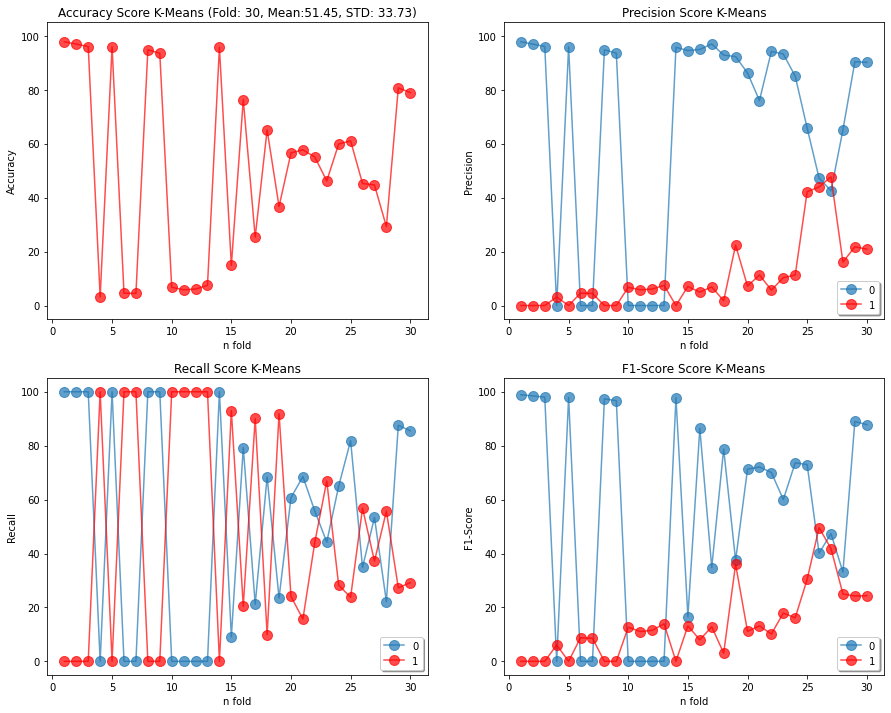

In [537]:
fig_val, axes = plt.subplots(figsize = (15,12), ncols=2, nrows=2 )
axes[0][0].plot(scores_k["Folds"], scores_k["Accuracy"], "ro-", markersize=10,alpha=0.7)
axes[0][0].set_xlabel("n fold", fontsize=10)
axes[0][0].set_ylabel("Accuracy", fontsize=10)
axes[0][0].set_title(f"Accuracy Score K-Means (Fold: {len(accuracies_k_means)}, Mean:{round(np.mean(scores_k['Accuracy']),2)}, STD: {round(np.std(scores_k['Accuracy']),2)})")
axes[0][0].set_ylim([-5, 105])


axes[0][1].plot(scores_k["Folds"], scores_k["Precision 0"], "o-", markersize=10,alpha=0.7)
axes[0][1].plot(scores_k["Folds"], scores_k["Precision 1"], "ro-", markersize=10,alpha=0.7)

axes[0][1].set_xlabel("n fold", fontsize=10)
axes[0][1].set_ylabel("Precision", fontsize=10)
axes[0][1].set_title(f"Precision Score K-Means")
axes[0][1].legend((f'0', '1'), loc='lower right', shadow=True)
axes[0][1].set_ylim([-5, 105])

axes[1][0].plot(scores_k["Folds"], scores_k["Recall 0"], "o-", markersize=10,alpha=0.7)
axes[1][0].plot(scores_k["Folds"], scores_k["Recall 1"], "ro-", markersize=10,alpha=0.7)

axes[1][0].set_xlabel("n fold", fontsize=10)
axes[1][0].set_ylabel("Recall", fontsize=10)
axes[1][0].set_title(f"Recall Score K-Means")
axes[1][0].legend((f'0', '1'), loc='lower right', shadow=True)
axes[1][0].set_ylim([-5, 105])

axes[1][1].plot(scores_k["Folds"], scores_k["F1-Score 0"], "o-", markersize=10,alpha=0.7)
axes[1][1].plot(scores_k["Folds"], scores_k["F1-Score 1"], "ro-", markersize=10,alpha=0.7)

axes[1][1].set_xlabel("n fold", fontsize=10)
axes[1][1].set_ylabel("F1-Score", fontsize=10)
axes[1][1].set_title(f"F1-Score Score K-Means")
axes[1][1].legend((f'0', '1'), loc='lower right', shadow=True)
axes[1][1].set_ylim([-5, 105])

Si bien el accuracy promedio obtenido es similar al de k_means_2 (el mejor algoritmo K-Means probado), se observa grandes variaciones dependiendo de como se selecciona el set de entrenamiento y el de prueba, lo cual se ve corroborado con un desviación estándar bastante alta de más de 30.
En general también se ven grandes variaciones en las otras métricas y se concluye que el algoritmo K-Means (al menos con los parámetros seleccionados) es poco confiable y no es el más indicado para este tipo de datos.

<h2>Decision Tree</h2>

In [516]:
dt_a_validar = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=10, max_leaf_nodes=10, class_weight="balanced")

In [508]:
# Al igual que en K-Means se almacenan los valores de métricas al aplicar K-Fold en listas.
accuracies_dt = []
precisions_dt = []
recalls_dt = []
f1_dt = []

for train_index, test_index in kfold.split(x):
    X_train, X_test = x[train_index], x[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    dt_a_validar = dt_a_validar.fit(X_train,Y_train)
    
    Y_iteracion = dt_a_validar.predict(X_test)
    # Nuevamente para el caso de precision, recall y f1-score se usan tuplas con el formato (clase 0, clase 1)
    accuracy_iteracion = accuracy_score(Y_test, Y_iteracion, normalize=True)*100
    precision_iteracion = (precision_score(Y_test,Y_iteracion, pos_label=0)*100, precision_score(Y_test,Y_iteracion, pos_label=1)*100)
    recall_iteracion = (recall_score(Y_test,Y_iteracion, pos_label=0)*100, recall_score(Y_test,Y_iteracion, pos_label=1)*100)
    f1_iteracion = (f1_score(Y_test,Y_iteracion,pos_label=0)*100, f1_score(Y_test,Y_iteracion,pos_label=1)*100)
    
    accuracies_dt.append(accuracy_iteracion)
    precisions_dt.append(precision_iteracion)
    recalls_dt.append(recall_iteracion)
    f1_dt.append(f1_iteracion)

In [517]:
# Se almacenan las listas en un data frame.
fold = [i+1 for i in range(len(accuracies_dt))]
scores_dt = pd.DataFrame(np.array([fold, accuracies_dt]).T, columns=["Folds", "Accuracy"])
scores_dt["Folds"] = scores_dt["Folds"]

scores_dt["Accuracy"] = scores_dt["Accuracy"]

scores_dt["Precision 0"] = [t[0] for t in precisions_dt]
scores_dt["Precision 1"] = [t[1] for t in precisions_dt]

scores_dt["Recall 0"] = [t[0] for t in recalls_dt]
scores_dt["Recall 1"] = [t[1] for t in recalls_dt]

scores_dt["F1-Score 0"] = [t[0] for t in f1_dt]
scores_dt["F1-Score 1"] = [t[1] for t in f1_dt]


scores_dt.head(10)

Folds   Accuracy  Precision 0  Precision 1   Recall 0   Recall 1  \
0    1.0  90.711701    99.931973    18.617021  90.567201  97.222222   
1    2.0  90.108565    99.793103    22.596154  89.987562  94.000000   
2    3.0  89.022919    99.788285    25.726141  88.763340  95.384615   
3    4.0  90.470446    99.793673    24.019608  90.348692  94.230769   
4    5.0  90.410133    99.791377    29.090909  90.194846  95.522388   
5    6.0  91.676719    99.452055    34.343434  91.782554  89.473684   
6    7.0  91.013269    99.791811    32.718894  90.782828  95.945946   
7    8.0  83.474065    99.618029    22.922636  82.898919  94.117647   
8    9.0  76.176116    99.656652    20.689655  74.806701  96.226415   
9   10.0  76.055489    99.483204    21.327968  74.708926  94.642857   

   F1-Score 0  F1-Score 1  
0   95.019405   31.250000  
1   94.637018   36.434109  
2   93.953488   40.522876  
3   94.836601   38.281250  
4   94.750743   44.599303  
5   95.463511   49.635036  
6   95.074380   48.797251  
7   90.492713   36.866359  
8   85.461907   34.056761  
9   85.334318   34.811166

(-5.0, 105.0)

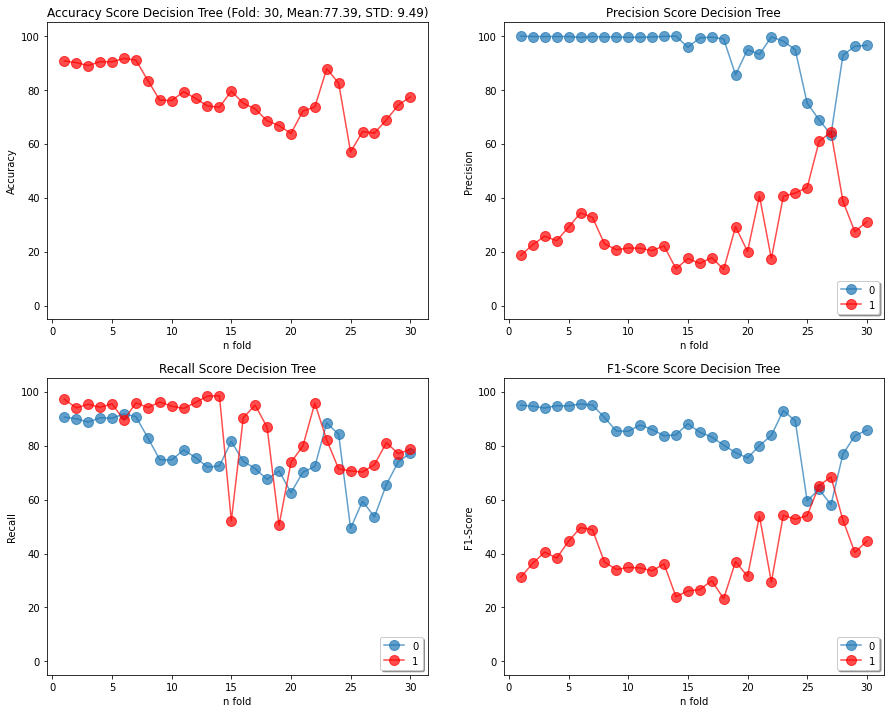

In [538]:
fig_val_2, axes = plt.subplots(figsize = (15,12), ncols=2, nrows=2 )
axes[0][0].plot(scores_dt["Folds"], scores_dt["Accuracy"], "ro-", markersize=10,alpha=0.7)
axes[0][0].set_xlabel("n fold", fontsize=10)
axes[0][0].set_ylabel("Accuracy", fontsize=10)
axes[0][0].set_title(f"Accuracy Score Decision Tree (Fold: {len(accuracies_dt)}, Mean:{round(np.mean(scores_dt['Accuracy']),2)}, STD: {round(np.std(scores_dt['Accuracy']),2)})")
axes[0][0].set_ylim([-5, 105])



axes[0][1].plot(scores_dt["Folds"], scores_dt["Precision 0"], "o-", markersize=10,alpha=0.7)
axes[0][1].plot(scores_dt["Folds"], scores_dt["Precision 1"], "ro-", markersize=10,alpha=0.7)

axes[0][1].set_xlabel("n fold", fontsize=10)
axes[0][1].set_ylabel("Precision", fontsize=10)
axes[0][1].set_title(f"Precision Score Decision Tree")
axes[0][1].legend((f'0', '1'), loc='lower right', shadow=True)
axes[0][1].set_ylim([-5, 105])


axes[1][0].plot(scores_dt["Folds"], scores_dt["Recall 0"], "o-", markersize=10,alpha=0.7)
axes[1][0].plot(scores_dt["Folds"], scores_dt["Recall 1"], "ro-", markersize=10,alpha=0.7)

axes[1][0].set_xlabel("n fold", fontsize=10)
axes[1][0].set_ylabel("Recall", fontsize=10)
axes[1][0].set_title(f"Recall Score Decision Tree")
axes[1][0].legend((f'0', '1'), loc='lower right', shadow=True)
axes[1][0].set_ylim([-5, 105])


axes[1][1].plot(scores_dt["Folds"], scores_dt["F1-Score 0"], "o-", markersize=10,alpha=0.7)
axes[1][1].plot(scores_dt["Folds"], scores_dt["F1-Score 1"], "ro-", markersize=10,alpha=0.7)

axes[1][1].set_xlabel("n fold", fontsize=10)
axes[1][1].set_ylabel("F1-Score", fontsize=10)
axes[1][1].set_title(f"F1-Score Score Decision Tree")
axes[1][1].legend((f'0', '1'), loc='lower right', shadow=True)
axes[1][1].set_ylim([-5, 105])

Para el caso de Decision Tree se observa un poco menos de "caos" en las métricas aunque todavía hay alguna desviación en algunas de estas. <br>
La precisión de la clase 0 es bastante estable y consistentemente mayor que la de la clase 1.<br>
El caso de recall es interesante porque es el único parámetro en el cual la clase 1 tiene consistentemente valores más altos. Lo cual refleja el trade off de accuracy vs recall que se hizo durante la selección de algoritmos buscando llamar a la mayor cantidad posible de clientes que aceptarían la llamada (clase 1).<br>
En el caso de f1-score se observa un comportamiento similar a la precisión pero con algo más de variación.

<h2>Comparación K-Means/Decision Tree</h2>

In [522]:
print(f"Fold: {len(accuracies_k_means)}")
print(f"Promedio Accuracy: {round(np.mean(scores_k['Accuracy']),2)}, STD: {round(np.std(scores_k['Accuracy']),2)}")
print(f"Promedio Precision 0: {round(np.mean(scores_k['Precision 0']),2)}, STD: {round(np.std(scores_k['Precision 0']),2)}")
print(f"Promedio Precision 1: {round(np.mean(scores_k['Precision 1']),2)}, STD: {round(np.std(scores_k['Precision 1']),2)}")
print(f"Promedio Recall 0: {round(np.mean(scores_k['Recall 0']),2)}, STD: {round(np.std(scores_k['Recall 0']),2)}")
print(f"Promedio Recall 1: {round(np.mean(scores_k['Recall 1']),2)}, STD: {round(np.std(scores_k['Recall 1']),2)}")
print(f"Promedio F1-Score 0: {round(np.mean(scores_k['F1-Score 0']),2)}, STD: {round(np.std(scores_k['F1-Score 0']),2)}")
print(f"Promedio F1-Score 1: {round(np.mean(scores_k['F1-Score 1']),2)}, STD: {round(np.std(scores_k['F1-Score 1']),2)}")

Fold: 30
Promedio Accuracy: 51.45, STD: 33.73
Promedio Precision 0: 65.98, STD: 38.86
Promedio Precision 1: 10.67, STD: 12.97
Promedio Recall 0: 52.03, STD: 38.61
Promedio Recall 1: 47.15, STD: 39.57
Promedio F1-Score 0: 55.22, STD: 37.54
Promedio F1-Score 1: 13.64, STD: 12.69


In [523]:
print(f"Fold: {len(accuracies_dt)}")
print(f"Promedio Accuracy: {round(np.mean(scores_dt['Accuracy']),2)}, STD: {round(np.std(scores_dt['Accuracy']),2)}")
print(f"Promedio Precision 0: {round(np.mean(scores_dt['Precision 0']),2)}, STD: {round(np.std(scores_dt['Precision 0']),2)}")
print(f"Promedio Precision 1: {round(np.mean(scores_dt['Precision 1']),2)}, STD: {round(np.std(scores_dt['Precision 1']),2)}")
print(f"Promedio Recall 0: {round(np.mean(scores_dt['Recall 0']),2)}, STD: {round(np.std(scores_dt['Recall 0']),2)}")
print(f"Promedio Recall 1: {round(np.mean(scores_dt['Recall 1']),2)}, STD: {round(np.std(scores_dt['Recall 1']),2)}")
print(f"Promedio F1-Score 0: {round(np.mean(scores_dt['F1-Score 0']),2)}, STD: {round(np.std(scores_dt['F1-Score 0']),2)}")
print(f"Promedio F1-Score 1: {round(np.mean(scores_dt['F1-Score 1']),2)}, STD: {round(np.std(scores_dt['F1-Score 1']),2)}")

Fold: 30
Promedio Accuracy: 77.39, STD: 9.49
Promedio Precision 0: 94.96, STD: 9.26
Promedio Precision 1: 28.31, STD: 12.53
Promedio Recall 0: 76.19, STD: 11.16
Promedio Recall 1: 85.4, STD: 13.02
Promedio F1-Score 0: 84.32, STD: 9.81
Promedio F1-Score 1: 40.44, STD: 11.56


En general estos números corroboran lo que se estaba observando con los gráficos y números anteriores. Todas las métricas del algoritmo Decision Tree tienen mejores valores que en el caso de K-Means. <br>
Hay desviaciones altas para casi todas las métricas en K-Means y los promedios no son buenos tampoco.<br>
En el caso de Decision Tree las desviaciones son menores, pero se corrobora el hecho de que el recall de la clase 1 fue incrementado a costa de la precisión, la cual es baja, lo que hace que baje el f1-score.<br> 
En general el algoritmo dt_4 debería indicar la mayoría de los clientes que tienen mayor probabilidad de aceptar el depósito, pero se espera una cantidad importante de falsos positivos.<br>
Dependería de algún análisis de costo beneficio si vale la pena hacer el trade off de contactar a la mayoría de los clientes que harían el depósito a costa de contactar clientes que no lo harían. 